In [1]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [2]:
import pandas as pd
metadata = pd.read_csv('C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/Dataset.csv')
metadata.head()

id   class
0  normal-01.wav  normal
1  normal-02.wav  normal
2  normal-03.wav  normal
3  normal-04.wav  normal
4  normal-05.wav  normal

In [3]:
import pandas as pd
import os
import librosa
import librosa.display


wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f'),str(row["id"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [4]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = 'C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f/slow-15.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 22050
Librosa sample rate: 22050


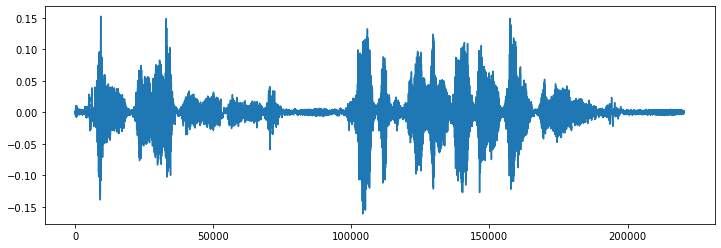

In [5]:

import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.show()

In [6]:

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 431)


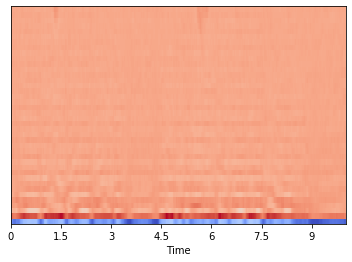

In [7]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [8]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        #mfccs1 = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs3 = librosa.feature.zero_crossing_rate(y=audio)
        #S = np.abs(librosa.stft(audio))
        #mfccs2 = librosa.feature.spectral_contrast(S=S, sr=sample_rate)
#   print(mfccs)
        #mfccsscaled1 = np.mean(mfccs1.T,axis=0)
        #mfccsscaled2 = np.mean(mfccs2.T,axis=0)
        #mfccsscaled3 = np.mean(mfccs3.T,axis=0)
        mfccsscaled = mfccs3.flatten()
        #mfccsconcat1 = np.concatenate((mfccsscaled1, mfccsscaled2), axis=0)
        #mfccsscaled = np.concatenate((mfccsconcat1, mfccsscaled3), axis=0)
        print(mfccsscaled)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [9]:
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f/'

metadata = pd.read_csv('C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/Dataset.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["id"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])
    

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.to_csv("./file.csv", sep=',',index=False)

print('Finished feature extraction from ', len(featuresdf), ' files')

[0.01464844 0.02929688 0.03857422 0.03173828 0.02685547 0.01611328
 0.00732422 0.00830078 0.03173828 0.08349609 0.11865234 0.12060547
 0.1015625  0.05615234 0.02880859 0.02587891 0.02441406 0.02246094
 0.05371094 0.08203125 0.08349609 0.09033203 0.08544922 0.12353516
 0.18164062 0.23388672 0.24316406 0.18457031 0.12744141 0.06640625
 0.03027344 0.02734375 0.02539062 0.02441406 0.02490234 0.02783203
 0.02685547 0.02832031 0.02685547 0.0234375  0.02832031 0.02929688
 0.02978516 0.02929688 0.02490234 0.01611328 0.01123047 0.00976562
 0.00488281 0.00878906 0.02490234 0.02636719 0.03125    0.03027344
 0.01757812 0.01855469 0.02246094 0.02490234 0.02490234 0.02490234
 0.02099609 0.0234375  0.03320312 0.04199219 0.05078125 0.05566406
 0.04882812 0.04199219 0.046875   0.06347656 0.06640625 0.06542969
 0.05224609 0.02734375 0.02246094 0.02246094 0.02148438 0.02148438
 0.02050781 0.02001953 0.02441406 0.02783203 0.03173828 0.03515625
 0.03320312 0.02978516 0.02587891 0.02539062 0.02685547 0.0268

[0.03515625 0.05566406 0.08251953 0.10009766 0.11181641 0.125
 0.13427734 0.140625   0.14501953 0.14697266 0.13916016 0.12792969
 0.11865234 0.10400391 0.08496094 0.06298828 0.03662109 0.01611328
 0.02001953 0.0234375  0.03222656 0.03857422 0.03222656 0.04736328
 0.08837891 0.08642578 0.08789062 0.07470703 0.03613281 0.03955078
 0.04150391 0.04199219 0.04003906 0.04296875 0.04199219 0.03662109
 0.03125    0.03710938 0.04052734 0.05517578 0.07519531 0.07617188
 0.07177734 0.06054688 0.04492188 0.03320312 0.03320312 0.03125
 0.02587891 0.02148438 0.02636719 0.02734375 0.02978516 0.03173828
 0.02587891 0.02783203 0.02978516 0.03320312 0.03808594 0.05078125
 0.07958984 0.09423828 0.09082031 0.07568359 0.04199219 0.02490234
 0.02392578 0.02783203 0.03466797 0.04003906 0.046875   0.05078125
 0.05273438 0.05664062 0.04589844 0.03710938 0.03417969 0.02050781
 0.02099609 0.02050781 0.02880859 0.04150391 0.05126953 0.06933594
 0.06298828 0.06494141 0.06640625 0.05517578 0.04980469 0.04345703
 0.

[0.00292969 0.00439453 0.00634766 0.00634766 0.00732422 0.00830078
 0.00732422 0.00732422 0.00634766 0.00537109 0.00683594 0.00732422
 0.00732422 0.00830078 0.00732422 0.00683594 0.00830078 0.00732422
 0.00830078 0.0078125  0.00634766 0.00634766 0.00537109 0.00634766
 0.00732422 0.01318359 0.01904297 0.02148438 0.03222656 0.04785156
 0.07080078 0.09130859 0.09960938 0.08447266 0.0625     0.04931641
 0.03759766 0.03759766 0.03808594 0.03369141 0.02783203 0.0234375
 0.01757812 0.01367188 0.01367188 0.01611328 0.02148438 0.0234375
 0.02539062 0.0234375  0.02001953 0.01904297 0.01708984 0.01904297
 0.02148438 0.02978516 0.03369141 0.03320312 0.03466797 0.03027344
 0.03417969 0.04003906 0.04199219 0.04052734 0.03320312 0.02392578
 0.01513672 0.00878906 0.00732422 0.02832031 0.03808594 0.06103516
 0.07470703 0.05615234 0.05078125 0.03222656 0.02099609 0.02099609
 0.0234375  0.02490234 0.02441406 0.02392578 0.02099609 0.01611328
 0.01464844 0.01171875 0.00830078 0.00927734 0.00878906 0.008789

[0.01464844 0.01757812 0.02197266 0.01708984 0.01708984 0.02148438
 0.02197266 0.02392578 0.02294922 0.02001953 0.01660156 0.01220703
 0.00830078 0.00634766 0.00634766 0.00634766 0.00634766 0.00537109
 0.00537109 0.00585938 0.00634766 0.0078125  0.01074219 0.01416016
 0.01660156 0.01855469 0.02050781 0.02050781 0.02099609 0.02050781
 0.01855469 0.02050781 0.02294922 0.02880859 0.03417969 0.03515625
 0.03417969 0.03027344 0.02539062 0.01855469 0.01367188 0.01513672
 0.02197266 0.02783203 0.03027344 0.02490234 0.01513672 0.01074219
 0.0078125  0.01074219 0.01318359 0.01416016 0.02001953 0.02050781
 0.02246094 0.02392578 0.02246094 0.02246094 0.02392578 0.03076172
 0.03417969 0.03369141 0.03320312 0.02636719 0.01904297 0.01513672
 0.01025391 0.00585938 0.00634766 0.00634766 0.00976562 0.01318359
 0.01416016 0.01806641 0.03076172 0.05224609 0.06005859 0.06103516
 0.046875   0.02392578 0.01953125 0.03369141 0.06347656 0.0703125
 0.06689453 0.04980469 0.02050781 0.01611328 0.01757812 0.01953

[0.01318359 0.015625   0.01708984 0.01318359 0.01025391 0.01513672
 0.01708984 0.015625   0.01416016 0.00927734 0.00732422 0.00634766
 0.00683594 0.00537109 0.00488281 0.00830078 0.02294922 0.02539062
 0.03222656 0.03271484 0.02783203 0.06982422 0.11523438 0.11572266
 0.10888672 0.07617188 0.04101562 0.04052734 0.04101562 0.03662109
 0.02783203 0.02685547 0.02685547 0.02294922 0.02148438 0.02001953
 0.03125    0.04248047 0.04394531 0.04589844 0.03466797 0.02587891
 0.02490234 0.02832031 0.03271484 0.03564453 0.03076172 0.03125
 0.05664062 0.07861328 0.13671875 0.17529297 0.18457031 0.16699219
 0.11035156 0.06640625 0.02783203 0.01757812 0.01757812 0.01708984
 0.01513672 0.01464844 0.01269531 0.01123047 0.04492188 0.09667969
 0.13525391 0.16748047 0.15380859 0.10742188 0.06982422 0.04345703
 0.03027344 0.02880859 0.03125    0.02880859 0.02539062 0.02392578
 0.02392578 0.02392578 0.0234375  0.02294922 0.02294922 0.02246094
 0.02392578 0.02539062 0.02392578 0.02148438 0.01806641 0.0141601

[0.01123047 0.01904297 0.02001953 0.01464844 0.01611328 0.01074219
 0.01220703 0.01464844 0.015625   0.01660156 0.01708984 0.05322266
 0.09521484 0.13183594 0.18115234 0.18212891 0.13769531 0.09863281
 0.04589844 0.00634766 0.00585938 0.00927734 0.01367188 0.01708984
 0.01904297 0.02148438 0.0234375  0.02392578 0.02441406 0.02197266
 0.01806641 0.01611328 0.01220703 0.01367188 0.01660156 0.02001953
 0.02978516 0.03710938 0.04101562 0.04394531 0.04150391 0.04052734
 0.03417969 0.02587891 0.04541016 0.06933594 0.11767578 0.17041016
 0.1953125  0.21240234 0.18310547 0.13085938 0.08105469 0.03222656
 0.01757812 0.01660156 0.01318359 0.01025391 0.00537109 0.00537109
 0.00683594 0.00732422 0.00927734 0.01123047 0.01416016 0.01220703
 0.02001953 0.02392578 0.02880859 0.04003906 0.03173828 0.03271484
 0.02685547 0.015625   0.01513672 0.00830078 0.00927734 0.01464844
 0.01904297 0.02246094 0.02197266 0.02099609 0.01904297 0.01806641
 0.01757812 0.01611328 0.01708984 0.01855469 0.01806641 0.0175

[0.01757812 0.0234375  0.02685547 0.01708984 0.01318359 0.01074219
 0.01025391 0.01220703 0.01416016 0.01513672 0.01757812 0.01806641
 0.01806641 0.01806641 0.01611328 0.01318359 0.01806641 0.07373047
 0.13476562 0.19677734 0.25048828 0.25048828 0.24658203 0.23242188
 0.18798828 0.13427734 0.08300781 0.04052734 0.02539062 0.02587891
 0.03515625 0.06494141 0.11669922 0.125      0.10791016 0.07470703
 0.03320312 0.02099609 0.02246094 0.02441406 0.015625   0.01660156
 0.01757812 0.01806641 0.04394531 0.08544922 0.11376953 0.11816406
 0.08789062 0.05029297 0.03369141 0.03466797 0.04589844 0.04980469
 0.04345703 0.04248047 0.0390625  0.03564453 0.03076172 0.02490234
 0.01855469 0.01123047 0.03076172 0.03271484 0.03955078 0.04541016
 0.02587891 0.02636719 0.02294922 0.02001953 0.01660156 0.01367188
 0.01757812 0.03710938 0.0390625  0.03857422 0.04150391 0.02246094
 0.02636719 0.02832031 0.02099609 0.02050781 0.0390625  0.07128906
 0.11669922 0.14892578 0.12988281 0.09570312 0.04736328 0.0283

 0.10400391 0.15771484 0.19433594 0.16308594 0.11230469 0.05419922]
[0.03759766 0.05273438 0.06689453 0.06103516 0.05615234 0.04833984
 0.03613281 0.02978516 0.015625   0.00927734 0.00976562 0.02783203
 0.03759766 0.04345703 0.04931641 0.03417969 0.03076172 0.03271484
 0.03466797 0.03417969 0.03564453 0.03466797 0.05029297 0.06054688
 0.05957031 0.05712891 0.04003906 0.02539062 0.07763672 0.13476562
 0.18847656 0.24267578 0.20849609 0.15136719 0.09423828 0.04345703
 0.02148438 0.02050781 0.01953125 0.01757812 0.02001953 0.02050781
 0.02099609 0.02099609 0.02050781 0.03271484 0.04589844 0.05957031
 0.06591797 0.05322266 0.03955078 0.02539062 0.01660156 0.01513672
 0.01464844 0.01464844 0.01318359 0.01318359 0.01708984 0.01806641
 0.01855469 0.01953125 0.01611328 0.01904297 0.0234375  0.02441406
 0.02441406 0.02197266 0.01806641 0.01708984 0.01757812 0.01611328
 0.01611328 0.01464844 0.01220703 0.01318359 0.01367188 0.01611328
 0.01904297 0.01953125 0.02392578 0.02636719 0.03662109 0.052

[0.02929688 0.03955078 0.04199219 0.02490234 0.01660156 0.00878906
 0.01025391 0.01123047 0.01367188 0.01513672 0.02685547 0.08496094
 0.13671875 0.19482422 0.23828125 0.23925781 0.23193359 0.20751953
 0.16113281 0.11132812 0.07763672 0.05126953 0.04541016 0.04199219
 0.03369141 0.03369141 0.04003906 0.04443359 0.04443359 0.04052734
 0.03515625 0.02685547 0.0234375  0.02246094 0.02294922 0.03027344
 0.03759766 0.04052734 0.04150391 0.03125    0.01953125 0.01269531
 0.00488281 0.01220703 0.01953125 0.02734375 0.03271484 0.02734375
 0.02441406 0.015625   0.01123047 0.00976562 0.00683594 0.02734375
 0.04931641 0.06396484 0.07324219 0.06640625 0.05810547 0.05761719
 0.06201172 0.06103516 0.05712891 0.04931641 0.04345703 0.0390625
 0.04052734 0.03808594 0.03417969 0.02978516 0.01855469 0.01708984
 0.01318359 0.00927734 0.00830078 0.00537109 0.00634766 0.01025391
 0.01513672 0.02099609 0.02685547 0.03564453 0.03857422 0.04199219
 0.04248047 0.03466797 0.02978516 0.02148438 0.01416016 0.00927

[0.02099609 0.02734375 0.03369141 0.02490234 0.01708984 0.01708984
 0.01220703 0.01123047 0.02197266 0.02587891 0.02978516 0.03125
 0.01855469 0.00927734 0.00830078 0.01708984 0.01806641 0.01904297
 0.01611328 0.00830078 0.01513672 0.0234375  0.03320312 0.03808594
 0.03857422 0.03759766 0.03125    0.02685547 0.04736328 0.0859375
 0.10595703 0.11083984 0.11816406 0.08203125 0.06152344 0.05957031
 0.02587891 0.01855469 0.02050781 0.02197266 0.02978516 0.03320312
 0.03662109 0.04003906 0.03466797 0.02685547 0.02734375 0.01806641
 0.01708984 0.02294922 0.01855469 0.02148438 0.02197266 0.07470703
 0.11621094 0.12060547 0.12402344 0.07617188 0.03662109 0.0390625
 0.04931641 0.06201172 0.06103516 0.05810547 0.04882812 0.03466797
 0.03710938 0.03710938 0.03027344 0.02441406 0.02880859 0.05761719
 0.10400391 0.12255859 0.12402344 0.09472656 0.0546875  0.03808594
 0.02685547 0.02197266 0.01757812 0.01806641 0.01855469 0.01806641
 0.01806641 0.01708984 0.01660156 0.01318359 0.00927734 0.01171875


[0.00341797 0.00488281 0.00732422 0.00634766 0.00634766 0.00634766
 0.00634766 0.01953125 0.05419922 0.06005859 0.06298828 0.05371094
 0.02197266 0.01757812 0.01367188 0.00878906 0.00488281 0.01025391
 0.01318359 0.015625   0.01513672 0.00976562 0.01611328 0.01953125
 0.02832031 0.03271484 0.02685547 0.02636719 0.02246094 0.01855469
 0.01806641 0.02490234 0.02880859 0.03515625 0.03613281 0.02880859
 0.03271484 0.02734375 0.02734375 0.02929688 0.03125    0.02832031
 0.02490234 0.01953125 0.00634766 0.00732422 0.01318359 0.01611328
 0.01806641 0.02294922 0.01806641 0.02197266 0.02490234 0.02392578
 0.03222656 0.03027344 0.03271484 0.03271484 0.02685547 0.02441406
 0.01806641 0.01220703 0.01123047 0.00830078 0.00732422 0.00732422
 0.00830078 0.00927734 0.00976562 0.00927734 0.00830078 0.00732422
 0.00830078 0.00830078 0.00732422 0.00732422 0.00732422 0.01025391
 0.01171875 0.01416016 0.015625   0.01611328 0.01611328 0.01660156
 0.02099609 0.02539062 0.02929688 0.03222656 0.03125    0.0297

[0.02783203 0.04199219 0.05126953 0.04589844 0.04980469 0.04736328
 0.04541016 0.04248047 0.03955078 0.03857422 0.04003906 0.04785156
 0.05126953 0.04882812 0.05078125 0.04052734 0.03710938 0.04980469
 0.05224609 0.05810547 0.05224609 0.04101562 0.0390625  0.04101562
 0.046875   0.04931641 0.05175781 0.04785156 0.0625     0.08398438
 0.11083984 0.13574219 0.14990234 0.15283203 0.1328125  0.11376953
 0.08349609 0.05615234 0.046875   0.04345703 0.05517578 0.05712891
 0.05761719 0.05664062 0.04541016 0.04443359 0.04296875 0.04101562
 0.04101562 0.04296875 0.04541016 0.05126953 0.05859375 0.06152344
 0.0625     0.06494141 0.06201172 0.05957031 0.06054688 0.07470703
 0.08544922 0.08642578 0.08349609 0.06298828 0.046875   0.04589844
 0.04980469 0.04980469 0.07568359 0.11474609 0.15478516 0.19775391
 0.21142578 0.20068359 0.17822266 0.13818359 0.10253906 0.07128906
 0.04736328 0.04882812 0.06103516 0.06689453 0.07910156 0.09960938
 0.12939453 0.17675781 0.21630859 0.24267578 0.24804688 0.2348

[0.02978516 0.04638672 0.06103516 0.06054688 0.06054688 0.05517578
 0.05078125 0.05371094 0.05078125 0.05273438 0.0546875  0.05419922
 0.06103516 0.09716797 0.13476562 0.16943359 0.18408203 0.15234375
 0.11962891 0.09423828 0.08154297 0.08300781 0.08398438 0.07080078
 0.07177734 0.06640625 0.06884766 0.07128906 0.08154297 0.08007812
 0.0703125  0.06738281 0.04589844 0.04541016 0.0546875  0.06152344
 0.06445312 0.0703125  0.06787109 0.06689453 0.06787109 0.06591797
 0.06201172 0.06152344 0.06591797 0.08447266 0.10107422 0.10791016
 0.10205078 0.08203125 0.06591797 0.06103516 0.07861328 0.11425781
 0.15283203 0.18603516 0.1796875  0.14355469 0.10302734 0.06933594
 0.06787109 0.07373047 0.07666016 0.07128906 0.06152344 0.05517578
 0.05371094 0.05419922 0.05371094 0.0546875  0.05761719 0.06445312
 0.06396484 0.06542969 0.06005859 0.05126953 0.04833984 0.04296875
 0.04638672 0.04199219 0.0390625  0.03564453 0.02832031 0.03564453
 0.0546875  0.06982422 0.07617188 0.07421875 0.06347656 0.0546

[0.0234375  0.03027344 0.03662109 0.03173828 0.02929688 0.03173828
 0.03417969 0.03173828 0.03808594 0.04003906 0.04248047 0.04785156
 0.04345703 0.04150391 0.04052734 0.04980469 0.06494141 0.07275391
 0.07861328 0.07324219 0.06396484 0.06201172 0.06152344 0.05810547
 0.0546875  0.04736328 0.04296875 0.04296875 0.04296875 0.04736328
 0.04785156 0.04833984 0.04882812 0.04833984 0.04736328 0.04736328
 0.04638672 0.04833984 0.04980469 0.04833984 0.04931641 0.04833984
 0.046875   0.04736328 0.04882812 0.05908203 0.08740234 0.11767578
 0.15283203 0.1796875  0.171875   0.13818359 0.09960938 0.06005859
 0.03759766 0.04003906 0.04980469 0.0625     0.06689453 0.06835938
 0.06542969 0.06054688 0.05664062 0.06054688 0.06787109 0.06689453
 0.08349609 0.08056641 0.07226562 0.07519531 0.0703125  0.07666016
 0.07470703 0.06933594 0.06347656 0.05566406 0.06201172 0.06054688
 0.05957031 0.06298828 0.05908203 0.06054688 0.05908203 0.05664062
 0.06103516 0.05957031 0.06054688 0.0625     0.06347656 0.0654

[0.0234375  0.0390625  0.04199219 0.03857422 0.04003906 0.03271484
 0.04101562 0.04492188 0.04541016 0.04345703 0.04052734 0.03759766
 0.03564453 0.04150391 0.06152344 0.09277344 0.12695312 0.16015625
 0.18408203 0.17724609 0.14697266 0.125      0.10449219 0.10009766
 0.11376953 0.11425781 0.09326172 0.06933594 0.05761719 0.09423828
 0.14697266 0.20068359 0.24023438 0.22753906 0.19628906 0.15478516
 0.11621094 0.08496094 0.07763672 0.08105469 0.08007812 0.078125
 0.08154297 0.0859375  0.08886719 0.08886719 0.07714844 0.06201172
 0.05859375 0.05517578 0.05419922 0.06933594 0.07617188 0.08300781
 0.08447266 0.07324219 0.06445312 0.06054688 0.05664062 0.0546875
 0.05615234 0.05517578 0.05664062 0.05908203 0.05712891 0.05566406
 0.05029297 0.04248047 0.03808594 0.03857422 0.03857422 0.03613281
 0.03857422 0.03222656 0.02929688 0.03417969 0.03417969 0.04052734
 0.04345703 0.04248047 0.0390625  0.0390625  0.04345703 0.04150391
 0.05371094 0.05322266 0.04980469 0.05322266 0.04589844 0.0454101

[0.02636719 0.03759766 0.05029297 0.04443359 0.03759766 0.03759766
 0.03710938 0.04199219 0.04394531 0.04638672 0.04345703 0.04345703
 0.04785156 0.04541016 0.05078125 0.05664062 0.06591797 0.07226562
 0.08251953 0.09423828 0.09375    0.09375    0.09277344 0.08105469
 0.07421875 0.07519531 0.06738281 0.06445312 0.07617188 0.08642578
 0.09277344 0.09423828 0.08056641 0.06445312 0.05322266 0.05371094
 0.05419922 0.06347656 0.07177734 0.07519531 0.07714844 0.06640625
 0.0625     0.05859375 0.06152344 0.07568359 0.08203125 0.08691406
 0.09326172 0.08984375 0.08935547 0.09765625 0.09082031 0.08007812
 0.06835938 0.05419922 0.04882812 0.05371094 0.07568359 0.12011719
 0.15185547 0.15869141 0.13916016 0.09277344 0.0625     0.05566406
 0.06005859 0.06689453 0.06738281 0.06396484 0.06298828 0.06494141
 0.08056641 0.09179688 0.08154297 0.06787109 0.06738281 0.06835938
 0.08007812 0.08984375 0.07275391 0.06298828 0.05664062 0.05175781
 0.05029297 0.04736328 0.04736328 0.06347656 0.0703125  0.0693

[0.05517578 0.08398438 0.10351562 0.09814453 0.07128906 0.04638672
 0.02978516 0.02099609 0.01953125 0.02197266 0.02392578 0.03955078
 0.07666016 0.11279297 0.1484375  0.14111328 0.10595703 0.07373047
 0.04541016 0.04150391 0.03955078 0.03466797 0.02783203 0.02636719
 0.03271484 0.03955078 0.04492188 0.04589844 0.04443359 0.04150391
 0.04785156 0.05126953 0.05126953 0.05029297 0.04052734 0.03271484
 0.03613281 0.06347656 0.09082031 0.09277344 0.08300781 0.05419922
 0.02441406 0.02099609 0.02587891 0.0390625  0.05664062 0.06689453
 0.06787109 0.06298828 0.05175781 0.04443359 0.04638672 0.04833984
 0.05126953 0.05419922 0.04931641 0.03710938 0.02636719 0.02246094
 0.02734375 0.04394531 0.05664062 0.08105469 0.10058594 0.11425781
 0.13134766 0.13330078 0.1328125  0.11425781 0.09277344 0.07080078
 0.05078125 0.04394531 0.046875   0.04589844 0.04101562 0.04052734
 0.03271484 0.02880859 0.02685547 0.03320312 0.05371094 0.09130859
 0.13476562 0.12548828 0.10400391 0.06494141 0.02441406 0.0336

[0.02734375 0.03613281 0.04541016 0.03564453 0.03173828 0.03222656
 0.03417969 0.03710938 0.03808594 0.0390625  0.04248047 0.04394531
 0.04980469 0.05175781 0.04980469 0.04638672 0.04931641 0.07324219
 0.07568359 0.07958984 0.07910156 0.06152344 0.06201172 0.05957031
 0.06445312 0.05908203 0.05273438 0.05419922 0.04785156 0.05273438
 0.06738281 0.07666016 0.08007812 0.07714844 0.06347656 0.0546875
 0.04833984 0.04980469 0.078125   0.11669922 0.15283203 0.18701172
 0.20507812 0.21142578 0.19580078 0.16259766 0.11621094 0.06884766
 0.04736328 0.04492188 0.04296875 0.04492188 0.05126953 0.06347656
 0.08496094 0.10888672 0.11083984 0.09619141 0.08007812 0.06054688
 0.09130859 0.13476562 0.16845703 0.16162109 0.12304688 0.07861328
 0.0390625  0.05175781 0.08349609 0.11816406 0.16259766 0.15283203
 0.12451172 0.08984375 0.04736328 0.04199219 0.03808594 0.03662109
 0.04150391 0.046875   0.05761719 0.07519531 0.07324219 0.07324219
 0.06396484 0.05517578 0.06201172 0.06542969 0.06689453 0.0625


[0.015625   0.02685547 0.03515625 0.04052734 0.04150391 0.04150391
 0.04052734 0.03857422 0.03710938 0.03320312 0.03759766 0.04394531
 0.04833984 0.05322266 0.05273438 0.04638672 0.04296875 0.04394531
 0.04541016 0.04833984 0.04443359 0.04150391 0.04052734 0.03808594
 0.04248047 0.05224609 0.06787109 0.08251953 0.09423828 0.09912109
 0.09326172 0.08984375 0.09375    0.09960938 0.09472656 0.08544922
 0.07763672 0.06103516 0.05908203 0.06298828 0.06054688 0.06640625
 0.06396484 0.06396484 0.05761719 0.04931641 0.04833984 0.05224609
 0.06054688 0.06103516 0.06152344 0.04980469 0.03857422 0.04394531
 0.04492188 0.0546875  0.07470703 0.08300781 0.08447266 0.08935547
 0.08251953 0.08056641 0.08251953 0.06787109 0.05810547 0.04931641
 0.05419922 0.0625     0.08300781 0.09765625 0.09228516 0.08789062
 0.06835938 0.04980469 0.04492188 0.05078125 0.06347656 0.07177734
 0.07763672 0.0703125  0.05664062 0.046875   0.04345703 0.04638672
 0.04589844 0.04785156 0.05029297 0.04931641 0.05126953 0.0561

[0.08154297 0.12597656 0.15625    0.13330078 0.09082031 0.05517578
 0.046875   0.04980469 0.07080078 0.08740234 0.09375    0.10449219
 0.10888672 0.10791016 0.09814453 0.09375    0.08789062 0.06835938
 0.05517578 0.04785156 0.04882812 0.06298828 0.06884766 0.05957031
 0.04296875 0.02880859 0.03857422 0.06005859 0.08642578 0.10546875
 0.125      0.12548828 0.11035156 0.09228516 0.07080078 0.05664062
 0.06787109 0.09033203 0.1015625  0.11376953 0.09863281 0.08398438
 0.06982422 0.08740234 0.12109375 0.1328125  0.13720703 0.12060547
 0.10986328 0.11279297 0.11914062 0.11328125 0.0859375  0.0703125
 0.07763672 0.08154297 0.07958984 0.078125   0.05419922 0.04101562
 0.04248047 0.04785156 0.07080078 0.0703125  0.08154297 0.08105469
 0.08349609 0.11279297 0.12597656 0.13720703 0.13476562 0.12548828
 0.11181641 0.09521484 0.06982422 0.046875   0.04443359 0.05859375
 0.078125   0.08837891 0.09228516 0.08007812 0.08007812 0.08691406
 0.07958984 0.08984375 0.08398438 0.07470703 0.10546875 0.13427

[0.04882812 0.07958984 0.09863281 0.08544922 0.06933594 0.04443359
 0.03808594 0.03125    0.03173828 0.02880859 0.02099609 0.01708984
 0.0234375  0.03271484 0.04003906 0.04394531 0.04443359 0.03808594
 0.03710938 0.04150391 0.04492188 0.04882812 0.04296875 0.03222656
 0.02294922 0.01953125 0.03222656 0.07910156 0.11572266 0.13720703
 0.16992188 0.14453125 0.11132812 0.09277344 0.05175781 0.03320312
 0.03271484 0.03125    0.03125    0.03759766 0.04150391 0.04296875
 0.04736328 0.04199219 0.03808594 0.03369141 0.02441406 0.02050781
 0.01855469 0.015625   0.01220703 0.00830078 0.00488281 0.00244141
 0.00195312 0.00390625 0.00634766 0.00927734 0.01123047 0.01513672
 0.02197266 0.03710938 0.05322266 0.07617188 0.09570312 0.10742188
 0.11572266 0.12158203 0.1171875  0.09326172 0.0703125  0.03857422
 0.01708984 0.0234375  0.02880859 0.03369141 0.03857422 0.03466797
 0.03466797 0.03710938 0.03955078 0.04541016 0.04443359 0.04394531
 0.04443359 0.04931641 0.07128906 0.08691406 0.08789062 0.0815

[0.04638672 0.06884766 0.09130859 0.07421875 0.08154297 0.0859375
 0.08007812 0.09277344 0.09472656 0.10400391 0.11279297 0.10742188
 0.10253906 0.07324219 0.06640625 0.05712891 0.06103516 0.06738281
 0.06494141 0.06201172 0.05126953 0.04736328 0.04003906 0.0390625
 0.04003906 0.04394531 0.04296875 0.03759766 0.02929688 0.02001953
 0.02734375 0.04394531 0.06298828 0.08007812 0.08740234 0.08544922
 0.08251953 0.08789062 0.09130859 0.09570312 0.08447266 0.06640625
 0.06689453 0.08349609 0.10839844 0.14111328 0.15039062 0.12353516
 0.10595703 0.09375    0.07128906 0.08300781 0.09423828 0.09375
 0.10644531 0.11865234 0.12402344 0.13769531 0.15966797 0.14794922
 0.12890625 0.09667969 0.05908203 0.04785156 0.07226562 0.11914062
 0.16503906 0.20263672 0.21582031 0.20898438 0.19873047 0.18408203
 0.16552734 0.12646484 0.11865234 0.12158203 0.12109375 0.15380859
 0.15820312 0.15869141 0.16455078 0.16210938 0.14794922 0.13183594
 0.10839844 0.09765625 0.09472656 0.09130859 0.08691406 0.06689453


[0.08935547 0.12646484 0.15234375 0.13427734 0.10253906 0.08251953
 0.07470703 0.07861328 0.09228516 0.09619141 0.13671875 0.16894531
 0.18164062 0.21240234 0.20849609 0.20166016 0.18261719 0.13720703
 0.08789062 0.04248047 0.02978516 0.06054688 0.08886719 0.09863281
 0.09863281 0.06835938 0.05078125 0.05859375 0.078125   0.10253906
 0.12060547 0.13232422 0.13525391 0.1328125  0.13427734 0.12744141
 0.10791016 0.09716797 0.08251953 0.07714844 0.08447266 0.07568359
 0.08154297 0.0859375  0.09033203 0.10205078 0.09765625 0.08789062
 0.07519531 0.05957031 0.04638672 0.04101562 0.04248047 0.04980469
 0.06054688 0.09472656 0.12353516 0.14013672 0.15136719 0.11767578
 0.09619141 0.10205078 0.10693359 0.12158203 0.13183594 0.12451172
 0.11962891 0.11572266 0.10253906 0.09912109 0.10009766 0.10839844
 0.11083984 0.10351562 0.09326172 0.09033203 0.09521484 0.10888672
 0.12158203 0.12255859 0.11865234 0.11767578 0.11669922 0.11962891
 0.13085938 0.14501953 0.15136719 0.16308594 0.16845703 0.1684

[0.00537109 0.00878906 0.01025391 0.00927734 0.01074219 0.00927734
 0.00927734 0.00927734 0.00732422 0.00634766 0.00634766 0.00732422
 0.00830078 0.00878906 0.00927734 0.00732422 0.00634766 0.00878906
 0.01806641 0.02441406 0.02832031 0.03027344 0.02441406 0.02197266
 0.02246094 0.02197266 0.02197266 0.02197266 0.02148438 0.04248047
 0.09521484 0.14501953 0.19873047 0.23046875 0.22363281 0.21484375
 0.16308594 0.11279297 0.06982422 0.03125    0.03222656 0.03173828
 0.03125    0.02978516 0.03027344 0.02978516 0.03076172 0.02880859
 0.02636719 0.02197266 0.015625   0.01269531 0.00732422 0.00634766
 0.00830078 0.0078125  0.00830078 0.00830078 0.00537109 0.00537109
 0.00585938 0.00537109 0.00537109 0.00634766 0.00634766 0.00683594
 0.00634766 0.00634766 0.00732422 0.00830078 0.00878906 0.00732422
 0.00732422 0.00634766 0.00634766 0.00732422 0.00634766 0.00634766
 0.00634766 0.00585938 0.00634766 0.00830078 0.00976562 0.01171875
 0.01367188 0.01806641 0.02294922 0.02783203 0.03271484 0.0346

 0.02685547 0.02148438 0.02001953 0.02001953 0.01660156 0.01171875]
[0.00292969 0.00439453 0.00537109 0.00634766 0.00732422 0.00732422
 0.01220703 0.02929688 0.03125    0.03564453 0.03613281 0.02099609
 0.01855469 0.01513672 0.01464844 0.01660156 0.02148438 0.02685547
 0.02929688 0.03564453 0.03662109 0.03271484 0.02832031 0.02001953
 0.01806641 0.01904297 0.02148438 0.02050781 0.02490234 0.02783203
 0.02441406 0.02441406 0.01806641 0.01318359 0.01367188 0.01611328
 0.01757812 0.02001953 0.02197266 0.02392578 0.02294922 0.02148438
 0.02050781 0.01757812 0.01855469 0.02294922 0.03857422 0.0390625
 0.0390625  0.03613281 0.02197266 0.02148438 0.01855469 0.01806641
 0.01708984 0.01806641 0.02294922 0.03466797 0.09179688 0.14257812
 0.19287109 0.23095703 0.22363281 0.19287109 0.14208984 0.09375
 0.04199219 0.02148438 0.03027344 0.04052734 0.05029297 0.05859375
 0.05029297 0.04003906 0.03417969 0.02783203 0.02734375 0.02539062
 0.01904297 0.01416016 0.01416016 0.01318359 0.01660156 0.0200195

[0.01416016 0.01660156 0.02001953 0.01708984 0.00927734 0.01123047
 0.01025391 0.01318359 0.01269531 0.01025391 0.00927734 0.00732422
 0.00830078 0.00732422 0.00732422 0.015625   0.02783203 0.03710938
 0.04199219 0.03417969 0.03417969 0.06201172 0.09375    0.09863281
 0.08984375 0.05615234 0.0234375  0.02001953 0.01757812 0.02392578
 0.02587891 0.0546875  0.10253906 0.14941406 0.20214844 0.22705078
 0.23535156 0.20556641 0.15185547 0.1015625  0.04589844 0.02246094
 0.01953125 0.01611328 0.01904297 0.02099609 0.02294922 0.02441406
 0.02392578 0.02734375 0.03076172 0.03466797 0.03662109 0.03222656
 0.02783203 0.02539062 0.02392578 0.02392578 0.0234375  0.02099609
 0.02050781 0.01855469 0.01464844 0.01416016 0.03857422 0.09472656
 0.16064453 0.21777344 0.22900391 0.18261719 0.12304688 0.0703125
 0.03857422 0.03320312 0.03173828 0.02783203 0.02099609 0.02539062
 0.02441406 0.02685547 0.03125    0.03320312 0.04345703 0.04589844
 0.04833984 0.04296875 0.03271484 0.02880859 0.02001953 0.01318

[0.00195312 0.00390625 0.00878906 0.015625   0.015625   0.01367188
 0.00878906 0.         0.         0.02001953 0.05419922 0.08544922
 0.09814453 0.08300781 0.05419922 0.03076172 0.02294922 0.02441406
 0.03076172 0.03369141 0.03955078 0.04541016 0.05029297 0.05224609
 0.04736328 0.04003906 0.02880859 0.02148438 0.03857422 0.06054688
 0.07568359 0.08740234 0.08496094 0.07568359 0.06542969 0.05615234
 0.03808594 0.03222656 0.05029297 0.05371094 0.07080078 0.08447266
 0.09521484 0.12060547 0.14501953 0.15136719 0.13964844 0.13525391
 0.10791016 0.08105469 0.05957031 0.03222656 0.02636719 0.05664062
 0.07275391 0.09814453 0.09960938 0.06884766 0.0546875  0.04736328
 0.06835938 0.09570312 0.11962891 0.12646484 0.12402344 0.12597656
 0.12744141 0.12548828 0.11865234 0.10302734 0.07714844 0.05322266
 0.03710938 0.02783203 0.03466797 0.04296875 0.04785156 0.04736328
 0.03564453 0.02294922 0.01171875 0.0078125  0.05224609 0.10498047
 0.16113281 0.20068359 0.18115234 0.15380859 0.11279297 0.0883

 0.09228516 0.07177734 0.04345703 0.01904297 0.00390625 0.00097656]
[0.04736328 0.06445312 0.08984375 0.09863281 0.10400391 0.11474609
 0.10693359 0.08789062 0.06787109 0.04443359 0.03271484 0.03027344
 0.05078125 0.07226562 0.08154297 0.07861328 0.05810547 0.03955078
 0.03369141 0.03955078 0.03808594 0.0390625  0.03955078 0.03466797
 0.03857422 0.0390625  0.03759766 0.03125    0.02587891 0.02148438
 0.01855469 0.01708984 0.01464844 0.01220703 0.01123047 0.01318359
 0.02148438 0.03076172 0.03564453 0.03271484 0.04150391 0.0546875
 0.06152344 0.10205078 0.10205078 0.09082031 0.08300781 0.04589844
 0.03027344 0.02441406 0.02587891 0.06542969 0.07958984 0.07958984
 0.07666016 0.03759766 0.02539062 0.05566406 0.09570312 0.14746094
 0.1640625  0.13330078 0.09277344 0.04101562 0.02685547 0.03076172
 0.03125    0.03320312 0.03320312 0.02978516 0.03125    0.03222656
 0.03662109 0.07373047 0.11914062 0.11523438 0.10644531 0.06982422
 0.02685547 0.03564453 0.04199219 0.04736328 0.05615234 0.1054

[0.01464844 0.02148438 0.0234375  0.015625   0.00878906 0.00195312
 0.00390625 0.00390625 0.00976562 0.02490234 0.02978516 0.03710938
 0.03125    0.03369141 0.05615234 0.09960938 0.13085938 0.14550781
 0.15722656 0.12402344 0.09277344 0.06298828 0.03808594 0.046875
 0.07080078 0.07470703 0.06298828 0.04199219 0.04492188 0.09863281
 0.14990234 0.18408203 0.19775391 0.171875   0.15136719 0.13720703
 0.10302734 0.07373047 0.03808594 0.01367188 0.04150391 0.08398438
 0.12695312 0.16259766 0.15771484 0.13525391 0.12109375 0.11328125
 0.11376953 0.11572266 0.10351562 0.07763672 0.06494141 0.07617188
 0.109375   0.13867188 0.13916016 0.10253906 0.06445312 0.04394531
 0.03417969 0.0390625  0.02734375 0.02441406 0.03613281 0.06347656
 0.09179688 0.09765625 0.09179688 0.0625     0.04052734 0.02636719
 0.03759766 0.04101562 0.05810547 0.08691406 0.09423828 0.11328125
 0.12402344 0.12939453 0.12451172 0.12353516 0.12353516 0.12792969
 0.12939453 0.12744141 0.09814453 0.06298828 0.0390625  0.019531

[0.         0.         0.00292969 0.00292969 0.02441406 0.02441406
 0.02148438 0.02148438 0.         0.         0.         0.00732422
 0.02685547 0.04980469 0.07519531 0.09521484 0.11132812 0.11083984
 0.10888672 0.10351562 0.08544922 0.08007812 0.08447266 0.08447266
 0.07226562 0.06201172 0.0390625  0.01708984 0.02246094 0.05761719
 0.08789062 0.11425781 0.13867188 0.12792969 0.10253906 0.08496094
 0.05273438 0.04736328 0.06689453 0.08154297 0.09814453 0.07861328
 0.05029297 0.02685547 0.01953125 0.04492188 0.08398438 0.11230469
 0.13183594 0.10693359 0.07470703 0.08691406 0.10693359 0.14990234
 0.18115234 0.17431641 0.13476562 0.09228516 0.06396484 0.04443359
 0.04785156 0.06103516 0.08007812 0.10205078 0.125      0.13671875
 0.14355469 0.11181641 0.07519531 0.09472656 0.08251953 0.10644531
 0.12548828 0.09326172 0.07861328 0.05078125 0.03662109 0.03320312
 0.04589844 0.06396484 0.07470703 0.08203125 0.07373047 0.06591797
 0.05322266 0.03466797 0.02490234 0.01953125 0.02148438 0.0327

[0.04785156 0.078125   0.11328125 0.11523438 0.11523438 0.09375
 0.06054688 0.03808594 0.01074219 0.00195312 0.         0.00585938
 0.00585938 0.0390625  0.09375    0.1484375  0.20605469 0.20654297
 0.20849609 0.20166016 0.19238281 0.19628906 0.17333984 0.15429688
 0.13867188 0.12646484 0.11621094 0.10546875 0.09472656 0.09960938
 0.09326172 0.08007812 0.05810547 0.02734375 0.01074219 0.
 0.         0.00537109 0.04736328 0.08837891 0.10791016 0.11962891
 0.109375   0.10644531 0.11132812 0.11914062 0.11572266 0.09619141
 0.08007812 0.06152344 0.03271484 0.05908203 0.07910156 0.09863281
 0.12841797 0.11474609 0.10791016 0.08691406 0.06152344 0.03564453
 0.01855469 0.01953125 0.03417969 0.05664062 0.09082031 0.13085938
 0.14794922 0.15917969 0.16015625 0.14990234 0.15917969 0.16210938
 0.15087891 0.12988281 0.09375    0.06445312 0.05322266 0.06347656
 0.07470703 0.08935547 0.09765625 0.09472656 0.08837891 0.08105469
 0.08642578 0.09423828 0.109375   0.10449219 0.08740234 0.07910156
 0.077

[0.00683594 0.02246094 0.046875   0.06542969 0.08007812 0.08398438
 0.07617188 0.06933594 0.05224609 0.03320312 0.01660156 0.00488281
 0.04150391 0.10644531 0.15136719 0.20410156 0.21630859 0.20019531
 0.20800781 0.18701172 0.1796875  0.18017578 0.16259766 0.15722656
 0.14941406 0.13818359 0.12548828 0.10595703 0.07275391 0.0390625
 0.03173828 0.05712891 0.08496094 0.08886719 0.08154297 0.05908203
 0.07714844 0.12646484 0.16113281 0.19238281 0.18408203 0.15087891
 0.14257812 0.1328125  0.11914062 0.12060547 0.11132812 0.10351562
 0.08837891 0.07470703 0.06298828 0.05078125 0.04638672 0.04101562
 0.03759766 0.04443359 0.06396484 0.08398438 0.09277344 0.08007812
 0.05566406 0.03320312 0.02099609 0.02685547 0.04492188 0.06933594
 0.09912109 0.12646484 0.12939453 0.13574219 0.12548828 0.08984375
 0.07128906 0.03515625 0.03710938 0.06640625 0.08740234 0.11767578
 0.10498047 0.07763672 0.05419922 0.02880859 0.03320312 0.06933594
 0.09082031 0.12548828 0.13671875 0.12158203 0.12548828 0.11718

[0.06689453 0.09960938 0.13427734 0.13330078 0.11425781 0.08447266
 0.05566406 0.02587891 0.01171875 0.01318359 0.01171875 0.01513672
 0.01708984 0.02001953 0.02392578 0.05517578 0.06005859 0.06201172
 0.0625     0.03515625 0.03564453 0.03515625 0.03466797 0.03125
 0.05712891 0.10791016 0.15332031 0.17578125 0.18261719 0.15039062
 0.10400391 0.08251953 0.05175781 0.04785156 0.05419922 0.05810547
 0.05615234 0.03955078 0.03369141 0.02978516 0.02734375 0.02490234
 0.02392578 0.02294922 0.02294922 0.02490234 0.02587891 0.02783203
 0.02832031 0.02929688 0.03222656 0.03759766 0.03955078 0.04052734
 0.03759766 0.03173828 0.02880859 0.02539062 0.0234375  0.02294922
 0.02246094 0.02246094 0.02197266 0.02050781 0.02392578 0.03808594
 0.07861328 0.09667969 0.09375    0.07910156 0.03759766 0.02099609
 0.02001953 0.02246094 0.02441406 0.04882812 0.07861328 0.08154297
 0.09033203 0.06884766 0.04589844 0.04394531 0.03613281 0.03173828
 0.02539062 0.02294922 0.02392578 0.02490234 0.02490234 0.0253906

 0.1640625  0.14648438 0.11816406 0.06787109 0.02050781 0.00390625]
[0.02294922 0.02832031 0.02832031 0.015625   0.00488281 0.
 0.         0.00976562 0.03613281 0.05664062 0.07617188 0.0859375
 0.07421875 0.06933594 0.06347656 0.05322266 0.04492188 0.03613281
 0.02978516 0.02929688 0.03808594 0.05517578 0.07470703 0.09033203
 0.08105469 0.06298828 0.05615234 0.08886719 0.11767578 0.12451172
 0.12548828 0.07519531 0.046875   0.04003906 0.03173828 0.08398438
 0.09863281 0.09863281 0.09033203 0.03710938 0.02978516 0.05224609
 0.08398438 0.11279297 0.14160156 0.14941406 0.13476562 0.10107422
 0.10498047 0.08105469 0.07128906 0.09570312 0.07470703 0.09619141
 0.11035156 0.09472656 0.078125   0.06884766 0.08300781 0.11865234
 0.13134766 0.11816406 0.08105469 0.03515625 0.03271484 0.0546875
 0.07519531 0.09863281 0.10595703 0.09472656 0.08789062 0.08691406
 0.09179688 0.10546875 0.1328125  0.12353516 0.10400391 0.07275391
 0.04003906 0.04101562 0.05029297 0.06201172 0.06982422 0.06494141
 0.0

[0.00195312 0.00292969 0.00292969 0.00292969 0.00097656 0.
 0.         0.00195312 0.00195312 0.00195312 0.01367188 0.03222656
 0.05126953 0.06640625 0.06054688 0.04589844 0.05810547 0.08105469
 0.12255859 0.17041016 0.18408203 0.19189453 0.17236328 0.14697266
 0.13183594 0.10986328 0.09912109 0.08789062 0.06884766 0.05712891
 0.05224609 0.05761719 0.07470703 0.07861328 0.09179688 0.0859375
 0.07324219 0.07666016 0.07421875 0.07519531 0.09082031 0.09912109
 0.10107422 0.1015625  0.08398438 0.06933594 0.05419922 0.05322266
 0.05908203 0.06494141 0.078125   0.09521484 0.10498047 0.10986328
 0.09960938 0.07519531 0.04736328 0.03173828 0.04394531 0.05664062
 0.06298828 0.07763672 0.06738281 0.05126953 0.04980469 0.03417969
 0.05126953 0.09326172 0.12744141 0.13769531 0.11474609 0.07128906
 0.03466797 0.02978516 0.04345703 0.06835938 0.08886719 0.09228516
 0.08056641 0.05664062 0.03271484 0.03515625 0.04003906 0.04394531
 0.05664062 0.05175781 0.05078125 0.05273438 0.06298828 0.0625
 0.05664

[0.05664062 0.08496094 0.10498047 0.09863281 0.08740234 0.06982422
 0.05810547 0.04199219 0.03173828 0.02539062 0.04199219 0.09033203
 0.10009766 0.11132812 0.12207031 0.0859375  0.11962891 0.15332031
 0.14013672 0.14599609 0.11767578 0.08837891 0.08642578 0.07910156
 0.06445312 0.05126953 0.04248047 0.04101562 0.05371094 0.06884766
 0.06591797 0.06347656 0.05029297 0.03466797 0.03125    0.02929688
 0.03125    0.03808594 0.07617188 0.11767578 0.12451172 0.12451172
 0.09228516 0.05273438 0.05859375 0.10449219 0.15478516 0.21386719
 0.24951172 0.25195312 0.26074219 0.24902344 0.21337891 0.17138672
 0.12255859 0.08105469 0.08886719 0.10107422 0.11474609 0.13378906
 0.12939453 0.11669922 0.10449219 0.10449219 0.11181641 0.140625
 0.17529297 0.20166016 0.22851562 0.24316406 0.24853516 0.24951172
 0.23339844 0.20800781 0.17138672 0.13427734 0.11083984 0.09765625
 0.08203125 0.07177734 0.08251953 0.08349609 0.10107422 0.11132812
 0.09570312 0.08740234 0.07470703 0.07861328 0.06738281 0.056152

 0.0546875  0.03808594 0.02832031 0.04492188 0.04345703 0.0390625 ]
[0.01464844 0.02441406 0.03955078 0.04541016 0.05810547 0.06152344
 0.06347656 0.06689453 0.06689453 0.06738281 0.06103516 0.05224609
 0.04833984 0.05175781 0.05859375 0.06396484 0.07226562 0.078125
 0.09082031 0.09570312 0.10888672 0.12939453 0.12939453 0.11279297
 0.08984375 0.05566406 0.03173828 0.05615234 0.08105469 0.09960938
 0.12158203 0.11865234 0.10449219 0.09423828 0.07861328 0.06640625
 0.07080078 0.09326172 0.12451172 0.171875   0.19580078 0.18701172
 0.18505859 0.16113281 0.12646484 0.10351562 0.07226562 0.04199219
 0.04882812 0.08105469 0.12451172 0.16210938 0.15625    0.14697266
 0.11328125 0.10009766 0.12353516 0.10742188 0.10302734 0.08544922
 0.07128906 0.07910156 0.08837891 0.10986328 0.15136719 0.19482422
 0.234375   0.26660156 0.26367188 0.26318359 0.24804688 0.20605469
 0.15039062 0.09912109 0.05517578 0.05322266 0.06738281 0.08984375
 0.11572266 0.12890625 0.14404297 0.15039062 0.15283203 0.15673

 0.03662109 0.06396484 0.08935547 0.11035156 0.09716797 0.06152344]
[0.06494141 0.09765625 0.12792969 0.13037109 0.12255859 0.11474609
 0.10351562 0.08544922 0.06982422 0.05273438 0.04003906 0.03076172
 0.02685547 0.02685547 0.03369141 0.03515625 0.04150391 0.03955078
 0.06591797 0.10253906 0.12695312 0.15332031 0.1328125  0.11669922
 0.1015625  0.08837891 0.07617188 0.05712891 0.03857422 0.02978516
 0.02978516 0.03027344 0.03369141 0.03466797 0.05029297 0.06689453
 0.07421875 0.07324219 0.06494141 0.06152344 0.07128906 0.08935547
 0.11328125 0.12353516 0.12451172 0.13378906 0.13623047 0.12597656
 0.1171875  0.09716797 0.06884766 0.06591797 0.05908203 0.05126953
 0.06103516 0.06787109 0.08642578 0.09912109 0.09619141 0.09619141
 0.08251953 0.07958984 0.08789062 0.09375    0.11621094 0.13623047
 0.13867188 0.13183594 0.11425781 0.10107422 0.09814453 0.13476562
 0.17138672 0.17529297 0.16845703 0.125      0.08544922 0.06787109
 0.06152344 0.05908203 0.06494141 0.08203125 0.09619141 0.094

[0.015625   0.02636719 0.03955078 0.05517578 0.05957031 0.06689453
 0.07958984 0.06884766 0.0703125  0.06494141 0.04541016 0.04052734
 0.03369141 0.03125    0.03369141 0.03369141 0.06689453 0.10400391
 0.14160156 0.18603516 0.19140625 0.16357422 0.140625   0.11621094
 0.07958984 0.06640625 0.04833984 0.02880859 0.02685547 0.02783203
 0.03173828 0.03369141 0.02978516 0.02490234 0.03173828 0.03417969
 0.04150391 0.08203125 0.11279297 0.15625    0.19824219 0.19140625
 0.1640625  0.13427734 0.10888672 0.09326172 0.09179688 0.08544922
 0.08154297 0.08300781 0.08447266 0.08544922 0.07666016 0.06152344
 0.05224609 0.03759766 0.02587891 0.03125    0.02832031 0.04541016
 0.08642578 0.11230469 0.16064453 0.19628906 0.19970703 0.18017578
 0.14794922 0.12011719 0.09716797 0.10058594 0.09521484 0.07910156
 0.06884766 0.05078125 0.04736328 0.05078125 0.05126953 0.06005859
 0.05810547 0.06298828 0.08642578 0.09912109 0.10449219 0.10839844
 0.109375   0.10791016 0.10302734 0.08740234 0.05371094 0.0380

[0.01123047 0.01367188 0.02197266 0.02148438 0.02148438 0.02880859
 0.02880859 0.03710938 0.03564453 0.0390625  0.04931641 0.04931641
 0.0703125  0.07275391 0.06933594 0.07763672 0.06494141 0.06201172
 0.0546875  0.03271484 0.02490234 0.01708984 0.02685547 0.03808594
 0.04833984 0.05224609 0.05273438 0.07421875 0.07861328 0.0859375
 0.08691406 0.06787109 0.07177734 0.07275391 0.07421875 0.07519531
 0.06982422 0.06933594 0.06396484 0.06298828 0.07568359 0.078125
 0.08691406 0.10302734 0.1015625  0.10498047 0.10644531 0.10302734
 0.10742188 0.11816406 0.11816406 0.11962891 0.10693359 0.13183594
 0.17529297 0.21679688 0.24902344 0.21533203 0.15576172 0.09277344
 0.05175781 0.0390625  0.04248047 0.05371094 0.06347656 0.07958984
 0.09228516 0.09521484 0.109375   0.14648438 0.18554688 0.18945312
 0.18017578 0.13232422 0.09912109 0.08447266 0.06201172 0.08349609
 0.08544922 0.11669922 0.15673828 0.16210938 0.17529297 0.17333984
 0.140625   0.10351562 0.08007812 0.06787109 0.07519531 0.0913085

[0.06689453 0.08886719 0.11914062 0.10595703 0.08544922 0.08154297
 0.05761719 0.04248047 0.02929688 0.02978516 0.04394531 0.06347656
 0.07714844 0.08496094 0.06982422 0.05371094 0.05859375 0.06689453
 0.09570312 0.12890625 0.12207031 0.11181641 0.10302734 0.09765625
 0.12109375 0.13232422 0.11621094 0.09326172 0.08496094 0.07861328
 0.09667969 0.11914062 0.11621094 0.10351562 0.08789062 0.06542969
 0.04589844 0.04541016 0.04931641 0.05224609 0.06054688 0.05664062
 0.06005859 0.06005859 0.07177734 0.0859375  0.08935547 0.09765625
 0.08496094 0.07617188 0.07519531 0.07519531 0.08447266 0.07128906
 0.06152344 0.06201172 0.06640625 0.07617188 0.08447266 0.08203125
 0.07470703 0.08203125 0.07666016 0.10351562 0.12158203 0.12158203
 0.13916016 0.09765625 0.06298828 0.04345703 0.01757812 0.02148438
 0.02587891 0.03417969 0.04833984 0.06298828 0.06835938 0.06787109
 0.05859375 0.04638672 0.05029297 0.06005859 0.07714844 0.10058594
 0.109375   0.11914062 0.11328125 0.10009766 0.10205078 0.1069

[0.04003906 0.06152344 0.07861328 0.08154297 0.07568359 0.07373047
 0.07275391 0.06591797 0.06787109 0.05761719 0.05273438 0.05029297
 0.04150391 0.04150391 0.03759766 0.02783203 0.02880859 0.02392578
 0.02001953 0.01708984 0.01220703 0.01611328 0.01708984 0.02783203
 0.03613281 0.04150391 0.04443359 0.0390625  0.03466797 0.03417969
 0.04541016 0.05126953 0.05517578 0.05126953 0.05761719 0.09423828
 0.12255859 0.13720703 0.13867188 0.11523438 0.09619141 0.09033203
 0.07910156 0.08007812 0.07080078 0.06494141 0.07763672 0.05712891
 0.05175781 0.09960938 0.10888672 0.15429688 0.17919922 0.14355469
 0.13671875 0.11279297 0.10351562 0.09277344 0.06689453 0.05810547
 0.09130859 0.11328125 0.12988281 0.13134766 0.08886719 0.06005859
 0.04248047 0.02734375 0.02539062 0.04052734 0.05908203 0.07958984
 0.10058594 0.09570312 0.09667969 0.10351562 0.09716797 0.09375
 0.08300781 0.06542969 0.05371094 0.05273438 0.06445312 0.09667969
 0.12939453 0.14306641 0.15332031 0.13769531 0.10351562 0.0844726

[0.06396484 0.08886719 0.11083984 0.10986328 0.08203125 0.06933594
 0.05322266 0.03173828 0.02832031 0.02636719 0.02832031 0.03564453
 0.04003906 0.046875   0.05908203 0.06591797 0.07714844 0.08544922
 0.08691406 0.09033203 0.07617188 0.05517578 0.03808594 0.07568359
 0.11572266 0.13525391 0.14746094 0.09765625 0.05419922 0.04101562
 0.04150391 0.04248047 0.06591797 0.08203125 0.07617188 0.07470703
 0.05419922 0.04248047 0.04589844 0.04931641 0.05078125 0.05517578
 0.06054688 0.06884766 0.06933594 0.06152344 0.04833984 0.03271484
 0.02539062 0.01806641 0.0234375  0.02978516 0.03759766 0.04541016
 0.04345703 0.04443359 0.05078125 0.06298828 0.07568359 0.08154297
 0.07421875 0.05761719 0.04296875 0.03369141 0.03222656 0.03857422
 0.04638672 0.05419922 0.06396484 0.07177734 0.07373047 0.07714844
 0.09912109 0.10253906 0.10546875 0.10546875 0.07568359 0.06738281
 0.05322266 0.04785156 0.04882812 0.04443359 0.04931641 0.04638672
 0.04638672 0.04052734 0.03613281 0.02929688 0.02441406 0.0249

[0.01367188 0.02197266 0.02783203 0.02685547 0.02392578 0.02099609
 0.02734375 0.03808594 0.05224609 0.06542969 0.078125   0.08544922
 0.08984375 0.09130859 0.07714844 0.06005859 0.04394531 0.04492188
 0.06445312 0.10009766 0.14746094 0.16796875 0.16357422 0.14697266
 0.12353516 0.11376953 0.11181641 0.10449219 0.07910156 0.06152344
 0.05175781 0.04394531 0.05371094 0.05419922 0.05908203 0.06445312
 0.06054688 0.06396484 0.06005859 0.06201172 0.06445312 0.06298828
 0.06542969 0.06738281 0.07470703 0.08544922 0.10351562 0.11425781
 0.11572266 0.11132812 0.11181641 0.12207031 0.12939453 0.12890625
 0.10400391 0.0703125  0.046875   0.03320312 0.03369141 0.03955078
 0.05224609 0.05712891 0.06103516 0.06787109 0.05810547 0.06298828
 0.06201172 0.05712891 0.06103516 0.05810547 0.06103516 0.05859375
 0.05126953 0.04638672 0.03222656 0.02539062 0.02099609 0.01318359
 0.02197266 0.02490234 0.03027344 0.03759766 0.03710938 0.04785156
 0.046875   0.04345703 0.05419922 0.07226562 0.07666016 0.0830

 0.07421875 0.08984375 0.09326172 0.08642578 0.06738281 0.04638672]
[0.05175781 0.08642578 0.10791016 0.09179688 0.08447266 0.05957031
 0.05224609 0.0390625  0.02978516 0.03076172 0.02539062 0.04541016
 0.06494141 0.07226562 0.07568359 0.06396484 0.06640625 0.07080078
 0.07421875 0.08251953 0.07519531 0.07226562 0.07568359 0.06787109
 0.06152344 0.05078125 0.04101562 0.04785156 0.06005859 0.07177734
 0.07910156 0.07421875 0.07373047 0.06103516 0.05322266 0.04492188
 0.03417969 0.04052734 0.04101562 0.03857422 0.03125    0.02441406
 0.0234375  0.03027344 0.03710938 0.04443359 0.0546875  0.06542969
 0.08007812 0.07763672 0.07910156 0.0859375  0.09082031 0.09619141
 0.09375    0.0859375  0.06982422 0.07470703 0.08544922 0.09082031
 0.11425781 0.12597656 0.11621094 0.10205078 0.0703125  0.04150391
 0.03027344 0.02587891 0.03369141 0.04345703 0.08789062 0.13525391
 0.16796875 0.20654297 0.21191406 0.20410156 0.17236328 0.12939453
 0.08105469 0.04248047 0.04003906 0.04394531 0.04296875 0.067

 0.10888672 0.09667969 0.09521484 0.078125   0.06347656 0.04101562]
[0.05371094 0.08740234 0.11181641 0.12353516 0.11669922 0.10400391
 0.09375    0.06591797 0.04638672 0.02783203 0.04248047 0.06640625
 0.0703125  0.07519531 0.05615234 0.03613281 0.04833984 0.05126953
 0.04736328 0.04541016 0.03222656 0.03125    0.03222656 0.04589844
 0.07568359 0.10009766 0.12158203 0.12109375 0.11035156 0.09277344
 0.08691406 0.09277344 0.08544922 0.09472656 0.09277344 0.08496094
 0.08642578 0.08544922 0.08935547 0.08251953 0.07519531 0.08105469
 0.07910156 0.09472656 0.11376953 0.11230469 0.11914062 0.09863281
 0.09130859 0.12109375 0.15771484 0.21533203 0.24560547 0.22460938
 0.16943359 0.11328125 0.07519531 0.10058594 0.14892578 0.20605469
 0.24462891 0.23339844 0.23730469 0.18896484 0.14794922 0.10107422
 0.04541016 0.03076172 0.03857422 0.05175781 0.05664062 0.06738281
 0.06054688 0.05664062 0.05517578 0.046875   0.03710938 0.02978516
 0.02783203 0.03222656 0.03076172 0.03076172 0.02539062 0.017

 0.07421875 0.04443359 0.03808594 0.04296875 0.04345703 0.03662109]
[0.07177734 0.10009766 0.1171875  0.09912109 0.06787109 0.04882812
 0.03369141 0.02001953 0.02246094 0.02783203 0.03466797 0.03662109
 0.04980469 0.05908203 0.06884766 0.08789062 0.08105469 0.06884766
 0.06005859 0.04345703 0.03613281 0.03369141 0.03222656 0.04589844
 0.07128906 0.09033203 0.11621094 0.12646484 0.11572266 0.12792969
 0.15722656 0.18652344 0.21875    0.21484375 0.16015625 0.11230469
 0.06835938 0.04394531 0.04345703 0.04150391 0.03955078 0.03955078
 0.03662109 0.03417969 0.03808594 0.04882812 0.06640625 0.06787109
 0.0625     0.05664062 0.046875   0.06445312 0.07666016 0.07910156
 0.078125   0.06396484 0.05810547 0.06103516 0.05712891 0.05517578
 0.05761719 0.06835938 0.08007812 0.08349609 0.08300781 0.09863281
 0.12353516 0.16992188 0.2109375  0.18457031 0.14941406 0.09912109
 0.05029297 0.04052734 0.05859375 0.06201172 0.06738281 0.078125
 0.06396484 0.06396484 0.06103516 0.04736328 0.04589844 0.04931

[0.03125    0.04199219 0.05224609 0.05126953 0.03271484 0.02734375
 0.02294922 0.01611328 0.02490234 0.02294922 0.01904297 0.02099609
 0.01318359 0.01416016 0.02539062 0.03662109 0.05322266 0.06982422
 0.06396484 0.05371094 0.06933594 0.08789062 0.10742188 0.11181641
 0.08398438 0.05517578 0.03417969 0.02978516 0.02636719 0.02197266
 0.02539062 0.03173828 0.04931641 0.05712891 0.06591797 0.07177734
 0.06005859 0.05224609 0.04345703 0.03710938 0.04296875 0.06152344
 0.07666016 0.07470703 0.06445312 0.04785156 0.03808594 0.05029297
 0.05908203 0.05908203 0.05371094 0.04443359 0.04003906 0.04589844
 0.06103516 0.08203125 0.11132812 0.13232422 0.12158203 0.10693359
 0.08789062 0.07519531 0.0859375  0.07470703 0.07080078 0.05078125
 0.05322266 0.08789062 0.09521484 0.12158203 0.10986328 0.07763672
 0.07373047 0.09326172 0.10449219 0.13330078 0.15087891 0.14257812
 0.14990234 0.140625   0.11621094 0.08203125 0.05078125 0.03515625
 0.03515625 0.0390625  0.04443359 0.0390625  0.03027344 0.0268

[0.01806641 0.03076172 0.04589844 0.05224609 0.06787109 0.06982422
 0.07421875 0.07861328 0.06591797 0.07275391 0.06396484 0.05419922
 0.04638672 0.02685547 0.02197266 0.01953125 0.02539062 0.03662109
 0.04150391 0.04492188 0.05078125 0.06396484 0.08398438 0.09863281
 0.10253906 0.08837891 0.08105469 0.09130859 0.08300781 0.09765625
 0.1015625  0.08447266 0.08349609 0.06445312 0.04589844 0.0390625
 0.0390625  0.04492188 0.05517578 0.05908203 0.06201172 0.06152344
 0.05664062 0.06054688 0.06835938 0.07177734 0.07226562 0.08105469
 0.078125   0.06591797 0.06005859 0.04003906 0.02734375 0.03320312
 0.04003906 0.05029297 0.05712891 0.06835938 0.07373047 0.07861328
 0.08544922 0.07958984 0.06689453 0.05419922 0.04248047 0.04589844
 0.06347656 0.08300781 0.09765625 0.12158203 0.12890625 0.12451172
 0.13525391 0.10693359 0.08642578 0.07470703 0.04736328 0.0390625
 0.03076172 0.04052734 0.03808594 0.03515625 0.04785156 0.07470703
 0.13720703 0.18847656 0.22607422 0.23046875 0.21972656 0.180664

[0.03466797 0.05957031 0.07666016 0.08007812 0.07617188 0.06738281
 0.06689453 0.05517578 0.05371094 0.04882812 0.03955078 0.04638672
 0.03662109 0.03125    0.03076172 0.02685547 0.04443359 0.05761719
 0.0703125  0.08056641 0.08105469 0.08691406 0.09570312 0.09863281
 0.10302734 0.10107422 0.09814453 0.09863281 0.08740234 0.07763672
 0.06542969 0.04882812 0.03808594 0.02783203 0.01708984 0.04052734
 0.06054688 0.0859375  0.11376953 0.10449219 0.10644531 0.09326172
 0.07763672 0.06103516 0.06396484 0.06787109 0.07128906 0.07666016
 0.05517578 0.05175781 0.04443359 0.04003906 0.04003906 0.02929688
 0.02783203 0.0234375  0.01953125 0.02099609 0.01611328 0.05908203
 0.10253906 0.14550781 0.17578125 0.15087891 0.12890625 0.10644531
 0.09863281 0.09521484 0.08642578 0.06835938 0.05273438 0.05126953
 0.06542969 0.07470703 0.07275391 0.06396484 0.06640625 0.10302734
 0.13623047 0.15771484 0.13232422 0.08154297 0.04199219 0.01855469
 0.02441406 0.04248047 0.06640625 0.0859375  0.09814453 0.0981

[0.01220703 0.02441406 0.03320312 0.03564453 0.04541016 0.04150391
 0.04052734 0.04443359 0.04394531 0.0390625  0.04492188 0.04052734
 0.02587891 0.02978516 0.02099609 0.01660156 0.01904297 0.03222656
 0.05029297 0.06884766 0.07275391 0.06054688 0.05712891 0.05566406
 0.06054688 0.06103516 0.04492188 0.02929688 0.02001953 0.02294922
 0.03466797 0.04541016 0.05712891 0.05859375 0.0546875  0.06347656
 0.08642578 0.10742188 0.13427734 0.140625   0.12548828 0.12744141
 0.11816406 0.10205078 0.08789062 0.06152344 0.04785156 0.04150391
 0.04638672 0.07568359 0.10009766 0.13232422 0.1484375  0.12792969
 0.11279297 0.09619141 0.08642578 0.08984375 0.07714844 0.07080078
 0.06445312 0.04931641 0.05957031 0.06298828 0.07275391 0.08984375
 0.09228516 0.10449219 0.10693359 0.10839844 0.10205078 0.11083984
 0.13134766 0.12695312 0.12548828 0.09033203 0.04931641 0.03271484
 0.01806641 0.02001953 0.01855469 0.01757812 0.01904297 0.01416016
 0.01953125 0.03369141 0.05419922 0.07470703 0.08740234 0.0859

 0.04589844 0.04101562 0.03857422 0.02587891 0.01611328 0.01074219]
[0.03125    0.04150391 0.05175781 0.04931641 0.03564453 0.03027344
 0.02978516 0.02441406 0.03125    0.04394531 0.04882812 0.06103516
 0.06933594 0.0703125  0.07080078 0.07373047 0.07714844 0.08398438
 0.10742188 0.11767578 0.12402344 0.11035156 0.07714844 0.04882812
 0.02636719 0.02783203 0.03076172 0.04003906 0.05517578 0.06738281
 0.08447266 0.09667969 0.10009766 0.09179688 0.07910156 0.06933594
 0.05615234 0.04638672 0.04345703 0.04052734 0.04101562 0.05224609
 0.10449219 0.15136719 0.20214844 0.2421875  0.22998047 0.19824219
 0.15429688 0.10888672 0.07226562 0.05908203 0.05419922 0.06542969
 0.0703125  0.07080078 0.07226562 0.06298828 0.06201172 0.07177734
 0.05957031 0.0625     0.05810547 0.04638672 0.04980469 0.04492188
 0.04492188 0.0546875  0.06640625 0.0703125  0.07080078 0.05761719
 0.05566406 0.05908203 0.06054688 0.06689453 0.06103516 0.04736328
 0.04492188 0.04492188 0.04296875 0.04541016 0.04345703 0.041

 0.10058594 0.05664062 0.04052734 0.03857422 0.03466797 0.02490234]
[0.03125    0.04638672 0.05419922 0.05419922 0.04931641 0.04833984
 0.05566406 0.05371094 0.07373047 0.10986328 0.15380859 0.16210938
 0.14501953 0.10791016 0.06738281 0.05615234 0.04931641 0.04638672
 0.04296875 0.04541016 0.05029297 0.05371094 0.04736328 0.04345703
 0.04003906 0.04052734 0.04199219 0.05761719 0.11230469 0.14794922
 0.15039062 0.13671875 0.08349609 0.04736328 0.04736328 0.04541016
 0.04980469 0.05273438 0.0546875  0.06054688 0.05957031 0.05664062
 0.05859375 0.05957031 0.05761719 0.05126953 0.04443359 0.03857422
 0.03759766 0.04003906 0.04345703 0.04833984 0.04736328 0.05078125
 0.04492188 0.03564453 0.03027344 0.04980469 0.09619141 0.14355469
 0.1953125  0.20654297 0.16308594 0.12109375 0.07519531 0.04150391
 0.04052734 0.03662109 0.03466797 0.06738281 0.11230469 0.13574219
 0.14013672 0.11083984 0.06884766 0.05273438 0.05029297 0.04785156
 0.05029297 0.04931641 0.05322266 0.04931641 0.04931641 0.051

 0.046875   0.04199219 0.05029297 0.04199219 0.03564453 0.02587891]
[0.02392578 0.03955078 0.04882812 0.05371094 0.04980469 0.04199219
 0.0546875  0.06835938 0.09179688 0.11328125 0.12011719 0.13378906
 0.13720703 0.14257812 0.15136719 0.13916016 0.12548828 0.11816406
 0.09765625 0.08691406 0.07714844 0.05810547 0.06884766 0.09082031
 0.11523438 0.13671875 0.11767578 0.0859375  0.05712891 0.03662109
 0.03515625 0.03515625 0.03417969 0.03076172 0.03125    0.02832031
 0.02636719 0.03076172 0.03808594 0.04394531 0.04931641 0.05126953
 0.04394531 0.04980469 0.04833984 0.04736328 0.04980469 0.04052734
 0.03662109 0.03027344 0.02587891 0.02783203 0.03564453 0.0390625
 0.04150391 0.05761719 0.06445312 0.06445312 0.06201172 0.04589844
 0.07714844 0.13525391 0.19580078 0.23291016 0.18945312 0.13330078
 0.07470703 0.03271484 0.02978516 0.02832031 0.03857422 0.04248047
 0.07910156 0.12744141 0.1484375  0.1484375  0.11425781 0.06542969
 0.03662109 0.0390625  0.04882812 0.05029297 0.05517578 0.0600

[0.04492188 0.06347656 0.07666016 0.07080078 0.05859375 0.05810547
 0.05957031 0.05957031 0.07910156 0.07617188 0.07373047 0.06445312
 0.04492188 0.03955078 0.04052734 0.03271484 0.02880859 0.03027344
 0.03222656 0.0390625  0.03613281 0.03222656 0.02539062 0.02441406
 0.03125    0.03710938 0.04443359 0.04833984 0.04833984 0.04296875
 0.03320312 0.02978516 0.03027344 0.02929688 0.02929688 0.02587891
 0.0234375  0.0234375  0.02783203 0.03320312 0.03955078 0.04736328
 0.05322266 0.05859375 0.05664062 0.04980469 0.04638672 0.05517578
 0.05371094 0.05078125 0.06835938 0.06005859 0.05810547 0.05712891
 0.03125    0.0234375  0.02490234 0.02929688 0.03222656 0.03271484
 0.03173828 0.03173828 0.03222656 0.03173828 0.03076172 0.02783203
 0.02636719 0.02783203 0.02539062 0.0234375  0.02197266 0.01708984
 0.01806641 0.01855469 0.01367188 0.01367188 0.01269531 0.01025391
 0.01660156 0.01855469 0.01660156 0.01611328 0.01269531 0.01171875
 0.01953125 0.02685547 0.03222656 0.03222656 0.02832031 0.0244

 0.04785156 0.05029297 0.04638672 0.05078125 0.04541016 0.03271484]
[0.02880859 0.0390625  0.05322266 0.05224609 0.06689453 0.09619141
 0.12548828 0.1484375  0.16162109 0.1640625  0.15722656 0.15039062
 0.14013672 0.12109375 0.09912109 0.07373047 0.04980469 0.03466797
 0.02783203 0.03125    0.03808594 0.04199219 0.04638672 0.04443359
 0.046875   0.04541016 0.04589844 0.04492188 0.03808594 0.03466797
 0.04492188 0.05322266 0.05664062 0.06201172 0.05175781 0.04589844
 0.04785156 0.04492188 0.04248047 0.04248047 0.03808594 0.03955078
 0.04003906 0.04003906 0.04492188 0.04589844 0.04736328 0.04833984
 0.04882812 0.05126953 0.05224609 0.04980469 0.04931641 0.04785156
 0.04785156 0.05664062 0.05957031 0.05517578 0.05175781 0.05517578
 0.06494141 0.07666016 0.07958984 0.0703125  0.06054688 0.05175781
 0.05029297 0.04931641 0.04541016 0.04492188 0.04589844 0.04882812
 0.04833984 0.04394531 0.04736328 0.04541016 0.04785156 0.05322266
 0.05078125 0.05029297 0.04882812 0.04980469 0.04785156 0.046

[0.07275391 0.11083984 0.14453125 0.13525391 0.12109375 0.10351562
 0.08398438 0.07226562 0.06640625 0.05810547 0.0625     0.05908203
 0.05322266 0.08300781 0.12695312 0.17919922 0.21972656 0.19287109
 0.14257812 0.08984375 0.05517578 0.05517578 0.05957031 0.05419922
 0.04589844 0.03955078 0.04833984 0.04980469 0.04980469 0.05126953
 0.03564453 0.03417969 0.03369141 0.03320312 0.03222656 0.03320312
 0.04443359 0.07226562 0.10400391 0.11572266 0.10742188 0.08203125
 0.05371094 0.04589844 0.046875   0.04101562 0.03515625 0.03564453
 0.03466797 0.03515625 0.03857422 0.03759766 0.04052734 0.05078125
 0.06396484 0.07470703 0.08642578 0.10498047 0.11865234 0.10839844
 0.09423828 0.07226562 0.04736328 0.04785156 0.05273438 0.05224609
 0.05126953 0.04541016 0.03955078 0.03271484 0.03027344 0.03613281
 0.04003906 0.04638672 0.05078125 0.05029297 0.04882812 0.04980469
 0.04736328 0.04199219 0.03417969 0.02636719 0.02441406 0.03125
 0.03955078 0.04589844 0.04882812 0.04345703 0.03955078 0.0371093

[0.01318359 0.02148438 0.03662109 0.04589844 0.0546875  0.06494141
 0.08740234 0.10742188 0.12792969 0.14306641 0.13378906 0.13427734
 0.13085938 0.12744141 0.12353516 0.10986328 0.08935547 0.06787109
 0.05761719 0.04882812 0.04638672 0.04882812 0.08300781 0.12548828
 0.15673828 0.15332031 0.10986328 0.06201172 0.03613281 0.03613281
 0.04296875 0.04736328 0.03955078 0.03808594 0.05859375 0.05566406
 0.05810547 0.06005859 0.03417969 0.03173828 0.03759766 0.03759766
 0.03710938 0.03710938 0.02978516 0.02734375 0.02929688 0.03369141
 0.02978516 0.02832031 0.03173828 0.03759766 0.04785156 0.05712891
 0.05419922 0.04736328 0.04052734 0.03515625 0.03515625 0.03466797
 0.03417969 0.03564453 0.03710938 0.03759766 0.03808594 0.04248047
 0.07373047 0.11962891 0.16503906 0.20166016 0.16943359 0.12304688
 0.08105469 0.06103516 0.08691406 0.12109375 0.13574219 0.11572266
 0.09326172 0.06103516 0.04492188 0.04589844 0.04589844 0.04248047
 0.04296875 0.08447266 0.1328125  0.13916016 0.14013672 0.0976

[0.02880859 0.04296875 0.05273438 0.05664062 0.05517578 0.05273438
 0.05761719 0.06787109 0.0859375  0.10595703 0.13720703 0.15283203
 0.15625    0.16162109 0.15820312 0.15917969 0.16357422 0.16064453
 0.14990234 0.11767578 0.09033203 0.06884766 0.05273438 0.05566406
 0.05419922 0.05810547 0.0546875  0.05029297 0.04833984 0.04492188
 0.04785156 0.05273438 0.05615234 0.05322266 0.04980469 0.04541016
 0.04443359 0.04492188 0.04345703 0.04150391 0.0390625  0.03564453
 0.03564453 0.03857422 0.04296875 0.05126953 0.05664062 0.05126953
 0.04785156 0.04101562 0.05908203 0.078125   0.09130859 0.09326172
 0.07177734 0.05810547 0.04638672 0.046875   0.04833984 0.04492188
 0.04394531 0.04443359 0.04052734 0.04736328 0.04248047 0.04199219
 0.04248047 0.04150391 0.05664062 0.05224609 0.05224609 0.05224609
 0.04638672 0.05029297 0.05517578 0.05859375 0.05273438 0.05615234
 0.05273438 0.05322266 0.05712891 0.05908203 0.06591797 0.05761719
 0.05810547 0.05224609 0.05029297 0.05761719 0.06005859 0.0615

[0.05273438 0.08154297 0.11279297 0.12646484 0.13183594 0.1328125
 0.11621094 0.09179688 0.06933594 0.04296875 0.03271484 0.02636719
 0.01855469 0.03173828 0.04492188 0.05126953 0.05908203 0.05419922
 0.04736328 0.046875   0.04492188 0.04394531 0.04199219 0.03808594
 0.03613281 0.03417969 0.03369141 0.03564453 0.06201172 0.12255859
 0.15429688 0.15527344 0.13183594 0.06738281 0.03466797 0.03710938
 0.04589844 0.046875   0.04785156 0.04345703 0.03369141 0.03808594
 0.03955078 0.046875   0.05126953 0.04931641 0.04736328 0.04248047
 0.0390625  0.04150391 0.04833984 0.05761719 0.06201172 0.06689453
 0.06542969 0.05371094 0.07958984 0.12646484 0.17333984 0.22509766
 0.21777344 0.16357422 0.11035156 0.05566406 0.02587891 0.02197266
 0.03125    0.03564453 0.03955078 0.04638672 0.03759766 0.04150391
 0.05273438 0.05029297 0.05371094 0.05078125 0.04003906 0.04443359
 0.04931641 0.05029297 0.04882812 0.04736328 0.04101562 0.03759766
 0.03515625 0.02832031 0.02392578 0.02148438 0.02392578 0.02587

[0.01660156 0.02880859 0.04931641 0.04638672 0.04150391 0.03955078
 0.03076172 0.04833984 0.05664062 0.06542969 0.06640625 0.04980469
 0.04199219 0.03417969 0.03417969 0.03955078 0.05615234 0.06103516
 0.05761719 0.0546875  0.04589844 0.04394531 0.05664062 0.08203125
 0.07763672 0.07177734 0.05859375 0.03271484 0.02929688 0.02685547
 0.02636719 0.03027344 0.03710938 0.04248047 0.04833984 0.04833984
 0.04785156 0.04443359 0.03710938 0.03271484 0.03125    0.07080078
 0.12402344 0.18603516 0.24023438 0.20996094 0.15722656 0.09375
 0.03417969 0.02294922 0.01953125 0.0234375  0.05371094 0.09912109
 0.11962891 0.12402344 0.11181641 0.07128906 0.05273438 0.04785156
 0.03759766 0.03955078 0.04541016 0.04443359 0.0390625  0.05615234
 0.08154297 0.12060547 0.14160156 0.12207031 0.09228516 0.05175781
 0.02880859 0.03125    0.08007812 0.09472656 0.09716797 0.08984375
 0.03759766 0.02294922 0.02001953 0.02294922 0.05712891 0.10253906
 0.14892578 0.19140625 0.17773438 0.1328125  0.08935547 0.0473632

[0.07470703 0.11425781 0.14550781 0.13964844 0.13134766 0.11572266
 0.10009766 0.08300781 0.07226562 0.06542969 0.05810547 0.04833984
 0.04150391 0.03369141 0.03710938 0.04443359 0.07128906 0.06933594
 0.06591797 0.0625     0.03857422 0.04199219 0.04443359 0.04199219
 0.03466797 0.02783203 0.02148438 0.01757812 0.0234375  0.03710938
 0.05224609 0.06835938 0.06982422 0.0703125  0.07080078 0.05957031
 0.06201172 0.06005859 0.05175781 0.05371094 0.04785156 0.04101562
 0.03955078 0.03759766 0.03857422 0.06298828 0.10302734 0.13964844
 0.13525391 0.10791016 0.0625     0.02294922 0.02783203 0.03125
 0.03515625 0.03613281 0.03222656 0.02978516 0.03076172 0.02978516
 0.03173828 0.03564453 0.03320312 0.03369141 0.03076172 0.02783203
 0.02783203 0.02783203 0.04345703 0.04736328 0.05224609 0.05615234
 0.04589844 0.04638672 0.04638672 0.04833984 0.05029297 0.05371094
 0.05517578 0.0546875  0.05175781 0.04345703 0.03759766 0.03613281
 0.04345703 0.05371094 0.05712891 0.05224609 0.04345703 0.0400390

[0.03027344 0.04589844 0.05957031 0.06542969 0.05859375 0.0625
 0.08154297 0.10498047 0.13378906 0.15478516 0.16259766 0.16357422
 0.15332031 0.14990234 0.15087891 0.15185547 0.15429688 0.14892578
 0.12548828 0.09814453 0.08007812 0.07275391 0.09326172 0.11523438
 0.11572266 0.10058594 0.07275391 0.04833984 0.04248047 0.04541016
 0.04736328 0.05078125 0.05566406 0.06054688 0.06005859 0.05859375
 0.05419922 0.04736328 0.046875   0.04736328 0.04882812 0.05126953
 0.05126953 0.05273438 0.05273438 0.05322266 0.04785156 0.0390625
 0.03369141 0.03173828 0.03613281 0.04199219 0.04443359 0.04443359
 0.04150391 0.03857422 0.03515625 0.03417969 0.03564453 0.03466797
 0.05371094 0.10449219 0.14306641 0.15673828 0.15429688 0.13574219
 0.14794922 0.18066406 0.16894531 0.13964844 0.08642578 0.03808594
 0.03125    0.02294922 0.0234375  0.02490234 0.02490234 0.02392578
 0.02197266 0.05517578 0.11425781 0.17089844 0.23828125 0.25878906
 0.22314453 0.19824219 0.14257812 0.09179688 0.07714844 0.05419922


[0.06738281 0.10449219 0.14453125 0.14746094 0.15429688 0.15283203
 0.13916016 0.12939453 0.09863281 0.07275391 0.06494141 0.04541016
 0.05078125 0.05566406 0.04931641 0.04833984 0.04052734 0.0390625
 0.04736328 0.06005859 0.07324219 0.08105469 0.07763672 0.06933594
 0.07226562 0.10791016 0.14794922 0.18408203 0.1796875  0.13671875
 0.10595703 0.06933594 0.06054688 0.06005859 0.046875   0.05078125
 0.05029297 0.04345703 0.03662109 0.02929688 0.02929688 0.03466797
 0.05175781 0.06933594 0.078125   0.08154297 0.0703125  0.0546875
 0.04443359 0.04101562 0.04443359 0.04199219 0.03759766 0.03662109
 0.03125    0.03955078 0.04833984 0.04638672 0.05566406 0.07861328
 0.10205078 0.10449219 0.09716797 0.07226562 0.05078125 0.04833984
 0.04248047 0.0390625  0.03222656 0.03710938 0.05810547 0.07958984
 0.11083984 0.12890625 0.12939453 0.11035156 0.08398438 0.06982422
 0.06054688 0.06054688 0.05810547 0.05224609 0.04443359 0.04296875
 0.04345703 0.04248047 0.04199219 0.04296875 0.04443359 0.043945

[0.03710938 0.06787109 0.09960938 0.08349609 0.08447266 0.07275391
 0.04443359 0.03613281 0.02832031 0.02099609 0.02539062 0.03173828
 0.03613281 0.02978516 0.02929688 0.03320312 0.03271484 0.04541016
 0.08691406 0.13720703 0.19091797 0.23681641 0.24169922 0.18798828
 0.13769531 0.08544922 0.04150391 0.04541016 0.04345703 0.0390625
 0.05029297 0.08691406 0.09667969 0.09814453 0.09570312 0.06152344
 0.05322266 0.04882812 0.03515625 0.02441406 0.02001953 0.05566406
 0.11767578 0.17285156 0.23095703 0.25488281 0.22509766 0.17089844
 0.11425781 0.05810547 0.03027344 0.03417969 0.03466797 0.03662109
 0.04443359 0.06103516 0.08154297 0.07763672 0.06982422 0.046875
 0.02490234 0.02539062 0.0234375  0.02539062 0.02441406 0.02148438
 0.01904297 0.01757812 0.01904297 0.02392578 0.02978516 0.03466797
 0.03466797 0.03271484 0.05712891 0.10253906 0.14794922 0.17431641
 0.14892578 0.10302734 0.05810547 0.03515625 0.03417969 0.03613281
 0.03955078 0.04492188 0.046875   0.04345703 0.04589844 0.0434570

[0.02832031 0.04003906 0.05126953 0.04248047 0.04638672 0.04003906
 0.04052734 0.04248047 0.03808594 0.04345703 0.04199219 0.03564453
 0.03222656 0.02539062 0.01806641 0.03857422 0.05908203 0.06494141
 0.07226562 0.05712891 0.04199219 0.04296875 0.04296875 0.04296875
 0.04199219 0.04003906 0.03808594 0.03662109 0.03710938 0.03613281
 0.03662109 0.03173828 0.02978516 0.03027344 0.03320312 0.04052734
 0.04931641 0.05371094 0.05566406 0.05371094 0.05273438 0.05664062
 0.06396484 0.08203125 0.08056641 0.08056641 0.06982422 0.05419922
 0.06005859 0.05273438 0.05810547 0.05908203 0.04833984 0.05322266
 0.05419922 0.05810547 0.07421875 0.09277344 0.10302734 0.11767578
 0.12597656 0.12988281 0.140625   0.13964844 0.12548828 0.11035156
 0.08544922 0.06835938 0.06835938 0.06738281 0.06494141 0.06445312
 0.06005859 0.05175781 0.04785156 0.04003906 0.03222656 0.02880859
 0.02880859 0.03320312 0.03417969 0.03271484 0.03222656 0.03369141
 0.03662109 0.04199219 0.04785156 0.04882812 0.04296875 0.0405

[0.02441406 0.04052734 0.0546875  0.05273438 0.04394531 0.02929688
 0.02148438 0.0234375  0.02636719 0.03173828 0.03320312 0.03515625
 0.05615234 0.08984375 0.09033203 0.08447266 0.09765625 0.10693359
 0.15332031 0.19677734 0.20166016 0.1953125  0.17480469 0.13574219
 0.09423828 0.05615234 0.02783203 0.02392578 0.02392578 0.02294922
 0.0234375  0.02392578 0.02246094 0.02294922 0.02148438 0.0234375
 0.03662109 0.06689453 0.078125   0.07763672 0.06542969 0.03515625
 0.02294922 0.02246094 0.03320312 0.03466797 0.04492188 0.04443359
 0.03759766 0.0390625  0.02978516 0.02734375 0.02294922 0.02294922
 0.02587891 0.02685547 0.04345703 0.06640625 0.08203125 0.08251953
 0.06835938 0.04394531 0.03027344 0.03173828 0.03076172 0.03125
 0.03076172 0.03173828 0.03564453 0.03710938 0.04541016 0.05224609
 0.05908203 0.09179688 0.08740234 0.078125   0.0703125  0.0390625
 0.03466797 0.03564453 0.03369141 0.02783203 0.02539062 0.02685547
 0.02832031 0.06542969 0.12988281 0.18017578 0.18457031 0.15185547


[0.03955078 0.06201172 0.08691406 0.09521484 0.12011719 0.13378906
 0.14794922 0.15332031 0.15527344 0.15673828 0.15673828 0.15234375
 0.1484375  0.14941406 0.15039062 0.15820312 0.16113281 0.16357422
 0.15576172 0.13378906 0.11816406 0.09472656 0.10742188 0.11279297
 0.11914062 0.11767578 0.09912109 0.09570312 0.10595703 0.10351562
 0.08886719 0.08007812 0.05322266 0.05761719 0.06054688 0.05908203
 0.06201172 0.05761719 0.05322266 0.04785156 0.05908203 0.08886719
 0.12402344 0.14453125 0.12744141 0.09716797 0.06494141 0.04541016
 0.04394531 0.03710938 0.02880859 0.02929688 0.02978516 0.03125
 0.03076172 0.03710938 0.04882812 0.04833984 0.05712891 0.05078125
 0.03857422 0.04052734 0.03613281 0.03759766 0.04248047 0.04589844
 0.05029297 0.05761719 0.07128906 0.07080078 0.06982422 0.0625
 0.04882812 0.05078125 0.06640625 0.07910156 0.10107422 0.10644531
 0.08837891 0.06835938 0.03759766 0.0234375  0.02539062 0.02832031
 0.02783203 0.02734375 0.02001953 0.01953125 0.04833984 0.08691406
 0

[0.06884766 0.11035156 0.14648438 0.1484375  0.14160156 0.12792969
 0.12109375 0.10546875 0.09619141 0.08886719 0.07861328 0.0859375
 0.08496094 0.07519531 0.06152344 0.03955078 0.03662109 0.07617188
 0.09375    0.09326172 0.08251953 0.03564453 0.01611328 0.02050781
 0.0234375  0.02734375 0.03222656 0.03222656 0.03125    0.02832031
 0.02539062 0.02294922 0.02294922 0.02978516 0.03564453 0.03564453
 0.03369141 0.02587891 0.02734375 0.04589844 0.06396484 0.08935547
 0.11035156 0.11669922 0.1015625  0.08154297 0.05859375 0.03466797
 0.03613281 0.03662109 0.06152344 0.08935547 0.11230469 0.11962891
 0.09277344 0.06835938 0.03955078 0.02587891 0.02099609 0.01513672
 0.01660156 0.03173828 0.03466797 0.04003906 0.04345703 0.03466797
 0.03564453 0.03857422 0.04052734 0.04101562 0.0390625  0.03076172
 0.03662109 0.06152344 0.09667969 0.13671875 0.16601562 0.15283203
 0.12402344 0.08984375 0.04931641 0.04248047 0.06054688 0.0625
 0.06640625 0.05859375 0.03613281 0.04492188 0.07861328 0.1171875
 

[0.07080078 0.10644531 0.140625   0.12158203 0.10302734 0.08496094
 0.07324219 0.07763672 0.07568359 0.06347656 0.04638672 0.03125
 0.02294922 0.02978516 0.04101562 0.04931641 0.05615234 0.05419922
 0.04638672 0.04638672 0.04248047 0.04199219 0.03955078 0.03222656
 0.03271484 0.03271484 0.04248047 0.0546875  0.06640625 0.07275391
 0.07421875 0.07421875 0.07128906 0.07226562 0.06201172 0.05371094
 0.04296875 0.03076172 0.03222656 0.03369141 0.03759766 0.04248047
 0.046875   0.05175781 0.04980469 0.06152344 0.08154297 0.09912109
 0.12597656 0.13818359 0.12646484 0.12646484 0.12060547 0.09912109
 0.0859375  0.05664062 0.03662109 0.03955078 0.05859375 0.07714844
 0.0703125  0.05859375 0.03613281 0.0390625  0.07275391 0.109375
 0.13085938 0.11083984 0.07861328 0.04736328 0.04833984 0.08642578
 0.13232422 0.15771484 0.15283203 0.11669922 0.078125   0.05566406
 0.04589844 0.04785156 0.04003906 0.03271484 0.02636719 0.02197266
 0.02685547 0.03564453 0.04345703 0.04785156 0.05810547 0.07177734


[0.07177734 0.10888672 0.14501953 0.15039062 0.14501953 0.14453125
 0.14404297 0.140625   0.14453125 0.14550781 0.14111328 0.13378906
 0.12646484 0.11425781 0.11132812 0.09814453 0.08398438 0.07714844
 0.07226562 0.08007812 0.07470703 0.06347656 0.04492188 0.02734375
 0.02294922 0.02099609 0.02197266 0.02294922 0.02490234 0.04394531
 0.07128906 0.08300781 0.10107422 0.08496094 0.06201172 0.05126953
 0.03125    0.02832031 0.0234375  0.02148438 0.02099609 0.02099609
 0.02050781 0.02050781 0.02050781 0.02636719 0.05175781 0.08349609
 0.11376953 0.12402344 0.10546875 0.07714844 0.04736328 0.05566406
 0.08154297 0.109375   0.14160156 0.12841797 0.10058594 0.06884766
 0.03613281 0.02734375 0.02636719 0.03222656 0.03808594 0.04248047
 0.046875   0.04394531 0.05371094 0.05908203 0.06494141 0.09765625
 0.11132812 0.09912109 0.09277344 0.09326172 0.11083984 0.1484375
 0.18261719 0.17822266 0.13623047 0.10449219 0.06835938 0.04345703
 0.04443359 0.04443359 0.04394531 0.04150391 0.03613281 0.04687

 0.02246094 0.03369141 0.04296875 0.05859375 0.05517578 0.03955078]
[0.07861328 0.12060547 0.16552734 0.17041016 0.16992188 0.16552734
 0.15087891 0.14550781 0.13574219 0.12646484 0.11523438 0.08886719
 0.07861328 0.07373047 0.06347656 0.05664062 0.04492188 0.03857422
 0.046875   0.05957031 0.06494141 0.05566406 0.05126953 0.0703125
 0.09570312 0.10644531 0.10058594 0.07324219 0.04248047 0.08349609
 0.14306641 0.20068359 0.2265625  0.17822266 0.12255859 0.06884766
 0.07910156 0.08447266 0.08251953 0.07910156 0.04736328 0.04980469
 0.08740234 0.11572266 0.13867188 0.13232422 0.09570312 0.07324219
 0.046875   0.03857422 0.03271484 0.02392578 0.04882812 0.05908203
 0.0703125  0.07763672 0.07373047 0.08984375 0.11767578 0.11474609
 0.09863281 0.07519531 0.04199219 0.0390625  0.03466797 0.03662109
 0.03320312 0.0546875  0.08837891 0.109375   0.14794922 0.15136719
 0.13525391 0.12695312 0.13085938 0.11181641 0.09472656 0.08105469
 0.04541016 0.05273438 0.05419922 0.05029297 0.04443359 0.0278

[0.08154297 0.12255859 0.16357422 0.16845703 0.16845703 0.16210938
 0.14990234 0.11962891 0.09863281 0.07910156 0.06738281 0.07275391
 0.06640625 0.06494141 0.05859375 0.04394531 0.03320312 0.04052734
 0.0703125  0.10693359 0.14306641 0.15283203 0.12158203 0.09082031
 0.05957031 0.03955078 0.03955078 0.03857422 0.03466797 0.02783203
 0.02392578 0.02294922 0.02685547 0.03271484 0.04003906 0.04736328
 0.05615234 0.05664062 0.06054688 0.0546875  0.04589844 0.04541016
 0.03759766 0.03515625 0.03662109 0.06689453 0.10400391 0.11083984
 0.10986328 0.07421875 0.03955078 0.03955078 0.04980469 0.07714844
 0.11230469 0.11669922 0.10595703 0.08203125 0.04345703 0.03320312
 0.03271484 0.03369141 0.02929688 0.02441406 0.02001953 0.02246094
 0.05224609 0.08105469 0.08544922 0.08007812 0.05810547 0.04101562
 0.08007812 0.140625   0.19238281 0.22119141 0.19775391 0.14404297
 0.09179688 0.06005859 0.04443359 0.04052734 0.03662109 0.03564453
 0.04638672 0.04736328 0.04833984 0.04150391 0.03173828 0.0346

[0.0703125  0.10205078 0.13818359 0.13232422 0.13085938 0.13085938
 0.12841797 0.13330078 0.12695312 0.12255859 0.1171875  0.10693359
 0.10644531 0.08886719 0.07324219 0.06005859 0.05126953 0.06640625
 0.06591797 0.06591797 0.05566406 0.06298828 0.11132812 0.16552734
 0.20947266 0.19140625 0.14257812 0.09033203 0.05029297 0.05126953
 0.05419922 0.05371094 0.078125   0.10693359 0.11279297 0.11181641
 0.08398438 0.05419922 0.05029297 0.06103516 0.08691406 0.11083984
 0.11914062 0.10742188 0.08251953 0.06005859 0.05664062 0.06933594
 0.07910156 0.07128906 0.06347656 0.05371094 0.04833984 0.05175781
 0.04931641 0.04492188 0.04736328 0.07617188 0.10449219 0.13964844
 0.14599609 0.11425781 0.08105469 0.04101562 0.02197266 0.01757812
 0.02001953 0.02148438 0.05664062 0.08935547 0.11425781 0.14453125
 0.12939453 0.10400391 0.08886719 0.07128906 0.06152344 0.06201172
 0.05712891 0.05029297 0.04150391 0.046875   0.06933594 0.07177734
 0.08105469 0.07519531 0.04980469 0.04931641 0.04882812 0.0698

[0.08837891 0.12548828 0.15478516 0.12744141 0.10546875 0.09082031
 0.08886719 0.08447266 0.078125   0.06103516 0.03759766 0.02685547
 0.01806641 0.01660156 0.01806641 0.02636719 0.02929688 0.03417969
 0.03710938 0.03076172 0.06396484 0.09814453 0.13671875 0.17675781
 0.1796875  0.18457031 0.17773438 0.17919922 0.18359375 0.14208984
 0.11279297 0.07177734 0.03271484 0.0390625  0.04003906 0.04443359
 0.04736328 0.04394531 0.03759766 0.04150391 0.05419922 0.07666016
 0.08740234 0.08105469 0.06103516 0.04541016 0.08251953 0.12353516
 0.15917969 0.18798828 0.16748047 0.12939453 0.10253906 0.06640625
 0.04199219 0.03417969 0.02539062 0.02197266 0.0390625  0.04248047
 0.04638672 0.04980469 0.078125   0.125      0.15332031 0.15771484
 0.11035156 0.06005859 0.02783203 0.02197266 0.04248047 0.08447266
 0.11328125 0.1171875  0.10058594 0.06640625 0.04541016 0.04345703
 0.03759766 0.03027344 0.02636719 0.02880859 0.03369141 0.04052734
 0.04833984 0.046875   0.05175781 0.05078125 0.04248047 0.0410

[0.04980469 0.06445312 0.08447266 0.07519531 0.07324219 0.08056641
 0.08203125 0.07958984 0.08300781 0.08349609 0.08544922 0.07714844
 0.06103516 0.04248047 0.02539062 0.02099609 0.01855469 0.02197266
 0.02685547 0.03320312 0.03955078 0.04052734 0.03466797 0.03759766
 0.04101562 0.03662109 0.03515625 0.02539062 0.02978516 0.06738281
 0.11083984 0.12841797 0.12207031 0.08984375 0.05126953 0.04101562
 0.04296875 0.04541016 0.04345703 0.03759766 0.03369141 0.04199219
 0.05761719 0.06982422 0.07763672 0.07617188 0.07666016 0.0703125
 0.06982422 0.07128906 0.07128906 0.08154297 0.08642578 0.08740234
 0.09082031 0.09033203 0.09472656 0.08984375 0.08251953 0.08447266
 0.07714844 0.08691406 0.09277344 0.09619141 0.10351562 0.10302734
 0.10205078 0.10058594 0.10449219 0.11474609 0.125      0.13330078
 0.13476562 0.13964844 0.14160156 0.14160156 0.13867188 0.13085938
 0.13085938 0.12548828 0.13085938 0.12792969 0.11279297 0.10253906
 0.08349609 0.07421875 0.07958984 0.08886719 0.09521484 0.09326

[0.08105469 0.12451172 0.16308594 0.15917969 0.14746094 0.11767578
 0.09472656 0.07128906 0.06201172 0.05908203 0.04931641 0.04345703
 0.03662109 0.03710938 0.04443359 0.04931641 0.05175781 0.05224609
 0.04980469 0.04248047 0.03466797 0.02978516 0.02636719 0.02734375
 0.02929688 0.03027344 0.03564453 0.03955078 0.04638672 0.05419922
 0.05761719 0.05517578 0.06152344 0.06542969 0.05859375 0.06054688
 0.05029297 0.03808594 0.03564453 0.03955078 0.04199219 0.04638672
 0.06982422 0.06494141 0.06396484 0.06445312 0.04736328 0.08837891
 0.13720703 0.18017578 0.20703125 0.17089844 0.11767578 0.06689453
 0.03173828 0.02441406 0.02783203 0.02685547 0.02636719 0.02148438
 0.01855469 0.02490234 0.03613281 0.05126953 0.06347656 0.07177734
 0.07617188 0.07324219 0.06445312 0.05322266 0.06884766 0.09472656
 0.12451172 0.15625    0.13378906 0.11083984 0.08544922 0.05517578
 0.05273438 0.06933594 0.08984375 0.12207031 0.15576172 0.14697266
 0.12255859 0.10253906 0.07421875 0.06445312 0.06542969 0.0576

 0.25927734 0.25634766 0.25       0.25244141 0.20898438 0.14599609]
[0.03955078 0.05566406 0.07177734 0.06933594 0.07666016 0.09814453
 0.12548828 0.14404297 0.13916016 0.11328125 0.08203125 0.04833984
 0.04003906 0.04394531 0.04589844 0.05273438 0.04931641 0.04150391
 0.03515625 0.03417969 0.04101562 0.04345703 0.03955078 0.03320312
 0.02783203 0.02734375 0.02783203 0.02734375 0.02099609 0.01757812
 0.02734375 0.03613281 0.05175781 0.06591797 0.06542969 0.06201172
 0.05810547 0.046875   0.06152344 0.09765625 0.125      0.15039062
 0.1328125  0.09619141 0.06494141 0.04052734 0.04101562 0.04101562
 0.04101562 0.03759766 0.03271484 0.03320312 0.05175781 0.06982422
 0.08349609 0.09130859 0.08203125 0.07958984 0.08740234 0.10400391
 0.12060547 0.140625   0.14599609 0.1484375  0.14550781 0.13964844
 0.13769531 0.13378906 0.12744141 0.10449219 0.08984375 0.08056641
 0.06445312 0.07128906 0.07568359 0.06982422 0.07275391 0.06542969
 0.05957031 0.05322266 0.04736328 0.04394531 0.03271484 0.025

[0.06494141 0.10058594 0.13818359 0.14355469 0.14941406 0.15527344
 0.15966797 0.15625    0.14697266 0.14648438 0.14501953 0.15722656
 0.16894531 0.17431641 0.18212891 0.18505859 0.17529297 0.16113281
 0.13818359 0.10400391 0.08251953 0.06591797 0.05712891 0.05908203
 0.05761719 0.08447266 0.10058594 0.10449219 0.10449219 0.07421875
 0.05029297 0.0625     0.09082031 0.09179688 0.09130859 0.07519531
 0.07128906 0.1015625  0.13916016 0.17871094 0.16162109 0.13720703
 0.11035156 0.06591797 0.05908203 0.05371094 0.04833984 0.05517578
 0.05224609 0.046875   0.04101562 0.03027344 0.04248047 0.05957031
 0.0859375  0.11328125 0.13037109 0.12255859 0.10058594 0.08154297
 0.05175781 0.04589844 0.04199219 0.03369141 0.06640625 0.10107422
 0.13476562 0.17578125 0.17626953 0.15136719 0.14111328 0.11816406
 0.09570312 0.08447266 0.06396484 0.04980469 0.0546875  0.06884766
 0.06005859 0.0625     0.04492188 0.02539062 0.04785156 0.05322266
 0.05761719 0.06445312 0.046875   0.03515625 0.02685547 0.0205

[0.01074219 0.01904297 0.03076172 0.02880859 0.02392578 0.01660156
 0.00830078 0.01025391 0.01611328 0.02392578 0.03515625 0.06689453
 0.09765625 0.12060547 0.13476562 0.12744141 0.09765625 0.07275391
 0.06347656 0.04199219 0.03564453 0.03076172 0.01660156 0.02099609
 0.03173828 0.04736328 0.06494141 0.08105469 0.09765625 0.10839844
 0.11914062 0.11474609 0.09423828 0.07470703 0.04931641 0.03222656
 0.02783203 0.02294922 0.01708984 0.01269531 0.01220703 0.01123047
 0.01318359 0.01660156 0.01806641 0.02392578 0.03759766 0.06787109
 0.10107422 0.11083984 0.12158203 0.10791016 0.07910156 0.06591797
 0.04443359 0.02587891 0.02294922 0.0234375  0.01806641 0.01708984
 0.02050781 0.02197266 0.03076172 0.05175781 0.06494141 0.09228516
 0.13867188 0.17382812 0.17431641 0.15380859 0.11376953 0.0859375
 0.08789062 0.09716797 0.10205078 0.09521484 0.09082031 0.09033203
 0.10449219 0.11816406 0.13671875 0.13183594 0.09960938 0.06494141
 0.04248047 0.05566406 0.08886719 0.11181641 0.12646484 0.11132

[0.09326172 0.13476562 0.17919922 0.18066406 0.17675781 0.17236328
 0.15087891 0.11523438 0.078125   0.04443359 0.02587891 0.02099609
 0.02392578 0.02587891 0.02392578 0.01904297 0.01416016 0.01367188
 0.01220703 0.01123047 0.00927734 0.00976562 0.01367188 0.02246094
 0.02880859 0.04736328 0.07421875 0.09960938 0.13720703 0.14160156
 0.12109375 0.09082031 0.04785156 0.02783203 0.0625     0.09277344
 0.13574219 0.17138672 0.18310547 0.20019531 0.19433594 0.19042969
 0.140625   0.09472656 0.10253906 0.1171875  0.14404297 0.17626953
 0.13769531 0.10888672 0.11376953 0.10302734 0.12353516 0.13427734
 0.13183594 0.12744141 0.10009766 0.06738281 0.03857422 0.05273438
 0.08740234 0.11621094 0.13623047 0.12744141 0.10888672 0.10546875
 0.11621094 0.12939453 0.14453125 0.12890625 0.09667969 0.05810547
 0.02880859 0.02099609 0.01708984 0.01708984 0.01513672 0.01416016
 0.01318359 0.01123047 0.01318359 0.01123047 0.01123047 0.01171875
 0.00830078 0.01123047 0.01904297 0.02783203 0.04296875 0.0673

 0.06005859 0.05371094 0.06494141 0.05908203 0.04833984 0.03710938]
[0.01904297 0.04589844 0.06152344 0.06933594 0.06054688 0.04931641
 0.05664062 0.05273438 0.06933594 0.07177734 0.06396484 0.05859375
 0.05273438 0.04882812 0.06298828 0.07373047 0.08056641 0.08935547
 0.08544922 0.07519531 0.05859375 0.04541016 0.03759766 0.05029297
 0.08056641 0.10888672 0.12402344 0.14306641 0.14599609 0.13232422
 0.12011719 0.10791016 0.11914062 0.13183594 0.13574219 0.13183594
 0.10888672 0.09130859 0.07714844 0.06054688 0.05957031 0.06005859
 0.06787109 0.10107422 0.09716797 0.08789062 0.07714844 0.04345703
 0.03466797 0.04736328 0.06982422 0.07714844 0.07666016 0.06054688
 0.03662109 0.04101562 0.04052734 0.04003906 0.06445312 0.0703125
 0.08447266 0.08642578 0.07373047 0.05859375 0.06152344 0.08447266
 0.08789062 0.09130859 0.078125   0.05908203 0.04736328 0.04345703
 0.0390625  0.03662109 0.03417969 0.02978516 0.03564453 0.046875
 0.06542969 0.08300781 0.09326172 0.1015625  0.10351562 0.104980

 0.08789062 0.10449219 0.10839844 0.08154297 0.05908203 0.03466797]
[0.04736328 0.05957031 0.07958984 0.07666016 0.0703125  0.06982422
 0.06396484 0.04931641 0.05273438 0.05419922 0.05322266 0.08789062
 0.08349609 0.07861328 0.06982422 0.02734375 0.02246094 0.0546875
 0.09570312 0.13427734 0.17041016 0.17138672 0.17285156 0.16357422
 0.12792969 0.09814453 0.06689453 0.04443359 0.05029297 0.05273438
 0.05126953 0.05175781 0.05029297 0.04980469 0.05078125 0.04785156
 0.04638672 0.04003906 0.03662109 0.03955078 0.04638672 0.06445312
 0.07177734 0.08789062 0.10205078 0.11621094 0.13085938 0.11035156
 0.08447266 0.06787109 0.04199219 0.05078125 0.07373047 0.07910156
 0.09521484 0.10546875 0.12890625 0.14355469 0.16064453 0.17871094
 0.16357422 0.14697266 0.12792969 0.09179688 0.0625     0.06445312
 0.05761719 0.05810547 0.06689453 0.06298828 0.07373047 0.07568359
 0.06640625 0.05175781 0.05322266 0.06494141 0.07617188 0.08300781
 0.06298828 0.04443359 0.03125    0.02050781 0.01611328 0.0166

 0.09130859 0.10253906 0.10986328 0.09619141 0.07373047 0.04394531]
[0.03417969 0.05957031 0.08496094 0.09033203 0.09179688 0.08984375
 0.08496094 0.08251953 0.08740234 0.09326172 0.09130859 0.09228516
 0.08056641 0.07080078 0.06884766 0.06103516 0.05761719 0.04785156
 0.05517578 0.06054688 0.05419922 0.07714844 0.10107422 0.13232422
 0.16015625 0.16748047 0.16992188 0.13623047 0.10595703 0.07763672
 0.05419922 0.06298828 0.08398438 0.10009766 0.09716797 0.09960938
 0.08691406 0.06933594 0.05712891 0.07714844 0.11181641 0.14550781
 0.17529297 0.16943359 0.13476562 0.10253906 0.08007812 0.04833984
 0.04101562 0.03466797 0.02587891 0.03808594 0.05664062 0.078125
 0.08642578 0.08398438 0.10839844 0.140625   0.18505859 0.20263672
 0.17480469 0.12060547 0.06640625 0.0390625  0.03417969 0.05175781
 0.08837891 0.1328125  0.13183594 0.12744141 0.10791016 0.08056641
 0.09033203 0.09619141 0.09667969 0.10351562 0.10986328 0.10644531
 0.09863281 0.07617188 0.06347656 0.05029297 0.03710938 0.07177

[0.01904297 0.04492188 0.05322266 0.05712891 0.0703125  0.06054688
 0.07373047 0.08105469 0.07958984 0.07617188 0.06884766 0.07373047
 0.07958984 0.08154297 0.08300781 0.06201172 0.04931641 0.05419922
 0.06005859 0.07080078 0.08544922 0.07958984 0.08300781 0.08740234
 0.08251953 0.09277344 0.10302734 0.09912109 0.10009766 0.10253906
 0.09863281 0.11962891 0.13818359 0.16259766 0.17138672 0.16894531
 0.14111328 0.13720703 0.14111328 0.14208984 0.16796875 0.16308594
 0.15185547 0.12451172 0.09960938 0.07617188 0.05371094 0.04882812
 0.04248047 0.03515625 0.046875   0.04833984 0.04589844 0.05029297
 0.05615234 0.05908203 0.06347656 0.06347656 0.04785156 0.05126953
 0.05517578 0.05566406 0.0546875  0.05273438 0.04931641 0.04443359
 0.04492188 0.04785156 0.04833984 0.04589844 0.05175781 0.05322266
 0.06298828 0.07275391 0.07324219 0.07714844 0.07324219 0.06054688
 0.06396484 0.09716797 0.11816406 0.16113281 0.18310547 0.15869141
 0.15185547 0.13378906 0.10009766 0.07910156 0.06298828 0.0454

 0.09960938 0.07373047 0.05273438 0.03125    0.01464844 0.00878906]
[0.046875   0.06835938 0.09130859 0.08349609 0.07617188 0.06933594
 0.07275391 0.07763672 0.07519531 0.06787109 0.05371094 0.05517578
 0.05126953 0.06103516 0.06396484 0.07226562 0.09033203 0.10253906
 0.10986328 0.10498047 0.10400391 0.12792969 0.13134766 0.125
 0.09912109 0.05273438 0.03125    0.03320312 0.04492188 0.04785156
 0.05615234 0.06689453 0.07763672 0.09667969 0.11132812 0.10546875
 0.10351562 0.13574219 0.16845703 0.18457031 0.17382812 0.12646484
 0.07958984 0.05517578 0.05712891 0.06835938 0.07666016 0.10253906
 0.13525391 0.12792969 0.14941406 0.15234375 0.13330078 0.13330078
 0.10107422 0.06982422 0.05126953 0.05322266 0.06982422 0.08496094
 0.08789062 0.07421875 0.05371094 0.06152344 0.07275391 0.09082031
 0.09960938 0.06884766 0.06542969 0.07128906 0.06933594 0.07861328
 0.06933594 0.04345703 0.03417969 0.02734375 0.03662109 0.08398438
 0.13232422 0.18017578 0.17724609 0.15429688 0.13623047 0.11669922

[0.05175781 0.06689453 0.07177734 0.06152344 0.0625     0.05224609
 0.0703125  0.06152344 0.05859375 0.06494141 0.05908203 0.04736328
 0.04199219 0.04248047 0.04638672 0.06103516 0.06884766 0.08203125
 0.07763672 0.06884766 0.06152344 0.04003906 0.03369141 0.03173828
 0.03173828 0.04736328 0.05566406 0.06835938 0.07763672 0.06298828
 0.06933594 0.07324219 0.07470703 0.08496094 0.11474609 0.12939453
 0.12695312 0.12890625 0.0859375  0.05224609 0.04345703 0.04882812
 0.08105469 0.09521484 0.1015625  0.12988281 0.11816406 0.11767578
 0.11669922 0.07861328 0.06298828 0.05517578 0.04785156 0.0390625
 0.02539062 0.02392578 0.05517578 0.09277344 0.12841797 0.16064453
 0.16992188 0.18017578 0.15722656 0.12060547 0.078125   0.04345703
 0.05029297 0.07470703 0.09228516 0.09814453 0.09716797 0.08740234
 0.08349609 0.07275391 0.06201172 0.05615234 0.04882812 0.05273438
 0.04492188 0.03808594 0.06494141 0.07519531 0.10351562 0.11816406
 0.09960938 0.10205078 0.09814453 0.10449219 0.10205078 0.09423

 0.02685547 0.03076172 0.046875   0.06640625 0.07128906 0.05712891]
[0.04833984 0.08154297 0.09082031 0.09033203 0.06591797 0.04443359
 0.06201172 0.08007812 0.10839844 0.125      0.10742188 0.08056641
 0.04833984 0.05615234 0.07763672 0.10351562 0.12353516 0.11035156
 0.10205078 0.10058594 0.10791016 0.10986328 0.10253906 0.07617188
 0.04931641 0.05517578 0.07958984 0.11865234 0.13867188 0.13134766
 0.10986328 0.11962891 0.15087891 0.18994141 0.23144531 0.23339844
 0.24365234 0.23779297 0.19775391 0.16455078 0.11816406 0.08398438
 0.08447266 0.08691406 0.09082031 0.07714844 0.06347656 0.04345703
 0.02197266 0.01757812 0.01611328 0.02587891 0.04394531 0.06298828
 0.07910156 0.09082031 0.09765625 0.10009766 0.10009766 0.09521484
 0.09033203 0.08740234 0.09179688 0.09667969 0.109375   0.12548828
 0.13916016 0.14794922 0.14257812 0.11767578 0.09033203 0.07910156
 0.06689453 0.08056641 0.09667969 0.10009766 0.09667969 0.08447266
 0.08203125 0.07666016 0.07714844 0.08789062 0.09033203 0.083

 0.17626953 0.16845703 0.14697266 0.1328125  0.09863281 0.06152344]
[0.04199219 0.05908203 0.07714844 0.08447266 0.0703125  0.06591797
 0.05810547 0.03564453 0.04003906 0.05859375 0.07958984 0.08398438
 0.07666016 0.04980469 0.05761719 0.08349609 0.1015625  0.109375
 0.08740234 0.07324219 0.06445312 0.08447266 0.10791016 0.13134766
 0.15820312 0.17578125 0.17675781 0.18066406 0.16455078 0.12988281
 0.11181641 0.08935547 0.09179688 0.10351562 0.1015625  0.09765625
 0.0859375  0.07275391 0.06738281 0.09716797 0.13427734 0.16845703
 0.1953125  0.19824219 0.19482422 0.19677734 0.20166016 0.20263672
 0.21240234 0.21923828 0.21289062 0.19335938 0.16503906 0.1484375
 0.13720703 0.13085938 0.10839844 0.09277344 0.08935547 0.08349609
 0.08691406 0.08544922 0.07763672 0.08105469 0.10107422 0.08691406
 0.08935547 0.08642578 0.06982422 0.06591797 0.06445312 0.04541016
 0.07666016 0.12939453 0.14648438 0.15332031 0.14453125 0.10302734
 0.08642578 0.10205078 0.0859375  0.08642578 0.07373047 0.051269

[0.01953125 0.02392578 0.03417969 0.03271484 0.03857422 0.04345703
 0.05371094 0.04882812 0.04882812 0.05322266 0.04394531 0.06445312
 0.0703125  0.1015625  0.13134766 0.12597656 0.13232422 0.10009766
 0.06982422 0.05810547 0.04150391 0.03710938 0.03466797 0.03515625
 0.03417969 0.03076172 0.02636719 0.02148438 0.01806641 0.01757812
 0.01855469 0.02099609 0.02490234 0.03027344 0.03808594 0.04443359
 0.04541016 0.04101562 0.03320312 0.02587891 0.02539062 0.04394531
 0.06591797 0.07421875 0.07226562 0.05859375 0.04248047 0.03759766
 0.03808594 0.03515625 0.03320312 0.03222656 0.03271484 0.03564453
 0.08886719 0.14697266 0.19873047 0.24023438 0.21386719 0.15429688
 0.10302734 0.05419922 0.02294922 0.02441406 0.02441406 0.02880859
 0.03320312 0.03515625 0.03613281 0.03613281 0.03808594 0.04638672
 0.04785156 0.04980469 0.04833984 0.03662109 0.03564453 0.02978516
 0.02880859 0.02978516 0.02441406 0.02929688 0.03320312 0.0390625
 0.04052734 0.04296875 0.04638672 0.04638672 0.04638672 0.03857

[0.04589844 0.06738281 0.09033203 0.11132812 0.10888672 0.10595703
 0.10400391 0.08789062 0.08837891 0.08203125 0.07324219 0.07080078
 0.0625     0.07666016 0.10009766 0.12548828 0.13867188 0.12841797
 0.10498047 0.06689453 0.04833984 0.05517578 0.06298828 0.07177734
 0.07324219 0.06201172 0.05664062 0.04833984 0.05810547 0.08349609
 0.12011719 0.15771484 0.15234375 0.12011719 0.08837891 0.06347656
 0.08691406 0.14257812 0.18505859 0.22558594 0.24804688 0.24169922
 0.20361328 0.17578125 0.14453125 0.11083984 0.11621094 0.11376953
 0.09912109 0.11962891 0.14355469 0.15625    0.1796875  0.16455078
 0.13720703 0.13134766 0.12646484 0.13330078 0.14453125 0.13720703
 0.12158203 0.1015625  0.07080078 0.07568359 0.09814453 0.13183594
 0.16748047 0.17773438 0.15039062 0.11279297 0.07373047 0.03759766
 0.03076172 0.04345703 0.06396484 0.08251953 0.10253906 0.11230469
 0.12353516 0.11328125 0.08935547 0.06347656 0.03515625 0.03173828
 0.03662109 0.03662109 0.03613281 0.04638672 0.04833984 0.0576

 0.0859375  0.0625     0.0703125  0.08007812 0.06298828 0.04638672]
[0.09619141 0.14501953 0.18798828 0.18457031 0.16455078 0.15673828
 0.16064453 0.15576172 0.15869141 0.14648438 0.14306641 0.12109375
 0.12402344 0.12060547 0.10058594 0.09912109 0.07910156 0.06494141
 0.05175781 0.04931641 0.05322266 0.05908203 0.06640625 0.06396484
 0.05078125 0.03955078 0.04296875 0.05908203 0.08886719 0.11425781
 0.11962891 0.11865234 0.11132812 0.10107422 0.09912109 0.09960938
 0.09521484 0.10546875 0.11474609 0.11474609 0.11376953 0.09960938
 0.07177734 0.05273438 0.04931641 0.05957031 0.07666016 0.08300781
 0.08251953 0.10400391 0.11035156 0.11523438 0.13623047 0.10058594
 0.09179688 0.10400391 0.11962891 0.14306641 0.12792969 0.11474609
 0.06640625 0.04394531 0.05517578 0.04589844 0.04296875 0.03369141
 0.02832031 0.02539062 0.04736328 0.07568359 0.10009766 0.12060547
 0.10205078 0.07226562 0.04492188 0.03369141 0.05566406 0.08300781
 0.10253906 0.12158203 0.12744141 0.12744141 0.1328125  0.121

[0.0625     0.08203125 0.10644531 0.09130859 0.08837891 0.08984375
 0.10302734 0.11474609 0.10693359 0.109375   0.08398438 0.06054688
 0.04150391 0.02148438 0.03808594 0.05664062 0.07128906 0.09765625
 0.09716797 0.10302734 0.12060547 0.12109375 0.13525391 0.14306641
 0.14355469 0.14746094 0.13623047 0.11865234 0.09179688 0.06396484
 0.0390625  0.02539062 0.0234375  0.06298828 0.11230469 0.11572266
 0.12060547 0.09375    0.06054688 0.07080078 0.08154297 0.06787109
 0.05029297 0.03515625 0.02197266 0.02099609 0.03076172 0.08837891
 0.11865234 0.15087891 0.16650391 0.11572266 0.09277344 0.08984375
 0.10058594 0.11572266 0.10595703 0.07519531 0.05517578 0.05908203
 0.07226562 0.07910156 0.07617188 0.06542969 0.06201172 0.06835938
 0.05712891 0.04443359 0.03466797 0.02685547 0.0390625  0.08056641
 0.12255859 0.16503906 0.19921875 0.20947266 0.21435547 0.21923828
 0.22216797 0.22167969 0.19824219 0.16796875 0.125      0.08349609
 0.10546875 0.13183594 0.15332031 0.15136719 0.11035156 0.0678

[0.06445312 0.09179688 0.12988281 0.13818359 0.15576172 0.15136719
 0.14697266 0.12792969 0.13183594 0.15429688 0.17236328 0.19726562
 0.19970703 0.20849609 0.20947266 0.21630859 0.20898438 0.20019531
 0.17773438 0.14257812 0.09814453 0.08496094 0.06787109 0.06591797
 0.07421875 0.04589844 0.03417969 0.03369141 0.05810547 0.08203125
 0.11767578 0.13916016 0.13964844 0.14404297 0.14160156 0.12011719
 0.11376953 0.12451172 0.13574219 0.16650391 0.16259766 0.13574219
 0.10498047 0.07128906 0.05761719 0.06884766 0.07470703 0.09765625
 0.11132812 0.09960938 0.10986328 0.09863281 0.08886719 0.09033203
 0.07421875 0.06005859 0.05322266 0.04052734 0.02929688 0.01953125
 0.02001953 0.03320312 0.05566406 0.07324219 0.08154297 0.07763672
 0.06298828 0.04785156 0.04101562 0.03320312 0.02783203 0.02441406
 0.02197266 0.02490234 0.02685547 0.03613281 0.04931641 0.04931641
 0.05566406 0.07177734 0.07470703 0.06787109 0.07421875 0.05078125
 0.03222656 0.03466797 0.01904297 0.03710938 0.05761719 0.0947

[0.06640625 0.09570312 0.12792969 0.12353516 0.11767578 0.11132812
 0.09326172 0.09033203 0.07470703 0.07861328 0.08349609 0.09228516
 0.09765625 0.08300781 0.09912109 0.08007812 0.06640625 0.06542969
 0.04931641 0.05810547 0.05810547 0.05419922 0.06640625 0.06396484
 0.07470703 0.09326172 0.10205078 0.12695312 0.14501953 0.15625
 0.16210938 0.16943359 0.15185547 0.13671875 0.13037109 0.11523438
 0.12744141 0.13183594 0.10986328 0.09716797 0.08251953 0.06933594
 0.07080078 0.06445312 0.07861328 0.07373047 0.07275391 0.07617188
 0.06835938 0.07128906 0.06347656 0.05224609 0.03564453 0.03417969
 0.06591797 0.09960938 0.13183594 0.15380859 0.1328125  0.10644531
 0.08447266 0.0703125  0.06054688 0.0546875  0.05224609 0.05126953
 0.0703125  0.08007812 0.07519531 0.06005859 0.06347656 0.10107422
 0.14501953 0.18945312 0.19775391 0.15917969 0.13378906 0.10839844
 0.09423828 0.09863281 0.10253906 0.10351562 0.10302734 0.1015625
 0.09375    0.09130859 0.08984375 0.08056641 0.06347656 0.04980469

 0.19287109 0.17626953 0.17138672 0.17382812 0.15380859 0.10791016]
[0.05371094 0.09033203 0.12158203 0.11035156 0.11523438 0.13720703
 0.16601562 0.20556641 0.18310547 0.12939453 0.07421875 0.02490234
 0.02050781 0.02587891 0.05273438 0.08691406 0.10644531 0.12451172
 0.12109375 0.09619141 0.07666016 0.05371094 0.03710938 0.05224609
 0.07080078 0.08935547 0.10595703 0.09814453 0.09472656 0.10058594
 0.09277344 0.08886719 0.08056641 0.0625     0.05615234 0.06005859
 0.06787109 0.08349609 0.08691406 0.08251953 0.07910156 0.06738281
 0.06884766 0.05957031 0.046875   0.03857422 0.02294922 0.01904297
 0.01855469 0.01660156 0.02587891 0.03466797 0.04589844 0.05859375
 0.04980469 0.04541016 0.03564453 0.03564453 0.04785156 0.046875
 0.04785156 0.03466797 0.02929688 0.04882812 0.06542969 0.09033203
 0.11328125 0.11914062 0.12255859 0.10205078 0.07421875 0.04541016
 0.02441406 0.02246094 0.03125    0.04589844 0.06982422 0.09667969
 0.11767578 0.13037109 0.12451172 0.10498047 0.08837891 0.08007

[0.08691406 0.12744141 0.15869141 0.11914062 0.09179688 0.07226562
 0.05029297 0.05664062 0.05810547 0.05712891 0.05517578 0.05566406
 0.04882812 0.06787109 0.10351562 0.12402344 0.13818359 0.12792969
 0.09667969 0.06738281 0.04833984 0.02587891 0.03710938 0.06152344
 0.09423828 0.13183594 0.140625   0.13476562 0.10644531 0.06835938
 0.04101562 0.03271484 0.06054688 0.08837891 0.11474609 0.13037109
 0.12451172 0.11181641 0.09423828 0.07080078 0.04638672 0.02978516
 0.02587891 0.02929688 0.02832031 0.02783203 0.0234375  0.01708984
 0.01904297 0.02734375 0.03857422 0.04736328 0.05126953 0.04833984
 0.06054688 0.10693359 0.14306641 0.18164062 0.21142578 0.19580078
 0.15039062 0.10351562 0.05419922 0.02734375 0.046875   0.0546875
 0.06347656 0.0703125  0.07470703 0.08642578 0.08984375 0.08789062
 0.08349609 0.08544922 0.09082031 0.08105469 0.06933594 0.05419922
 0.03369141 0.02685547 0.02294922 0.02001953 0.02050781 0.02880859
 0.05126953 0.05810547 0.05322266 0.04345703 0.01708984 0.04589

[0.10546875 0.15771484 0.21484375 0.20263672 0.1875     0.17724609
 0.14599609 0.1171875  0.10546875 0.08398438 0.08251953 0.08447266
 0.06884766 0.05859375 0.05712891 0.04931641 0.05859375 0.06201172
 0.05859375 0.06933594 0.07421875 0.08300781 0.09326172 0.09863281
 0.09960938 0.09667969 0.08349609 0.06298828 0.04736328 0.04052734
 0.03515625 0.04736328 0.09716797 0.14306641 0.19287109 0.22900391
 0.19580078 0.15380859 0.10888672 0.07763672 0.07568359 0.10205078
 0.12890625 0.14404297 0.16259766 0.15673828 0.13720703 0.1484375
 0.13330078 0.09765625 0.07470703 0.02880859 0.02294922 0.05664062
 0.08251953 0.10986328 0.11474609 0.09667969 0.08203125 0.08544922
 0.10400391 0.14111328 0.17773438 0.1875     0.19677734 0.19238281
 0.18017578 0.171875   0.15722656 0.13867188 0.13769531 0.13720703
 0.13232422 0.12695312 0.11767578 0.10449219 0.09326172 0.08300781
 0.06640625 0.06103516 0.06738281 0.07910156 0.08251953 0.07421875
 0.07128906 0.06201172 0.08056641 0.10839844 0.12744141 0.16308

[0.10644531 0.15625    0.20751953 0.19873047 0.18017578 0.16650391
 0.14160156 0.10107422 0.07421875 0.05126953 0.06152344 0.08691406
 0.11035156 0.12695312 0.12304688 0.12451172 0.11767578 0.11621094
 0.10058594 0.08251953 0.07861328 0.07617188 0.07666016 0.08154297
 0.08691406 0.10009766 0.11621094 0.12451172 0.12207031 0.10009766
 0.07324219 0.05224609 0.03662109 0.02636719 0.02636719 0.03271484
 0.04101562 0.0625     0.0859375  0.09375    0.13769531 0.16845703
 0.19726562 0.23681641 0.23388672 0.23095703 0.22167969 0.20703125
 0.19873047 0.20849609 0.17431641 0.13574219 0.10595703 0.04980469
 0.05664062 0.07128906 0.06054688 0.05517578 0.05126953 0.07373047
 0.09326172 0.11767578 0.12548828 0.11767578 0.12402344 0.125
 0.14257812 0.15771484 0.16943359 0.18017578 0.16650391 0.13720703
 0.11669922 0.09521484 0.08251953 0.07666016 0.08544922 0.10009766
 0.1171875  0.13476562 0.11962891 0.10546875 0.109375   0.11083984
 0.12792969 0.16552734 0.15380859 0.13671875 0.10546875 0.0546875
 

 0.06933594 0.09375    0.11376953 0.11523438 0.08789062 0.05664062]
[0.10888672 0.15917969 0.19726562 0.17724609 0.14257812 0.11865234
 0.09667969 0.08105469 0.06835938 0.05761719 0.05664062 0.06542969
 0.08349609 0.10009766 0.10205078 0.09716797 0.08886719 0.0859375
 0.08447266 0.09765625 0.08935547 0.06494141 0.05273438 0.02441406
 0.01660156 0.02441406 0.03759766 0.04980469 0.05664062 0.05566406
 0.04589844 0.03613281 0.03417969 0.04980469 0.08398438 0.11669922
 0.12207031 0.11425781 0.10009766 0.08398438 0.10693359 0.13574219
 0.14599609 0.16748047 0.17333984 0.16845703 0.16552734 0.15283203
 0.14306641 0.12011719 0.09179688 0.06347656 0.04589844 0.02832031
 0.02880859 0.06054688 0.08056641 0.10498047 0.12060547 0.11328125
 0.10253906 0.09472656 0.08984375 0.07324219 0.05859375 0.04638672
 0.03417969 0.02832031 0.02441406 0.02441406 0.03955078 0.046875
 0.06298828 0.09228516 0.09375    0.11914062 0.14111328 0.12695312
 0.12890625 0.09863281 0.05712891 0.0390625  0.02050781 0.017578

 0.11572266 0.10351562 0.11035156 0.109375   0.08837891 0.05957031]
[0.03320312 0.04394531 0.05273438 0.04541016 0.04345703 0.04931641
 0.06884766 0.06298828 0.0546875  0.05029297 0.03320312 0.03857422
 0.04638672 0.03808594 0.0390625  0.03808594 0.03710938 0.04638672
 0.046875   0.04785156 0.05664062 0.05175781 0.04785156 0.05224609
 0.04296875 0.04248047 0.03808594 0.03417969 0.03125    0.03076172
 0.03125    0.04492188 0.08935547 0.13427734 0.18408203 0.21923828
 0.17578125 0.13476562 0.08935547 0.04101562 0.03710938 0.06445312
 0.09765625 0.12646484 0.16455078 0.13574219 0.10351562 0.07519531
 0.04101562 0.04296875 0.03662109 0.05078125 0.08251953 0.09765625
 0.12988281 0.14599609 0.11425781 0.09912109 0.07421875 0.04589844
 0.04638672 0.04443359 0.03857422 0.03173828 0.06738281 0.1171875
 0.17041016 0.22607422 0.23144531 0.21972656 0.21679688 0.17480469
 0.13183594 0.109375   0.07275391 0.06152344 0.05712891 0.04296875
 0.04003906 0.04589844 0.05224609 0.05517578 0.04638672 0.0385

 0.02636719 0.02490234 0.02392578 0.02880859 0.03027344 0.0234375 ]
[0.02539062 0.04345703 0.07177734 0.09423828 0.09960938 0.10595703
 0.11035156 0.10986328 0.11035156 0.09521484 0.10888672 0.12451172
 0.14404297 0.17626953 0.18212891 0.16894531 0.14160156 0.11767578
 0.078125   0.05175781 0.04345703 0.03222656 0.02832031 0.03320312
 0.05175781 0.07666016 0.11279297 0.13330078 0.13330078 0.10986328
 0.07226562 0.05126953 0.04199219 0.06640625 0.09423828 0.12207031
 0.13037109 0.11132812 0.09667969 0.07714844 0.07275391 0.07421875
 0.06445312 0.05566406 0.04443359 0.03369141 0.03173828 0.06494141
 0.08837891 0.09033203 0.08886719 0.05175781 0.02734375 0.02685547
 0.01953125 0.02783203 0.03125    0.03955078 0.05957031 0.06982422
 0.07617188 0.0703125  0.05273438 0.03369141 0.02685547 0.0546875
 0.09326172 0.10693359 0.10693359 0.078125   0.07958984 0.12890625
 0.18457031 0.24560547 0.26757812 0.26660156 0.25341797 0.19433594
 0.14794922 0.10449219 0.07373047 0.07763672 0.06884766 0.0561

 0.14160156 0.08398438 0.03173828 0.02490234 0.0234375  0.01660156]
[0.015625   0.01855469 0.02685547 0.02685547 0.02636719 0.03857422
 0.04150391 0.05029297 0.05224609 0.04882812 0.0546875  0.05957031
 0.06445312 0.06787109 0.06347656 0.05273438 0.04589844 0.04492188
 0.04296875 0.04492188 0.046875   0.04199219 0.06054688 0.09130859
 0.11865234 0.16113281 0.13916016 0.10253906 0.0703125  0.02636719
 0.06005859 0.09619141 0.13769531 0.17773438 0.1875     0.17089844
 0.13476562 0.10058594 0.05957031 0.04492188 0.04345703 0.04101562
 0.03662109 0.03222656 0.02685547 0.02294922 0.02246094 0.02148438
 0.02197266 0.05664062 0.05859375 0.06347656 0.07177734 0.04931641
 0.05566406 0.06005859 0.05761719 0.05224609 0.046875   0.04052734
 0.03613281 0.06152344 0.10839844 0.15429688 0.20263672 0.22070312
 0.20507812 0.17578125 0.14599609 0.13037109 0.10546875 0.08935547
 0.06982422 0.05908203 0.09521484 0.11816406 0.15185547 0.15576172
 0.11279297 0.09472656 0.07128906 0.06347656 0.07226562 0.068

[0.06738281 0.10351562 0.13378906 0.14746094 0.12451172 0.1015625
 0.08300781 0.05322266 0.04003906 0.03125    0.02783203 0.02587891
 0.02978516 0.03417969 0.03417969 0.05029297 0.06738281 0.07714844
 0.07910156 0.06445312 0.04980469 0.04101562 0.04052734 0.04052734
 0.03466797 0.02978516 0.02441406 0.01904297 0.03222656 0.04785156
 0.05566406 0.06347656 0.05908203 0.04882812 0.046875   0.04296875
 0.03857422 0.03857422 0.03808594 0.03759766 0.05126953 0.05517578
 0.05517578 0.05810547 0.04589844 0.04638672 0.04785156 0.04541016
 0.04150391 0.03222656 0.02929688 0.04638672 0.09228516 0.10351562
 0.10351562 0.08251953 0.0390625  0.05615234 0.10449219 0.14404297
 0.16503906 0.14257812 0.09960938 0.06738281 0.04980469 0.04882812
 0.04394531 0.03955078 0.03613281 0.03271484 0.02929688 0.02685547
 0.02685547 0.02880859 0.03173828 0.03417969 0.03320312 0.03173828
 0.03076172 0.03076172 0.03173828 0.03369141 0.03955078 0.04443359
 0.05078125 0.05761719 0.05957031 0.05810547 0.04882812 0.04003

 0.03857422 0.04882812 0.04882812 0.05126953 0.04248047 0.02734375]
[0.03417969 0.05322266 0.08300781 0.10253906 0.10644531 0.11669922
 0.11035156 0.09521484 0.09570312 0.08691406 0.08056641 0.07958984
 0.06787109 0.05371094 0.04589844 0.06640625 0.09228516 0.12207031
 0.12792969 0.10009766 0.06689453 0.03857422 0.02978516 0.02880859
 0.02441406 0.02734375 0.03320312 0.03515625 0.03613281 0.03125
 0.02490234 0.02246094 0.02441406 0.02441406 0.02636719 0.02783203
 0.02783203 0.02636719 0.02294922 0.02050781 0.01806641 0.02001953
 0.02050781 0.02441406 0.02685547 0.02929688 0.03027344 0.02880859
 0.03613281 0.04492188 0.04541016 0.04199219 0.02978516 0.01416016
 0.01025391 0.01123047 0.01953125 0.02734375 0.03515625 0.04199219
 0.04443359 0.04394531 0.0390625  0.03076172 0.01953125 0.01464844
 0.02392578 0.02587891 0.02783203 0.02636719 0.02246094 0.02441406
 0.02929688 0.03613281 0.03417969 0.03515625 0.03466797 0.04541016
 0.09521484 0.14355469 0.19824219 0.23876953 0.23632812 0.241210

[0.02636719 0.03466797 0.04589844 0.05712891 0.05126953 0.05712891
 0.06787109 0.07421875 0.09423828 0.12646484 0.14648438 0.16015625
 0.17236328 0.17089844 0.16308594 0.16113281 0.1640625  0.16259766
 0.171875   0.16748047 0.14013672 0.11425781 0.0859375  0.06933594
 0.06494141 0.06201172 0.05371094 0.04248047 0.05908203 0.09814453
 0.15087891 0.19775391 0.23388672 0.21777344 0.16650391 0.12402344
 0.06591797 0.03857422 0.03759766 0.04541016 0.09082031 0.13183594
 0.17724609 0.19189453 0.16259766 0.12353516 0.08154297 0.05957031
 0.04736328 0.04785156 0.05664062 0.06787109 0.07177734 0.07177734
 0.06396484 0.05371094 0.05078125 0.05810547 0.05517578 0.05419922
 0.05078125 0.04101562 0.04101562 0.03808594 0.03857422 0.06787109
 0.11425781 0.13330078 0.14404297 0.12304688 0.08935547 0.07275391
 0.06201172 0.05566406 0.04394531 0.04492188 0.04882812 0.04541016
 0.04101562 0.03466797 0.02783203 0.02734375 0.02978516 0.03369141
 0.03515625 0.03613281 0.03466797 0.03271484 0.03027344 0.0292

 0.02929688 0.05175781 0.07128906 0.09472656 0.09277344 0.06396484]
[0.01953125 0.02636719 0.03222656 0.03369141 0.03320312 0.06347656
 0.11474609 0.15966797 0.20898438 0.23388672 0.23632812 0.20458984
 0.15039062 0.09521484 0.04541016 0.03320312 0.06103516 0.08056641
 0.08056641 0.07910156 0.05810547 0.04296875 0.04980469 0.0546875
 0.07763672 0.09521484 0.08740234 0.08251953 0.06005859 0.04980469
 0.05224609 0.05957031 0.06005859 0.05175781 0.04492188 0.04199219
 0.04638672 0.04101562 0.05126953 0.05712891 0.04443359 0.04638672
 0.03955078 0.02832031 0.04882812 0.09326172 0.13378906 0.16845703
 0.19140625 0.19042969 0.1796875  0.14794922 0.11767578 0.10595703
 0.07470703 0.07324219 0.06689453 0.03857422 0.04150391 0.04345703
 0.04345703 0.04492188 0.04492188 0.04150391 0.03857422 0.03076172
 0.02783203 0.03515625 0.03125    0.03320312 0.03759766 0.04052734
 0.05322266 0.05517578 0.05419922 0.04492188 0.03662109 0.03173828
 0.02587891 0.02197266 0.01708984 0.01806641 0.01660156 0.0170

[0.03027344 0.04101562 0.06591797 0.0859375  0.10498047 0.13134766
 0.13623047 0.13964844 0.12353516 0.11181641 0.09375    0.06689453
 0.046875   0.03271484 0.07714844 0.13085938 0.1953125  0.24609375
 0.25390625 0.23828125 0.17724609 0.12011719 0.06054688 0.01904297
 0.02490234 0.03515625 0.05810547 0.0625     0.06152344 0.06201172
 0.05175781 0.05761719 0.06347656 0.06542969 0.06152344 0.06689453
 0.06835938 0.06005859 0.05810547 0.04931641 0.04101562 0.04052734
 0.03710938 0.03173828 0.02636719 0.03222656 0.07373047 0.08886719
 0.09423828 0.08740234 0.04736328 0.03369141 0.02880859 0.02978516
 0.03417969 0.03808594 0.04443359 0.04589844 0.04492188 0.03955078
 0.04003906 0.03857422 0.03759766 0.04345703 0.03955078 0.03710938
 0.03662109 0.03857422 0.0859375  0.11474609 0.10791016 0.10253906
 0.05322266 0.0234375  0.04199219 0.04296875 0.04785156 0.05078125
 0.03271484 0.03173828 0.03564453 0.03369141 0.03613281 0.03710938
 0.03466797 0.03759766 0.04248047 0.04931641 0.04736328 0.0434

[0.07519531 0.11083984 0.13916016 0.13037109 0.10498047 0.08886719
 0.08251953 0.07373047 0.08740234 0.09375    0.10253906 0.10498047
 0.08837891 0.07080078 0.04882812 0.03613281 0.03759766 0.0390625
 0.04296875 0.04638672 0.04541016 0.04345703 0.03857422 0.03222656
 0.02685547 0.03515625 0.04101562 0.04736328 0.05175781 0.04150391
 0.03564453 0.03222656 0.02539062 0.02539062 0.06103516 0.08203125
 0.08642578 0.09277344 0.06591797 0.05566406 0.06201172 0.0625
 0.05615234 0.04541016 0.03808594 0.03271484 0.02929688 0.02832031
 0.02441406 0.02050781 0.01757812 0.02783203 0.02832031 0.02978516
 0.04589844 0.03955078 0.04882812 0.04980469 0.03515625 0.02880859
 0.02001953 0.02734375 0.03320312 0.0390625  0.04296875 0.04101562
 0.03710938 0.03564453 0.03710938 0.03076172 0.02978516 0.02636719
 0.02246094 0.02587891 0.02734375 0.03759766 0.04785156 0.05761719
 0.07080078 0.08105469 0.08496094 0.08544922 0.08105469 0.06298828
 0.05322266 0.05419922 0.05126953 0.05224609 0.05078125 0.04101562


[0.02246094 0.03320312 0.05224609 0.05517578 0.05761719 0.05859375
 0.05175781 0.04638672 0.04248047 0.03808594 0.04101562 0.04101562
 0.04589844 0.0546875  0.06201172 0.07324219 0.07763672 0.07275391
 0.06054688 0.04785156 0.03466797 0.02734375 0.04638672 0.05957031
 0.06689453 0.07421875 0.05078125 0.03369141 0.03125    0.03076172
 0.03857422 0.04931641 0.05615234 0.06494141 0.06738281 0.06396484
 0.05712891 0.04785156 0.06152344 0.10498047 0.15380859 0.20800781
 0.24023438 0.24707031 0.24804688 0.19628906 0.14355469 0.09228516
 0.04101562 0.03613281 0.03466797 0.03271484 0.03173828 0.03222656
 0.03027344 0.02832031 0.03710938 0.03808594 0.03613281 0.046875
 0.046875   0.04638672 0.05078125 0.04736328 0.0390625  0.04150391
 0.04394531 0.03857422 0.03759766 0.03369141 0.02636719 0.02441406
 0.03564453 0.04052734 0.04248047 0.04833984 0.04052734 0.03515625
 0.03710938 0.02978516 0.03271484 0.07714844 0.09912109 0.10058594
 0.10253906 0.05664062 0.03564453 0.03759766 0.02978516 0.03125


 0.0703125  0.07568359 0.06787109 0.05273438 0.03955078 0.02734375]
[0.01220703 0.01708984 0.02783203 0.02490234 0.02734375 0.02880859
 0.02392578 0.02880859 0.02978516 0.03076172 0.03222656 0.03222656
 0.03173828 0.03125    0.03076172 0.02490234 0.02050781 0.01757812
 0.01806641 0.02197266 0.03466797 0.04589844 0.05615234 0.06347656
 0.05761719 0.0546875  0.05126953 0.04882812 0.05371094 0.05175781
 0.04248047 0.03369141 0.02294922 0.01660156 0.015625   0.01953125
 0.0234375  0.02783203 0.02978516 0.03271484 0.0390625  0.07519531
 0.12792969 0.17919922 0.22607422 0.23388672 0.20263672 0.15771484
 0.11181641 0.06640625 0.04443359 0.03564453 0.03125    0.02978516
 0.03808594 0.04101562 0.04345703 0.04931641 0.04443359 0.04052734
 0.03320312 0.03271484 0.03271484 0.03076172 0.03173828 0.02832031
 0.02685547 0.02636719 0.02685547 0.02832031 0.03271484 0.03955078
 0.046875   0.04345703 0.03564453 0.02734375 0.01611328 0.02246094
 0.02636719 0.02880859 0.02880859 0.02294922 0.03173828 0.031

 0.08886719 0.08447266 0.07324219 0.05859375 0.04199219 0.02001953]
[0.07714844 0.11523438 0.14794922 0.13671875 0.12988281 0.10693359
 0.09130859 0.08789062 0.09082031 0.09082031 0.08886719 0.07568359
 0.05175781 0.04638672 0.04150391 0.07275391 0.11425781 0.15380859
 0.14892578 0.11132812 0.06542969 0.02246094 0.0234375  0.02392578
 0.02392578 0.0234375  0.02685547 0.03320312 0.04541016 0.05566406
 0.06347656 0.06689453 0.06005859 0.05517578 0.046875   0.04052734
 0.0390625  0.0390625  0.04003906 0.05078125 0.0703125  0.09228516
 0.10693359 0.11279297 0.109375   0.08886719 0.06884766 0.04736328
 0.03613281 0.03417969 0.04052734 0.04492188 0.04150391 0.07177734
 0.10009766 0.10498047 0.10546875 0.07714844 0.04882812 0.04589844
 0.04492188 0.04052734 0.04931641 0.07617188 0.08691406 0.11083984
 0.12255859 0.13037109 0.1171875  0.09326172 0.07421875 0.05029297
 0.05224609 0.05273438 0.04443359 0.02587891 0.02050781 0.01660156
 0.01611328 0.01855469 0.02001953 0.02587891 0.03857422 0.054

[0.06982422 0.11132812 0.14746094 0.1484375  0.140625   0.12695312
 0.12011719 0.10546875 0.09521484 0.08984375 0.07763672 0.08496094
 0.08496094 0.07324219 0.06152344 0.03955078 0.03662109 0.07617188
 0.09375    0.09326172 0.08251953 0.03564453 0.01611328 0.02050781
 0.0234375  0.02734375 0.03222656 0.03222656 0.03125    0.02832031
 0.02539062 0.02294922 0.02294922 0.02978516 0.03564453 0.03564453
 0.03369141 0.02587891 0.02734375 0.04589844 0.06396484 0.08935547
 0.11035156 0.11669922 0.1015625  0.08154297 0.05859375 0.03466797
 0.03515625 0.03564453 0.06054688 0.08837891 0.11230469 0.11865234
 0.09179688 0.06738281 0.03857422 0.02587891 0.02099609 0.01513672
 0.01660156 0.03271484 0.03564453 0.04101562 0.04443359 0.03466797
 0.03564453 0.03857422 0.04052734 0.04101562 0.0390625  0.03076172
 0.03662109 0.06152344 0.09667969 0.13671875 0.16601562 0.15380859
 0.125      0.09082031 0.05029297 0.04248047 0.05957031 0.06152344
 0.06542969 0.05761719 0.03613281 0.04589844 0.07958984 0.1181

[0.06982422 0.10546875 0.13964844 0.12060547 0.10302734 0.08691406
 0.07519531 0.07958984 0.07763672 0.06347656 0.04638672 0.03125
 0.02294922 0.02978516 0.04101562 0.04931641 0.05615234 0.05419922
 0.04638672 0.04638672 0.04248047 0.04199219 0.03955078 0.03222656
 0.03271484 0.03271484 0.04248047 0.05273438 0.06347656 0.06982422
 0.07128906 0.07324219 0.07128906 0.07226562 0.06201172 0.05371094
 0.04296875 0.03076172 0.03222656 0.03369141 0.03759766 0.04248047
 0.046875   0.05175781 0.04882812 0.06054688 0.08056641 0.09814453
 0.12597656 0.13818359 0.12548828 0.12548828 0.11962891 0.09814453
 0.0859375  0.05664062 0.03662109 0.03955078 0.05761719 0.07617188
 0.06933594 0.05761719 0.03613281 0.0390625  0.07275391 0.109375
 0.13085938 0.11083984 0.07861328 0.04736328 0.04833984 0.08642578
 0.13232422 0.15673828 0.15185547 0.11572266 0.07714844 0.05566406
 0.04589844 0.04785156 0.04003906 0.03271484 0.02636719 0.02197266
 0.02685547 0.03564453 0.04345703 0.04785156 0.05908203 0.07177734


[0.07177734 0.10888672 0.14501953 0.15039062 0.14501953 0.14453125
 0.14306641 0.13964844 0.14257812 0.14355469 0.14013672 0.1328125
 0.12646484 0.11425781 0.11230469 0.09814453 0.08398438 0.07617188
 0.06835938 0.07714844 0.07177734 0.06152344 0.04492188 0.02734375
 0.02294922 0.02099609 0.02197266 0.02294922 0.02490234 0.04394531
 0.07226562 0.08398438 0.10205078 0.0859375  0.06201172 0.05126953
 0.03125    0.02832031 0.0234375  0.02148438 0.02099609 0.02099609
 0.02050781 0.02050781 0.02050781 0.02636719 0.05175781 0.08349609
 0.11376953 0.12402344 0.10546875 0.07714844 0.04736328 0.05664062
 0.08251953 0.11035156 0.14257812 0.12841797 0.10058594 0.06884766
 0.03613281 0.02734375 0.02636719 0.03222656 0.03808594 0.04248047
 0.046875   0.04394531 0.0546875  0.06103516 0.06689453 0.09960938
 0.11230469 0.09912109 0.09375    0.09423828 0.11181641 0.14941406
 0.18164062 0.17919922 0.13720703 0.10546875 0.0703125  0.04345703
 0.04443359 0.04443359 0.04394531 0.04150391 0.03613281 0.04785

[0.07861328 0.12060547 0.16455078 0.16845703 0.16796875 0.16357422
 0.14990234 0.14453125 0.13476562 0.12548828 0.11425781 0.08691406
 0.07763672 0.07177734 0.06152344 0.05664062 0.04394531 0.03857422
 0.046875   0.05957031 0.06494141 0.05566406 0.05126953 0.0703125
 0.09472656 0.10546875 0.09960938 0.07226562 0.04248047 0.08349609
 0.14306641 0.20068359 0.2265625  0.17822266 0.12255859 0.06884766
 0.078125   0.08349609 0.08154297 0.078125   0.04931641 0.0546875
 0.09228516 0.12060547 0.14160156 0.13232422 0.09570312 0.07324219
 0.04589844 0.03759766 0.03173828 0.02294922 0.04882812 0.06005859
 0.07128906 0.07958984 0.07666016 0.09179688 0.12060547 0.11669922
 0.09960938 0.07617188 0.04199219 0.0390625  0.03466797 0.03662109
 0.03320312 0.0546875  0.08837891 0.109375   0.14794922 0.15234375
 0.13623047 0.12792969 0.13183594 0.11181641 0.09472656 0.08105469
 0.04541016 0.05273438 0.05419922 0.05126953 0.04541016 0.02880859
 0.02490234 0.02685547 0.02685547 0.02490234 0.02294922 0.018554

[0.06835938 0.09912109 0.13867188 0.140625   0.14404297 0.14794922
 0.14257812 0.13964844 0.13623047 0.13183594 0.12548828 0.12695312
 0.12060547 0.11474609 0.09912109 0.07568359 0.05664062 0.03808594
 0.05078125 0.05078125 0.04980469 0.05126953 0.05273438 0.07617188
 0.10839844 0.13330078 0.14648438 0.13037109 0.12988281 0.11083984
 0.07958984 0.06933594 0.05029297 0.05566406 0.05957031 0.05957031
 0.04736328 0.0390625  0.03027344 0.02587891 0.02246094 0.01660156
 0.01708984 0.01757812 0.01904297 0.02148438 0.02099609 0.02099609
 0.02294922 0.0234375  0.03125    0.03417969 0.03417969 0.03271484
 0.02490234 0.02148438 0.02197266 0.03564453 0.04052734 0.04052734
 0.04296875 0.04248047 0.05078125 0.06542969 0.06933594 0.06445312
 0.05957031 0.04882812 0.04199219 0.04101562 0.06347656 0.11181641
 0.14257812 0.15771484 0.13183594 0.08544922 0.05517578 0.03222656
 0.02734375 0.02099609 0.01708984 0.01904297 0.02099609 0.04345703
 0.07910156 0.11523438 0.15136719 0.17578125 0.15380859 0.1176

[0.0703125  0.10302734 0.13916016 0.13232422 0.13085938 0.12988281
 0.12744141 0.13330078 0.12695312 0.12353516 0.1171875  0.10693359
 0.10546875 0.0859375  0.07128906 0.05810547 0.04931641 0.06542969
 0.06494141 0.06494141 0.05566406 0.06298828 0.11132812 0.16552734
 0.21044922 0.19238281 0.14355469 0.09130859 0.05029297 0.05126953
 0.05419922 0.05371094 0.078125   0.10693359 0.11279297 0.11181641
 0.08398438 0.05419922 0.04833984 0.06005859 0.08691406 0.11083984
 0.12011719 0.10742188 0.08154297 0.05908203 0.05761719 0.0703125
 0.08007812 0.07226562 0.06347656 0.05371094 0.04833984 0.05078125
 0.04833984 0.04394531 0.04736328 0.07714844 0.10546875 0.140625
 0.14599609 0.11425781 0.08105469 0.04101562 0.02197266 0.01757812
 0.02001953 0.02148438 0.05664062 0.08935547 0.11328125 0.14355469
 0.12841797 0.10302734 0.08886719 0.07128906 0.06152344 0.06201172
 0.05712891 0.05029297 0.04150391 0.04785156 0.0703125  0.07275391
 0.08203125 0.07519531 0.04980469 0.04931641 0.04882812 0.0698242

[0.08837891 0.12548828 0.15576172 0.12646484 0.10595703 0.09277344
 0.08984375 0.08740234 0.07910156 0.06103516 0.03759766 0.02685547
 0.01806641 0.01660156 0.01904297 0.02734375 0.03027344 0.03515625
 0.03710938 0.03076172 0.06396484 0.09814453 0.13671875 0.17675781
 0.1796875  0.18457031 0.17675781 0.17822266 0.18359375 0.14208984
 0.11376953 0.07275391 0.03271484 0.0390625  0.04003906 0.04443359
 0.04736328 0.04394531 0.03759766 0.04150391 0.05615234 0.07763672
 0.08837891 0.08203125 0.06005859 0.04541016 0.08251953 0.12353516
 0.16015625 0.18896484 0.16845703 0.13037109 0.10253906 0.06640625
 0.04199219 0.03417969 0.02539062 0.02197266 0.0390625  0.04248047
 0.04638672 0.04980469 0.078125   0.12597656 0.15429688 0.15869141
 0.11132812 0.06005859 0.02783203 0.02197266 0.04345703 0.08447266
 0.11425781 0.11816406 0.10058594 0.06738281 0.04541016 0.04345703
 0.03759766 0.03027344 0.02636719 0.02880859 0.03369141 0.04052734
 0.04833984 0.046875   0.05175781 0.04980469 0.04150391 0.0400

[0.05078125 0.06347656 0.08544922 0.07226562 0.06933594 0.07861328
 0.07714844 0.07568359 0.07910156 0.07861328 0.08154297 0.07519531
 0.06005859 0.04248047 0.02539062 0.02099609 0.01855469 0.02197266
 0.02685547 0.03320312 0.03955078 0.04052734 0.03466797 0.03759766
 0.04101562 0.03662109 0.03515625 0.02539062 0.02880859 0.06640625
 0.10986328 0.12744141 0.12304688 0.09082031 0.05126953 0.04101562
 0.04199219 0.04443359 0.04345703 0.03759766 0.03369141 0.04394531
 0.06347656 0.07666016 0.08349609 0.078125   0.07177734 0.06445312
 0.06494141 0.06835938 0.07324219 0.08496094 0.08837891 0.08984375
 0.09277344 0.09130859 0.09765625 0.09179688 0.08544922 0.08642578
 0.07910156 0.08886719 0.09277344 0.09521484 0.1015625  0.10107422
 0.09912109 0.09960938 0.10449219 0.11376953 0.125      0.13330078
 0.13378906 0.13769531 0.13964844 0.13867188 0.13574219 0.12890625
 0.12988281 0.12451172 0.12939453 0.12792969 0.11279297 0.10449219
 0.08642578 0.08105469 0.08447266 0.09082031 0.09521484 0.0883

[0.08105469 0.12451172 0.16308594 0.15917969 0.14746094 0.11767578
 0.09277344 0.07128906 0.06298828 0.06005859 0.05224609 0.04443359
 0.03662109 0.03710938 0.04443359 0.04931641 0.05175781 0.05224609
 0.04980469 0.04248047 0.03466797 0.02978516 0.02636719 0.02734375
 0.02929688 0.03027344 0.03564453 0.03955078 0.04638672 0.05419922
 0.05761719 0.05517578 0.0625     0.06640625 0.05957031 0.06152344
 0.05029297 0.03808594 0.03564453 0.04052734 0.04296875 0.04833984
 0.07177734 0.06591797 0.06494141 0.06445312 0.04736328 0.08837891
 0.13623047 0.17919922 0.20605469 0.16992188 0.11767578 0.06689453
 0.03173828 0.02441406 0.02783203 0.02685547 0.02636719 0.02148438
 0.01855469 0.02490234 0.03613281 0.05126953 0.06347656 0.07177734
 0.07617188 0.07324219 0.06445312 0.05322266 0.06884766 0.09472656
 0.12353516 0.15527344 0.1328125  0.10986328 0.08544922 0.05517578
 0.05273438 0.0703125  0.09082031 0.12304688 0.15673828 0.14697266
 0.12255859 0.10253906 0.07421875 0.06445312 0.06542969 0.0576

[0.04199219 0.04541016 0.05224609 0.04101562 0.03710938 0.09082031
 0.15087891 0.20458984 0.25976562 0.25878906 0.22802734 0.17333984
 0.12695312 0.078125   0.05273438 0.05078125 0.04150391 0.04638672
 0.04980469 0.05029297 0.04736328 0.04345703 0.04003906 0.05566406
 0.05078125 0.06005859 0.10839844 0.14208984 0.18652344 0.21386719
 0.18896484 0.13574219 0.09814453 0.06201172 0.03417969 0.02978516
 0.02441406 0.02294922 0.02441406 0.02539062 0.02441406 0.02001953
 0.01660156 0.01855469 0.02392578 0.03222656 0.03808594 0.04003906
 0.04052734 0.03417969 0.03125    0.03173828 0.02880859 0.02832031
 0.02392578 0.02587891 0.03710938 0.03955078 0.04492188 0.04296875
 0.03369141 0.03369141 0.03271484 0.02929688 0.02685547 0.02441406
 0.02734375 0.03076172 0.03076172 0.03222656 0.02832031 0.02490234
 0.07128906 0.13183594 0.1875     0.24755859 0.26367188 0.26025391
 0.26171875 0.21142578 0.15234375 0.10742188 0.06298828 0.06152344
 0.05908203 0.05371094 0.05273438 0.05615234 0.06494141 0.0751

 0.03417969 0.04931641 0.05957031 0.10058594 0.10644531 0.08691406]
[0.06396484 0.09960938 0.13720703 0.14355469 0.14941406 0.15527344
 0.15966797 0.15625    0.14599609 0.14550781 0.14404297 0.15625
 0.16894531 0.17333984 0.18115234 0.18457031 0.17431641 0.16015625
 0.13623047 0.10107422 0.07958984 0.06298828 0.05615234 0.05908203
 0.05761719 0.08544922 0.10058594 0.10449219 0.10449219 0.07421875
 0.05029297 0.0625     0.09082031 0.09082031 0.09033203 0.07421875
 0.0703125  0.1015625  0.13916016 0.17871094 0.16162109 0.13720703
 0.11035156 0.06591797 0.05908203 0.05371094 0.04833984 0.05517578
 0.05224609 0.046875   0.04101562 0.03027344 0.04199219 0.05810547
 0.08398438 0.11132812 0.12744141 0.12060547 0.09960938 0.08056641
 0.05175781 0.04492188 0.04101562 0.03271484 0.06542969 0.10107422
 0.13476562 0.17578125 0.17626953 0.15136719 0.14013672 0.1171875
 0.09570312 0.08447266 0.06494141 0.05078125 0.05566406 0.06884766
 0.06005859 0.0625     0.04394531 0.02539062 0.04785156 0.0532226

 0.03271484 0.06982422 0.09619141 0.11181641 0.10058594 0.0625    ]
[0.01757812 0.03125    0.04833984 0.05419922 0.05419922 0.04443359
 0.03466797 0.02880859 0.02099609 0.01953125 0.01318359 0.00830078
 0.00634766 0.00927734 0.01416016 0.01904297 0.03271484 0.04638672
 0.06103516 0.08837891 0.10302734 0.12060547 0.12207031 0.09423828
 0.06738281 0.03369141 0.01318359 0.00927734 0.0078125  0.01367188
 0.02050781 0.03222656 0.05322266 0.07275391 0.09082031 0.11035156
 0.11962891 0.12011719 0.125      0.09912109 0.06982422 0.04638672
 0.01611328 0.01416016 0.01416016 0.01708984 0.02294922 0.02246094
 0.02880859 0.02783203 0.02490234 0.02441406 0.01855469 0.01220703
 0.01025391 0.00927734 0.00927734 0.01025391 0.01513672 0.02001953
 0.02587891 0.02832031 0.02685547 0.02392578 0.02783203 0.02490234
 0.02148438 0.02099609 0.01513672 0.02490234 0.03125    0.04736328
 0.0703125  0.09716797 0.13476562 0.15527344 0.13769531 0.10302734
 0.06005859 0.02587891 0.04589844 0.09033203 0.13867188 0.185

 0.00830078 0.01708984 0.04541016 0.09082031 0.10205078 0.09179688]
[0.00927734 0.01367188 0.02294922 0.02490234 0.02832031 0.02490234
 0.01708984 0.01123047 0.00732422 0.00732422 0.01025391 0.01416016
 0.02148438 0.04101562 0.06396484 0.09521484 0.125      0.14990234
 0.13476562 0.09912109 0.06298828 0.02099609 0.01025391 0.01708984
 0.03466797 0.05908203 0.08789062 0.10351562 0.11376953 0.10986328
 0.12060547 0.13330078 0.13671875 0.13427734 0.10644531 0.07910156
 0.06933594 0.07910156 0.09814453 0.12255859 0.13574219 0.13623047
 0.15576172 0.17041016 0.16015625 0.14111328 0.12402344 0.09082031
 0.07470703 0.06494141 0.03417969 0.02246094 0.01513672 0.04052734
 0.06591797 0.07763672 0.08886719 0.07958984 0.07177734 0.07763672
 0.09277344 0.10009766 0.10693359 0.11669922 0.11132812 0.08789062
 0.06298828 0.04345703 0.04638672 0.06103516 0.06982422 0.09326172
 0.09716797 0.10009766 0.08935547 0.05517578 0.03076172 0.01708984
 0.01953125 0.01904297 0.01611328 0.01416016 0.01220703 0.011

[0.03564453 0.04785156 0.07519531 0.07226562 0.06640625 0.07080078
 0.05566406 0.04931641 0.046875   0.04296875 0.05224609 0.06640625
 0.07958984 0.08300781 0.08105469 0.06494141 0.06591797 0.08398438
 0.07763672 0.08398438 0.06982422 0.05126953 0.04882812 0.04589844
 0.04296875 0.03271484 0.04199219 0.05078125 0.07226562 0.08935547
 0.09716797 0.10693359 0.08886719 0.07568359 0.05322266 0.03271484
 0.05322266 0.07080078 0.07910156 0.09130859 0.0859375  0.08837891
 0.09423828 0.09423828 0.09570312 0.08984375 0.09082031 0.0859375
 0.08056641 0.07275391 0.08349609 0.11181641 0.13574219 0.16845703
 0.17919922 0.18310547 0.15136719 0.12109375 0.09814453 0.05810547
 0.04882812 0.03759766 0.02832031 0.03710938 0.05712891 0.07128906
 0.06835938 0.05908203 0.07275391 0.09765625 0.12255859 0.14111328
 0.12060547 0.08691406 0.06542969 0.04931641 0.04833984 0.05273438
 0.06298828 0.07617188 0.07275391 0.08691406 0.06835938 0.0625
 0.08105469 0.07763672 0.08886719 0.07958984 0.05615234 0.03320312


 0.12646484 0.15039062 0.16015625 0.16601562 0.14648438 0.10449219]
[0.06738281 0.08789062 0.09765625 0.06787109 0.04296875 0.03515625
 0.03857422 0.05615234 0.0703125  0.07763672 0.07080078 0.05517578
 0.07421875 0.08007812 0.10205078 0.11621094 0.09179688 0.07910156
 0.06445312 0.05517578 0.04589844 0.03955078 0.04248047 0.05322266
 0.05957031 0.06298828 0.05615234 0.04736328 0.04589844 0.04736328
 0.05419922 0.0546875  0.05615234 0.05566406 0.05175781 0.05029297
 0.04296875 0.03613281 0.03076172 0.03125    0.03613281 0.04736328
 0.05566406 0.06347656 0.07714844 0.08984375 0.08544922 0.08447266
 0.08105469 0.07177734 0.08447266 0.07275391 0.06347656 0.05126953
 0.03466797 0.03710938 0.04052734 0.0546875  0.0625     0.0703125
 0.08544922 0.07617188 0.09130859 0.09423828 0.09033203 0.09130859
 0.07617188 0.07421875 0.0703125  0.07421875 0.06884766 0.06542969
 0.06689453 0.06884766 0.07617188 0.07910156 0.07666016 0.08007812
 0.07861328 0.07910156 0.07275391 0.06298828 0.07763672 0.1044

[0.0234375  0.04638672 0.06542969 0.06738281 0.06884766 0.07275391
 0.06884766 0.07275391 0.06005859 0.05322266 0.06445312 0.06884766
 0.09667969 0.09765625 0.0859375  0.08837891 0.07373047 0.06689453
 0.06347656 0.05224609 0.03857422 0.04931641 0.06933594 0.09375
 0.10888672 0.1015625  0.08398438 0.07080078 0.08251953 0.09667969
 0.09814453 0.08740234 0.06445312 0.05371094 0.07226562 0.07617188
 0.07958984 0.07714844 0.09033203 0.13818359 0.18017578 0.21386719
 0.21142578 0.20117188 0.16748047 0.13867188 0.1171875  0.08691406
 0.078125   0.06787109 0.06884766 0.06738281 0.06787109 0.06494141
 0.046875   0.04345703 0.05126953 0.05419922 0.06591797 0.05810547
 0.04492188 0.05078125 0.04736328 0.05615234 0.05419922 0.04345703
 0.03613281 0.06494141 0.10595703 0.13964844 0.18017578 0.18066406
 0.18115234 0.17431641 0.14111328 0.11572266 0.08398438 0.06542969
 0.05371094 0.04736328 0.04296875 0.04052734 0.04394531 0.04736328
 0.06298828 0.06347656 0.08007812 0.08544922 0.07958984 0.0883789

[0.05126953 0.06884766 0.08886719 0.07568359 0.06933594 0.07861328
 0.06884766 0.08154297 0.09130859 0.09326172 0.11181641 0.09619141
 0.08496094 0.07763672 0.06689453 0.06884766 0.06738281 0.05810547
 0.05517578 0.05322266 0.05664062 0.06054688 0.07177734 0.08300781
 0.08886719 0.08789062 0.07519531 0.06591797 0.06884766 0.07958984
 0.07421875 0.06396484 0.06298828 0.07080078 0.09423828 0.12207031
 0.12939453 0.12109375 0.10986328 0.08642578 0.07373047 0.05664062
 0.046875   0.09521484 0.13037109 0.17041016 0.20605469 0.19482422
 0.17675781 0.14257812 0.11083984 0.07763672 0.04980469 0.05078125
 0.04785156 0.04150391 0.04541016 0.046875   0.05712891 0.07421875
 0.09033203 0.09863281 0.09863281 0.0859375  0.08935547 0.08349609
 0.07373047 0.09716797 0.12255859 0.12792969 0.13916016 0.13574219
 0.08984375 0.07226562 0.05908203 0.04785156 0.06884766 0.08349609
 0.09521484 0.09375    0.08300781 0.07470703 0.06591797 0.06103516
 0.04980469 0.046875   0.0390625  0.02929688 0.02685547 0.0327

[0.01757812 0.02148438 0.03076172 0.02783203 0.02294922 0.02392578
 0.01806641 0.01611328 0.01416016 0.01220703 0.01123047 0.01025391
 0.00927734 0.00830078 0.00878906 0.00732422 0.00732422 0.00634766
 0.00537109 0.00585938 0.00488281 0.00390625 0.00585938 0.01025391
 0.01367188 0.01904297 0.02197266 0.02392578 0.02685547 0.03466797
 0.06152344 0.07666016 0.08203125 0.07568359 0.05273438 0.04101562
 0.03955078 0.04199219 0.04101562 0.04248047 0.04150391 0.03662109
 0.03271484 0.02490234 0.02050781 0.02001953 0.02050781 0.02050781
 0.02001953 0.02294922 0.02441406 0.02294922 0.02197266 0.01708984
 0.01269531 0.01708984 0.0234375  0.03564453 0.05029297 0.06152344
 0.06689453 0.06738281 0.07519531 0.06396484 0.05712891 0.04980469
 0.03369141 0.03417969 0.03271484 0.03320312 0.03125    0.02783203
 0.02636719 0.02392578 0.0234375  0.02539062 0.02587891 0.02587891
 0.02441406 0.02148438 0.02246094 0.02392578 0.02636719 0.02832031
 0.02490234 0.02148438 0.01806641 0.02587891 0.02441406 0.0244

 0.08007812 0.07958984 0.078125   0.06787109 0.05566406 0.03320312]
[0.05566406 0.06738281 0.09130859 0.08251953 0.06982422 0.09570312
 0.10058594 0.11035156 0.13623047 0.12988281 0.12597656 0.11376953
 0.08642578 0.06982422 0.06982422 0.07373047 0.08447266 0.07666016
 0.05615234 0.04541016 0.03857422 0.04589844 0.04785156 0.04101562
 0.02832031 0.04003906 0.07617188 0.1015625  0.11572266 0.11035156
 0.08544922 0.06787109 0.08837891 0.11669922 0.13476562 0.14697266
 0.13183594 0.11230469 0.08740234 0.07714844 0.06933594 0.07519531
 0.11035156 0.12353516 0.13769531 0.11816406 0.08398438 0.06933594
 0.06103516 0.06445312 0.06542969 0.05322266 0.04638672 0.08398438
 0.13623047 0.18359375 0.20019531 0.15771484 0.10498047 0.06640625
 0.04980469 0.04296875 0.03710938 0.03125    0.03222656 0.04101562
 0.05664062 0.06689453 0.07568359 0.07958984 0.07128906 0.0703125
 0.05371094 0.04296875 0.04199219 0.04101562 0.05175781 0.08691406
 0.13818359 0.17236328 0.17089844 0.15576172 0.09619141 0.0546

[0.03222656 0.04638672 0.06787109 0.06005859 0.07324219 0.08056641
 0.07763672 0.09570312 0.09472656 0.10205078 0.10009766 0.08154297
 0.08642578 0.09082031 0.11279297 0.14550781 0.14013672 0.1484375
 0.16601562 0.17773438 0.17871094 0.16992188 0.14697266 0.1171875
 0.11279297 0.09619141 0.08398438 0.07470703 0.07421875 0.07861328
 0.07275391 0.06152344 0.04736328 0.06152344 0.08789062 0.11572266
 0.1484375  0.15820312 0.15380859 0.14208984 0.10839844 0.08007812
 0.07470703 0.08349609 0.10253906 0.10351562 0.08642578 0.07714844
 0.08056641 0.09375    0.11572266 0.11962891 0.10205078 0.07617188
 0.04394531 0.03417969 0.03808594 0.06152344 0.09326172 0.10009766
 0.09228516 0.07128906 0.05419922 0.04638672 0.0703125  0.07666016
 0.07568359 0.06982422 0.04296875 0.03466797 0.03857422 0.05126953
 0.078125   0.10302734 0.09228516 0.08984375 0.08203125 0.08056641
 0.12597656 0.15429688 0.17089844 0.19775391 0.18359375 0.14111328
 0.10595703 0.07275391 0.05566406 0.07568359 0.07910156 0.080078

 0.15576172 0.14404297 0.12695312 0.11621094 0.09228516 0.06347656]
[0.03125    0.05029297 0.06738281 0.07421875 0.06591797 0.07666016
 0.06982422 0.07373047 0.09033203 0.08007812 0.08154297 0.06835938
 0.06884766 0.07080078 0.0859375  0.10058594 0.10400391 0.11035156
 0.11181641 0.11474609 0.1171875  0.11035156 0.10009766 0.10253906
 0.09765625 0.12060547 0.14013672 0.16210938 0.18798828 0.16845703
 0.14892578 0.13037109 0.11132812 0.11914062 0.12988281 0.12451172
 0.10400391 0.07910156 0.05664062 0.03955078 0.03613281 0.04052734
 0.04443359 0.0390625  0.03808594 0.04052734 0.05175781 0.05957031
 0.07080078 0.08349609 0.08496094 0.09277344 0.08544922 0.08105469
 0.08105469 0.08935547 0.1015625  0.11083984 0.09814453 0.08154297
 0.07470703 0.0625     0.06835938 0.06103516 0.04882812 0.03613281
 0.03222656 0.03955078 0.04345703 0.04248047 0.0390625  0.03222656
 0.05566406 0.06835938 0.06494141 0.0625     0.0546875  0.09863281
 0.14697266 0.18554688 0.17626953 0.13964844 0.1171875  0.093

[0.03027344 0.0546875  0.07080078 0.07128906 0.07714844 0.078125
 0.07861328 0.07373047 0.07519531 0.07128906 0.07861328 0.07910156
 0.09179688 0.09130859 0.09130859 0.09570312 0.09472656 0.09716797
 0.08837891 0.08154297 0.05810547 0.04101562 0.04150391 0.04443359
 0.046875   0.05273438 0.06005859 0.07275391 0.08984375 0.11230469
 0.12646484 0.1328125  0.13134766 0.12402344 0.09472656 0.06542969
 0.04541016 0.02734375 0.03662109 0.05712891 0.08447266 0.09863281
 0.10302734 0.09765625 0.09521484 0.10693359 0.10888672 0.10546875
 0.08349609 0.06542969 0.10205078 0.14941406 0.17431641 0.20019531
 0.19873047 0.18066406 0.16748047 0.15771484 0.14160156 0.12011719
 0.11962891 0.10351562 0.09423828 0.09521484 0.08203125 0.06933594
 0.05712891 0.04736328 0.05078125 0.05175781 0.04931641 0.05322266
 0.09326172 0.10986328 0.12744141 0.14550781 0.12255859 0.12548828
 0.11621094 0.10400391 0.10400391 0.10400391 0.10107422 0.1015625
 0.09765625 0.08789062 0.07617188 0.0859375  0.10205078 0.1303710

[0.09423828 0.140625   0.19628906 0.20263672 0.21240234 0.21679688
 0.21582031 0.21484375 0.21484375 0.20263672 0.19140625 0.16601562
 0.12451172 0.09375    0.11035156 0.14941406 0.19775391 0.25
 0.24707031 0.2109375  0.16308594 0.10888672 0.05664062 0.03369141
 0.04443359 0.07080078 0.09130859 0.11181641 0.11328125 0.11328125
 0.11376953 0.09765625 0.07275391 0.06054688 0.05810547 0.06738281
 0.07910156 0.06982422 0.05859375 0.04541016 0.05566406 0.08007812
 0.10351562 0.12597656 0.14550781 0.17089844 0.16455078 0.15332031
 0.13232422 0.09716797 0.11572266 0.14111328 0.15966797 0.17236328
 0.18505859 0.19384766 0.16699219 0.15283203 0.10302734 0.05322266
 0.05273438 0.07324219 0.12353516 0.16357422 0.19482422 0.18505859
 0.16992188 0.17871094 0.17138672 0.15673828 0.13867188 0.11230469
 0.1171875  0.12548828 0.12939453 0.12744141 0.10595703 0.10302734
 0.10058594 0.1015625  0.109375   0.09619141 0.07080078 0.05761719
 0.06640625 0.10400391 0.15039062 0.18408203 0.18261719 0.15087891
 

[0.1015625  0.16162109 0.20996094 0.21484375 0.20996094 0.20068359
 0.20996094 0.19677734 0.19921875 0.17871094 0.16162109 0.14990234
 0.11328125 0.09033203 0.06689453 0.06054688 0.07080078 0.07617188
 0.07421875 0.07226562 0.08935547 0.10449219 0.1015625  0.09082031
 0.06689453 0.06152344 0.06982422 0.09082031 0.10400391 0.11083984
 0.11230469 0.11279297 0.12890625 0.14160156 0.14941406 0.14892578
 0.13330078 0.13720703 0.16503906 0.18017578 0.17578125 0.14794922
 0.109375   0.07128906 0.05761719 0.04931641 0.04589844 0.05224609
 0.06103516 0.08837891 0.10693359 0.12597656 0.13574219 0.11962891
 0.11572266 0.09521484 0.07763672 0.08398438 0.08691406 0.09863281
 0.109375   0.10595703 0.09033203 0.08300781 0.06933594 0.06005859
 0.05322266 0.0390625  0.04785156 0.07177734 0.08251953 0.09033203
 0.09179688 0.07958984 0.08691406 0.09228516 0.09277344 0.0859375
 0.07373047 0.07373047 0.06396484 0.04931641 0.03857422 0.02587891
 0.02050781 0.02050781 0.01953125 0.01855469 0.01953125 0.03417

[0.0234375  0.03027344 0.03662109 0.02783203 0.02099609 0.015625
 0.01171875 0.01611328 0.01367188 0.02001953 0.02392578 0.0234375
 0.02880859 0.02978516 0.03515625 0.03710938 0.03662109 0.03466797
 0.0546875  0.09912109 0.15136719 0.19677734 0.22412109 0.23291016
 0.23779297 0.24462891 0.24560547 0.24511719 0.2421875  0.21826172
 0.16552734 0.11425781 0.06787109 0.04541016 0.04980469 0.05029297
 0.04394531 0.03808594 0.02978516 0.02246094 0.01953125 0.02148438
 0.02539062 0.02734375 0.02685547 0.02294922 0.02197266 0.02636719
 0.03027344 0.03271484 0.03173828 0.02636719 0.02490234 0.02050781
 0.01513672 0.01367188 0.01171875 0.02392578 0.03759766 0.04101562
 0.04101562 0.03515625 0.02685547 0.02246094 0.04443359 0.04101562
 0.04248047 0.04541016 0.02001953 0.01855469 0.02587891 0.02587891
 0.03222656 0.03515625 0.02832031 0.03320312 0.03369141 0.03320312
 0.02832031 0.02099609 0.01416016 0.00830078 0.00732422 0.00634766
 0.00634766 0.00683594 0.00634766 0.00732422 0.00732422 0.0073242

[0.10742188 0.15966797 0.21533203 0.21142578 0.20947266 0.20410156
 0.18896484 0.18652344 0.17236328 0.15039062 0.14599609 0.12988281
 0.11767578 0.13671875 0.13232422 0.13134766 0.13769531 0.11816406
 0.12548828 0.12060547 0.12353516 0.14453125 0.16210938 0.19433594
 0.22265625 0.23242188 0.234375   0.23486328 0.20947266 0.18408203
 0.13232422 0.10986328 0.13134766 0.15966797 0.17285156 0.16992188
 0.14257812 0.10839844 0.11572266 0.10644531 0.11767578 0.12255859
 0.11669922 0.10693359 0.10351562 0.09716797 0.09228516 0.10009766
 0.08886719 0.08984375 0.09521484 0.08447266 0.06933594 0.08056641
 0.08886719 0.11669922 0.12060547 0.10546875 0.08789062 0.07080078
 0.08837891 0.10058594 0.13183594 0.12109375 0.10839844 0.09814453
 0.08056641 0.09375    0.10595703 0.10498047 0.10351562 0.10253906
 0.09570312 0.09423828 0.11230469 0.12939453 0.13818359 0.14746094
 0.14257812 0.13232422 0.12695312 0.13037109 0.13769531 0.140625
 0.15380859 0.15673828 0.14648438 0.1484375  0.15136719 0.147949

[0.07910156 0.12304688 0.16796875 0.16845703 0.16748047 0.15283203
 0.12939453 0.10302734 0.09277344 0.08496094 0.09277344 0.09472656
 0.07910156 0.10302734 0.13037109 0.15332031 0.17626953 0.16748047
 0.14550781 0.14501953 0.13330078 0.12207031 0.11279297 0.10449219
 0.10400391 0.09326172 0.08154297 0.07617188 0.07958984 0.08056641
 0.07324219 0.07470703 0.07910156 0.08984375 0.12304688 0.14550781
 0.16210938 0.18115234 0.18994141 0.16992188 0.14599609 0.13085938
 0.11425781 0.11816406 0.12255859 0.12451172 0.12207031 0.12548828
 0.12841797 0.11669922 0.10205078 0.09570312 0.08056641 0.07861328
 0.09570312 0.08935547 0.09472656 0.11132812 0.12988281 0.13378906
 0.1328125  0.12109375 0.09082031 0.08300781 0.07958984 0.07128906
 0.08105469 0.08496094 0.08300781 0.08056641 0.05908203 0.04638672
 0.04248047 0.05761719 0.08789062 0.11914062 0.13330078 0.11914062
 0.09082031 0.06542969 0.05957031 0.1015625  0.14794922 0.17919922
 0.16943359 0.12207031 0.07763672 0.04345703 0.03710938 0.0346

[0.07568359 0.10791016 0.13183594 0.11962891 0.08642578 0.07324219
 0.08984375 0.1171875  0.16943359 0.21289062 0.23486328 0.25488281
 0.23583984 0.19628906 0.16015625 0.12304688 0.10791016 0.10351562
 0.09765625 0.09619141 0.09082031 0.08105469 0.07910156 0.07324219
 0.06396484 0.07373047 0.07128906 0.06689453 0.06787109 0.07470703
 0.09619141 0.12890625 0.15576172 0.14257812 0.11816406 0.07861328
 0.04638672 0.04541016 0.04248047 0.04443359 0.04345703 0.04248047
 0.04589844 0.05224609 0.05419922 0.05029297 0.04345703 0.03662109
 0.04833984 0.05810547 0.08007812 0.10107422 0.10986328 0.1328125
 0.1484375  0.17382812 0.18945312 0.18359375 0.17480469 0.17480469
 0.17480469 0.18310547 0.18505859 0.16894531 0.14404297 0.11767578
 0.11914062 0.13818359 0.15771484 0.17529297 0.15429688 0.10253906
 0.06689453 0.04003906 0.02392578 0.02001953 0.01611328 0.01464844
 0.01513672 0.015625   0.01611328 0.01660156 0.01757812 0.01855469
 0.03222656 0.05322266 0.07275391 0.08398438 0.07861328 0.05468

 0.05517578 0.05224609 0.03759766 0.05615234 0.06298828 0.05224609]
[0.10644531 0.15625    0.20751953 0.19873047 0.17919922 0.16552734
 0.13964844 0.09912109 0.07421875 0.05126953 0.0625     0.08789062
 0.11035156 0.12695312 0.12304688 0.12451172 0.11767578 0.11621094
 0.10058594 0.08154297 0.07666016 0.07519531 0.07470703 0.08056641
 0.08691406 0.09912109 0.11621094 0.12451172 0.12207031 0.10009766
 0.07324219 0.05224609 0.03662109 0.02636719 0.02636719 0.03369141
 0.04199219 0.06347656 0.08691406 0.09375    0.13769531 0.16845703
 0.19726562 0.23681641 0.23388672 0.23095703 0.22167969 0.20507812
 0.19677734 0.20654297 0.17138672 0.13378906 0.10302734 0.046875
 0.05566406 0.07226562 0.06347656 0.05810547 0.05224609 0.07373047
 0.09228516 0.11669922 0.12548828 0.11767578 0.12402344 0.125
 0.14257812 0.15673828 0.16845703 0.17919922 0.16552734 0.13720703
 0.11669922 0.09521484 0.08349609 0.07763672 0.08642578 0.10107422
 0.1171875  0.13476562 0.11962891 0.10546875 0.109375   0.11083984
 

 0.12597656 0.13574219 0.14160156 0.15869141 0.14111328 0.10986328]
[0.08984375 0.13183594 0.18310547 0.1875     0.19824219 0.20703125
 0.20800781 0.2109375  0.203125   0.19970703 0.18945312 0.18603516
 0.17626953 0.15820312 0.13427734 0.10107422 0.07275391 0.07519531
 0.10546875 0.14111328 0.18212891 0.17773438 0.16259766 0.15136719
 0.13867188 0.14941406 0.15136719 0.14697266 0.14160156 0.13525391
 0.13916016 0.12939453 0.10546875 0.08496094 0.08691406 0.1015625
 0.11816406 0.11328125 0.09667969 0.09667969 0.10742188 0.12890625
 0.15087891 0.16162109 0.17675781 0.20410156 0.19189453 0.17529297
 0.15722656 0.1328125  0.12695312 0.12548828 0.12207031 0.11914062
 0.12353516 0.12353516 0.11523438 0.10546875 0.10351562 0.125
 0.15478516 0.18408203 0.20263672 0.17089844 0.13476562 0.09912109
 0.06689453 0.04785156 0.0546875  0.07910156 0.07714844 0.09619141
 0.12939453 0.14355469 0.17773438 0.21484375 0.21923828 0.23046875
 0.23291016 0.22314453 0.20214844 0.16455078 0.14013672 0.11181641


[0.08300781 0.12988281 0.16796875 0.16259766 0.17529297 0.17871094
 0.18701172 0.17089844 0.13916016 0.11035156 0.08349609 0.08056641
 0.08837891 0.07910156 0.06689453 0.05517578 0.06201172 0.07373047
 0.09033203 0.09863281 0.0859375  0.07421875 0.0625     0.06542969
 0.07568359 0.09130859 0.10253906 0.10302734 0.07861328 0.06884766
 0.06933594 0.06542969 0.06787109 0.05419922 0.05371094 0.07373047
 0.09619141 0.12207031 0.13330078 0.125      0.12744141 0.13769531
 0.14892578 0.15625    0.17333984 0.16162109 0.140625   0.14697266
 0.15039062 0.16748047 0.19091797 0.19335938 0.18603516 0.18359375
 0.18310547 0.18408203 0.18798828 0.18798828 0.18847656 0.18701172
 0.18896484 0.18945312 0.18896484 0.18652344 0.17041016 0.16259766
 0.15673828 0.15039062 0.14208984 0.13818359 0.12304688 0.09863281
 0.08349609 0.05957031 0.04541016 0.03710938 0.03417969 0.04492188
 0.06396484 0.08886719 0.11621094 0.12451172 0.11914062 0.12695312
 0.11865234 0.13378906 0.15185547 0.16064453 0.18017578 0.1826

[0.08642578 0.12011719 0.13769531 0.10888672 0.11669922 0.13964844
 0.18603516 0.22119141 0.19873047 0.17480469 0.14355469 0.12597656
 0.13037109 0.13037109 0.125      0.10742188 0.08398438 0.05761719
 0.04101562 0.03417969 0.03466797 0.07519531 0.10986328 0.16064453
 0.20263672 0.17773438 0.15332031 0.13330078 0.11669922 0.10498047
 0.09521484 0.06982422 0.04638672 0.04492188 0.04248047 0.03857422
 0.03515625 0.04052734 0.04394531 0.0625     0.07568359 0.06591797
 0.06347656 0.05859375 0.05810547 0.06689453 0.06933594 0.06835938
 0.07128906 0.08007812 0.08544922 0.07958984 0.07324219 0.06835938
 0.06835938 0.06738281 0.06298828 0.07470703 0.09863281 0.12646484
 0.15234375 0.15673828 0.13671875 0.11914062 0.10595703 0.09277344
 0.09472656 0.08789062 0.09082031 0.10009766 0.12744141 0.14990234
 0.15771484 0.14306641 0.11962891 0.11132812 0.11962891 0.14208984
 0.14404297 0.14697266 0.14453125 0.15722656 0.17431641 0.18994141
 0.19384766 0.18847656 0.18701172 0.18066406 0.17041016 0.1621

 0.09619141 0.12695312 0.1640625  0.17382812 0.14599609 0.10791016]
[0.04736328 0.08105469 0.11279297 0.10449219 0.08398438 0.05419922
 0.02978516 0.02978516 0.02978516 0.02880859 0.03076172 0.03369141
 0.03271484 0.03662109 0.03564453 0.03466797 0.03369141 0.03125
 0.02783203 0.04052734 0.04394531 0.05078125 0.05810547 0.04638672
 0.04492188 0.05761719 0.08691406 0.12060547 0.15380859 0.17578125
 0.18652344 0.19335938 0.18505859 0.16992188 0.12988281 0.08691406
 0.06347656 0.04638672 0.03857422 0.03564453 0.03369141 0.02392578
 0.03320312 0.03320312 0.03613281 0.04101562 0.03759766 0.04052734
 0.03759766 0.04736328 0.08447266 0.12451172 0.15722656 0.18261719
 0.15234375 0.11425781 0.08300781 0.05224609 0.05224609 0.08300781
 0.12060547 0.15673828 0.19287109 0.19677734 0.19775391 0.18994141
 0.1484375  0.11425781 0.07763672 0.05126953 0.05371094 0.05371094
 0.04931641 0.04785156 0.03955078 0.03808594 0.0390625  0.03710938
 0.03710938 0.06298828 0.11083984 0.15429688 0.19824219 0.204101

[0.02783203 0.04785156 0.07080078 0.08642578 0.09326172 0.10986328
 0.11914062 0.12060547 0.13085938 0.12744141 0.12841797 0.11376953
 0.0859375  0.06005859 0.03417969 0.02441406 0.02880859 0.03076172
 0.0390625  0.05273438 0.05175781 0.046875   0.03564453 0.02148438
 0.01708984 0.02148438 0.02587891 0.02978516 0.02978516 0.02539062
 0.02099609 0.02490234 0.04394531 0.06835938 0.0859375  0.08251953
 0.06640625 0.04296875 0.02636719 0.0234375  0.02148438 0.02197266
 0.046875   0.09960938 0.12402344 0.12988281 0.1171875  0.07421875
 0.06054688 0.05566406 0.04296875 0.03173828 0.02050781 0.01464844
 0.01220703 0.02539062 0.02734375 0.04003906 0.05419922 0.05273438
 0.06054688 0.06347656 0.06347656 0.05419922 0.05322266 0.05761719
 0.05566406 0.07080078 0.06689453 0.06201172 0.05957031 0.04248047
 0.03759766 0.02587891 0.01757812 0.01855469 0.02001953 0.02539062
 0.03173828 0.03417969 0.0390625  0.04296875 0.04199219 0.046875
 0.08447266 0.13964844 0.1953125  0.24072266 0.21679688 0.158691

 0.13037109 0.1015625  0.07080078 0.03955078 0.02734375 0.01269531]
[0.06738281 0.10351562 0.13378906 0.14746094 0.12451172 0.1015625
 0.08398438 0.05419922 0.04101562 0.03222656 0.02783203 0.02587891
 0.02978516 0.03417969 0.03417969 0.05029297 0.06640625 0.07617188
 0.078125   0.06347656 0.04980469 0.04101562 0.04052734 0.04052734
 0.03466797 0.02978516 0.02441406 0.01904297 0.03222656 0.04785156
 0.05566406 0.06347656 0.05908203 0.04882812 0.046875   0.04296875
 0.03857422 0.03857422 0.03808594 0.03759766 0.05126953 0.05517578
 0.05517578 0.05810547 0.04589844 0.04638672 0.04785156 0.04541016
 0.04150391 0.03222656 0.02832031 0.04541016 0.09130859 0.10253906
 0.10351562 0.08251953 0.0390625  0.05615234 0.10449219 0.14501953
 0.16601562 0.14355469 0.10058594 0.06738281 0.04980469 0.04882812
 0.04394531 0.03955078 0.03613281 0.03271484 0.02929688 0.02685547
 0.02685547 0.02880859 0.03173828 0.03417969 0.03320312 0.03173828
 0.03076172 0.03076172 0.03173828 0.03369141 0.03955078 0.0444

[0.00244141 0.00683594 0.00830078 0.00830078 0.00830078 0.00537109
 0.00732422 0.00830078 0.00878906 0.00927734 0.01025391 0.01025391
 0.01318359 0.01367188 0.01025391 0.01025391 0.00830078 0.00732422
 0.00732422 0.00634766 0.00634766 0.00634766 0.03515625 0.08984375
 0.15039062 0.16894531 0.14892578 0.09765625 0.06591797 0.09667969
 0.13818359 0.19189453 0.21923828 0.21875    0.17333984 0.12060547
 0.06835938 0.03222656 0.05957031 0.09570312 0.12646484 0.12207031
 0.09326172 0.05859375 0.03173828 0.03369141 0.0390625  0.0390625
 0.03710938 0.03369141 0.03125    0.03271484 0.03320312 0.03320312
 0.03271484 0.03125    0.02880859 0.02685547 0.02587891 0.02246094
 0.02001953 0.02099609 0.01806641 0.01611328 0.01855469 0.01513672
 0.01708984 0.01904297 0.01416016 0.01416016 0.01123047 0.00927734
 0.00927734 0.00732422 0.00683594 0.00732422 0.00732422 0.00830078
 0.00830078 0.0078125  0.00830078 0.00830078 0.00830078 0.00830078
 0.00732422 0.00634766 0.00634766 0.00537109 0.00878906 0.00927

 0.12841797 0.17480469 0.20898438 0.20800781 0.16162109 0.10693359]
[0.02441406 0.03466797 0.04589844 0.05859375 0.05615234 0.06005859
 0.06982422 0.07617188 0.09521484 0.12744141 0.14941406 0.16210938
 0.17333984 0.171875   0.16308594 0.16113281 0.1640625  0.16259766
 0.171875   0.16748047 0.14111328 0.11425781 0.0859375  0.06933594
 0.06396484 0.06201172 0.05371094 0.04248047 0.05908203 0.09814453
 0.15087891 0.19775391 0.23388672 0.21777344 0.16650391 0.12402344
 0.06591797 0.03857422 0.03759766 0.04541016 0.09082031 0.13183594
 0.17626953 0.18994141 0.15869141 0.11962891 0.07861328 0.05761719
 0.04736328 0.04785156 0.05664062 0.06787109 0.07177734 0.07177734
 0.06396484 0.05371094 0.05078125 0.05810547 0.05517578 0.05419922
 0.05078125 0.04101562 0.04101562 0.03808594 0.03857422 0.06787109
 0.11328125 0.13232422 0.14306641 0.12109375 0.08740234 0.07080078
 0.06005859 0.0546875  0.04394531 0.04492188 0.04882812 0.04541016
 0.04101562 0.03466797 0.02783203 0.02734375 0.02978516 0.033

[0.10205078 0.14599609 0.19384766 0.18798828 0.17724609 0.17041016
 0.15917969 0.14501953 0.12841797 0.10449219 0.08349609 0.06689453
 0.05273438 0.05078125 0.04394531 0.08154297 0.12597656 0.17773438
 0.23486328 0.24951172 0.25195312 0.23779297 0.18017578 0.12988281
 0.08007812 0.04492188 0.05273438 0.046875   0.04785156 0.04980469
 0.05419922 0.05908203 0.06640625 0.05859375 0.05078125 0.05371094
 0.05126953 0.04785156 0.04150391 0.03808594 0.04492188 0.06201172
 0.06347656 0.05908203 0.04882812 0.04003906 0.04736328 0.04931641
 0.046875   0.04199219 0.03515625 0.03173828 0.03173828 0.03271484
 0.03369141 0.03076172 0.02929688 0.02832031 0.03076172 0.03955078
 0.05175781 0.05615234 0.05175781 0.046875   0.03515625 0.02734375
 0.02978516 0.02978516 0.02978516 0.03271484 0.03125    0.03125
 0.03173828 0.03076172 0.03027344 0.05371094 0.06982422 0.08740234
 0.12744141 0.14501953 0.15478516 0.17578125 0.1484375  0.10791016
 0.08447266 0.046875   0.03417969 0.03320312 0.02978516 0.0283203

[0.09179688 0.14160156 0.18652344 0.19580078 0.19970703 0.20019531
 0.20117188 0.18408203 0.15136719 0.10839844 0.07226562 0.046875
 0.06835938 0.11181641 0.15234375 0.15576172 0.12841797 0.08740234
 0.04589844 0.04394531 0.03955078 0.03857422 0.03955078 0.03710938
 0.03222656 0.03515625 0.05175781 0.09863281 0.15429688 0.19873047
 0.18701172 0.13623047 0.08056641 0.02832031 0.03564453 0.04931641
 0.05664062 0.06494141 0.05664062 0.05273438 0.05664062 0.06396484
 0.06396484 0.06591797 0.06738281 0.05761719 0.05078125 0.03710938
 0.02441406 0.02148438 0.02246094 0.02636719 0.03125    0.03027344
 0.03027344 0.03613281 0.06542969 0.09667969 0.10546875 0.109375
 0.11669922 0.13964844 0.16064453 0.15087891 0.11279297 0.06201172
 0.03955078 0.04296875 0.04394531 0.04345703 0.03613281 0.03222656
 0.03076172 0.02929688 0.02978516 0.03027344 0.03125    0.03173828
 0.03271484 0.04443359 0.08447266 0.13330078 0.18359375 0.20703125
 0.19384766 0.16845703 0.13525391 0.10742188 0.07666016 0.06445312

[0.02490234 0.046875   0.08105469 0.10449219 0.12255859 0.13720703
 0.14599609 0.15771484 0.16992188 0.17578125 0.18017578 0.17724609
 0.17431641 0.16992188 0.15380859 0.13085938 0.09375    0.06445312
 0.07177734 0.10888672 0.16113281 0.21582031 0.24121094 0.24755859
 0.21191406 0.15820312 0.10644531 0.05273438 0.04931641 0.05957031
 0.09277344 0.12890625 0.11865234 0.10839844 0.07910156 0.04736328
 0.05224609 0.05029297 0.04882812 0.05175781 0.06005859 0.07519531
 0.08251953 0.08837891 0.07324219 0.05371094 0.0390625  0.02246094
 0.02441406 0.02929688 0.02832031 0.02978516 0.03222656 0.03808594
 0.06201172 0.08544922 0.08447266 0.07714844 0.05078125 0.03173828
 0.03759766 0.05273438 0.07714844 0.10058594 0.13085938 0.13964844
 0.12695312 0.11181641 0.08154297 0.06982422 0.07226562 0.06982422
 0.09570312 0.13720703 0.17529297 0.21777344 0.22509766 0.18408203
 0.13378906 0.08300781 0.04003906 0.02783203 0.02880859 0.02978516
 0.03125    0.03271484 0.03222656 0.03271484 0.03320312 0.0332

[0.05419922 0.09130859 0.12402344 0.13183594 0.15039062 0.14648438
 0.15087891 0.15136719 0.14697266 0.14599609 0.13720703 0.12548828
 0.09716797 0.0703125  0.046875   0.07275391 0.11914062 0.17333984
 0.22705078 0.22363281 0.17382812 0.11962891 0.06542969 0.02197266
 0.02294922 0.02832031 0.03320312 0.03955078 0.07128906 0.11767578
 0.14208984 0.14013672 0.10742188 0.06054688 0.03613281 0.04296875
 0.04980469 0.05664062 0.06689453 0.06542969 0.07373047 0.08789062
 0.09228516 0.0859375  0.06982422 0.04589844 0.02880859 0.02734375
 0.02587891 0.03369141 0.06787109 0.10644531 0.15332031 0.19238281
 0.16259766 0.13134766 0.09570312 0.04931641 0.04736328 0.046875
 0.04003906 0.04541016 0.04931641 0.04394531 0.04003906 0.04150391
 0.03759766 0.03808594 0.03808594 0.02978516 0.0234375  0.02490234
 0.03369141 0.06933594 0.11621094 0.16113281 0.16699219 0.13427734
 0.09130859 0.04394531 0.03027344 0.02880859 0.02832031 0.02978516
 0.04882812 0.08740234 0.12646484 0.17333984 0.20166016 0.176757

[0.01220703 0.01708984 0.02783203 0.02490234 0.02734375 0.02880859
 0.02392578 0.02880859 0.02978516 0.03076172 0.03222656 0.03222656
 0.03173828 0.03125    0.03076172 0.02490234 0.02050781 0.01757812
 0.01806641 0.02197266 0.03466797 0.04589844 0.05615234 0.06347656
 0.05761719 0.0546875  0.05126953 0.04882812 0.05371094 0.05175781
 0.04248047 0.03369141 0.02294922 0.01660156 0.015625   0.01953125
 0.0234375  0.02783203 0.02978516 0.03271484 0.0390625  0.07519531
 0.12792969 0.17919922 0.22607422 0.23388672 0.20361328 0.15966797
 0.11376953 0.06835938 0.04541016 0.03564453 0.03222656 0.03173828
 0.0390625  0.04199219 0.04345703 0.04833984 0.04443359 0.04052734
 0.03320312 0.03271484 0.03271484 0.03076172 0.03173828 0.02832031
 0.02685547 0.02636719 0.02685547 0.02832031 0.03271484 0.03955078
 0.046875   0.04345703 0.03564453 0.02734375 0.01611328 0.02246094
 0.02636719 0.02880859 0.02880859 0.02294922 0.03173828 0.03173828
 0.03564453 0.03710938 0.02783203 0.02880859 0.02978516 0.0346

[0.01367188 0.02685547 0.03808594 0.04150391 0.03759766 0.03613281
 0.03173828 0.03320312 0.04199219 0.04394531 0.06445312 0.08984375
 0.11425781 0.14306641 0.15136719 0.13476562 0.10449219 0.06835938
 0.03759766 0.02636719 0.02148438 0.02294922 0.02832031 0.03564453
 0.04296875 0.046875   0.046875   0.04101562 0.03564453 0.03125
 0.02783203 0.02832031 0.02685547 0.03076172 0.04443359 0.08544922
 0.12890625 0.15722656 0.14550781 0.10742188 0.06640625 0.03662109
 0.03710938 0.03271484 0.02832031 0.0234375  0.02490234 0.03173828
 0.03808594 0.04003906 0.03759766 0.03369141 0.02685547 0.0234375
 0.02832031 0.03417969 0.04492188 0.05273438 0.05126953 0.04833984
 0.04492188 0.04492188 0.04443359 0.04394531 0.04345703 0.04052734
 0.0390625  0.03417969 0.02832031 0.02880859 0.02978516 0.03515625
 0.04199219 0.04345703 0.04101562 0.03808594 0.04003906 0.04296875
 0.04638672 0.04931641 0.04443359 0.04003906 0.03710938 0.03076172
 0.04052734 0.05419922 0.06982422 0.07666016 0.06982422 0.05810547

[0.01708984 0.0234375  0.03369141 0.03759766 0.04199219 0.04394531
 0.046875   0.03808594 0.03076172 0.02783203 0.02392578 0.03125
 0.03955078 0.05078125 0.07177734 0.08789062 0.10498047 0.12109375
 0.11914062 0.09765625 0.07519531 0.05126953 0.03173828 0.03369141
 0.03857422 0.03808594 0.03466797 0.04638672 0.04589844 0.04736328
 0.0546875  0.04443359 0.04248047 0.03808594 0.04443359 0.07910156
 0.12158203 0.16308594 0.19238281 0.18994141 0.18212891 0.18798828
 0.15673828 0.12158203 0.08789062 0.04296875 0.03271484 0.03222656
 0.03027344 0.03027344 0.02978516 0.02783203 0.02539062 0.02294922
 0.02050781 0.01953125 0.0234375  0.02734375 0.03173828 0.03515625
 0.03125    0.02685547 0.02246094 0.01806641 0.02050781 0.02490234
 0.02734375 0.03173828 0.03320312 0.03320312 0.03222656 0.03222656
 0.03222656 0.03173828 0.03417969 0.03320312 0.02929688 0.03027344
 0.03271484 0.04150391 0.05322266 0.05371094 0.05078125 0.04199219
 0.03271484 0.03173828 0.03271484 0.03027344 0.03564453 0.0571289

[0.01904297 0.02929688 0.03955078 0.03759766 0.04199219 0.04248047
 0.04150391 0.04589844 0.05419922 0.05957031 0.05908203 0.05078125
 0.05517578 0.04785156 0.04638672 0.04394531 0.02783203 0.02685547
 0.03076172 0.03759766 0.04443359 0.05224609 0.05664062 0.05810547
 0.05615234 0.04736328 0.03955078 0.03076172 0.02734375 0.02734375
 0.02539062 0.02685547 0.02636719 0.02636719 0.02685547 0.02490234
 0.0234375  0.02148438 0.02099609 0.05810547 0.07373047 0.08007812
 0.08691406 0.05566406 0.04541016 0.04296875 0.04345703 0.05224609
 0.046875   0.04394531 0.03515625 0.01953125 0.02294922 0.02685547
 0.03125    0.03466797 0.03222656 0.02685547 0.02148438 0.01806641
 0.02294922 0.03662109 0.03857422 0.03759766 0.03417969 0.03662109
 0.08398438 0.14501953 0.20703125 0.23632812 0.19189453 0.13476562
 0.07470703 0.03271484 0.03173828 0.03125    0.04101562 0.04541016
 0.04589844 0.04541016 0.03466797 0.05957031 0.09765625 0.13574219
 0.16015625 0.15478516 0.13867188 0.13574219 0.13378906 0.1118

[0.06054688 0.09814453 0.13769531 0.14599609 0.14111328 0.14306641
 0.11669922 0.08642578 0.05908203 0.02783203 0.02490234 0.03369141
 0.03808594 0.0625     0.10595703 0.14257812 0.19140625 0.21679688
 0.20117188 0.16064453 0.11083984 0.05615234 0.02587891 0.02636719
 0.02880859 0.03759766 0.04394531 0.04931641 0.05322266 0.05419922
 0.05517578 0.05615234 0.05371094 0.046875   0.04003906 0.03466797
 0.03710938 0.04541016 0.05566406 0.05957031 0.05322266 0.04150391
 0.02587891 0.01708984 0.01416016 0.01416016 0.01513672 0.02246094
 0.03417969 0.04345703 0.05078125 0.05078125 0.04785156 0.04541016
 0.04443359 0.04394531 0.03515625 0.02734375 0.01904297 0.01367188
 0.01171875 0.01367188 0.01220703 0.01123047 0.01318359 0.01171875
 0.01318359 0.02001953 0.02490234 0.02587891 0.02539062 0.02587891
 0.02587891 0.02197266 0.02001953 0.015625   0.01708984 0.02197266
 0.03173828 0.03417969 0.02929688 0.03125    0.0234375  0.01855469
 0.01953125 0.01708984 0.02783203 0.03417969 0.05029297 0.0507

[0.01025391 0.02050781 0.03173828 0.03613281 0.04443359 0.04541016
 0.04492188 0.0390625  0.02978516 0.02490234 0.01708984 0.01025391
 0.01757812 0.04199219 0.0546875  0.05859375 0.05566406 0.03222656
 0.02490234 0.02929688 0.03369141 0.03515625 0.03173828 0.02685547
 0.02148438 0.01757812 0.01611328 0.01611328 0.01953125 0.02539062
 0.02539062 0.02587891 0.02148438 0.01708984 0.0234375  0.03076172
 0.0390625  0.04052734 0.03466797 0.02929688 0.02099609 0.01611328
 0.01464844 0.01025391 0.00927734 0.00878906 0.00830078 0.00830078
 0.00830078 0.01318359 0.01855469 0.02636719 0.02783203 0.02490234
 0.03320312 0.02832031 0.02832031 0.03564453 0.02636719 0.03173828
 0.03613281 0.02929688 0.02294922 0.015625   0.01123047 0.01708984
 0.03564453 0.03662109 0.0390625  0.03564453 0.02099609 0.02050781
 0.01953125 0.01708984 0.01660156 0.01660156 0.01660156 0.01708984
 0.01611328 0.01904297 0.01855469 0.01660156 0.01660156 0.01171875
 0.04736328 0.09716797 0.15136719 0.16503906 0.13525391 0.0854

[0.01513672 0.02636719 0.04296875 0.04003906 0.04785156 0.04589844
 0.03271484 0.03027344 0.02783203 0.02734375 0.03369141 0.03662109
 0.03271484 0.02685547 0.01904297 0.01367188 0.01416016 0.01855469
 0.02539062 0.03076172 0.03125    0.03759766 0.05517578 0.06445312
 0.05957031 0.04541016 0.02001953 0.00488281 0.00634766 0.01953125
 0.0234375  0.02636719 0.02880859 0.01855469 0.01660156 0.01904297
 0.02441406 0.02587891 0.02734375 0.02246094 0.01806641 0.02392578
 0.02246094 0.02832031 0.02636719 0.02294922 0.02539062 0.01855469
 0.04443359 0.08740234 0.10791016 0.109375   0.08447266 0.0390625
 0.01757812 0.02001953 0.02050781 0.02099609 0.02148438 0.02099609
 0.01806641 0.03808594 0.09375    0.14306641 0.1875     0.18408203
 0.12646484 0.07568359 0.03271484 0.01464844 0.01464844 0.01464844
 0.01513672 0.02441406 0.03076172 0.03466797 0.03613281 0.02636719
 0.03417969 0.05322266 0.08251953 0.10791016 0.10791016 0.08984375
 0.05908203 0.03857422 0.02929688 0.02734375 0.02929688 0.02734

 0.13964844 0.10644531 0.06884766 0.03466797 0.02685547 0.01513672]
[0.06347656 0.09521484 0.13037109 0.14013672 0.09960938 0.07470703
 0.04492188 0.02783203 0.03515625 0.03320312 0.03515625 0.02636719
 0.02294922 0.02587891 0.02587891 0.05175781 0.06396484 0.05908203
 0.05517578 0.02539062 0.01220703 0.01123047 0.01123047 0.01074219
 0.03417969 0.0625     0.06738281 0.07519531 0.04882812 0.02148438
 0.0234375  0.02441406 0.02880859 0.02880859 0.02246094 0.01464844
 0.01318359 0.01269531 0.01220703 0.01123047 0.01123047 0.01123047
 0.01708984 0.02099609 0.02441406 0.02832031 0.02587891 0.02490234
 0.02636719 0.02783203 0.02636719 0.02539062 0.02148438 0.01708984
 0.01904297 0.0234375  0.02587891 0.03076172 0.03173828 0.03173828
 0.03320312 0.03173828 0.02978516 0.02685547 0.02587891 0.02490234
 0.02490234 0.02197266 0.01757812 0.01416016 0.01025391 0.01123047
 0.01123047 0.01220703 0.01611328 0.01660156 0.02246094 0.01953125
 0.02880859 0.03271484 0.03662109 0.04443359 0.03808594 0.034

 0.02294922 0.02099609 0.01953125 0.02392578 0.02539062 0.01904297]
[0.02783203 0.04248047 0.04785156 0.03857422 0.04199219 0.03710938
 0.03857422 0.05029297 0.06103516 0.07177734 0.08203125 0.07226562
 0.05517578 0.05957031 0.07128906 0.09667969 0.10888672 0.09472656
 0.08642578 0.10595703 0.12890625 0.17138672 0.20458984 0.16357422
 0.13037109 0.09912109 0.06982422 0.08203125 0.09472656 0.09082031
 0.07714844 0.06835938 0.04492188 0.02978516 0.02246094 0.02197266
 0.03564453 0.05029297 0.06347656 0.06298828 0.05371094 0.03955078
 0.02783203 0.01953125 0.0234375  0.02978516 0.03369141 0.03759766
 0.03466797 0.02880859 0.02490234 0.02246094 0.01757812 0.015625
 0.015625   0.01269531 0.01269531 0.01318359 0.01123047 0.01269531
 0.01318359 0.01416016 0.01855469 0.01855469 0.02001953 0.02197266
 0.02050781 0.02099609 0.02197266 0.02148438 0.02539062 0.03369141
 0.03955078 0.046875   0.04541016 0.03613281 0.02783203 0.01855469
 0.01367188 0.01367188 0.01464844 0.01660156 0.01708984 0.01708

[0.07226562 0.11279297 0.15136719 0.15283203 0.14160156 0.12060547
 0.10400391 0.08886719 0.07763672 0.07421875 0.06103516 0.04150391
 0.03369141 0.02490234 0.02197266 0.02246094 0.01953125 0.02685547
 0.02978516 0.03173828 0.03564453 0.02490234 0.02050781 0.03417969
 0.05078125 0.04980469 0.05078125 0.03564453 0.01708984 0.01757812
 0.02490234 0.02587891 0.02734375 0.02783203 0.02539062 0.07958984
 0.13427734 0.17382812 0.17871094 0.125      0.06933594 0.02783203
 0.01708984 0.01660156 0.01660156 0.01806641 0.01660156 0.01318359
 0.01025391 0.00927734 0.01123047 0.01367188 0.01660156 0.01757812
 0.02050781 0.02441406 0.02832031 0.03271484 0.03222656 0.03027344
 0.02587891 0.02099609 0.01855469 0.01367188 0.01171875 0.01318359
 0.01074219 0.01123047 0.01611328 0.03564453 0.07373047 0.11035156
 0.11035156 0.09082031 0.05761719 0.03173828 0.02539062 0.03222656
 0.03515625 0.03076172 0.03466797 0.02587891 0.02978516 0.05029297
 0.06494141 0.06689453 0.08056641 0.06152344 0.04589844 0.0449

[0.03027344 0.04248047 0.04736328 0.03076172 0.02783203 0.02539062
 0.03710938 0.05029297 0.04541016 0.046875   0.04589844 0.03662109
 0.04638672 0.04052734 0.02783203 0.02734375 0.02294922 0.02246094
 0.02392578 0.02099609 0.02050781 0.02197266 0.0234375  0.02587891
 0.0234375  0.02490234 0.02978516 0.03369141 0.03417969 0.03027344
 0.0234375  0.01953125 0.02050781 0.03369141 0.03808594 0.04248047
 0.04003906 0.02734375 0.02294922 0.01904297 0.02001953 0.01953125
 0.02148438 0.02001953 0.015625   0.015625   0.01416016 0.01660156
 0.01855469 0.03515625 0.08251953 0.13037109 0.17626953 0.20507812
 0.20166016 0.16748047 0.12548828 0.08398438 0.04003906 0.02294922
 0.01757812 0.01220703 0.00878906 0.00976562 0.01269531 0.02050781
 0.02587891 0.03027344 0.02929688 0.02294922 0.01855469 0.01318359
 0.00976562 0.00830078 0.00732422 0.00732422 0.00830078 0.01074219
 0.01367188 0.01806641 0.02294922 0.02246094 0.02148438 0.02148438
 0.01855469 0.01660156 0.01464844 0.01025391 0.00732422 0.0073

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04931641 0.10839844 0.15380859 0.18652344 0.15087891 0.11621094
 0.09570312 0.08496094 0.11865234 0.13037109 0.11328125 0.09667969
 0.06201172 0.04150391 0.05371094 0.06689453 0.06933594 0.07177734
 0.07177734 0.07080078 0.07128906 0.06787109 0.06347656 0.05908203
 0.0546875  0.05224609 0.04492188 0.04785156 0.06640625 0.08251953
 0.1015625  0.11474609 0.10009766 0.07861328 0.05517578 0.04589844
 0.06689453 0.0859375  0.11669922 0.13525391 0.11230469 0.09472656
 0.06933594 0.04199219 0.04248047 0.04492188 0.04589844 0.04003906
 0.03076172 0.02929688 0.03515625 0.05078125 0.07275391 0.08837891
 0.08203125 0.06103516 0.03564453 0.01416016 0.00488281 0.01074219
 0.01269531 0.0078125  0.0078125  0.00195312 0.         0.
 0.         0.         0.         0

 0.15625    0.18652344 0.16552734 0.12744141 0.0703125  0.04003906]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01220703 0.03759766 0.06689453 0.10205078 0.13378906
 0.15185547 0.15917969 0.16357422 0.15039062 0.13671875 0.12451172
 0.10791016 0.09863281 0.07666016 0.05615234 0.03369141 0.01220703
 0.02490234 0.04296875 0.07275391 0.07617188 0.05664062 0.03515625
 0.00488281 0.00195312 0.00097656 0.         0.00439453 0.01269531
 0.02539062 0.03515625 0.03759766 0.03125    0.03173828 0.03515625
 0.04589844 0.05517578 0.05664062 0.05371094 0.04492188 0.04101562
 0.0390625  0.04248047 0.05029297 0.06201172 0.06298828 0.06201172
 0.05712891 0.05078125 0.05126953 0.05517578 0.05761719 0.05859375
 0.05908203 0.05029297 0.03613281 0.02246094 0.0078125  0.03417969
 0.09179688 0.14794922 0.20849609 0.17871094 0.12451172 0.09423828
 0.04931641 0.06347656 0.07861328 0.07275391 0.07324219 0.06542969
 0.0541992

[0.01660156 0.0234375  0.03271484 0.03369141 0.03369141 0.03222656
 0.02587891 0.02001953 0.01708984 0.01416016 0.01513672 0.01416016
 0.01123047 0.01513672 0.01220703 0.01220703 0.01318359 0.01025391
 0.01171875 0.01269531 0.01220703 0.01367188 0.01757812 0.02099609
 0.02783203 0.05664062 0.07519531 0.10009766 0.11621094 0.09082031
 0.07861328 0.06054688 0.04736328 0.05419922 0.05712891 0.05126953
 0.04345703 0.03076172 0.02587891 0.02392578 0.01953125 0.02294922
 0.02832031 0.03222656 0.04150391 0.04833984 0.04394531 0.04101562
 0.03564453 0.02636719 0.02001953 0.0234375  0.03027344 0.03955078
 0.04589844 0.04785156 0.04736328 0.04150391 0.03222656 0.02490234
 0.01806641 0.01611328 0.01855469 0.01513672 0.02099609 0.04345703
 0.04345703 0.04785156 0.04589844 0.0234375  0.02441406 0.03564453
 0.07373047 0.07910156 0.08837891 0.08300781 0.05126953 0.05322266
 0.05126953 0.05322266 0.05419922 0.05322266 0.04882812 0.03613281
 0.02587891 0.02294922 0.02099609 0.02441406 0.02734375 0.0258

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00439453 0.00830078 0.02587891 0.08154297 0.12402344
 0.15185547 0.16357422 0.14892578 0.12695312 0.11035156 0.09521484
 0.05908203 0.046875   0.0546875  0.04638672 0.04589844 0.04101562
 0.03076172 0.03710938 0.05029297 0.05859375 0.06152344 0.06445312
 0.0625     0.06201172 0.0546875  0.04394531 0.03369141 0.0234375
 0.02783203 0.04150391 0.05712891 0.06835938 0.06591797 0.05664062
 0.06396484 0.06982422 0.07470703 0.06445312 0.05273438 0.03564453
 0.02685547 0.04199219 0.04101562 0.046875   0.05126953 0.046875
 0.04248047 0.04248047 0.04882812 0.05908203 0.06591797 0.06787109
 0.06884766 0.06933594 0.06787109 0.06884766 0.06542969 0.06103516
 0.05224609 0.04248047 0.03369141 0.01953125 0.01269531 0.00878906
 0.00292969 0.         0.         0.         0.         0.02246094
 0.04150391 0.05029297

 0.12011719 0.09765625 0.06445312 0.03710938 0.01074219 0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00097656 0.01220703 0.02636719 0.04833984 0.06640625 0.0703125
 0.08300781 0.07763672 0.07714844 0.07568359 0.06542969 0.08837891
 0.11523438 0.15722656 0.16210938 0.12207031 0.08007812 0.03564453
 0.03369141 0.04150391 0.05273438 0.06103516 0.06054688 0.07275391
 0.07714844 0.07275391 0.07177734 0.06933594 0.06640625 0.06835938
 0.05810547 0.04785156 0.03320312 0.015625   0.01416016 0.01757812
 0.03222656 0.04931641 0.06396484 0.07470703 0.07958984 0.08544922
 0.08398438 0.07666016 0.0703125  0.08496094 0.10009766 0.11865234
 0.13818359 0.12011719 0.09814453 0.07763672 0.05566406 0.05029297
 0.04296875 0.03369141 0.02832031 0.02734375 0.03466797 0.04394531
 0.05029297 0.04638672 0.03417969 0.02099609 0.01708984 0.0234375
 0.0390625  0.05419922 0.05615234 0.04541016 0.03125    0.01611328
 0.01318359 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.00195312 0.01416016 0.02636719 0.03222656
 0.03417969 0.02539062 0.02783203 0.03662109 0.046875   0.0625
 0.06542969 0.06542969 0.06054688 0.04443359 0.03076172 0.01708984
 0.02636719 0.0703125  0.07568359 0.07910156 0.06152344 0.01464844
 0.00634766 0.02148438 0.07470703 0.09277344 0.10546875 0.109375
 0.08300781 0.10986328 0.1484375  0.17236328 0.15478516 0.10986328
 0.07910156 0.07324219 0.10595703 0.14746094 0.14746094 0.11962891
 0.08886719 0.05957031 0.05224609 0.05419922 0.04882812 0.05029297
 0.04833984 0.04101562 0.04492188 0.046875   0.04248047 0.04101562
 0.03808594 0.02978516 0.02978516 0.02441406 0.01660156 0.00927734
 0.00195312 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00976562 0.00976562 0.00976562 0.00976562
 0.         0.         0.        

[0.         0.         0.         0.         0.         0.
 0.00634766 0.0625     0.11132812 0.140625   0.14355469 0.09423828
 0.05175781 0.03027344 0.03222656 0.03808594 0.04199219 0.04541016
 0.04101562 0.02880859 0.04003906 0.04101562 0.04638672 0.05810547
 0.05078125 0.05615234 0.05761719 0.06152344 0.06347656 0.06054688
 0.06103516 0.05957031 0.05224609 0.04394531 0.03027344 0.01611328
 0.00732422 0.00097656 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00097656 0.00830078
 0.02148438 0.03515625 0.05029297 0.06152344 0.078125   0.11181641
 0.14453125 0.17480469 0.17871094 0.13134766 0.08251953 0.08740234
 0.09814453 0.11035156 0.125      0.08447266 0.05322266 0.078125
 0.11816406 0.16650391 0.16894531 0.1328125  0.07910156 0.0234375
 0.02197266 0.0390625  0.05957031 0.06

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00585938
 0.01318359 0.02587891 0.04296875 0.05566406 0.05273438 0.04345703
 0.02734375 0.03564453 0.04492188 0.06005859 0.08251953 0.07861328
 0.08447266 0.09082031 0.08740234 0.08935547 0.09082031 0.08642578
 0.11279297 0.13378906 0.1640625  0.16308594 0.12402344 0.08203125
 0.03857422 0.05712891 0.07568359 0.08886719 0.09423828 0.06738281
 0.04589844 0.02832031 0.01513672 0.01318359 0.02197266 0.03613281
 0.06445312 0.08691406 0.08935547 0.07519531 0.046875   0.01513672
 0.0546875  0.10498047 0.15283203 0.19335938 0.15283203 0.11914062
 0.08886719 0.06347656 0.06787109 0.07226562 0.07470703 0.08007812
 0.08251953 0.08349609 0.08203125 0.07714844 0.07128906 0.0703125
 0.06884766 0.0703125  0.09570312 0.09667969 0.08837891 0.07666016
 0.04443359 0.02685547 0.02197266 0.03662109 0.06298828 0.09228516
 0.11035156 0.11083984 0.09912109 0.08837891 0.08886719 0.09423828
 0.0

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00195312 0.00244141
 0.01220703 0.04199219 0.06347656 0.08789062 0.10498047 0.10302734
 0.10449219 0.10546875 0.10058594 0.09130859 0.06982422 0.06982422
 0.09716797 0.13574219 0.18115234 0.20849609 0.19335938 0.15429688
 0.12304688 0.08154297 0.05908203 0.046875   0.02880859 0.01708984
 0.01513672 0.02783203 0.04833984 0.07470703 0.07568359 0.06591797
 0.04541016 0.01904297 0.03027344 0.04003906 0.04882812 0.06103516
 0.05078125 0.04443359 0.04980469 0.05273438 0.05566406 0.06054688
 0.06347656 0.05908203 0.05078125 0.04248047 0.07568359 0.09863281
 0.10351562 0.10839844 0.06933594 0.0390625  0.02832031 0.03027344
 0.03662109 0.04931641 0.06933594 0.07421875 0.07519531 0.07958984
 0.07519531 0.07519531 0.0703125  0.05859375 0.06152344 0.05615234
 0.05664062 0.06396484 0.05859375 0.09960938 0.14404297 0.19775391
 0.24658203

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00097656 0.01953125 0.02978516
 0.05664062 0.08154297 0.07128906 0.07617188 0.06933594 0.05126953
 0.05419922 0.05175781 0.05419922 0.06787109 0.08007812 0.09375
 0.09619141 0.09130859 0.08496094 0.06933594 0.05664062 0.05322266
 0.05322266 0.05908203 0.06103516 0.05371094 0.04345703 0.03320312
 0.02587891 0.02246094 0.01611328 0.00878906 0.00244141 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00488281 0.01660156 0.02392578
 0.03369141 0.03857422 0.03662109 0.04296875 0.05224609 0.05029297
 0.05175781 0.04980469 0.03808594 0.03027344 0.01904297 0.00732422
 0.         0.         0.01025391 0.02587891 0.03759766 0.05029297
 0.04638672 0.03076172 0.01904297 0.00634766 0.         0.01123047
 0.02636719 0.03808594 0.04931641 0.04980469 0.04589844 0.04541016
 0.04492188 0.04541016 0.04589

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00537109 0.01025391 0.015625
 0.02148438 0.02685547 0.05371094 0.07128906 0.09326172 0.10058594
 0.08691406 0.07763672 0.06396484 0.06054688 0.06005859 0.06103516
 0.05957031 0.05664062 0.04882812 0.03759766 0.03271484 0.02441406
 0.03125    0.04492188 0.05126953 0.04736328 0.03125    0.02050781
 0.02539062 0.05566406 0.06982422 0.07470703 0.07226562 0.0625
 0.0703125  0.07910156 0.08154297 0.08349609 0.08398438 0.07128906
 0.07568359 0.07177734 0.06542969 0.07714844 0.08056641 0.09130859
 0.09814453 0.09863281 0.08789062 0.06835938 0.05517578 0.04003906
 0.03173828 0.03515625 0.03759766 0.04833984 0.06005859 0.06591797
 0.07666016 0.08447266 0.10107422 0.11767578 0.12011719 0.10595703
 0.07226562 0.03564453 0.01074219 0.00195312 0.02246094 0.03027344
 0.03613281 0.03515625 0.01367188 0.00585938 0.01855469 0.03613281
 0.05517578 0.08007812 0.0703125  0.05224609 0.03369141 0.03369141
 0.081054

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00732422 0.01806641 0.02734375
 0.02832031 0.02099609 0.01025391 0.02099609 0.04052734 0.05810547
 0.08105469 0.07763672 0.07128906 0.06542969 0.04736328 0.03662109
 0.02832031 0.02636719 0.06347656 0.10253906 0.11865234 0.109375
 0.06787109 0.02294922 0.00585938 0.01416016 0.02294922 0.03613281
 0.04736328 0.05615234 0.06494141 0.06689453 0.06152344 0.0625
 0.05908203 0.05810547 0.05664062 0.04882812 0.04785156 0.05371094
 0.0625     0.06738281 0.07080078 0.06884766 0.06396484 0.06005859
 0.04736328 0.03564453 0.02880859 0.02587891 0.02880859 0.0234375
 0.01708984 0.01074219 0.01806641 0.04882812 0.06201172 0.07519531
 0.07910156 0.07373047 0.08496094 0.07421875 0.05566406 0.02978516
 0.00537109 0.00537109 0.01953125 0.03466797 0.04736328 0.06396484
 0.06787109 0.0703125  0.06835938 0.05273438 0.03857422 0.02099609
 0.01025391 0.0039

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01318359 0.03222656 0.05078125
 0.06103516 0.05126953 0.03710938 0.01855469 0.03320312 0.04296875
 0.05615234 0.07519531 0.07080078 0.07861328 0.08007812 0.07568359
 0.06347656 0.04541016 0.02539062 0.01123047 0.00292969 0.01367188
 0.04003906 0.06738281 0.07910156 0.06640625 0.04003906 0.01269531
 0.00292969 0.01416016 0.02929688 0.04589844 0.06298828 0.07177734
 0.078125   0.08154297 0.08203125 0.08496094 0.0703125  0.05029297
 0.03076172 0.01855469 0.01855469 0.02832031 0.04589844 0.05761719
 0.07226562 0.08154297 0.08203125 0.07324219 0.05908203 0.04638672
 0.03515625 0.02734375 0.02294922 0.03320312 0.03759766 0.04980469
 0.08398438 0.109375   0.13525391 0.14746094 0.11914062 0.08886719
 0.06152344 0.04101562 0.04345703 0.04101562 0.04296875 0.05029297
 0.06005859 0.06982

 0.         0.         0.         0.         0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00683594 0.02441406 0.04443359 0.05712891
 0.05859375 0.04492188 0.02783203 0.01513672 0.00683594 0.01220703
 0.05273438 0.06494141 0.07763672 0.08447266 0.05419922 0.05712891
 0.05761719 0.06103516 0.06542969 0.06835938 0.06933594 0.07421875
 0.06103516 0.05175781 0.04638672 0.03125    0.03027344 0.02148438
 0.01269531 0.00537109 0.00195312 0.00195312 0.00341797 0.01904297
 0.04003906 0.05615234 0.06982422 0.06591797 0.05566406 0.06884766
 0.10498047 0.109375   0.10546875 0.08740234 0.04785156 0.03710938
 0.03222656 0.02099609 0.00878906 0.01757812 0.03808594 0.04101562
 0.05078125 0.04443359 0.02539062 0.03320312 0.03417969 0.03662109
 0.04003906 0.03027344 0.0234375  0.01757812 0.02197266 0.03710938
 0.05419922 0.06445312 0.06347656 0.05859375 0.03955078 0.03710938
 0.04882812 0.06152344 0.08300781 0.09472656 0.07226562 0.04882812
 0

[0.02734375 0.04248047 0.05664062 0.05615234 0.05273438 0.04736328
 0.04101562 0.04638672 0.04638672 0.05126953 0.06201172 0.06152344
 0.06445312 0.06738281 0.06103516 0.05419922 0.04101562 0.02832031
 0.03271484 0.03808594 0.0390625  0.03857422 0.02685547 0.02734375
 0.03662109 0.046875   0.05419922 0.04443359 0.03662109 0.07519531
 0.11962891 0.13037109 0.1328125  0.08691406 0.03613281 0.02685547
 0.02734375 0.02880859 0.02978516 0.04785156 0.09228516 0.14111328
 0.19384766 0.19970703 0.15380859 0.10253906 0.04443359 0.02832031
 0.06201172 0.11035156 0.16210938 0.22216797 0.24316406 0.22900391
 0.20654297 0.13916016 0.08447266 0.05224609 0.02978516 0.03417969
 0.03417969 0.03369141 0.04882812 0.07910156 0.12597656 0.1796875
 0.20898438 0.17382812 0.12792969 0.07128906 0.0234375  0.02539062
 0.04003906 0.08496094 0.13330078 0.17773438 0.16162109 0.12158203
 0.07763672 0.03808594 0.04199219 0.04003906 0.03466797 0.03125
 0.0390625  0.06152344 0.06591797 0.06298828 0.04931641 0.02685547

[0.01953125 0.02978516 0.03808594 0.03076172 0.02490234 0.01611328
 0.00830078 0.00927734 0.00976562 0.01416016 0.02148438 0.02490234
 0.0234375  0.02246094 0.02099609 0.02050781 0.02294922 0.02441406
 0.02441406 0.02539062 0.02636719 0.02587891 0.02636719 0.02587891
 0.02490234 0.02880859 0.04589844 0.09082031 0.13964844 0.15917969
 0.13671875 0.09960938 0.05957031 0.04541016 0.04980469 0.04150391
 0.03417969 0.02587891 0.02294922 0.02050781 0.01660156 0.01318359
 0.01318359 0.01269531 0.01318359 0.01269531 0.01269531 0.01318359
 0.01855469 0.02539062 0.03222656 0.03613281 0.03564453 0.03369141
 0.03369141 0.03662109 0.0390625  0.04443359 0.04296875 0.04589844
 0.04492188 0.04101562 0.04199219 0.03710938 0.03369141 0.03076172
 0.02587891 0.02490234 0.02050781 0.01855469 0.02001953 0.02148438
 0.02294922 0.02001953 0.01953125 0.01660156 0.03125    0.04394531
 0.07519531 0.10742188 0.14550781 0.19384766 0.18603516 0.15527344
 0.10791016 0.05224609 0.03173828 0.03613281 0.03955078 0.0410

[0.08056641 0.12792969 0.16992188 0.16601562 0.17529297 0.17041016
 0.17578125 0.17626953 0.17089844 0.16162109 0.15185547 0.14990234
 0.14599609 0.14697266 0.14453125 0.13232422 0.11279297 0.09765625
 0.07519531 0.06591797 0.07226562 0.07861328 0.08837891 0.09521484
 0.09667969 0.09472656 0.09716797 0.10009766 0.10742188 0.11523438
 0.12060547 0.12060547 0.12548828 0.12207031 0.12109375 0.12060547
 0.10644531 0.09912109 0.07714844 0.05810547 0.04394531 0.02880859
 0.02685547 0.02490234 0.02490234 0.02587891 0.02685547 0.02734375
 0.02783203 0.02832031 0.02880859 0.02880859 0.02832031 0.02783203
 0.02636719 0.02587891 0.02587891 0.02636719 0.02929688 0.03320312
 0.04931641 0.05761719 0.06347656 0.06884766 0.06542969 0.06591797
 0.08349609 0.10839844 0.13623047 0.16601562 0.17480469 0.15722656
 0.11669922 0.078125   0.04443359 0.03808594 0.03710938 0.04736328
 0.06689453 0.08496094 0.10839844 0.12695312 0.13183594 0.12353516
 0.11914062 0.10400391 0.09570312 0.09716797 0.09033203 0.0952

[0.10107422 0.16015625 0.21435547 0.21777344 0.22363281 0.22314453
 0.22460938 0.22070312 0.21337891 0.20410156 0.19775391 0.19189453
 0.18212891 0.16845703 0.14453125 0.14404297 0.14697266 0.15185547
 0.15527344 0.13818359 0.1328125  0.11621094 0.09814453 0.09814453
 0.08935547 0.09765625 0.11669922 0.12695312 0.13964844 0.15478516
 0.14697266 0.12988281 0.09814453 0.06201172 0.04833984 0.03662109
 0.03271484 0.02832031 0.02587891 0.0234375  0.02441406 0.02587891
 0.02832031 0.03369141 0.03857422 0.04443359 0.05859375 0.06884766
 0.06542969 0.05859375 0.05810547 0.06005859 0.08740234 0.13476562
 0.16259766 0.19384766 0.20898438 0.20019531 0.18457031 0.14794922
 0.11132812 0.08056641 0.06640625 0.07568359 0.09375    0.11083984
 0.12451172 0.13134766 0.12207031 0.13330078 0.13964844 0.15527344
 0.17431641 0.16845703 0.16748047 0.16259766 0.16845703 0.17138672
 0.17431641 0.17773438 0.16162109 0.14404297 0.10791016 0.08496094
 0.07958984 0.08691406 0.10742188 0.10595703 0.10449219 0.1069

[0.09619141 0.14697266 0.19726562 0.19726562 0.1953125  0.18945312
 0.17919922 0.16796875 0.15185547 0.13134766 0.11621094 0.11816406
 0.15234375 0.19433594 0.23144531 0.25976562 0.25878906 0.24609375
 0.23095703 0.2109375  0.19628906 0.19042969 0.18798828 0.16357422
 0.12597656 0.08935547 0.06054688 0.04980469 0.05175781 0.05712891
 0.05957031 0.0703125  0.0859375  0.08935547 0.10400391 0.12646484
 0.14208984 0.16210938 0.17138672 0.17285156 0.17431641 0.18261719
 0.19384766 0.20605469 0.22216797 0.22802734 0.23681641 0.23828125
 0.23876953 0.24072266 0.23779297 0.22949219 0.21923828 0.21533203
 0.21630859 0.20996094 0.19433594 0.18359375 0.16503906 0.14208984
 0.12744141 0.10498047 0.07666016 0.06103516 0.05126953 0.03662109
 0.02929688 0.02929688 0.04541016 0.06103516 0.08056641 0.10839844
 0.11474609 0.12939453 0.13671875 0.13427734 0.14648438 0.15576172
 0.17236328 0.18798828 0.19238281 0.18554688 0.18505859 0.15429688
 0.12207031 0.10302734 0.10888672 0.14746094 0.19580078 0.2363

[0.02148438 0.03173828 0.04248047 0.03857422 0.03955078 0.03857422
 0.03271484 0.03076172 0.03271484 0.03076172 0.03125    0.02978516
 0.02197266 0.02099609 0.01806641 0.01953125 0.01904297 0.01806641
 0.01708984 0.01220703 0.01171875 0.00830078 0.00927734 0.01025391
 0.00830078 0.00732422 0.00634766 0.00537109 0.00732422 0.0078125
 0.0078125  0.00927734 0.01220703 0.01953125 0.02539062 0.03076172
 0.02978516 0.02783203 0.02490234 0.02001953 0.01953125 0.01806641
 0.01953125 0.02246094 0.02392578 0.02783203 0.03222656 0.03613281
 0.03955078 0.03857422 0.03857422 0.03710938 0.04003906 0.03710938
 0.03662109 0.03662109 0.03027344 0.04443359 0.06689453 0.09423828
 0.14257812 0.18945312 0.23144531 0.26660156 0.28662109 0.27587891
 0.24414062 0.18310547 0.11376953 0.06152344 0.02246094 0.01855469
 0.01855469 0.01953125 0.02099609 0.02050781 0.02197266 0.02490234
 0.02490234 0.02099609 0.02001953 0.02392578 0.02685547 0.02783203
 0.02880859 0.02050781 0.01464844 0.01611328 0.02099609 0.02099

 0.01464844 0.02929688 0.05029297 0.06347656 0.05419922]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00195312 0.00585938 0.00683594
 0.00683594 0.00488281 0.00097656 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00195312 0.02050781 0.04296875 0.06445312 0.09179688
 0.10546875 0.12109375 0.13378906 0.13867188 0.13720703 0.11572266
 0.10107422 0.0859375  0.07177734 0.07910156 0.09570312 0.11083984
 0.12402344 0.13232422 0.12158203 0.125      0.12744141 0.12744141
 0.13671875 0.13232422 0.12792969 0.12646484 0.125      0.12255859
 0.12255859 0.11328125 0.10302734 0.09082031 0.08496094 0.07958984
 0.07666016 0.07421875 0.07226562 0.07519531 0.07910156 0.08251953
 0.08837891 0.1015625  0.11083984 0.12597656 0.135742

[0.08154297 0.11376953 0.14599609 0.13525391 0.13427734 0.12988281
 0.13085938 0.12695312 0.1171875  0.11669922 0.10546875 0.08984375
 0.06835938 0.04833984 0.02734375 0.01269531 0.0078125  0.00097656
 0.00585938 0.02978516 0.0546875  0.08349609 0.12207031 0.14257812
 0.1640625  0.16552734 0.15966797 0.15673828 0.15039062 0.14892578
 0.12451172 0.10205078 0.08251953 0.07714844 0.10986328 0.14990234
 0.18652344 0.22460938 0.23193359 0.22070312 0.21484375 0.21142578
 0.2109375  0.22216797 0.23339844 0.23974609 0.24902344 0.24511719
 0.23144531 0.22314453 0.2109375  0.18212891 0.15234375 0.10498047
 0.0625     0.04296875 0.03173828 0.02880859 0.02978516 0.03027344
 0.04248047 0.06542969 0.10253906 0.14501953 0.17578125 0.19384766
 0.19824219 0.20263672 0.20068359 0.203125   0.19921875 0.18408203
 0.171875   0.16210938 0.15087891 0.14794922 0.14697266 0.14208984
 0.13476562 0.12792969 0.12255859 0.11914062 0.12207031 0.11669922
 0.11523438 0.11328125 0.10644531 0.09130859 0.08154297 0.0712

[0.015625   0.01855469 0.02050781 0.01757812 0.015625   0.01464844
 0.01660156 0.00878906 0.00878906 0.00878906 0.00488281 0.00585938
 0.00488281 0.00390625 0.00390625 0.00195312 0.00097656 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00585938 0.01660156 0.03466797
 0.06347656 0.08007812 0.08251953 0.08007812 0.078125   0.07275391
 0.08789062 0.09521484 0.09472656 0.10351562 0.11523438 0.12988281
 0.14892578 0.16845703 0.17724609 0.1875     0.19140625 0.18652344
 0.18408203 0.17431641 0.16601562 0.16601562 0.15576172 0.15136719
 0.14208984 0.12646484 0.13037109 0.12695312 0.12988281 0.13378906
 0.12158203 0.11962891 0.11328125 0.10351562 0.09326172 0.08886719
 0.07421875 0.06445312 0.05615234 0.0390625  0.03173828 0.03466797
 0.03808594 0.05615234 0.07568359 0.08691406 0.11816406 0.13427734
 0.14697266 0.15625    0.14648438 0.13037109 0.12451172 0.10351562
 0.07714844 0.07714844 0.06591797 0.06787109 0.07910156 0.05761719
 0.06005859

[0.01269531 0.01855469 0.02050781 0.01855469 0.01660156 0.01464844
 0.015625   0.01269531 0.01171875 0.015625   0.01464844 0.01367188
 0.00976562 0.00195312 0.         0.         0.01025391 0.03710938
 0.06201172 0.09423828 0.11474609 0.125      0.13427734 0.13964844
 0.14550781 0.15087891 0.15380859 0.14990234 0.140625   0.12841797
 0.12597656 0.12988281 0.13818359 0.14355469 0.12744141 0.10742188
 0.09619141 0.07519531 0.0703125  0.05419922 0.03759766 0.03564453
 0.03515625 0.06445312 0.08398438 0.09375    0.10644531 0.09765625
 0.09667969 0.09570312 0.08642578 0.07617188 0.06298828 0.06445312
 0.06933594 0.08398438 0.09814453 0.10009766 0.11425781 0.13671875
 0.16748047 0.19140625 0.21044922 0.21777344 0.21337891 0.21191406
 0.18994141 0.17285156 0.14550781 0.11572266 0.10546875 0.0859375
 0.08544922 0.08837891 0.09277344 0.10058594 0.10302734 0.11132812
 0.11621094 0.11083984 0.10595703 0.09228516 0.07958984 0.06835938
 0.05029297 0.04101562 0.02734375 0.02294922 0.02685547 0.02880

[0.05029297 0.06347656 0.08251953 0.07177734 0.05712891 0.05126953
 0.04052734 0.02685547 0.02294922 0.01708984 0.01025391 0.00976562
 0.00732422 0.00732422 0.00732422 0.00830078 0.00976562 0.02783203
 0.046875   0.06689453 0.08544922 0.09033203 0.08984375 0.09130859
 0.09277344 0.08544922 0.08105469 0.07275391 0.07275391 0.07714844
 0.07861328 0.07714844 0.06542969 0.05566406 0.05175781 0.05566406
 0.09082031 0.13964844 0.19482422 0.25244141 0.27978516 0.29492188
 0.296875   0.26269531 0.21679688 0.16943359 0.12451172 0.10888672
 0.09960938 0.08642578 0.07568359 0.06445312 0.05322266 0.04931641
 0.04736328 0.04199219 0.04785156 0.04833984 0.04150391 0.03955078
 0.03515625 0.03515625 0.04003906 0.04248047 0.04492188 0.04589844
 0.04785156 0.06982422 0.09765625 0.15722656 0.20458984 0.22851562
 0.234375   0.19628906 0.16650391 0.13867188 0.13085938 0.13525391
 0.14355469 0.13964844 0.12597656 0.10839844 0.08691406 0.07373047
 0.05957031 0.04785156 0.04443359 0.04248047 0.04541016 0.0576

[0.01904297 0.02246094 0.02685547 0.02783203 0.02685547 0.03027344
 0.046875   0.04785156 0.0546875  0.06005859 0.05615234 0.05273438
 0.05566406 0.06054688 0.05908203 0.05859375 0.04492188 0.03564453
 0.02392578 0.01708984 0.015625   0.01220703 0.015625   0.02148438
 0.03076172 0.046875   0.06494141 0.11425781 0.13867188 0.14160156
 0.13476562 0.09912109 0.08251953 0.07861328 0.07958984 0.07373047
 0.06835938 0.06591797 0.06298828 0.06445312 0.06298828 0.06591797
 0.06494141 0.06201172 0.06298828 0.0546875  0.06005859 0.06152344
 0.06835938 0.11376953 0.14306641 0.19189453 0.18847656 0.16845703
 0.14941406 0.13964844 0.17285156 0.16357422 0.17871094 0.15576172
 0.12255859 0.10986328 0.07421875 0.05078125 0.04345703 0.03759766
 0.03857422 0.04492188 0.07861328 0.13330078 0.19628906 0.25
 0.27392578 0.27539062 0.26806641 0.26855469 0.25927734 0.23779297
 0.18798828 0.13183594 0.08300781 0.05078125 0.04492188 0.04833984
 0.05126953 0.05615234 0.06201172 0.06201172 0.06396484 0.06591797
 

[0.05615234 0.078125   0.09619141 0.08154297 0.07666016 0.06982422
 0.07666016 0.07714844 0.07373047 0.06689453 0.05322266 0.04394531
 0.03417969 0.03173828 0.02490234 0.01953125 0.01464844 0.01025391
 0.00732422 0.00634766 0.00585938 0.01513672 0.03173828 0.05029297
 0.06542969 0.08447266 0.08300781 0.08203125 0.07910156 0.07177734
 0.06982422 0.07226562 0.08398438 0.08691406 0.09912109 0.1015625
 0.09082031 0.08740234 0.08203125 0.08935547 0.13964844 0.18212891
 0.22802734 0.26806641 0.26953125 0.26318359 0.24072266 0.19873047
 0.16357422 0.14111328 0.12304688 0.11621094 0.12402344 0.12890625
 0.15185547 0.17626953 0.17919922 0.19775391 0.21289062 0.23535156
 0.25732422 0.26171875 0.25927734 0.25097656 0.2421875  0.22363281
 0.19580078 0.15722656 0.12402344 0.10546875 0.09130859 0.09277344
 0.09716797 0.09716797 0.08935547 0.07714844 0.06201172 0.046875
 0.04492188 0.04492188 0.04345703 0.04931641 0.05371094 0.06103516
 0.06884766 0.07177734 0.0703125  0.06982422 0.06787109 0.0644531

[0.0390625  0.04833984 0.05957031 0.04345703 0.03369141 0.03125
 0.02636719 0.02783203 0.02392578 0.01904297 0.015625   0.01171875
 0.01025391 0.01025391 0.01025391 0.00878906 0.00732422 0.00732422
 0.00634766 0.00732422 0.00878906 0.00732422 0.00927734 0.01123047
 0.01611328 0.02685547 0.03955078 0.05566406 0.0703125  0.07910156
 0.08935547 0.10498047 0.14208984 0.16357422 0.15966797 0.14013672
 0.09228516 0.06640625 0.06103516 0.08203125 0.11425781 0.13574219
 0.17773438 0.20800781 0.23291016 0.26220703 0.26953125 0.26855469
 0.26660156 0.25585938 0.23388672 0.19287109 0.13769531 0.10107422
 0.07958984 0.06835938 0.07617188 0.07519531 0.07324219 0.08642578
 0.09716797 0.13134766 0.18066406 0.2265625  0.27197266 0.2890625
 0.27539062 0.25341797 0.22558594 0.20117188 0.18017578 0.15771484
 0.15771484 0.15087891 0.16113281 0.15332031 0.13769531 0.12646484
 0.09814453 0.09521484 0.08251953 0.06884766 0.06982422 0.06884766
 0.06542969 0.06445312 0.05957031 0.05566406 0.04736328 0.03857422

[0.06738281 0.08935547 0.11181641 0.08642578 0.07763672 0.07568359
 0.07324219 0.07275391 0.06787109 0.05615234 0.04248047 0.03125
 0.02197266 0.01708984 0.01416016 0.01123047 0.01074219 0.00830078
 0.00830078 0.00830078 0.01513672 0.02783203 0.03369141 0.04248047
 0.0390625  0.03222656 0.03027344 0.02685547 0.03125    0.0390625
 0.06933594 0.10351562 0.1484375  0.19580078 0.22460938 0.24462891
 0.23632812 0.20361328 0.16308594 0.13330078 0.13134766 0.15869141
 0.18798828 0.20703125 0.19628906 0.16845703 0.14208984 0.12011719
 0.10449219 0.08496094 0.07128906 0.05224609 0.05419922 0.07226562
 0.08496094 0.11914062 0.13574219 0.14208984 0.14501953 0.12890625
 0.11376953 0.09716797 0.08496094 0.06738281 0.05419922 0.05322266
 0.0546875  0.06738281 0.09521484 0.11425781 0.12695312 0.12109375
 0.10107422 0.078125   0.06054688 0.06054688 0.06103516 0.07275391
 0.0859375  0.08642578 0.08642578 0.08105469 0.078125   0.07666016
 0.08544922 0.09521484 0.10693359 0.11474609 0.10595703 0.09619141

[0.03857422 0.04296875 0.05175781 0.03857422 0.02392578 0.03076172
 0.02929688 0.02832031 0.02880859 0.02490234 0.02490234 0.02539062
 0.02783203 0.02685547 0.02783203 0.02978516 0.03125    0.03466797
 0.03466797 0.03466797 0.03271484 0.02636719 0.02001953 0.01513672
 0.01220703 0.01220703 0.01464844 0.01806641 0.01611328 0.01708984
 0.01464844 0.01269531 0.01318359 0.01025391 0.01171875 0.00976562
 0.00830078 0.00830078 0.00634766 0.00585938 0.00537109 0.00537109
 0.00537109 0.00830078 0.01660156 0.03320312 0.06738281 0.10888672
 0.14746094 0.17138672 0.16015625 0.14111328 0.11865234 0.09423828
 0.08789062 0.07763672 0.0625     0.05810547 0.04345703 0.03076172
 0.02978516 0.02978516 0.04882812 0.06298828 0.07910156 0.08300781
 0.07421875 0.06787109 0.05126953 0.05664062 0.08056641 0.11523438
 0.15722656 0.18896484 0.203125   0.20654297 0.20068359 0.16894531
 0.13769531 0.11572266 0.10498047 0.12451172 0.13183594 0.125
 0.13134766 0.14111328 0.16357422 0.19482422 0.19677734 0.16552734


 0.01123047 0.01074219 0.01171875 0.00927734 0.00732422]
[0.01220703 0.01660156 0.02099609 0.01660156 0.01513672 0.01416016
 0.01220703 0.01171875 0.01025391 0.00927734 0.00830078 0.00732422
 0.0078125  0.00732422 0.00830078 0.00927734 0.00927734 0.00976562
 0.00927734 0.00927734 0.00927734 0.01171875 0.01464844 0.02246094
 0.03955078 0.04003906 0.05908203 0.07128906 0.08203125 0.10009766
 0.09667969 0.08300781 0.06933594 0.05810547 0.06738281 0.08300781
 0.08398438 0.08300781 0.08349609 0.07568359 0.08007812 0.09375
 0.078125   0.08251953 0.08984375 0.10400391 0.12744141 0.13720703
 0.15185547 0.14794922 0.13525391 0.13574219 0.13671875 0.1328125
 0.15283203 0.1640625  0.15185547 0.14355469 0.12060547 0.10498047
 0.09667969 0.09765625 0.1015625  0.09960938 0.09375    0.10253906
 0.09667969 0.09423828 0.10449219 0.10400391 0.10839844 0.11474609
 0.10888672 0.10498047 0.10595703 0.09912109 0.09326172 0.07519531
 0.05810547 0.05175781 0.04833984 0.04638672 0.04248047 0.03271484
 0.022949

[0.00439453 0.00732422 0.01904297 0.02832031 0.03125    0.03662109
 0.03222656 0.03125    0.03320312 0.03173828 0.03222656 0.02734375
 0.03027344 0.03955078 0.05078125 0.06347656 0.06494141 0.06103516
 0.04541016 0.03710938 0.03076172 0.02539062 0.02978516 0.03125
 0.03320312 0.03369141 0.03222656 0.03466797 0.03808594 0.04541016
 0.0546875  0.05664062 0.05712891 0.05322266 0.05517578 0.0546875
 0.05957031 0.06591797 0.07080078 0.0859375  0.09082031 0.09765625
 0.10205078 0.10009766 0.09326172 0.0859375  0.07275391 0.06640625
 0.07568359 0.09277344 0.09912109 0.09667969 0.09326172 0.06933594
 0.05957031 0.04882812 0.03173828 0.03076172 0.03173828 0.03466797
 0.03710938 0.03759766 0.03027344 0.03222656 0.03125    0.04150391
 0.05615234 0.06298828 0.08105469 0.08398438 0.08837891 0.09277344
 0.09082031 0.09667969 0.09521484 0.09570312 0.09033203 0.07910156
 0.07373047 0.07275391 0.06738281 0.05322266 0.04296875 0.03125
 0.03613281 0.05078125 0.06884766 0.08300781 0.08398438 0.08691406
 0

[0.02197266 0.03564453 0.04736328 0.04394531 0.05029297 0.046875
 0.04296875 0.03857422 0.03320312 0.03173828 0.03320312 0.03417969
 0.03369141 0.02832031 0.02636719 0.02783203 0.02832031 0.04589844
 0.04589844 0.04492188 0.04248047 0.03027344 0.03222656 0.03271484
 0.03369141 0.03222656 0.02783203 0.02539062 0.02441406 0.02246094
 0.02294922 0.02050781 0.03662109 0.06640625 0.09960938 0.13623047
 0.15771484 0.15332031 0.13378906 0.12548828 0.109375   0.09423828
 0.09179688 0.07373047 0.07519531 0.07714844 0.07373047 0.07470703
 0.06689453 0.06738281 0.08154297 0.08398438 0.0703125  0.06005859
 0.03710938 0.02246094 0.02197266 0.02099609 0.02685547 0.03662109
 0.04443359 0.05078125 0.05859375 0.06445312 0.06787109 0.06933594
 0.06445312 0.05810547 0.05273438 0.05126953 0.05224609 0.05810547
 0.07324219 0.09375    0.11669922 0.13427734 0.14355469 0.15185547
 0.14599609 0.14501953 0.13916016 0.13623047 0.14160156 0.14892578
 0.15625    0.16552734 0.17138672 0.15869141 0.13378906 0.096191

 0.05273438 0.05371094 0.06542969 0.06689453 0.05224609]
[0.03417969 0.03857422 0.04052734 0.01708984 0.01220703 0.01123047
 0.01074219 0.00927734 0.00830078 0.00732422 0.00732422 0.00683594
 0.00732422 0.00634766 0.00634766 0.00634766 0.00585938 0.00537109
 0.00537109 0.00634766 0.00634766 0.00683594 0.00634766 0.00927734
 0.02490234 0.03759766 0.05615234 0.06347656 0.06640625 0.06835938
 0.06787109 0.07714844 0.08203125 0.09179688 0.09472656 0.11425781
 0.12988281 0.13037109 0.12011719 0.09033203 0.05859375 0.04248047
 0.04150391 0.04150391 0.04443359 0.04736328 0.04638672 0.05615234
 0.06640625 0.07666016 0.10644531 0.13476562 0.17041016 0.2109375
 0.23291016 0.24609375 0.24804688 0.23486328 0.20556641 0.16162109
 0.13037109 0.10449219 0.09423828 0.09472656 0.09423828 0.09277344
 0.10058594 0.10498047 0.09619141 0.08837891 0.07470703 0.07666016
 0.08105469 0.1015625  0.11816406 0.11474609 0.11669922 0.10742188
 0.11328125 0.15136719 0.203125   0.25097656 0.28808594 0.30322266
 0.303

[0.04003906 0.06445312 0.09228516 0.09716797 0.11083984 0.12011719
 0.12207031 0.1328125  0.1328125  0.13818359 0.14355469 0.14013672
 0.14453125 0.14013672 0.14013672 0.14013672 0.13183594 0.12792969
 0.12109375 0.11474609 0.10742188 0.09814453 0.09228516 0.09277344
 0.09033203 0.07714844 0.06347656 0.04785156 0.03710938 0.03808594
 0.03955078 0.04248047 0.04541016 0.046875   0.046875   0.04394531
 0.04199219 0.04394531 0.04541016 0.04785156 0.04785156 0.06201172
 0.08691406 0.12207031 0.15722656 0.17626953 0.18994141 0.1875
 0.18408203 0.16259766 0.12744141 0.09277344 0.06298828 0.05078125
 0.04785156 0.04833984 0.04833984 0.04785156 0.04785156 0.04785156
 0.046875   0.04736328 0.04785156 0.05126953 0.07763672 0.11669922
 0.16796875 0.22070312 0.25097656 0.26220703 0.25048828 0.23535156
 0.21484375 0.19970703 0.19433594 0.18212891 0.15136719 0.11474609
 0.07958984 0.04980469 0.04443359 0.04541016 0.05078125 0.05371094
 0.05566406 0.05517578 0.04785156 0.04003906 0.03320312 0.02880859

[0.06738281 0.10107422 0.12939453 0.13427734 0.13623047 0.13623047
 0.13964844 0.14257812 0.13623047 0.13818359 0.13720703 0.13623047
 0.14111328 0.140625   0.13720703 0.13037109 0.11816406 0.11669922
 0.11816406 0.10693359 0.09814453 0.07763672 0.06396484 0.06347656
 0.07324219 0.09863281 0.10791016 0.11132812 0.09960938 0.078125
 0.06640625 0.05517578 0.05224609 0.05273438 0.05029297 0.05078125
 0.05078125 0.04394531 0.04199219 0.04199219 0.04443359 0.04492188
 0.04980469 0.05712891 0.06103516 0.06689453 0.06542969 0.05908203
 0.05859375 0.06103516 0.06054688 0.05908203 0.05810547 0.06640625
 0.10693359 0.16015625 0.21142578 0.22949219 0.19335938 0.14208984
 0.08740234 0.04980469 0.04003906 0.03320312 0.03076172 0.03222656
 0.03466797 0.03613281 0.03320312 0.03173828 0.03173828 0.03222656
 0.03515625 0.03613281 0.03613281 0.03710938 0.0390625  0.04101562
 0.04833984 0.04931641 0.04931641 0.05419922 0.05615234 0.06835938
 0.07324219 0.06933594 0.06347656 0.05029297 0.04345703 0.041992

[0.03027344 0.04394531 0.05419922 0.05419922 0.07226562 0.09716797
 0.11914062 0.13916016 0.15087891 0.14990234 0.15185547 0.14013672
 0.13378906 0.13916016 0.14648438 0.16162109 0.16699219 0.15869141
 0.15039062 0.13574219 0.13330078 0.13232422 0.12646484 0.13623047
 0.13427734 0.14453125 0.1484375  0.14111328 0.13476562 0.12060547
 0.11621094 0.11279297 0.10693359 0.10009766 0.08544922 0.07177734
 0.06591797 0.05175781 0.046875   0.04248047 0.03369141 0.03076172
 0.02636719 0.02294922 0.02294922 0.02880859 0.03710938 0.04492188
 0.04882812 0.04833984 0.05371094 0.05664062 0.06298828 0.10351562
 0.14257812 0.19384766 0.24560547 0.26708984 0.26123047 0.21044922
 0.15527344 0.09667969 0.06054688 0.05664062 0.0546875  0.05566406
 0.05859375 0.05957031 0.05566406 0.04931641 0.04101562 0.03710938
 0.03662109 0.03662109 0.03613281 0.03613281 0.03759766 0.04589844
 0.07275391 0.13183594 0.17529297 0.21289062 0.23242188 0.20507812
 0.16552734 0.11962891 0.07421875 0.04052734 0.03320312 0.0297

[0.02783203 0.05175781 0.06201172 0.05712891 0.0546875  0.04199219
 0.05273438 0.05322266 0.06298828 0.07080078 0.07373047 0.08642578
 0.09326172 0.09082031 0.078125   0.06640625 0.06298828 0.06982422
 0.07324219 0.07373047 0.06738281 0.05078125 0.05078125 0.05419922
 0.06201172 0.07861328 0.06738281 0.06201172 0.0546875  0.04541016
 0.06054688 0.05761719 0.06201172 0.078125   0.07128906 0.09570312
 0.09765625 0.0859375  0.09521484 0.06542969 0.05224609 0.03710938
 0.02587891 0.02636719 0.02197266 0.02539062 0.01953125 0.01904297
 0.02587891 0.02685547 0.03027344 0.03271484 0.03955078 0.06884766
 0.08496094 0.09667969 0.08496094 0.05859375 0.04931641 0.04443359
 0.05078125 0.05517578 0.05371094 0.05371094 0.05224609 0.04882812
 0.04541016 0.03857422 0.03417969 0.03173828 0.03564453 0.04589844
 0.05175781 0.05322266 0.05126953 0.04345703 0.04003906 0.03710938
 0.03222656 0.03125    0.02880859 0.02978516 0.03222656 0.03515625
 0.04052734 0.04492188 0.05078125 0.05224609 0.05273438 0.0590

[0.05419922 0.09082031 0.12646484 0.13671875 0.13427734 0.13427734
 0.13867188 0.14160156 0.14208984 0.13134766 0.13916016 0.1484375
 0.15722656 0.17333984 0.16552734 0.16162109 0.15283203 0.14111328
 0.13720703 0.13427734 0.12939453 0.1328125  0.109375   0.08251953
 0.06640625 0.04589844 0.04736328 0.05126953 0.06494141 0.0703125
 0.07080078 0.06835938 0.05859375 0.06542969 0.08251953 0.09814453
 0.10058594 0.09521484 0.08154297 0.07275391 0.07421875 0.0703125
 0.06542969 0.06396484 0.06152344 0.06103516 0.06298828 0.06542969
 0.06347656 0.06933594 0.06884766 0.06298828 0.05859375 0.05371094
 0.0703125  0.11425781 0.16845703 0.21337891 0.24121094 0.24023438
 0.21630859 0.1796875  0.13476562 0.08984375 0.06396484 0.05273438
 0.04785156 0.04833984 0.04833984 0.05908203 0.09082031 0.14648438
 0.20410156 0.2578125  0.29394531 0.29492188 0.28613281 0.26269531
 0.21777344 0.17675781 0.12939453 0.08935547 0.06591797 0.04882812
 0.04296875 0.03955078 0.03955078 0.04101562 0.04199219 0.0395507

[0.07666016 0.11328125 0.14599609 0.14501953 0.14306641 0.13671875
 0.13769531 0.13427734 0.13183594 0.12841797 0.12646484 0.125
 0.12255859 0.10986328 0.09179688 0.07617188 0.05517578 0.0546875
 0.05517578 0.04394531 0.04443359 0.03857422 0.03173828 0.03271484
 0.03417969 0.03466797 0.04492188 0.04785156 0.04833984 0.05029297
 0.04541016 0.05029297 0.06738281 0.09863281 0.11474609 0.109375
 0.08935547 0.05517578 0.03662109 0.03662109 0.04101562 0.046875
 0.04980469 0.05175781 0.05517578 0.05273438 0.05078125 0.0546875
 0.05322266 0.05078125 0.05078125 0.04785156 0.0390625  0.03466797
 0.02929688 0.02001953 0.01708984 0.01904297 0.02490234 0.03369141
 0.05175781 0.06738281 0.07226562 0.07861328 0.0703125  0.06201172
 0.05859375 0.04882812 0.04882812 0.046875   0.04199219 0.04052734
 0.03564453 0.03173828 0.03222656 0.03320312 0.03613281 0.04248047
 0.04833984 0.05126953 0.05273438 0.05078125 0.05029297 0.04589844
 0.04248047 0.0390625  0.03613281 0.03857422 0.03857422 0.03710938
 0.034

[0.02490234 0.03955078 0.05664062 0.07519531 0.08789062 0.10791016
 0.12841797 0.14501953 0.17138672 0.17285156 0.17675781 0.15576172
 0.13476562 0.13183594 0.12695312 0.14404297 0.15234375 0.15039062
 0.13037109 0.10986328 0.09765625 0.10253906 0.10839844 0.10449219
 0.09326172 0.07177734 0.06835938 0.06201172 0.06347656 0.06542969
 0.0625     0.06542969 0.06201172 0.05761719 0.05322266 0.05029297
 0.04833984 0.04882812 0.05029297 0.04980469 0.05078125 0.05078125
 0.04882812 0.04296875 0.04003906 0.03417969 0.02929688 0.02880859
 0.03515625 0.04052734 0.05126953 0.05810547 0.05664062 0.06054688
 0.05566406 0.05712891 0.05175781 0.04980469 0.06542969 0.07275391
 0.08154297 0.08642578 0.07470703 0.06542969 0.06835938 0.06933594
 0.06494141 0.06542969 0.06152344 0.06054688 0.06494141 0.06982422
 0.06591797 0.06103516 0.06787109 0.07568359 0.08105469 0.09130859
 0.08203125 0.06982422 0.06054688 0.04248047 0.03369141 0.02441406
 0.02099609 0.02392578 0.03222656 0.03710938 0.04150391 0.0444

[0.07324219 0.10693359 0.14306641 0.13623047 0.13476562 0.13720703
 0.13574219 0.13671875 0.13574219 0.12744141 0.11572266 0.11083984
 0.10888672 0.10888672 0.11279297 0.11523438 0.12060547 0.11962891
 0.11328125 0.10498047 0.08398438 0.07568359 0.08007812 0.09375
 0.12548828 0.16699219 0.19824219 0.21728516 0.22900391 0.22900391
 0.23339844 0.24023438 0.24511719 0.23291016 0.19970703 0.15332031
 0.10546875 0.07519531 0.06494141 0.06933594 0.0703125  0.06835938
 0.07080078 0.06787109 0.0703125  0.07226562 0.08105469 0.10351562
 0.12158203 0.14501953 0.13525391 0.10693359 0.07714844 0.04541016
 0.03662109 0.04248047 0.05029297 0.05419922 0.06542969 0.06591797
 0.07177734 0.08349609 0.08007812 0.09375    0.09179688 0.07861328
 0.07177734 0.05078125 0.03808594 0.03417969 0.04589844 0.06640625
 0.09619141 0.125      0.12402344 0.11132812 0.09570312 0.07373047
 0.07714844 0.08544922 0.08789062 0.09277344 0.08935547 0.0859375
 0.08398438 0.07568359 0.06787109 0.05957031 0.05029297 0.046875
 

[0.08300781 0.125      0.16943359 0.16796875 0.1640625  0.16162109
 0.15332031 0.14697266 0.13574219 0.13037109 0.12695312 0.11914062
 0.10498047 0.09082031 0.09326172 0.09472656 0.10302734 0.10351562
 0.08984375 0.08251953 0.08105469 0.08691406 0.08789062 0.08300781
 0.07568359 0.05810547 0.04150391 0.03613281 0.03320312 0.03662109
 0.05664062 0.08056641 0.11669922 0.15722656 0.18212891 0.171875
 0.1328125  0.08789062 0.04931641 0.03808594 0.04394531 0.046875
 0.04003906 0.03662109 0.02832031 0.02392578 0.02392578 0.0234375
 0.02392578 0.02392578 0.02392578 0.0234375  0.02294922 0.02636719
 0.03369141 0.0390625  0.04541016 0.05371094 0.05908203 0.06640625
 0.07226562 0.06640625 0.06298828 0.06103516 0.05957031 0.06201172
 0.06201172 0.05810547 0.05712891 0.05810547 0.05224609 0.04980469
 0.04345703 0.04101562 0.04199219 0.04052734 0.04150391 0.03857422
 0.03857422 0.04589844 0.05126953 0.05957031 0.07958984 0.10205078
 0.12158203 0.13916016 0.12548828 0.10058594 0.08154297 0.06542969


[0.04833984 0.07373047 0.1015625  0.109375   0.10986328 0.10546875
 0.10058594 0.09326172 0.08447266 0.08251953 0.08007812 0.08496094
 0.08447266 0.08789062 0.08447266 0.08007812 0.07421875 0.06835938
 0.06884766 0.06494141 0.07470703 0.08007812 0.08544922 0.08251953
 0.06787109 0.06347656 0.0625     0.07861328 0.08886719 0.10009766
 0.10107422 0.08935547 0.08642578 0.07714844 0.08398438 0.08154297
 0.08105469 0.08349609 0.07373047 0.07519531 0.08203125 0.08300781
 0.08251953 0.09375    0.10107422 0.09423828 0.09423828 0.08447266
 0.06884766 0.0625     0.0546875  0.04492188 0.03857422 0.04052734
 0.04150391 0.04101562 0.04150391 0.03759766 0.04052734 0.05566406
 0.06152344 0.06542969 0.06494141 0.05175781 0.05175781 0.05517578
 0.0546875  0.06347656 0.06054688 0.05810547 0.05908203 0.0546875
 0.05566406 0.05322266 0.05029297 0.04589844 0.04492188 0.04541016
 0.04248047 0.03955078 0.03417969 0.02880859 0.02490234 0.02539062
 0.02539062 0.03125    0.03759766 0.04248047 0.04785156 0.05517

 0.09863281 0.09667969 0.08935547 0.07080078 0.05029297]
[0.03515625 0.06005859 0.08154297 0.08691406 0.08984375 0.08251953
 0.07324219 0.06396484 0.05419922 0.05566406 0.06005859 0.05566406
 0.0703125  0.06982422 0.06982422 0.07519531 0.0546875  0.04199219
 0.05126953 0.04101562 0.05175781 0.06396484 0.05273438 0.06054688
 0.06396484 0.05712891 0.05322266 0.04980469 0.03808594 0.03466797
 0.04541016 0.04394531 0.05859375 0.05224609 0.04101562 0.05810547
 0.05859375 0.06884766 0.07421875 0.05175781 0.03222656 0.02685547
 0.01367188 0.02001953 0.02441406 0.02636719 0.03808594 0.04101562
 0.03955078 0.04345703 0.03369141 0.02978516 0.03076172 0.02441406
 0.02636719 0.0234375  0.02392578 0.02880859 0.03027344 0.03320312
 0.04199219 0.03955078 0.03955078 0.04589844 0.0390625  0.04150391
 0.04150391 0.03320312 0.03173828 0.02880859 0.02539062 0.02392578
 0.04101562 0.0546875  0.078125   0.10644531 0.10107422 0.09472656
 0.07519531 0.05371094 0.04882812 0.04345703 0.04980469 0.05224609
 0.05

[0.07226562 0.10693359 0.14599609 0.14746094 0.14794922 0.14501953
 0.14306641 0.14453125 0.14599609 0.14746094 0.14648438 0.14697266
 0.14404297 0.14990234 0.15039062 0.14599609 0.14990234 0.14746094
 0.14648438 0.14990234 0.14404297 0.13720703 0.13183594 0.12158203
 0.11425781 0.109375   0.10205078 0.08691406 0.08154297 0.07568359
 0.06738281 0.06542969 0.05517578 0.04443359 0.03759766 0.03662109
 0.03662109 0.0390625  0.04345703 0.04541016 0.04882812 0.04980469
 0.04736328 0.04541016 0.04003906 0.03662109 0.04101562 0.046875
 0.05078125 0.05029297 0.04150391 0.02978516 0.02099609 0.01660156
 0.01464844 0.01464844 0.01464844 0.01464844 0.01513672 0.01953125
 0.02539062 0.02636719 0.02978516 0.02685547 0.03222656 0.05175781
 0.07568359 0.10302734 0.11669922 0.12011719 0.11083984 0.10302734
 0.10791016 0.109375   0.11816406 0.11376953 0.09277344 0.07080078
 0.05126953 0.046875   0.04345703 0.04980469 0.05029297 0.04541016
 0.04736328 0.04589844 0.04492188 0.04394531 0.04248047 0.041015

[0.00537109 0.00976562 0.01416016 0.01220703 0.01318359 0.01220703
 0.01123047 0.01416016 0.01416016 0.01318359 0.01318359 0.01025391
 0.00830078 0.00830078 0.00927734 0.00927734 0.00976562 0.00830078
 0.00537109 0.00537109 0.00537109 0.00585938 0.00634766 0.00634766
 0.00732422 0.00732422 0.00732422 0.00732422 0.00634766 0.00732422
 0.0078125  0.00732422 0.00732422 0.00634766 0.00634766 0.01367188
 0.02001953 0.03759766 0.06396484 0.08007812 0.09716797 0.10058594
 0.08300781 0.06787109 0.05078125 0.03710938 0.02978516 0.02685547
 0.02246094 0.02001953 0.02197266 0.02490234 0.02734375 0.03125
 0.03173828 0.02880859 0.02832031 0.02490234 0.02246094 0.02099609
 0.04199219 0.07568359 0.13330078 0.19921875 0.24462891 0.27001953
 0.27636719 0.27441406 0.25244141 0.22802734 0.20166016 0.17626953
 0.14892578 0.11914062 0.08398438 0.04638672 0.02880859 0.02148438
 0.01953125 0.02099609 0.02197266 0.02099609 0.01855469 0.01464844
 0.00878906 0.0078125  0.0078125  0.00878906 0.01220703 0.0166015

[0.01318359 0.02148438 0.02539062 0.02099609 0.01904297 0.01416016
 0.01513672 0.01611328 0.01806641 0.01806641 0.01708984 0.02099609
 0.02099609 0.02490234 0.02490234 0.02050781 0.01660156 0.01123047
 0.00830078 0.00634766 0.00390625 0.00537109 0.00537109 0.00732422
 0.01367188 0.01708984 0.02392578 0.02636719 0.02734375 0.0234375
 0.01953125 0.01757812 0.03076172 0.05615234 0.06787109 0.07226562
 0.06201172 0.04443359 0.03222656 0.02539062 0.01660156 0.00927734
 0.01269531 0.01757812 0.02148438 0.02246094 0.01806641 0.02392578
 0.04931641 0.09472656 0.14941406 0.19580078 0.22460938 0.23339844
 0.23242188 0.23144531 0.20410156 0.14794922 0.1015625  0.06103516
 0.03173828 0.04052734 0.0390625  0.03173828 0.04052734 0.03955078
 0.04150391 0.04443359 0.04736328 0.04736328 0.04736328 0.046875
 0.04492188 0.04394531 0.04248047 0.03955078 0.03369141 0.03125
 0.03759766 0.04248047 0.04541016 0.04589844 0.0390625  0.03369141
 0.03173828 0.03027344 0.02783203 0.02392578 0.02050781 0.01757812
 

[0.04296875 0.06640625 0.09423828 0.1015625  0.11181641 0.12109375
 0.12451172 0.12646484 0.11767578 0.1171875  0.10839844 0.11523438
 0.12451172 0.12109375 0.13330078 0.13769531 0.15039062 0.16894531
 0.18115234 0.18164062 0.17871094 0.17089844 0.16064453 0.15429688
 0.14599609 0.14111328 0.12646484 0.10595703 0.09716797 0.07568359
 0.06152344 0.05615234 0.03759766 0.04052734 0.04199219 0.04248047
 0.04638672 0.03320312 0.02441406 0.01757812 0.00683594 0.00683594
 0.00732422 0.01123047 0.01855469 0.02294922 0.03076172 0.03173828
 0.02978516 0.03027344 0.03076172 0.03173828 0.03222656 0.03515625
 0.04589844 0.06494141 0.11474609 0.14453125 0.14892578 0.13134766
 0.08349609 0.05615234 0.04003906 0.03955078 0.03955078 0.03710938
 0.03759766 0.03808594 0.03808594 0.03564453 0.03613281 0.03759766
 0.0390625  0.04150391 0.04248047 0.04394531 0.04541016 0.04736328
 0.04638672 0.04443359 0.04443359 0.04345703 0.04443359 0.04541016
 0.04492188 0.04296875 0.04150391 0.04248047 0.04199219 0.0400

[0.04833984 0.08300781 0.12304688 0.14013672 0.14404297 0.13330078
 0.10791016 0.10058594 0.09619141 0.10009766 0.10498047 0.09375
 0.07470703 0.05810547 0.04931641 0.04101562 0.03808594 0.03076172
 0.02685547 0.02587891 0.02490234 0.02587891 0.02685547 0.02587891
 0.02197266 0.02441406 0.02001953 0.01904297 0.02001953 0.01513672
 0.01318359 0.01318359 0.01220703 0.01123047 0.01074219 0.00732422
 0.00927734 0.01318359 0.01806641 0.02490234 0.02587891 0.02636719
 0.02832031 0.0390625  0.05273438 0.07617188 0.11669922 0.14550781
 0.17724609 0.19287109 0.19628906 0.20214844 0.21191406 0.23242188
 0.25048828 0.24902344 0.22607422 0.1796875  0.12255859 0.07763672
 0.04736328 0.04052734 0.05712891 0.08251953 0.11572266 0.14550781
 0.16064453 0.16699219 0.15917969 0.15185547 0.13818359 0.12695312
 0.12109375 0.11328125 0.11425781 0.12304688 0.13720703 0.15820312
 0.17578125 0.18554688 0.19628906 0.20361328 0.20605469 0.18701172
 0.1796875  0.16113281 0.14257812 0.14355469 0.11962891 0.0893554

[0.05810547 0.08740234 0.10595703 0.09667969 0.09667969 0.07763672
 0.07617188 0.05908203 0.04589844 0.05908203 0.05712891 0.08203125
 0.10742188 0.11767578 0.12353516 0.125      0.11181641 0.11914062
 0.12890625 0.1328125  0.12402344 0.10498047 0.10546875 0.09814453
 0.11669922 0.12255859 0.12695312 0.13671875 0.13427734 0.12255859
 0.10839844 0.0859375  0.07080078 0.07714844 0.07470703 0.07763672
 0.07714844 0.09960938 0.12890625 0.16796875 0.21386719 0.23046875
 0.24658203 0.23291016 0.20263672 0.16552734 0.12744141 0.10595703
 0.10107422 0.10009766 0.10205078 0.10742188 0.11035156 0.11621094
 0.12060547 0.12402344 0.13134766 0.13720703 0.14648438 0.15087891
 0.14550781 0.12841797 0.09912109 0.06982422 0.04150391 0.02685547
 0.02099609 0.02392578 0.03076172 0.03808594 0.04833984 0.05615234
 0.07128906 0.08496094 0.10107422 0.11669922 0.13183594 0.13671875
 0.13574219 0.12353516 0.10644531 0.10595703 0.10791016 0.11181641
 0.11083984 0.10595703 0.10449219 0.10302734 0.10351562 0.1000

[0.02783203 0.0546875  0.0625     0.06591797 0.08398438 0.06787109
 0.08105469 0.07080078 0.06738281 0.08398438 0.10546875 0.12548828
 0.11816406 0.10693359 0.09521484 0.08691406 0.09912109 0.10742188
 0.09716797 0.08984375 0.08544922 0.08251953 0.08740234 0.10009766
 0.12158203 0.13183594 0.13183594 0.12109375 0.09667969 0.07958984
 0.06542969 0.05957031 0.05957031 0.06884766 0.07666016 0.09277344
 0.10888672 0.125      0.13964844 0.13916016 0.13525391 0.12060547
 0.11523438 0.12402344 0.11279297 0.11328125 0.10449219 0.09423828
 0.10253906 0.10351562 0.11230469 0.12353516 0.11767578 0.13183594
 0.13574219 0.12158203 0.12158203 0.10058594 0.08886719 0.08789062
 0.09863281 0.11425781 0.12646484 0.13818359 0.1484375  0.15673828
 0.17626953 0.18359375 0.19482422 0.19775391 0.19287109 0.19824219
 0.18505859 0.19433594 0.20214844 0.19970703 0.19921875 0.18652344
 0.17871094 0.17382812 0.17480469 0.17529297 0.16699219 0.16503906
 0.16503906 0.15576172 0.14746094 0.12451172 0.10693359 0.0937

 0.06152344 0.07324219 0.09960938 0.09423828 0.07324219]
[0.05664062 0.09179688 0.11474609 0.12060547 0.12011719 0.11523438
 0.10742188 0.09130859 0.07666016 0.05419922 0.04833984 0.06347656
 0.0703125  0.09277344 0.109375   0.10986328 0.11865234 0.12158203
 0.12939453 0.13183594 0.12792969 0.11328125 0.11621094 0.11865234
 0.14111328 0.16748047 0.18261719 0.19677734 0.19628906 0.18115234
 0.14794922 0.12158203 0.08837891 0.07177734 0.07568359 0.08203125
 0.10791016 0.1328125  0.13964844 0.13330078 0.10302734 0.07421875
 0.07177734 0.06445312 0.07470703 0.09326172 0.10205078 0.10742188
 0.11865234 0.12548828 0.11572266 0.12304688 0.14746094 0.17529297
 0.2265625  0.27099609 0.28222656 0.28759766 0.27490234 0.27148438
 0.26367188 0.25390625 0.22216797 0.17041016 0.12207031 0.07324219
 0.0546875  0.05664062 0.06054688 0.06494141 0.06884766 0.06835938
 0.06689453 0.06542969 0.05664062 0.04345703 0.04248047 0.0546875
 0.06933594 0.08007812 0.09521484 0.11279297 0.13330078 0.15966797
 0.171

[0.06494141 0.09619141 0.12939453 0.13769531 0.13964844 0.13183594
 0.12695312 0.12451172 0.11914062 0.12451172 0.14111328 0.12841797
 0.15039062 0.16015625 0.14501953 0.14208984 0.13378906 0.13134766
 0.12207031 0.11474609 0.08398438 0.05810547 0.06640625 0.05664062
 0.06933594 0.09228516 0.08789062 0.09716797 0.09082031 0.06835938
 0.05957031 0.05957031 0.06445312 0.06054688 0.04833984 0.04052734
 0.03271484 0.03662109 0.04150391 0.03613281 0.03320312 0.02929688
 0.03759766 0.04980469 0.06054688 0.07128906 0.06787109 0.07470703
 0.07763672 0.08349609 0.09082031 0.08789062 0.07958984 0.07275391
 0.08203125 0.08300781 0.10888672 0.12988281 0.15869141 0.18652344
 0.19140625 0.21044922 0.20068359 0.19091797 0.16699219 0.12744141
 0.11767578 0.10498047 0.11230469 0.12939453 0.13623047 0.16552734
 0.19140625 0.20849609 0.21044922 0.20458984 0.19726562 0.19091797
 0.19482422 0.19677734 0.20703125 0.21875    0.22607422 0.23730469
 0.24267578 0.24023438 0.23730469 0.22509766 0.22216797 0.1987

 0.1796875  0.140625   0.11181641 0.09667969 0.0703125 ]
[0.04345703 0.06787109 0.10058594 0.109375   0.10742188 0.11328125
 0.09228516 0.10498047 0.11767578 0.13037109 0.16796875 0.16455078
 0.16064453 0.14306641 0.11767578 0.10253906 0.10205078 0.10595703
 0.125      0.14160156 0.15283203 0.16748047 0.16796875 0.17236328
 0.17871094 0.18164062 0.18115234 0.18847656 0.15771484 0.12841797
 0.10058594 0.06494141 0.06835938 0.07617188 0.10644531 0.13964844
 0.17285156 0.19140625 0.17675781 0.15136719 0.10888672 0.07666016
 0.05859375 0.06005859 0.06103516 0.06689453 0.06787109 0.05859375
 0.06103516 0.05664062 0.06396484 0.07373047 0.08544922 0.11279297
 0.13818359 0.16748047 0.20166016 0.21582031 0.21289062 0.19921875
 0.16601562 0.13720703 0.11962891 0.11328125 0.11083984 0.10888672
 0.10546875 0.09765625 0.09619141 0.09667969 0.09423828 0.09326172
 0.09326172 0.08837891 0.08349609 0.07714844 0.0703125  0.06298828
 0.05810547 0.04980469 0.03955078 0.03027344 0.02490234 0.02246094
 0.02

 0.03173828 0.05810547 0.08544922 0.10449219 0.09277344]
[0.01953125 0.02441406 0.03662109 0.03662109 0.03662109 0.03955078
 0.03564453 0.03466797 0.03173828 0.02783203 0.02587891 0.02001953
 0.01708984 0.01757812 0.01660156 0.01611328 0.01806641 0.01708984
 0.01611328 0.01708984 0.01513672 0.01318359 0.01025391 0.01123047
 0.01220703 0.01513672 0.01904297 0.02050781 0.02099609 0.02539062
 0.02490234 0.02490234 0.02392578 0.02001953 0.01953125 0.01953125
 0.01904297 0.01904297 0.01953125 0.01904297 0.01953125 0.02050781
 0.02294922 0.02490234 0.03125    0.03564453 0.03417969 0.03417969
 0.03076172 0.02734375 0.03125    0.03515625 0.03857422 0.04492188
 0.06689453 0.09375    0.13427734 0.18701172 0.21875    0.24511719
 0.26318359 0.25       0.24072266 0.21679688 0.16455078 0.13085938
 0.1015625  0.08251953 0.10742188 0.11865234 0.13574219 0.12792969
 0.10253906 0.09130859 0.06933594 0.09521484 0.12451172 0.16748047
 0.21533203 0.23828125 0.25341797 0.25195312 0.24511719 0.24951172
 0.25

 0.03662109 0.04394531 0.05859375 0.06787109 0.05419922]
[0.13085938 0.19433594 0.26318359 0.26806641 0.27294922 0.26611328
 0.25878906 0.24902344 0.23535156 0.24169922 0.23876953 0.23242188
 0.21875    0.19628906 0.16699219 0.13964844 0.12744141 0.125
 0.14794922 0.18066406 0.19824219 0.19775391 0.17871094 0.14990234
 0.140625   0.14160156 0.12988281 0.13720703 0.1171875  0.09277344
 0.08349609 0.05957031 0.05761719 0.06005859 0.06933594 0.07470703
 0.08300781 0.08740234 0.08300781 0.08349609 0.08203125 0.08251953
 0.08349609 0.08642578 0.08154297 0.08251953 0.08789062 0.10302734
 0.11474609 0.12988281 0.13964844 0.13427734 0.13769531 0.13867188
 0.14306641 0.14550781 0.14355469 0.13916016 0.13378906 0.11669922
 0.09765625 0.07226562 0.04833984 0.05175781 0.04785156 0.04541016
 0.05566406 0.08984375 0.140625   0.19580078 0.23339844 0.23779297
 0.23339844 0.22900391 0.23388672 0.23925781 0.24511719 0.25341797
 0.25390625 0.25927734 0.25244141 0.25048828 0.2421875  0.21484375
 0.1923828

 0.18261719 0.1796875  0.18115234 0.17578125 0.14257812]
[0.05371094 0.08154297 0.10546875 0.12255859 0.12207031 0.12841797
 0.13427734 0.13378906 0.14355469 0.16503906 0.19580078 0.21044922
 0.234375   0.24023438 0.24462891 0.24414062 0.234375   0.20898438
 0.15039062 0.09375    0.04882812 0.02001953 0.01708984 0.01708984
 0.01660156 0.01416016 0.02490234 0.03857422 0.06738281 0.10253906
 0.13964844 0.17773438 0.18847656 0.18945312 0.20361328 0.20849609
 0.22900391 0.23681641 0.20849609 0.17480469 0.12060547 0.08251953
 0.05175781 0.03076172 0.02783203 0.02929688 0.04492188 0.10009766
 0.14746094 0.16015625 0.17138672 0.140625   0.13085938 0.15429688
 0.15820312 0.16113281 0.140625   0.12011719 0.109375   0.09423828
 0.10546875 0.11523438 0.11230469 0.12353516 0.10400391 0.08691406
 0.08300781 0.06542969 0.06103516 0.05810547 0.06103516 0.06542969
 0.07861328 0.08935547 0.10351562 0.12255859 0.12304688 0.12109375
 0.09912109 0.07714844 0.06396484 0.05273438 0.05175781 0.05175781
 0.06

[0.10400391 0.15966797 0.22021484 0.24121094 0.24658203 0.25878906
 0.26367188 0.26318359 0.26367188 0.25390625 0.24951172 0.24072266
 0.2421875  0.24414062 0.2421875  0.24511719 0.23779297 0.23144531
 0.23193359 0.234375   0.24267578 0.25097656 0.25097656 0.24560547
 0.23681641 0.22460938 0.22363281 0.22509766 0.22607422 0.23046875
 0.22851562 0.22314453 0.2109375  0.17578125 0.14941406 0.12011719
 0.10009766 0.09082031 0.08056641 0.08105469 0.07568359 0.08984375
 0.08300781 0.09082031 0.09082031 0.0859375  0.09960938 0.11181641
 0.14111328 0.16894531 0.19628906 0.20410156 0.19628906 0.19824219
 0.17871094 0.15966797 0.14550781 0.12402344 0.12109375 0.11083984
 0.10449219 0.08447266 0.05712891 0.04541016 0.05224609 0.07666016
 0.10009766 0.12744141 0.13183594 0.13574219 0.14306641 0.12988281
 0.12060547 0.11572266 0.1015625  0.09912109 0.09912109 0.08984375
 0.09277344 0.09814453 0.10400391 0.11425781 0.11816406 0.12109375
 0.12548828 0.12939453 0.14648438 0.15722656 0.17626953 0.1752

[0.08496094 0.12548828 0.17431641 0.17089844 0.15478516 0.15185547
 0.12646484 0.12109375 0.10498047 0.09716797 0.09130859 0.07861328
 0.10205078 0.1015625  0.12646484 0.14257812 0.13183594 0.13330078
 0.11230469 0.10400391 0.12109375 0.11962891 0.14453125 0.15820312
 0.16943359 0.17480469 0.17138672 0.1640625  0.16552734 0.14648438
 0.11474609 0.09863281 0.08349609 0.12548828 0.16845703 0.21777344
 0.25       0.25390625 0.24511719 0.20556641 0.17089844 0.15576172
 0.15429688 0.17724609 0.18212891 0.16748047 0.14453125 0.11523438
 0.10693359 0.09814453 0.09521484 0.09277344 0.06787109 0.05371094
 0.04736328 0.05273438 0.07177734 0.09570312 0.11474609 0.11816406
 0.12158203 0.11816406 0.11132812 0.109375   0.10839844 0.10058594
 0.09765625 0.09667969 0.09228516 0.09179688 0.09277344 0.10009766
 0.12597656 0.15966797 0.19580078 0.22607422 0.23974609 0.25195312
 0.26171875 0.24511719 0.21289062 0.15966797 0.10205078 0.06689453
 0.04638672 0.04052734 0.03955078 0.04150391 0.04150391 0.0424

[0.13623047 0.19775391 0.26806641 0.26220703 0.25927734 0.25244141
 0.23486328 0.21777344 0.20947266 0.20654297 0.2109375  0.20605469
 0.19775391 0.18359375 0.17529297 0.17773438 0.18017578 0.19238281
 0.19287109 0.19335938 0.19287109 0.19580078 0.18701172 0.18261719
 0.16601562 0.14990234 0.12548828 0.09521484 0.06738281 0.03759766
 0.02734375 0.02294922 0.02197266 0.02246094 0.03076172 0.05859375
 0.09423828 0.12841797 0.15576172 0.16796875 0.17041016 0.17919922
 0.18505859 0.19335938 0.19287109 0.19238281 0.17919922 0.15625
 0.13183594 0.12744141 0.15234375 0.19189453 0.24023438 0.26123047
 0.26855469 0.26464844 0.26464844 0.26757812 0.26953125 0.25048828
 0.19970703 0.14404297 0.09814453 0.05761719 0.04736328 0.03808594
 0.02050781 0.02001953 0.02001953 0.02050781 0.02050781 0.02001953
 0.02539062 0.03808594 0.05419922 0.07373047 0.09716797 0.11230469
 0.12597656 0.14111328 0.15185547 0.171875   0.19384766 0.20458984
 0.21533203 0.20751953 0.20458984 0.20019531 0.18896484 0.1689453

[0.07275391 0.10839844 0.13183594 0.12255859 0.125      0.11767578
 0.13085938 0.13671875 0.13183594 0.12939453 0.11181641 0.08837891
 0.07080078 0.05712891 0.04541016 0.04248047 0.04296875 0.04785156
 0.06884766 0.08642578 0.09912109 0.10693359 0.10400391 0.09521484
 0.08203125 0.06542969 0.04638672 0.03369141 0.02880859 0.02734375
 0.02685547 0.02636719 0.02587891 0.02587891 0.02636719 0.02636719
 0.02685547 0.03515625 0.04345703 0.05419922 0.05566406 0.04785156
 0.04052734 0.03027344 0.03125    0.05517578 0.10498047 0.15869141
 0.20849609 0.23583984 0.23095703 0.21289062 0.19433594 0.17285156
 0.14746094 0.11132812 0.07617188 0.05273438 0.04199219 0.04833984
 0.05712891 0.05664062 0.0546875  0.05273438 0.0546875  0.05761719
 0.0625     0.07470703 0.07568359 0.07714844 0.07617188 0.06347656
 0.07470703 0.1015625  0.13037109 0.18212891 0.21044922 0.22412109
 0.23974609 0.24072266 0.24707031 0.24658203 0.25537109 0.25097656
 0.25634766 0.26269531 0.2421875  0.22119141 0.17773438 0.1372

[0.0625     0.09521484 0.13134766 0.13330078 0.13720703 0.14111328
 0.14257812 0.14599609 0.140625   0.13623047 0.12695312 0.11621094
 0.10742188 0.09667969 0.08837891 0.08642578 0.07421875 0.06445312
 0.05078125 0.03564453 0.03222656 0.02832031 0.03222656 0.03466797
 0.03515625 0.03955078 0.04345703 0.04785156 0.04931641 0.05175781
 0.05859375 0.06494141 0.06738281 0.0703125  0.06201172 0.05957031
 0.06103516 0.05615234 0.05371094 0.04589844 0.04199219 0.03564453
 0.03222656 0.03955078 0.04296875 0.05126953 0.05712891 0.05224609
 0.05957031 0.06298828 0.06835938 0.08056641 0.08007812 0.07714844
 0.07373047 0.06494141 0.05419922 0.05126953 0.04736328 0.04101562
 0.04199219 0.04736328 0.06445312 0.07714844 0.08447266 0.07568359
 0.0546875  0.04248047 0.03759766 0.03515625 0.0390625  0.03613281
 0.03076172 0.03710938 0.03466797 0.03515625 0.03515625 0.02978516
 0.04052734 0.046875   0.04882812 0.046875   0.03369141 0.02685547
 0.0234375  0.02539062 0.02734375 0.03125    0.03369141 0.0307

 0.02929688 0.02587891 0.02294922 0.02099609 0.01367188]
[0.03369141 0.03759766 0.04394531 0.03125    0.02587891 0.03417969
 0.04003906 0.05371094 0.07324219 0.07226562 0.07666016 0.06640625
 0.06396484 0.06298828 0.06005859 0.06884766 0.06542969 0.07080078
 0.07177734 0.05908203 0.04443359 0.0390625  0.03466797 0.03710938
 0.04345703 0.04052734 0.04199219 0.03759766 0.03417969 0.03515625
 0.03076172 0.03125    0.03222656 0.03173828 0.03613281 0.03710938
 0.04248047 0.04931641 0.0546875  0.0625     0.06787109 0.07128906
 0.07275391 0.07128906 0.06542969 0.0625     0.05908203 0.05615234
 0.06005859 0.08935547 0.13671875 0.19824219 0.25634766 0.28759766
 0.30078125 0.28613281 0.23242188 0.17138672 0.11523438 0.07275391
 0.05957031 0.06103516 0.06152344 0.06787109 0.08056641 0.08251953
 0.07714844 0.06933594 0.06054688 0.0625     0.05908203 0.05566406
 0.05859375 0.05078125 0.05175781 0.05224609 0.05078125 0.04833984
 0.04833984 0.05273438 0.0546875  0.06640625 0.08056641 0.08203125
 0.08

 0.01855469 0.02880859 0.04492188 0.04980469 0.04443359]
[0.11181641 0.16650391 0.2109375  0.20214844 0.19482422 0.19775391
 0.20703125 0.20996094 0.21289062 0.19970703 0.19384766 0.19189453
 0.18554688 0.18603516 0.17431641 0.16259766 0.14501953 0.13085938
 0.11621094 0.09667969 0.08007812 0.06689453 0.06103516 0.06396484
 0.06542969 0.06835938 0.06054688 0.05419922 0.09228516 0.14111328
 0.20263672 0.25732422 0.27734375 0.28125    0.27783203 0.27392578
 0.2734375  0.26660156 0.27001953 0.27001953 0.26806641 0.26757812
 0.26269531 0.25244141 0.21679688 0.16992188 0.11767578 0.07617188
 0.06689453 0.06005859 0.0625     0.06201172 0.05029297 0.05273438
 0.04736328 0.05078125 0.07470703 0.07128906 0.07373047 0.07568359
 0.05957031 0.07226562 0.07421875 0.07617188 0.07324219 0.07568359
 0.08007812 0.08007812 0.08447266 0.08300781 0.0859375  0.08789062
 0.08105469 0.06835938 0.06103516 0.04980469 0.04345703 0.03808594
 0.03417969 0.04296875 0.05371094 0.07910156 0.09863281 0.10009766
 0.08

 0.02978516 0.0234375  0.02441406 0.02246094 0.01806641]
[0.09814453 0.13916016 0.18554688 0.18359375 0.18408203 0.19091797
 0.18652344 0.17724609 0.17333984 0.17529297 0.18408203 0.19726562
 0.20703125 0.20507812 0.20166016 0.18945312 0.18017578 0.17138672
 0.16210938 0.15917969 0.15478516 0.15429688 0.15576172 0.16064453
 0.16357422 0.15869141 0.1484375  0.13378906 0.10742188 0.08837891
 0.07226562 0.05371094 0.046875   0.04638672 0.04296875 0.04345703
 0.04394531 0.0390625  0.03759766 0.03417969 0.03320312 0.03466797
 0.04394531 0.04833984 0.04833984 0.05126953 0.04638672 0.05322266
 0.06005859 0.05566406 0.05517578 0.04785156 0.03564453 0.03027344
 0.02490234 0.02197266 0.02636719 0.03173828 0.04150391 0.046875
 0.05322266 0.0546875  0.05322266 0.05566406 0.05078125 0.04833984
 0.05419922 0.06494141 0.08105469 0.11474609 0.14013672 0.16113281
 0.18652344 0.19433594 0.19287109 0.18115234 0.14355469 0.11132812
 0.09179688 0.08154297 0.10253906 0.11767578 0.11572266 0.11279297
 0.1005

[0.00537109 0.01171875 0.01464844 0.01904297 0.02148438 0.03027344
 0.03613281 0.04296875 0.04248047 0.0390625  0.03759766 0.0390625
 0.03808594 0.06201172 0.1015625  0.12792969 0.17822266 0.19482422
 0.18359375 0.15869141 0.10888672 0.06152344 0.03271484 0.02197266
 0.02197266 0.02246094 0.02001953 0.01806641 0.01367188 0.00878906
 0.00439453 0.00195312 0.00244141 0.01220703 0.01806641 0.04638672
 0.07763672 0.08105469 0.07519531 0.04638672 0.01806641 0.01220703
 0.01660156 0.02099609 0.0234375  0.02294922 0.03808594 0.04199219
 0.04296875 0.04199219 0.02734375 0.02587891 0.02490234 0.02587891
 0.02490234 0.02392578 0.02294922 0.02099609 0.02148438 0.02099609
 0.01855469 0.01806641 0.02099609 0.03027344 0.04101562 0.05273438
 0.05078125 0.04638672 0.04296875 0.03515625 0.03857422 0.04052734
 0.03710938 0.0390625  0.03613281 0.03222656 0.03271484 0.02783203
 0.02734375 0.02636719 0.03125    0.03710938 0.03857422 0.03320312
 0.03076172 0.02001953 0.01416016 0.01318359 0.00488281 0.01660

 0.06347656 0.06103516 0.0546875  0.04931641 0.03515625]
[0.04345703 0.06005859 0.078125   0.08007812 0.08691406 0.09472656
 0.10693359 0.11132812 0.10791016 0.10742188 0.1015625  0.08056641
 0.07373047 0.05957031 0.05371094 0.06591797 0.07666016 0.09277344
 0.10546875 0.11523438 0.11230469 0.10546875 0.08447266 0.06396484
 0.05126953 0.03857422 0.03564453 0.03320312 0.02783203 0.02490234
 0.02490234 0.02050781 0.0234375  0.02929688 0.03857422 0.04589844
 0.05908203 0.06201172 0.06201172 0.06542969 0.06005859 0.05859375
 0.05224609 0.04882812 0.04736328 0.05273438 0.06298828 0.06982422
 0.07177734 0.06542969 0.05615234 0.04736328 0.03759766 0.03076172
 0.02392578 0.01806641 0.01513672 0.01464844 0.01464844 0.015625
 0.02246094 0.02929688 0.03466797 0.03857422 0.03759766 0.03515625
 0.03759766 0.04003906 0.0390625  0.03857422 0.03125    0.02392578
 0.02148438 0.02050781 0.02441406 0.02587891 0.02734375 0.03662109
 0.05175781 0.09277344 0.13378906 0.17089844 0.18847656 0.19091797
 0.1967

 0.0625     0.0625     0.06640625 0.06591797 0.04833984]
[0.05078125 0.0703125  0.09716797 0.08984375 0.09570312 0.10791016
 0.11376953 0.12060547 0.13232422 0.14160156 0.14794922 0.15429688
 0.15722656 0.15869141 0.16064453 0.16943359 0.16650391 0.16113281
 0.16064453 0.15527344 0.16064453 0.16503906 0.16259766 0.16357422
 0.16357422 0.1640625  0.16455078 0.16748047 0.16748047 0.16845703
 0.17236328 0.17236328 0.17529297 0.17578125 0.16992188 0.16992188
 0.16308594 0.15722656 0.15576172 0.14550781 0.12939453 0.12353516
 0.13037109 0.14941406 0.18164062 0.20800781 0.21777344 0.2265625
 0.22705078 0.23095703 0.23632812 0.21337891 0.17919922 0.15234375
 0.12011719 0.12109375 0.12402344 0.1171875  0.12011719 0.09472656
 0.08300781 0.07568359 0.06347656 0.06542969 0.06738281 0.0625
 0.06835938 0.07373047 0.07666016 0.07861328 0.07470703 0.07080078
 0.06738281 0.06738281 0.06298828 0.05908203 0.05761719 0.05419922
 0.0546875  0.04736328 0.03857422 0.03955078 0.0546875  0.08056641
 0.1181640

[0.06591797 0.09472656 0.12011719 0.11767578 0.12011719 0.12304688
 0.12890625 0.13378906 0.13330078 0.13183594 0.13427734 0.1328125
 0.13525391 0.13720703 0.13867188 0.13476562 0.13134766 0.125
 0.12255859 0.12402344 0.1171875  0.1171875  0.10839844 0.10107422
 0.09960938 0.09912109 0.10253906 0.10546875 0.10302734 0.09863281
 0.09326172 0.08300781 0.08007812 0.07910156 0.07275391 0.07617188
 0.07861328 0.08251953 0.08740234 0.08203125 0.07128906 0.05712891
 0.04736328 0.04394531 0.03955078 0.03515625 0.02929688 0.02294922
 0.02001953 0.02392578 0.02734375 0.03369141 0.04248047 0.04394531
 0.04345703 0.04492188 0.04736328 0.05371094 0.05957031 0.06005859
 0.05859375 0.0546875  0.05908203 0.05712891 0.05126953 0.04443359
 0.03369141 0.02978516 0.02880859 0.02978516 0.02978516 0.03613281
 0.04296875 0.04394531 0.04589844 0.04101562 0.03662109 0.0390625
 0.05664062 0.09375    0.14257812 0.20556641 0.25292969 0.28027344
 0.29199219 0.28710938 0.27294922 0.23828125 0.18457031 0.12744141
 0

[0.04443359 0.07421875 0.10302734 0.11181641 0.12402344 0.13525391
 0.14746094 0.15234375 0.15625    0.15332031 0.14746094 0.14794922
 0.14208984 0.14453125 0.14648438 0.15380859 0.16308594 0.16503906
 0.16894531 0.16845703 0.16992188 0.16894531 0.15722656 0.15576172
 0.15429688 0.15576172 0.16601562 0.16455078 0.16162109 0.15966797
 0.15820312 0.140625   0.12939453 0.10839844 0.09326172 0.09912109
 0.1015625  0.09521484 0.08642578 0.06542969 0.04980469 0.04541016
 0.04248047 0.04589844 0.04248047 0.04150391 0.03710938 0.03076172
 0.02734375 0.02734375 0.03222656 0.04003906 0.04736328 0.0546875
 0.06054688 0.06201172 0.0625     0.06152344 0.05517578 0.05029297
 0.04296875 0.03369141 0.02783203 0.02490234 0.02490234 0.02783203
 0.02929688 0.02685547 0.02441406 0.02148438 0.02539062 0.03710938
 0.04443359 0.05126953 0.04980469 0.04150391 0.03710938 0.03417969
 0.03613281 0.04052734 0.04492188 0.04980469 0.05322266 0.05664062
 0.05566406 0.05615234 0.05810547 0.05957031 0.06689453 0.06542

[0.07421875 0.10888672 0.14208984 0.14794922 0.14599609 0.15380859
 0.15869141 0.15625    0.15771484 0.15429688 0.15429688 0.15136719
 0.14794922 0.14599609 0.14306641 0.14550781 0.14990234 0.15039062
 0.15576172 0.14892578 0.14355469 0.13574219 0.13037109 0.13476562
 0.13085938 0.12744141 0.11914062 0.10693359 0.10009766 0.09179688
 0.07128906 0.05712891 0.04394531 0.03417969 0.03417969 0.02978516
 0.03466797 0.06152344 0.08837891 0.1015625  0.09570312 0.06787109
 0.04150391 0.02978516 0.03027344 0.04541016 0.08691406 0.11474609
 0.14941406 0.16308594 0.15429688 0.16210938 0.15625    0.16650391
 0.16796875 0.17041016 0.17431641 0.17529297 0.17578125 0.16015625
 0.13916016 0.1015625  0.06445312 0.04199219 0.03125    0.04248047
 0.05957031 0.06933594 0.07714844 0.0703125  0.05859375 0.04980469
 0.04003906 0.03417969 0.03613281 0.04589844 0.04296875 0.04052734
 0.03173828 0.01953125 0.01855469 0.01953125 0.02539062 0.02392578
 0.02490234 0.02294922 0.01757812 0.01806641 0.01757812 0.0185

[0.08007812 0.11767578 0.15429688 0.15136719 0.15234375 0.15576172
 0.16357422 0.16308594 0.16162109 0.16503906 0.15869141 0.15771484
 0.15576172 0.14794922 0.14990234 0.15234375 0.15185547 0.15234375
 0.14794922 0.14355469 0.14794922 0.14746094 0.14111328 0.13818359
 0.12646484 0.12011719 0.11914062 0.11132812 0.10693359 0.09619141
 0.09033203 0.0859375  0.07958984 0.07714844 0.07226562 0.07226562
 0.06298828 0.05761719 0.05175781 0.04052734 0.04150391 0.03662109
 0.03027344 0.02978516 0.02783203 0.03320312 0.03222656 0.04150391
 0.05859375 0.06640625 0.07958984 0.08007812 0.0703125  0.06201172
 0.05273438 0.04492188 0.04589844 0.04833984 0.05615234 0.05712891
 0.05175781 0.05371094 0.046875   0.04492188 0.046875   0.04394531
 0.04736328 0.05078125 0.05126953 0.05322266 0.05322266 0.05664062
 0.06298828 0.06396484 0.06298828 0.06152344 0.05957031 0.05615234
 0.06054688 0.06103516 0.05712891 0.05029297 0.04345703 0.03369141
 0.02978516 0.046875   0.06542969 0.10058594 0.12890625 0.1416

[0.06298828 0.08203125 0.09326172 0.06933594 0.05957031 0.04443359
 0.04638672 0.04199219 0.03271484 0.03027344 0.02636719 0.02539062
 0.01318359 0.01318359 0.00537109 0.00683594 0.02636719 0.03125
 0.05615234 0.06347656 0.04638672 0.05615234 0.04833984 0.04980469
 0.05859375 0.06054688 0.04736328 0.05175781 0.04492188 0.0390625
 0.03613281 0.03320312 0.04589844 0.03808594 0.03857422 0.02978516
 0.01318359 0.01123047 0.01220703 0.02050781 0.02294922 0.02880859
 0.04931641 0.05810547 0.06005859 0.06347656 0.05175781 0.04443359
 0.05078125 0.05224609 0.05224609 0.0546875  0.06152344 0.06640625
 0.06933594 0.06787109 0.06298828 0.05810547 0.05908203 0.05761719
 0.06103516 0.05664062 0.04785156 0.04199219 0.03515625 0.03369141
 0.03222656 0.03173828 0.02685547 0.02539062 0.02783203 0.02783203
 0.02734375 0.02929688 0.03173828 0.0390625  0.04931641 0.05273438
 0.06152344 0.06201172 0.05712891 0.06494141 0.06591797 0.07421875
 0.10546875 0.12451172 0.12841797 0.13085938 0.10644531 0.08496094

[0.06347656 0.09863281 0.13525391 0.13720703 0.14208984 0.14697266
 0.15087891 0.15869141 0.15771484 0.15722656 0.15185547 0.1484375
 0.1484375  0.14941406 0.15087891 0.15625    0.15185547 0.14501953
 0.14355469 0.14208984 0.15576172 0.16064453 0.16455078 0.16748047
 0.15673828 0.15527344 0.14599609 0.13378906 0.11816406 0.08691406
 0.06640625 0.04492188 0.0390625  0.04394531 0.06005859 0.07128906
 0.07177734 0.07080078 0.06152344 0.04931641 0.04541016 0.04882812
 0.04296875 0.04296875 0.03662109 0.03027344 0.02587891 0.02539062
 0.02685547 0.02929688 0.02978516 0.02978516 0.03173828 0.04150391
 0.04736328 0.05517578 0.05859375 0.05273438 0.05273438 0.04638672
 0.04052734 0.03564453 0.03710938 0.03955078 0.04296875 0.04248047
 0.04248047 0.04394531 0.04101562 0.04199219 0.0390625  0.03515625
 0.03271484 0.03369141 0.03515625 0.03271484 0.03320312 0.03125
 0.02441406 0.02441406 0.02880859 0.03222656 0.03613281 0.03564453
 0.03320312 0.03271484 0.03222656 0.03515625 0.03759766 0.03955078

 0.02636719 0.02050781 0.02001953 0.01806641 0.01367188]
[0.02441406 0.03759766 0.04980469 0.04638672 0.04248047 0.03955078
 0.03564453 0.03808594 0.03857422 0.04052734 0.05029297 0.05029297
 0.05615234 0.05517578 0.0546875  0.05175781 0.04541016 0.04345703
 0.04248047 0.05224609 0.06005859 0.05712891 0.04931641 0.0390625
 0.03125    0.03369141 0.03417969 0.03417969 0.03222656 0.03076172
 0.02978516 0.03173828 0.03173828 0.03076172 0.02734375 0.02539062
 0.02880859 0.03076172 0.03271484 0.03173828 0.02832031 0.02734375
 0.03369141 0.04541016 0.04736328 0.05224609 0.05126953 0.04882812
 0.05664062 0.05957031 0.06054688 0.0625     0.05957031 0.05761719
 0.05566406 0.05712891 0.06103516 0.07421875 0.1015625  0.10791016
 0.11230469 0.11181641 0.09375    0.08740234 0.07910156 0.07763672
 0.0703125  0.06591797 0.06787109 0.05566406 0.04931641 0.04199219
 0.03173828 0.02929688 0.03466797 0.04150391 0.04931641 0.05224609
 0.05712891 0.07128906 0.0703125  0.0703125  0.06396484 0.05078125
 0.050

[0.01074219 0.015625   0.01904297 0.02001953 0.02392578 0.02929688
 0.04101562 0.06347656 0.09960938 0.14111328 0.16845703 0.18554688
 0.18066406 0.17333984 0.18554688 0.20898438 0.23193359 0.23388672
 0.23339844 0.21435547 0.20996094 0.20800781 0.19482422 0.18212891
 0.14208984 0.10742188 0.07763672 0.04833984 0.03369141 0.02929688
 0.02197266 0.01904297 0.01611328 0.01513672 0.01367188 0.01123047
 0.01513672 0.01611328 0.02783203 0.03564453 0.04345703 0.05615234
 0.06835938 0.09082031 0.11865234 0.14501953 0.17822266 0.20751953
 0.21191406 0.22021484 0.21191406 0.21484375 0.22314453 0.22558594
 0.23388672 0.21728516 0.21826172 0.19873047 0.15869141 0.14111328
 0.11181641 0.08837891 0.07226562 0.04199219 0.02197266 0.01123047
 0.01513672 0.02050781 0.02441406 0.03222656 0.03662109 0.04541016
 0.05517578 0.06152344 0.07177734 0.08154297 0.08886719 0.09716797
 0.10546875 0.11083984 0.11865234 0.12304688 0.12792969 0.12646484
 0.12353516 0.12060547 0.11474609 0.10009766 0.08007812 0.0561

 0.08642578 0.08691406 0.06738281 0.06396484 0.04199219]
[0.02587891 0.05566406 0.08105469 0.09521484 0.10742188 0.10595703
 0.11279297 0.11132812 0.11767578 0.09716797 0.07617188 0.06689453
 0.06005859 0.06591797 0.06982422 0.05615234 0.046875   0.06542969
 0.06738281 0.08789062 0.09716797 0.09912109 0.11132812 0.12011719
 0.11962891 0.11376953 0.10546875 0.09179688 0.09179688 0.08691406
 0.09375    0.10009766 0.109375   0.10644531 0.10742188 0.09960938
 0.10351562 0.10546875 0.11132812 0.09912109 0.0859375  0.08544922
 0.06591797 0.08105469 0.07958984 0.08544922 0.09472656 0.09863281
 0.10839844 0.11767578 0.13574219 0.15820312 0.16503906 0.16210938
 0.15673828 0.15234375 0.15771484 0.17041016 0.17626953 0.16650391
 0.1484375  0.12548828 0.11376953 0.11572266 0.14013672 0.17138672
 0.19433594 0.20019531 0.18603516 0.15820312 0.12988281 0.10839844
 0.09375    0.09130859 0.09082031 0.09570312 0.09375    0.08496094
 0.07763672 0.06201172 0.05664062 0.05615234 0.05712891 0.07128906
 0.09

[0.05224609 0.06738281 0.07958984 0.09667969 0.08544922 0.10351562
 0.12451172 0.11230469 0.11425781 0.10546875 0.09228516 0.08691406
 0.07373047 0.0703125  0.0703125  0.06152344 0.06982422 0.06494141
 0.06201172 0.07861328 0.07519531 0.08056641 0.08642578 0.08300781
 0.09423828 0.09375    0.08056641 0.0859375  0.08300781 0.08007812
 0.08544922 0.07324219 0.07324219 0.08691406 0.09765625 0.11132812
 0.12207031 0.12548828 0.1328125  0.13476562 0.12841797 0.12548828
 0.1171875  0.10644531 0.10595703 0.10546875 0.11035156 0.11523438
 0.12207031 0.11523438 0.11425781 0.11767578 0.12841797 0.14501953
 0.15283203 0.14697266 0.12792969 0.10253906 0.08544922 0.08251953
 0.07958984 0.08789062 0.08789062 0.07910156 0.08300781 0.08251953
 0.08837891 0.10058594 0.10498047 0.11035156 0.11425781 0.10205078
 0.09716797 0.09814453 0.09130859 0.09960938 0.09765625 0.09130859
 0.08349609 0.08251953 0.07861328 0.07568359 0.09082031 0.09277344
 0.09472656 0.10839844 0.12255859 0.14013672 0.15234375 0.1655

[0.03710938 0.05224609 0.06542969 0.06152344 0.06445312 0.06933594
 0.07373047 0.07861328 0.06982422 0.06103516 0.0546875  0.04589844
 0.05126953 0.05224609 0.04541016 0.04248047 0.03662109 0.03808594
 0.04736328 0.05273438 0.05273438 0.05078125 0.05273438 0.05322266
 0.05957031 0.08154297 0.10644531 0.13525391 0.1640625  0.17724609
 0.18652344 0.19189453 0.19189453 0.18017578 0.15429688 0.14599609
 0.12304688 0.11425781 0.11962891 0.10302734 0.10205078 0.09814453
 0.09130859 0.09619141 0.10205078 0.09960938 0.09375    0.08544922
 0.07861328 0.07714844 0.078125   0.07714844 0.07470703 0.07324219
 0.078125   0.07470703 0.08251953 0.10253906 0.09863281 0.10253906
 0.08740234 0.06103516 0.05419922 0.04541016 0.04589844 0.04638672
 0.04638672 0.04638672 0.04541016 0.05273438 0.06884766 0.08105469
 0.0859375  0.0859375  0.08105469 0.07958984 0.08398438 0.08935547
 0.09082031 0.09082031 0.08935547 0.08154297 0.07519531 0.07128906
 0.07128906 0.06982422 0.06689453 0.06445312 0.06347656 0.0683

 0.19628906 0.18505859 0.1640625  0.11621094 0.04736328]
[0.01269531 0.01757812 0.02197266 0.02001953 0.02490234 0.02587891
 0.02978516 0.02978516 0.02587891 0.02539062 0.01904297 0.01904297
 0.02001953 0.01904297 0.02001953 0.01708984 0.01416016 0.01513672
 0.01611328 0.015625   0.01416016 0.01220703 0.00927734 0.00830078
 0.00732422 0.00537109 0.00732422 0.01025391 0.00976562 0.01123047
 0.01025391 0.00732422 0.00732422 0.00634766 0.00634766 0.00634766
 0.00634766 0.0078125  0.00634766 0.00634766 0.00732422 0.00927734
 0.015625   0.015625   0.015625   0.01513672 0.01074219 0.01416016
 0.02001953 0.02392578 0.03076172 0.03369141 0.03173828 0.03076172
 0.02734375 0.02783203 0.02880859 0.02929688 0.02880859 0.03857422
 0.06982422 0.10253906 0.13769531 0.1640625  0.15429688 0.13085938
 0.11230469 0.07958984 0.05810547 0.05322266 0.03955078 0.04003906
 0.04443359 0.04248047 0.04443359 0.04589844 0.04638672 0.05273438
 0.05664062 0.05810547 0.05664062 0.05419922 0.04882812 0.0390625
 0.033

 0.23339844 0.25976562 0.26708984 0.24658203 0.17626953]
[0.04882812 0.06542969 0.09814453 0.08203125 0.09130859 0.09863281
 0.09228516 0.10009766 0.11132812 0.13476562 0.16162109 0.19189453
 0.21044922 0.21191406 0.19042969 0.16357422 0.14111328 0.12304688
 0.12353516 0.12353516 0.13134766 0.13574219 0.14111328 0.14648438
 0.14257812 0.14111328 0.12890625 0.11035156 0.08398438 0.06103516
 0.04296875 0.03710938 0.03369141 0.02978516 0.02880859 0.02148438
 0.02148438 0.02392578 0.06054688 0.11132812 0.17382812 0.22216797
 0.24609375 0.25634766 0.25537109 0.25683594 0.25634766 0.25634766
 0.23681641 0.22509766 0.18115234 0.14160156 0.12304688 0.10791016
 0.10693359 0.109375   0.09863281 0.08007812 0.07568359 0.06396484
 0.07080078 0.07470703 0.07568359 0.08056641 0.07666016 0.08203125
 0.08349609 0.07568359 0.07128906 0.07275391 0.07958984 0.08544922
 0.09863281 0.08740234 0.10205078 0.09765625 0.08300781 0.08251953
 0.05517578 0.06152344 0.07617188 0.08105469 0.08105469 0.07421875
 0.06

[0.04199219 0.06787109 0.09570312 0.10546875 0.10742188 0.11132812
 0.09716797 0.11230469 0.12353516 0.14013672 0.17675781 0.17333984
 0.16162109 0.13720703 0.11083984 0.09277344 0.09716797 0.10400391
 0.12597656 0.13964844 0.14990234 0.16845703 0.16308594 0.17236328
 0.1796875  0.17480469 0.17333984 0.18066406 0.15478516 0.12939453
 0.10644531 0.07080078 0.06542969 0.07910156 0.109375   0.140625
 0.17382812 0.18066406 0.16308594 0.14257812 0.10498047 0.07763672
 0.06054688 0.05712891 0.05712891 0.06103516 0.06396484 0.05664062
 0.06201172 0.06152344 0.06884766 0.07470703 0.08544922 0.11181641
 0.13525391 0.16943359 0.19677734 0.21289062 0.22070312 0.20214844
 0.17285156 0.14208984 0.11376953 0.10839844 0.10693359 0.10205078
 0.10058594 0.09472656 0.09423828 0.09765625 0.09326172 0.09033203
 0.09033203 0.08447266 0.08056641 0.07617188 0.06933594 0.06298828
 0.05810547 0.04980469 0.03955078 0.03027344 0.02587891 0.0234375
 0.02587891 0.03564453 0.04101562 0.05126953 0.06396484 0.0805664

 0.12402344 0.11181641 0.11523438 0.12255859 0.09667969]
[0.12207031 0.18212891 0.24316406 0.24804688 0.24951172 0.24414062
 0.2421875  0.22460938 0.21240234 0.19970703 0.16259766 0.15087891
 0.13134766 0.12451172 0.13085938 0.140625   0.15625    0.15869141
 0.17041016 0.16064453 0.14941406 0.13769531 0.12304688 0.11816406
 0.11669922 0.12353516 0.11914062 0.10302734 0.078125   0.04980469
 0.03271484 0.02197266 0.01611328 0.02001953 0.03173828 0.05322266
 0.08056641 0.10498047 0.12988281 0.14306641 0.15722656 0.16064453
 0.15625    0.16113281 0.14453125 0.12939453 0.10839844 0.07763672
 0.06005859 0.05322266 0.06201172 0.06347656 0.07714844 0.09033203
 0.09912109 0.11816406 0.12841797 0.13378906 0.13623047 0.14208984
 0.14550781 0.15039062 0.15136719 0.1484375  0.14208984 0.13818359
 0.13183594 0.11572266 0.10302734 0.08984375 0.07617188 0.07519531
 0.07617188 0.07519531 0.08056641 0.08544922 0.08740234 0.09033203
 0.08837891 0.08935547 0.10253906 0.10546875 0.12353516 0.11621094
 0.11

 0.0546875  0.07226562 0.08154297 0.08349609 0.06542969]
[0.12011719 0.18212891 0.25       0.25878906 0.26464844 0.26513672
 0.25830078 0.24755859 0.23779297 0.23632812 0.23681641 0.23632812
 0.24267578 0.23730469 0.23925781 0.24267578 0.23974609 0.23193359
 0.21484375 0.203125   0.17529297 0.17041016 0.15478516 0.12451172
 0.11572266 0.11669922 0.10546875 0.12304688 0.12402344 0.09863281
 0.10449219 0.08691406 0.08691406 0.10302734 0.11132812 0.12158203
 0.12011719 0.10693359 0.10009766 0.10058594 0.11816406 0.13183594
 0.14111328 0.13671875 0.13720703 0.12792969 0.10498047 0.09130859
 0.06640625 0.0546875  0.05761719 0.06152344 0.06005859 0.06445312
 0.07080078 0.08203125 0.10888672 0.11865234 0.12744141 0.12304688
 0.10351562 0.09423828 0.08837891 0.10400391 0.1328125  0.15625
 0.17138672 0.17919922 0.16455078 0.15820312 0.14599609 0.12841797
 0.11816406 0.10693359 0.11181641 0.125      0.14453125 0.17480469
 0.20410156 0.22363281 0.23876953 0.22900391 0.19580078 0.14648438
 0.10693

 0.02832031 0.02734375 0.02636719 0.02880859 0.02539062]
[0.11279297 0.15966797 0.20654297 0.18554688 0.17333984 0.15869141
 0.14208984 0.13623047 0.12451172 0.11962891 0.09375    0.08789062
 0.06933594 0.06005859 0.06738281 0.05322266 0.05712891 0.06591797
 0.07861328 0.10644531 0.12402344 0.14599609 0.17089844 0.18261719
 0.20166016 0.19726562 0.19482422 0.16503906 0.12890625 0.10205078
 0.07080078 0.06201172 0.06298828 0.05957031 0.06005859 0.07617188
 0.10205078 0.14257812 0.18408203 0.21289062 0.22167969 0.22167969
 0.22314453 0.22167969 0.22802734 0.22363281 0.203125   0.16992188
 0.13623047 0.10595703 0.09228516 0.09228516 0.09912109 0.1015625
 0.10253906 0.10302734 0.10253906 0.11181641 0.12402344 0.13378906
 0.13916016 0.14111328 0.14208984 0.14404297 0.14208984 0.14013672
 0.13867188 0.13769531 0.14160156 0.14599609 0.14257812 0.13671875
 0.12451172 0.11181641 0.10107422 0.09472656 0.08886719 0.08154297
 0.07470703 0.06396484 0.05810547 0.05273438 0.05029297 0.04785156
 0.041

 0.12451172 0.12890625 0.12109375 0.11279297 0.0859375 ]
[0.04589844 0.078125   0.11083984 0.12158203 0.125      0.125
 0.10839844 0.08837891 0.06689453 0.04931641 0.06445312 0.07470703
 0.09619141 0.10107422 0.08886719 0.09619141 0.08447266 0.08251953
 0.07910156 0.06494141 0.05615234 0.05419922 0.04882812 0.04394531
 0.03564453 0.02441406 0.02099609 0.01806641 0.02392578 0.01953125
 0.02197266 0.02392578 0.03515625 0.06347656 0.07714844 0.0859375
 0.08007812 0.06591797 0.05371094 0.04882812 0.04638672 0.04296875
 0.04638672 0.05029297 0.05322266 0.05517578 0.04980469 0.04541016
 0.04345703 0.04248047 0.04248047 0.04736328 0.05810547 0.08203125
 0.11621094 0.13037109 0.14648438 0.13232422 0.10302734 0.09228516
 0.06982422 0.06103516 0.06054688 0.05322266 0.04833984 0.04882812
 0.04882812 0.0546875  0.05712891 0.05908203 0.05859375 0.05664062
 0.05664062 0.05517578 0.0546875  0.05419922 0.05419922 0.05371094
 0.05371094 0.05419922 0.05273438 0.05029297 0.04638672 0.04101562
 0.03515625

[0.08691406 0.13183594 0.16943359 0.16796875 0.14160156 0.11523438
 0.10839844 0.10693359 0.10009766 0.1015625  0.07910156 0.06982422
 0.08349609 0.09570312 0.13085938 0.15429688 0.17919922 0.20849609
 0.23193359 0.25048828 0.27148438 0.28320312 0.28515625 0.28515625
 0.26708984 0.24560547 0.21191406 0.18164062 0.15722656 0.13671875
 0.1328125  0.12939453 0.12158203 0.11767578 0.12255859 0.11914062
 0.12548828 0.12792969 0.12646484 0.13232422 0.12939453 0.13134766
 0.12451172 0.10693359 0.10302734 0.09033203 0.09326172 0.10693359
 0.10546875 0.11035156 0.10595703 0.1015625  0.10351562 0.10546875
 0.1015625  0.09960938 0.09716797 0.09423828 0.09277344 0.09912109
 0.11865234 0.14794922 0.18115234 0.19726562 0.20849609 0.20751953
 0.19824219 0.18603516 0.15039062 0.125      0.10009766 0.08398438
 0.08691406 0.08007812 0.07324219 0.06884766 0.05810547 0.04882812
 0.04736328 0.04296875 0.04443359 0.04296875 0.04248047 0.04638672
 0.05371094 0.07275391 0.08300781 0.1015625  0.10351562 0.0903

 0.03564453 0.03662109 0.03857422 0.03466797 0.02539062]
[0.08496094 0.12353516 0.17138672 0.16455078 0.14990234 0.14892578
 0.12255859 0.12109375 0.1015625  0.09228516 0.08740234 0.07373047
 0.10009766 0.1015625  0.12646484 0.14355469 0.1328125  0.13525391
 0.11621094 0.10791016 0.12402344 0.12060547 0.14257812 0.15527344
 0.16552734 0.171875   0.17431641 0.16699219 0.16552734 0.14746094
 0.11181641 0.09472656 0.07666016 0.11669922 0.16162109 0.2109375
 0.25195312 0.25683594 0.24316406 0.21191406 0.17480469 0.16064453
 0.16210938 0.17382812 0.18017578 0.16748047 0.14550781 0.12109375
 0.11181641 0.09912109 0.09521484 0.08984375 0.06591797 0.05175781
 0.04492188 0.05273438 0.06884766 0.09277344 0.11425781 0.1171875
 0.12158203 0.12011719 0.11132812 0.109375   0.109375   0.1015625
 0.09960938 0.09863281 0.09326172 0.09179688 0.09082031 0.10205078
 0.12988281 0.16650391 0.20361328 0.22998047 0.24560547 0.25390625
 0.26269531 0.25       0.21484375 0.16357422 0.10791016 0.06884766
 0.04638

 0.05761719 0.06103516 0.05957031 0.05517578 0.03710938]
[0.10449219 0.14599609 0.19433594 0.18652344 0.18115234 0.18554688
 0.18164062 0.17236328 0.18115234 0.19189453 0.20361328 0.21240234
 0.20214844 0.18994141 0.16308594 0.14111328 0.11816406 0.10205078
 0.09863281 0.09716797 0.10644531 0.10888672 0.11132812 0.11572266
 0.11523438 0.11425781 0.12158203 0.11816406 0.11767578 0.10449219
 0.078125   0.06542969 0.0625     0.09863281 0.14013672 0.17578125
 0.18554688 0.16894531 0.14453125 0.12597656 0.13134766 0.13232422
 0.14013672 0.13769531 0.11767578 0.10351562 0.0859375  0.06835938
 0.06640625 0.07763672 0.09619141 0.11816406 0.13476562 0.13720703
 0.14746094 0.16259766 0.15380859 0.13671875 0.10595703 0.06884766
 0.05957031 0.06982422 0.07666016 0.09619141 0.09619141 0.07373047
 0.05859375 0.03710938 0.03125    0.05371094 0.10253906 0.14501953
 0.17773438 0.1875     0.171875   0.17041016 0.16894531 0.17431641
 0.18554688 0.18359375 0.18017578 0.17138672 0.15234375 0.14306641
 0.15

[0.02050781 0.02978516 0.03271484 0.04248047 0.04345703 0.05322266
 0.06347656 0.0546875  0.06103516 0.05419922 0.04931641 0.04589844
 0.02880859 0.02587891 0.02880859 0.03857422 0.04296875 0.04541016
 0.04248047 0.03173828 0.0390625  0.03759766 0.04248047 0.04736328
 0.03857422 0.03173828 0.03271484 0.03417969 0.03613281 0.05029297
 0.04541016 0.04785156 0.04980469 0.04052734 0.03662109 0.03027344
 0.03466797 0.05029297 0.09130859 0.15722656 0.21533203 0.26660156
 0.29882812 0.28955078 0.24755859 0.18701172 0.1171875  0.06445312
 0.04980469 0.046875   0.04931641 0.04785156 0.04492188 0.04443359
 0.04345703 0.04394531 0.05029297 0.05908203 0.09619141 0.11962891
 0.12744141 0.12207031 0.08642578 0.06201172 0.04589844 0.04150391
 0.04052734 0.04394531 0.05126953 0.06103516 0.07373047 0.09863281
 0.13525391 0.14794922 0.13330078 0.11083984 0.08056641 0.07470703
 0.10107422 0.11669922 0.12060547 0.11328125 0.10058594 0.08398438
 0.07763672 0.08935547 0.09570312 0.10644531 0.11230469 0.1103

 0.13769531 0.19970703 0.24755859 0.24511719 0.19335938]
[0.05224609 0.06884766 0.09033203 0.08740234 0.08349609 0.09228516
 0.09033203 0.09033203 0.10009766 0.09814453 0.10498047 0.10791016
 0.10400391 0.10742188 0.10986328 0.10498047 0.10205078 0.09619141
 0.0859375  0.07568359 0.06347656 0.05371094 0.03808594 0.03662109
 0.02978516 0.02685547 0.03320312 0.03662109 0.04248047 0.04345703
 0.04052734 0.03759766 0.03710938 0.04296875 0.05224609 0.05224609
 0.05859375 0.05566406 0.05175781 0.05419922 0.04492188 0.04052734
 0.03515625 0.03515625 0.05273438 0.09033203 0.13183594 0.16357422
 0.18652344 0.19335938 0.19824219 0.19970703 0.19921875 0.19580078
 0.19824219 0.20117188 0.2109375  0.20849609 0.18554688 0.16064453
 0.11767578 0.09228516 0.07714844 0.07617188 0.08544922 0.08251953
 0.07666016 0.06787109 0.05957031 0.05566406 0.05224609 0.04541016
 0.03808594 0.02978516 0.02880859 0.02490234 0.02148438 0.02001953
 0.01611328 0.01660156 0.01611328 0.01757812 0.01855469 0.01953125
 0.02

 0.04882812 0.04589844 0.03955078 0.03125    0.02001953]
[0.01855469 0.02539062 0.03662109 0.03564453 0.03613281 0.03759766
 0.03173828 0.03320312 0.02880859 0.02832031 0.03466797 0.03515625
 0.04492188 0.05126953 0.06542969 0.06933594 0.07275391 0.08203125
 0.07519531 0.08544922 0.07861328 0.07617188 0.07421875 0.06689453
 0.07958984 0.09130859 0.10009766 0.11425781 0.12646484 0.11962891
 0.12255859 0.10791016 0.08544922 0.06835938 0.05126953 0.04345703
 0.03955078 0.04101562 0.03759766 0.03076172 0.03076172 0.02490234
 0.02294922 0.02880859 0.02636719 0.03027344 0.03320312 0.03173828
 0.03759766 0.04296875 0.05126953 0.05419922 0.05517578 0.05273438
 0.05126953 0.05126953 0.05371094 0.0546875  0.04931641 0.04248047
 0.03369141 0.02685547 0.02197266 0.02246094 0.02246094 0.02294922
 0.02294922 0.02294922 0.02392578 0.02490234 0.03076172 0.03613281
 0.04248047 0.04492188 0.04296875 0.04199219 0.03417969 0.03759766
 0.04394531 0.04101562 0.04150391 0.04052734 0.03710938 0.04248047
 0.04

 0.10595703 0.07470703 0.03955078 0.01904297 0.00683594]
[0.06787109 0.10400391 0.13037109 0.12597656 0.12988281 0.12353516
 0.12890625 0.12548828 0.12109375 0.11132812 0.09863281 0.08300781
 0.07080078 0.06054688 0.04785156 0.04589844 0.03369141 0.03076172
 0.03173828 0.02929688 0.03125    0.03417969 0.03613281 0.03613281
 0.03662109 0.03515625 0.03759766 0.04101562 0.04150391 0.04638672
 0.04345703 0.05517578 0.09277344 0.15136719 0.22119141 0.27685547
 0.30761719 0.31396484 0.30517578 0.26953125 0.22753906 0.19726562
 0.17089844 0.16259766 0.17382812 0.17382812 0.17724609 0.18847656
 0.1875     0.18310547 0.16113281 0.12109375 0.08398438 0.04541016
 0.02929688 0.03271484 0.03271484 0.03271484 0.03320312 0.03222656
 0.03027344 0.03271484 0.03857422 0.0390625  0.04345703 0.04394531
 0.03759766 0.03613281 0.03662109 0.03857422 0.04052734 0.04003906
 0.03857422 0.03662109 0.03417969 0.03417969 0.03173828 0.03027344
 0.03076172 0.03027344 0.03076172 0.03271484 0.03271484 0.03369141
 0.03

 0.01855469 0.02880859 0.04296875 0.046875   0.04150391]
[0.10986328 0.16650391 0.21630859 0.20996094 0.20068359 0.19970703
 0.203125   0.20800781 0.21289062 0.20263672 0.19873047 0.19287109
 0.18652344 0.18701172 0.17675781 0.16552734 0.14697266 0.13183594
 0.11767578 0.10351562 0.08886719 0.07666016 0.06982422 0.07128906
 0.07128906 0.07519531 0.06835938 0.06298828 0.10302734 0.14990234
 0.20751953 0.25927734 0.28125    0.28613281 0.28466797 0.28076172
 0.27636719 0.26855469 0.27099609 0.27099609 0.26904297 0.26855469
 0.26464844 0.25439453 0.21875    0.17285156 0.11962891 0.07714844
 0.06884766 0.06103516 0.06347656 0.06396484 0.05126953 0.05371094
 0.04833984 0.05273438 0.07861328 0.07519531 0.07568359 0.07714844
 0.05664062 0.06933594 0.07324219 0.07421875 0.07421875 0.07763672
 0.08203125 0.08007812 0.08349609 0.08105469 0.08398438 0.08691406
 0.08203125 0.06933594 0.06298828 0.05078125 0.04345703 0.03808594
 0.03320312 0.04296875 0.0546875  0.08007812 0.10058594 0.10205078
 0.08

 0.04296875 0.04296875 0.04296875 0.03759766 0.02587891]
[0.09472656 0.14257812 0.19140625 0.19384766 0.19775391 0.19775391
 0.20214844 0.1953125  0.18701172 0.17871094 0.16162109 0.15673828
 0.14160156 0.12451172 0.109375   0.08691406 0.06494141 0.04785156
 0.03417969 0.02539062 0.03027344 0.02880859 0.02587891 0.02539062
 0.01464844 0.01513672 0.01416016 0.01464844 0.01464844 0.01660156
 0.01757812 0.01806641 0.02148438 0.02880859 0.0390625  0.04101562
 0.046875   0.04199219 0.03857422 0.04443359 0.04443359 0.05126953
 0.05273438 0.06054688 0.06298828 0.06494141 0.06494141 0.06347656
 0.06005859 0.05712891 0.05810547 0.05175781 0.05517578 0.05419922
 0.05371094 0.05566406 0.05761719 0.06005859 0.06005859 0.06005859
 0.05859375 0.05322266 0.05566406 0.05859375 0.05664062 0.05810547
 0.05273438 0.04394531 0.03515625 0.02685547 0.02050781 0.01660156
 0.02246094 0.02636719 0.03710938 0.04296875 0.04345703 0.04638672
 0.03857422 0.0390625  0.04052734 0.04296875 0.04638672 0.05126953
 0.05

 0.12988281 0.12548828 0.12255859 0.10839844 0.07861328]
[0.01025391 0.01660156 0.02099609 0.02099609 0.02294922 0.02099609
 0.02197266 0.01904297 0.01611328 0.01611328 0.01708984 0.01611328
 0.01611328 0.01513672 0.01318359 0.01318359 0.01464844 0.01367188
 0.01123047 0.01123047 0.01025391 0.01123047 0.01025391 0.01220703
 0.01123047 0.00927734 0.01171875 0.00927734 0.00830078 0.00830078
 0.00830078 0.00830078 0.00927734 0.01123047 0.01611328 0.02441406
 0.04785156 0.08789062 0.12451172 0.17382812 0.20703125 0.22900391
 0.24560547 0.25732422 0.25830078 0.25976562 0.25927734 0.25292969
 0.25976562 0.24902344 0.24511719 0.23876953 0.23242188 0.21679688
 0.1796875  0.13134766 0.08105469 0.05126953 0.04101562 0.04492188
 0.04736328 0.05078125 0.05078125 0.04736328 0.04638672 0.04150391
 0.05175781 0.05078125 0.05517578 0.0546875  0.03955078 0.03613281
 0.02539062 0.02490234 0.02783203 0.03222656 0.03515625 0.03613281
 0.03564453 0.03515625 0.03662109 0.03857422 0.04101562 0.03808594
 0.03

[0.00634766 0.00976562 0.01269531 0.01269531 0.01269531 0.01464844
 0.015625   0.01660156 0.01708984 0.01464844 0.01416016 0.01269531
 0.01367188 0.01367188 0.01660156 0.01660156 0.01513672 0.015625
 0.01220703 0.015625   0.01855469 0.02001953 0.02246094 0.02001953
 0.01904297 0.01806641 0.01660156 0.01855469 0.02490234 0.06591797
 0.11767578 0.16845703 0.22607422 0.24707031 0.25341797 0.26757812
 0.265625   0.27246094 0.28515625 0.28613281 0.28369141 0.25341797
 0.18994141 0.12890625 0.07861328 0.05566406 0.06347656 0.06005859
 0.05175781 0.04052734 0.03222656 0.03320312 0.03417969 0.03173828
 0.02783203 0.02783203 0.02685547 0.02734375 0.02587891 0.02490234
 0.02490234 0.02490234 0.02539062 0.0234375  0.02246094 0.01953125
 0.01660156 0.01513672 0.01318359 0.01318359 0.01269531 0.01318359
 0.015625   0.01708984 0.02587891 0.03173828 0.03125    0.03027344
 0.02783203 0.02294922 0.02197266 0.02587891 0.02148438 0.0234375
 0.02392578 0.03271484 0.04833984 0.06396484 0.07324219 0.0839843

[0.05712891 0.09375    0.11669922 0.12353516 0.12353516 0.12158203
 0.13232422 0.12890625 0.12451172 0.12451172 0.12548828 0.13134766
 0.13037109 0.12060547 0.09619141 0.07324219 0.0546875  0.04052734
 0.03955078 0.04492188 0.05029297 0.05029297 0.05273438 0.04882812
 0.04101562 0.03564453 0.02880859 0.02392578 0.02539062 0.03173828
 0.03759766 0.04199219 0.046875   0.04150391 0.03564453 0.03125
 0.02392578 0.0234375  0.02832031 0.04980469 0.07910156 0.09472656
 0.10644531 0.09716797 0.07519531 0.0703125  0.06591797 0.05957031
 0.05810547 0.06201172 0.06103516 0.06201172 0.06054688 0.04638672
 0.04345703 0.04833984 0.0703125  0.11425781 0.13134766 0.13476562
 0.10986328 0.06835938 0.046875   0.03320312 0.03320312 0.02978516
 0.02734375 0.02636719 0.03027344 0.04052734 0.0546875  0.07275391
 0.09716797 0.11279297 0.12109375 0.12304688 0.12402344 0.12646484
 0.11816406 0.10839844 0.08105469 0.06152344 0.05664062 0.05517578
 0.06103516 0.05761719 0.05419922 0.04785156 0.0390625  0.0351562

[0.00585938 0.00732422 0.00878906 0.00927734 0.01513672 0.01611328
 0.01953125 0.02050781 0.01611328 0.01513672 0.01123047 0.00830078
 0.00537109 0.00830078 0.01123047 0.01416016 0.01708984 0.01611328
 0.01904297 0.02099609 0.02490234 0.02587891 0.02880859 0.02978516
 0.02539062 0.02880859 0.02197266 0.01806641 0.01806641 0.01464844
 0.01318359 0.01416016 0.01220703 0.01025391 0.00976562 0.00634766
 0.00634766 0.00732422 0.00732422 0.0078125  0.00732422 0.00732422
 0.00830078 0.01025391 0.015625   0.02148438 0.02587891 0.03222656
 0.03515625 0.03564453 0.03710938 0.03613281 0.03369141 0.03320312
 0.03027344 0.03320312 0.03125    0.03222656 0.03808594 0.04052734
 0.05224609 0.06347656 0.08251953 0.09667969 0.10058594 0.09326172
 0.07080078 0.05419922 0.04492188 0.04394531 0.05126953 0.05273438
 0.05224609 0.04736328 0.04248047 0.03808594 0.03222656 0.03417969
 0.03417969 0.03515625 0.04296875 0.06445312 0.09082031 0.13476562
 0.18603516 0.22363281 0.24658203 0.23535156 0.18847656 0.1264

[0.00585938 0.00585938 0.00732422 0.00537109 0.01123047 0.02441406
 0.03466797 0.03271484 0.04394531 0.05175781 0.05810547 0.06738281
 0.06201172 0.05908203 0.05322266 0.04980469 0.04882812 0.04541016
 0.04394531 0.05371094 0.05566406 0.04833984 0.04589844 0.03417969
 0.02734375 0.02636719 0.02587891 0.02978516 0.03027344 0.03320312
 0.03466797 0.03662109 0.04101562 0.04150391 0.04150391 0.04101562
 0.04150391 0.04101562 0.0390625  0.03613281 0.03076172 0.02929688
 0.02929688 0.03173828 0.03466797 0.03662109 0.03857422 0.04003906
 0.04199219 0.04394531 0.05078125 0.05029297 0.05419922 0.05712891
 0.06982422 0.11035156 0.16357422 0.21728516 0.2578125  0.26464844
 0.22753906 0.17626953 0.12158203 0.07128906 0.04736328 0.03759766
 0.02978516 0.02783203 0.03027344 0.02929688 0.03564453 0.04003906
 0.04150391 0.04541016 0.05371094 0.07373047 0.09960938 0.13378906
 0.13183594 0.11816406 0.09130859 0.05566406 0.04931641 0.04589844
 0.05126953 0.06005859 0.06152344 0.06396484 0.06445312 0.0610

[0.02441406 0.02832031 0.03222656 0.02783203 0.04443359 0.05859375
 0.06933594 0.06787109 0.05371094 0.03857422 0.02685547 0.01757812
 0.01708984 0.01708984 0.0234375  0.02539062 0.02246094 0.02490234
 0.01904297 0.01513672 0.01660156 0.015625   0.01660156 0.01757812
 0.01904297 0.02441406 0.03027344 0.03222656 0.03125    0.02587891
 0.02441406 0.03466797 0.06298828 0.10546875 0.14208984 0.17822266
 0.19921875 0.20654297 0.21923828 0.21044922 0.17871094 0.13232422
 0.07910156 0.04101562 0.02587891 0.02685547 0.02685547 0.02441406
 0.02099609 0.02001953 0.03564453 0.05126953 0.06933594 0.09521484
 0.10595703 0.10839844 0.09033203 0.06005859 0.03369141 0.02099609
 0.02490234 0.02978516 0.03320312 0.03417969 0.03222656 0.02880859
 0.02734375 0.02441406 0.02587891 0.02734375 0.02636719 0.02294922
 0.01953125 0.01611328 0.01367188 0.01367188 0.01367188 0.01513672
 0.02099609 0.02636719 0.03076172 0.03320312 0.03076172 0.02929688
 0.02978516 0.02929688 0.02685547 0.02294922 0.01806641 0.0146

[0.05859375 0.09716797 0.14501953 0.15917969 0.15820312 0.14111328
 0.12451172 0.12646484 0.11865234 0.10351562 0.07177734 0.04101562
 0.03222656 0.04150391 0.05419922 0.05761719 0.05859375 0.07714844
 0.07226562 0.06689453 0.06347656 0.03857422 0.03808594 0.04199219
 0.04492188 0.04394531 0.04003906 0.03271484 0.02294922 0.03808594
 0.05566406 0.06933594 0.08105469 0.07470703 0.06103516 0.05078125
 0.03564453 0.02246094 0.02246094 0.02294922 0.02246094 0.02148438
 0.01660156 0.01220703 0.01171875 0.01171875 0.01708984 0.02929688
 0.05957031 0.1015625  0.14257812 0.17871094 0.19580078 0.18359375
 0.15136719 0.11035156 0.06494141 0.03369141 0.02148438 0.01464844
 0.02001953 0.02832031 0.02929688 0.03369141 0.03417969 0.03076172
 0.02832031 0.0234375  0.01660156 0.01367188 0.01367188 0.01318359
 0.01416016 0.02148438 0.02783203 0.03076172 0.02929688 0.02148438
 0.01416016 0.01123047 0.01074219 0.01074219 0.01123047 0.01513672
 0.02148438 0.03173828 0.04345703 0.04541016 0.04150391 0.0356

 0.07714844 0.07519531 0.06982422 0.05761719 0.04003906]
[0.07958984 0.11474609 0.15722656 0.16162109 0.15673828 0.16650391
 0.16015625 0.16015625 0.16601562 0.15087891 0.13183594 0.11376953
 0.09912109 0.09863281 0.12207031 0.12548828 0.14111328 0.13476562
 0.11962891 0.109375   0.08056641 0.06201172 0.04394531 0.03125
 0.02490234 0.02783203 0.03027344 0.03417969 0.03857422 0.04296875
 0.04150391 0.03613281 0.02783203 0.02148438 0.02392578 0.03271484
 0.04248047 0.05712891 0.05566406 0.05517578 0.05029297 0.04003906
 0.03662109 0.02929688 0.02685547 0.02099609 0.02050781 0.02050781
 0.02587891 0.04443359 0.05175781 0.06005859 0.05810547 0.04003906
 0.03222656 0.02246094 0.01708984 0.01757812 0.01757812 0.02197266
 0.03662109 0.046875   0.06054688 0.07226562 0.06542969 0.06445312
 0.05419922 0.04736328 0.04541016 0.03710938 0.04199219 0.07373047
 0.11962891 0.17724609 0.22265625 0.22412109 0.19970703 0.15332031
 0.10302734 0.06835938 0.04345703 0.03613281 0.03955078 0.03369141
 0.03125

[0.00634766 0.02148438 0.04833984 0.06640625 0.07714844 0.07714844
 0.0625     0.05908203 0.06103516 0.05419922 0.05029297 0.04541016
 0.05029297 0.05615234 0.07275391 0.06835938 0.05029297 0.04833984
 0.03955078 0.04931641 0.05566406 0.04882812 0.04199219 0.02978516
 0.02734375 0.0234375  0.02148438 0.01464844 0.01025391 0.01904297
 0.02539062 0.03466797 0.05175781 0.05810547 0.06738281 0.07666016
 0.06933594 0.06103516 0.04931641 0.04052734 0.03759766 0.03857422
 0.03369141 0.03027344 0.02929688 0.02636719 0.02636719 0.02636719
 0.02539062 0.02246094 0.02050781 0.02197266 0.02636719 0.03125
 0.03955078 0.04492188 0.04443359 0.046875   0.04980469 0.04882812
 0.05078125 0.05126953 0.04785156 0.04882812 0.04736328 0.04638672
 0.04638672 0.04150391 0.04003906 0.03808594 0.03173828 0.02880859
 0.02539062 0.0234375  0.02490234 0.02978516 0.03417969 0.04345703
 0.04785156 0.04980469 0.05126953 0.04394531 0.04541016 0.05517578
 0.07275391 0.08789062 0.09667969 0.08886719 0.06835938 0.0571289

 0.         0.         0.         0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00195312 0.00830078 0.02539062 0.04589844 0.07128906
 0.09326172 0.09814453 0.10058594 0.09667969 0.08789062 0.08837891
 0.08300781 0.078125   0.07910156 0.08056641 0.09375    0.10742188
 0.11962891 0.12744141 0.13476562 0.13476562 0.13964844 0.125
 0.11083984 0.10400391 0.09033203 0.09179688 0.09912109 0.10351562
 0.10205078 0.11523438 0.11621094 0.11865234 0.12646484 0.12890625
 0.12011719 0.09716797 0.0703125  0.03857422 0.02050781 0.01757812
 0.01757812 0.02001953 0.02050781 0.02783203 0.04394531 0.06347656
 0.08349609 0.09277344 0.09667969 0.09375    0.0859375  0.08447266
 0.07910156 0.07617188 0.07568359 0.07324219 0.07421875 0.07568359
 0.07666016 0.07568359 0.07714844 0.07714844 0.07666016 0.07421875
 0.07128906 0.06591797 0.05957031 0.04931641 0.03417969 0.02050781
 0.00878906 0.00195312 0. 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00195312 0.01269531 0.03759766
 0.06054688 0.09619141 0.12353516 0.13427734 0.14697266 0.13085938
 0.10791016 0.08154297 0.07568359 0.09179688 0.109375   0.12988281
 0.13232422 0.11083984 0.09716797 0.09326172 0.09033203 0.09619141
 0.09667969 0.08984375 0.08837891 0.08496094 0.09130859 0.109375
 0.11669922 0.13037109 0.14892578 0.15185547 0.15429688 0.17236328
 0.17089844 0.16992188 0.15820312 0.14257812 0.12890625 0.1171875
 0.14257812 0.16162109 0.18847656 0.21972656 0.21630859 0.20214844
 0.17919922 0.13427734 0.10253906 0.08544922 0.07617188 0.0859375
 0.09716797 0.10058594 0.10351562 0.10498047 0.10742188 0.11376953
 0.11572266 0.11962891 0.1171875  0.11425781 0.11914062 0.11767578
 0.10986328 0.08935547 0.057617

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0078125  0.02490234 0.046875   0.07128906
 0.09570312 0.11181641 0.11962891 0.12792969 0.12158203 0.11767578
 0.10449219 0.08203125 0.06982422 0.04980469 0.04443359 0.04199219
 0.03222656 0.02539062 0.02246094 0.01464844 0.01855469 0.01660156
 0.00878906 0.00878906 0.00097656 0.         0.00488281 0.01757812
 0.04833984 0.07861328 0.10058594 0.1171875  0.12060547 0.11572266
 0.10839844 0.10009766 0.09033203 0.08544922 0.08789062 0.08789062
 0.08447266 0.08496094 0.08349609 0.08300781 0.07958984 0.07421875
 0.07226562 0.06347656 0.05566406 0.05126953 0.04199219 0.03857422
 0.04394531 0.04882812 0.05371094 0.07177734 0.0703125  0.07080078
 0.08105469 0.10009766 0.12890625 0.15820312 0.1796875  0.18164062
 0.18066406 0.16845703 0.16113281 0.14160156 0.12548828 0.11376953
 0.10107422 0.09912109 0.09765625 0.10205078 0.09667969 0.09716797
 0.08789062

[0.02246094 0.03759766 0.06005859 0.06689453 0.07714844 0.08056641
 0.08349609 0.08642578 0.08300781 0.0859375  0.07714844 0.07617188
 0.07617188 0.07373047 0.07421875 0.07568359 0.08154297 0.09130859
 0.09375    0.08935547 0.08789062 0.08105469 0.07226562 0.07128906
 0.06933594 0.06494141 0.07568359 0.08203125 0.08886719 0.08837891
 0.09472656 0.09472656 0.08984375 0.08691406 0.07714844 0.06982422
 0.07617188 0.08154297 0.08300781 0.08105469 0.078125   0.07861328
 0.07666016 0.07617188 0.0703125  0.07519531 0.08154297 0.09130859
 0.09619141 0.09521484 0.09570312 0.1015625  0.11767578 0.12207031
 0.1328125  0.12548828 0.11035156 0.11376953 0.11279297 0.12939453
 0.14794922 0.14746094 0.15380859 0.15332031 0.15234375 0.16113281
 0.15917969 0.15820312 0.14746094 0.12451172 0.10107422 0.07714844
 0.05664062 0.04980469 0.04443359 0.04736328 0.05566406 0.06884766
 0.09912109 0.13378906 0.16650391 0.18896484 0.19921875 0.17724609
 0.16064453 0.13623047 0.10058594 0.09326172 0.09033203 0.0986

[0.015625   0.02246094 0.03320312 0.03271484 0.03369141 0.03125
 0.02539062 0.02441406 0.02490234 0.03271484 0.03369141 0.03173828
 0.03222656 0.03222656 0.03759766 0.04248047 0.04052734 0.03369141
 0.02734375 0.0234375  0.02685547 0.02880859 0.03173828 0.03076172
 0.03125    0.02832031 0.02734375 0.03027344 0.02587891 0.02978516
 0.02880859 0.02685547 0.02539062 0.02587891 0.02490234 0.02490234
 0.02978516 0.02539062 0.02929688 0.03173828 0.02685547 0.03125
 0.02978516 0.02832031 0.03125    0.03125    0.02978516 0.03759766
 0.04003906 0.04052734 0.04785156 0.04736328 0.05029297 0.0546875
 0.05615234 0.05810547 0.06738281 0.07910156 0.08642578 0.11132812
 0.11328125 0.125      0.14013672 0.13476562 0.14453125 0.13916016
 0.12792969 0.12011719 0.10839844 0.09960938 0.09228516 0.09033203
 0.10595703 0.11865234 0.12890625 0.12890625 0.10986328 0.08886719
 0.06982422 0.05566406 0.04980469 0.04589844 0.04931641 0.05224609
 0.04736328 0.04443359 0.04199219 0.0390625  0.04638672 0.04638672
 0

 0.         0.         0.         0.         0.        ]
[0.03808594 0.05322266 0.06787109 0.05712891 0.05224609 0.04345703
 0.03271484 0.02392578 0.01611328 0.01123047 0.00830078 0.00927734
 0.00830078 0.01757812 0.02832031 0.04492188 0.0546875  0.05664062
 0.05615234 0.04638672 0.04150391 0.03710938 0.03173828 0.02978516
 0.02490234 0.02197266 0.02001953 0.01464844 0.01708984 0.02050781
 0.02685547 0.03125    0.03125    0.02685547 0.01953125 0.01855469
 0.01953125 0.02001953 0.02099609 0.02050781 0.02001953 0.02050781
 0.02197266 0.02197266 0.02001953 0.02099609 0.02148438 0.02197266
 0.02539062 0.02685547 0.02832031 0.03173828 0.03515625 0.03613281
 0.04150391 0.04443359 0.04638672 0.05224609 0.05419922 0.05615234
 0.05615234 0.0546875  0.05126953 0.04296875 0.03564453 0.02880859
 0.02294922 0.03662109 0.05175781 0.05908203 0.08935547 0.10693359
 0.11425781 0.10644531 0.078125   0.04785156 0.03173828 0.03466797
 0.03759766 0.04101562 0.03417969 0.02734375 0.02490234 0.02246094
 0.04

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00097656
 0.01269531 0.02539062 0.0390625  0.05273438 0.05761719 0.0625
 0.06738281 0.06787109 0.05908203 0.04833984 0.03271484 0.02490234
 0.01708984 0.01708984 0.04345703 0.06835938 0.10595703 0.11767578
 0.11328125 0.10205078 0.08349609 0.08984375 0.08349609 0.08398438
 0.08544922 0.08496094 0.09130859 0.09277344 0.09375    0.09033203
 0.08203125 0.07226562 0.06103516 0.04736328 0.03320312 0.02148438
 0.01074219 0.00390625 0.         0.00878906 0.03759766 0.06298828
 0.10009766 0.14550781 0.1640625  0.18115234 0.18896484 0.16210938
 0.13574219 0.10107422 0.06347656 0.03564453 0.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01708984 0.05224609
 0.08837891 0.11816406 0.11425781 0.08154297 0.04736328 0.02050781
 0.015625   0.04003906 0.06884766 0.09228516 0.10253906 0.08837891
 0.06835938 0.05371094 0.04492188 0.04443359 0.05371094 0.05957031
 0.06298828 0.06738281 0.06835938 0.06542969 0.06054688 0.05126953
 0.04150391 0.04101562 0.046875   0.06396484 0.07714844 0.08984375
 0.08837891 0.078125   0.07080078 0.06054688 0.0703125  0.08105469
 0.09130859 0.10009766 0.10302734 0.09716797 0.08691406 0.07763672
 0.06347656 0.05810547 0.05224609 0.05419922 0.05419922 0.06738281
 0.08837891 0.09960938 0.10644531 0.10644531 0.08544922 0.06787109
 0.06787109 0.05078125 0.04638672 0.04003906 0.03320312 0.0390625
 0.05029297 0.06298828 0.080

[0.00244141 0.00488281 0.00634766 0.00634766 0.00634766 0.00634766
 0.00634766 0.00634766 0.00634766 0.00634766 0.00634766 0.0078125
 0.00732422 0.00732422 0.00732422 0.00830078 0.00878906 0.01025391
 0.01025391 0.00830078 0.00927734 0.00732422 0.00830078 0.00927734
 0.00927734 0.01171875 0.01025391 0.01025391 0.01220703 0.01025391
 0.01269531 0.01220703 0.01123047 0.01123047 0.01025391 0.00976562
 0.00732422 0.00634766 0.00537109 0.00537109 0.00634766 0.00732422
 0.00927734 0.01220703 0.02246094 0.03173828 0.04199219 0.05761719
 0.0625     0.05712891 0.04931641 0.03515625 0.02587891 0.03173828
 0.03369141 0.04443359 0.05029297 0.06982422 0.07958984 0.07421875
 0.06494141 0.03955078 0.03369141 0.02929688 0.03271484 0.03222656
 0.02734375 0.02929688 0.02832031 0.02587891 0.02441406 0.02099609
 0.02246094 0.02978516 0.03369141 0.03515625 0.03369141 0.03173828
 0.02636719 0.02490234 0.0234375  0.01953125 0.01806641 0.01757812
 0.01757812 0.01757812 0.02197266 0.02587891 0.02685547 0.03320

[0.05957031 0.09130859 0.11816406 0.11572266 0.11816406 0.12207031
 0.13769531 0.14111328 0.13916016 0.13964844 0.13085938 0.13330078
 0.12988281 0.11035156 0.10351562 0.09375    0.08935547 0.10742188
 0.11425781 0.12548828 0.12451172 0.11132812 0.09228516 0.08837891
 0.09179688 0.11572266 0.14648438 0.15429688 0.17480469 0.16894531
 0.16748047 0.16943359 0.1640625  0.15966797 0.15380859 0.13720703
 0.125      0.10986328 0.08496094 0.07714844 0.07714844 0.07617188
 0.09082031 0.10791016 0.12207031 0.13916016 0.14550781 0.14306641
 0.1328125  0.12011719 0.11279297 0.10009766 0.08300781 0.0859375
 0.08056641 0.10351562 0.12841797 0.14501953 0.15966797 0.15136719
 0.16894531 0.18701172 0.21484375 0.24072266 0.23974609 0.20947266
 0.17919922 0.14111328 0.10400391 0.09619141 0.07763672 0.06591797
 0.06103516 0.06640625 0.06787109 0.06884766 0.07519531 0.07080078
 0.08935547 0.11669922 0.12841797 0.12597656 0.12988281 0.13720703
 0.14892578 0.16845703 0.17431641 0.17822266 0.18505859 0.19970

[0.00537109 0.00634766 0.00878906 0.01611328 0.02587891 0.03808594
 0.04882812 0.04394531 0.03466797 0.02392578 0.01318359 0.01123047
 0.00927734 0.00927734 0.01269531 0.01855469 0.02490234 0.03027344
 0.03173828 0.02880859 0.04443359 0.08789062 0.14941406 0.20751953
 0.22021484 0.18457031 0.12304688 0.06494141 0.04003906 0.03613281
 0.04052734 0.04541016 0.04345703 0.03857422 0.03515625 0.03173828
 0.03955078 0.05957031 0.08398438 0.11083984 0.11523438 0.09960938
 0.06835938 0.04150391 0.02490234 0.01953125 0.02587891 0.02587891
 0.02929688 0.0390625  0.04589844 0.04833984 0.04931641 0.04443359
 0.04296875 0.04394531 0.04248047 0.04003906 0.03515625 0.03173828
 0.02978516 0.02783203 0.02539062 0.0234375  0.02001953 0.01904297
 0.01416016 0.02197266 0.02978516 0.03662109 0.04443359 0.04248047
 0.04199219 0.03759766 0.03564453 0.03076172 0.03027344 0.03222656
 0.03271484 0.03417969 0.03417969 0.04248047 0.07421875 0.12988281
 0.18359375 0.22851562 0.23779297 0.19580078 0.13525391 0.0849

[0.01074219 0.01074219 0.01074219 0.00292969 0.01855469 0.046875
 0.07324219 0.09277344 0.10498047 0.12841797 0.14794922 0.17871094
 0.18652344 0.16357422 0.14306641 0.11669922 0.09619141 0.08007812
 0.07324219 0.09716797 0.11669922 0.14355469 0.16455078 0.15136719
 0.14013672 0.11376953 0.11767578 0.11914062 0.12695312 0.14404297
 0.1328125  0.12939453 0.13085938 0.12890625 0.14697266 0.16308594
 0.17333984 0.17773438 0.14208984 0.10888672 0.07910156 0.05761719
 0.06787109 0.07519531 0.07763672 0.09179688 0.08691406 0.08398438
 0.09472656 0.10546875 0.12011719 0.13818359 0.140625   0.13769531
 0.14208984 0.13964844 0.13769531 0.11181641 0.07910156 0.05859375
 0.05566406 0.08691406 0.12353516 0.15673828 0.16845703 0.16845703
 0.16552734 0.13964844 0.12548828 0.109375   0.09570312 0.09521484
 0.08837891 0.078125   0.06787109 0.06152344 0.07080078 0.08349609
 0.10742188 0.13720703 0.14794922 0.14941406 0.12890625 0.10839844
 0.09960938 0.10546875 0.12207031 0.13476562 0.13769531 0.136230

[0.03808594 0.05224609 0.05712891 0.04443359 0.02685547 0.02392578
 0.02832031 0.02929688 0.03369141 0.03759766 0.03759766 0.04248047
 0.04345703 0.03417969 0.03222656 0.03076172 0.05712891 0.11376953
 0.16796875 0.19238281 0.16357422 0.109375   0.05810547 0.04492188
 0.07519531 0.11474609 0.14404297 0.15039062 0.12158203 0.08837891
 0.06347656 0.046875   0.05078125 0.04736328 0.04248047 0.04248047
 0.03808594 0.03222656 0.02685547 0.02050781 0.01855469 0.01757812
 0.01953125 0.02294922 0.02490234 0.02685547 0.03710938 0.05566406
 0.07666016 0.07763672 0.06591797 0.04492188 0.0234375  0.02050781
 0.02099609 0.02246094 0.02099609 0.02197266 0.02392578 0.02246094
 0.02148438 0.02294922 0.02294922 0.02001953 0.02197266 0.0234375
 0.02539062 0.03222656 0.03369141 0.03417969 0.03564453 0.03564453
 0.03466797 0.03417969 0.03027344 0.03125    0.03808594 0.03564453
 0.03417969 0.02490234 0.01269531 0.00634766 0.00341797 0.00439453
 0.00585938 0.00634766 0.00634766 0.00634766 0.00634766 0.00683

[0.05322266 0.08398438 0.10009766 0.09179688 0.07421875 0.05224609
 0.05126953 0.04736328 0.05371094 0.06689453 0.06689453 0.07421875
 0.10205078 0.13720703 0.16650391 0.1796875  0.17529297 0.16259766
 0.16845703 0.19873047 0.21777344 0.21630859 0.19287109 0.15039062
 0.11523438 0.08740234 0.07275391 0.06201172 0.05322266 0.05126953
 0.05029297 0.05126953 0.05615234 0.07226562 0.10449219 0.15527344
 0.17626953 0.16357422 0.13964844 0.09570312 0.07861328 0.08105469
 0.08105469 0.08691406 0.09667969 0.109375   0.11816406 0.12207031
 0.11621094 0.09960938 0.08154297 0.06542969 0.05566406 0.05664062
 0.06347656 0.06494141 0.06884766 0.0859375  0.08203125 0.08154297
 0.07080078 0.05029297 0.06103516 0.06982422 0.07958984 0.08740234
 0.07177734 0.05712891 0.04833984 0.04150391 0.04248047 0.04931641
 0.05224609 0.05322266 0.06298828 0.06396484 0.06054688 0.06347656
 0.06396484 0.07470703 0.09619141 0.11816406 0.11621094 0.11132812
 0.10205078 0.08056641 0.08496094 0.09082031 0.109375   0.1562

[0.00878906 0.02001953 0.0234375  0.02050781 0.02490234 0.03076172
 0.04492188 0.05615234 0.05908203 0.05322266 0.04931641 0.06005859
 0.07568359 0.08837891 0.09179688 0.078125   0.06103516 0.04638672
 0.06689453 0.12207031 0.18798828 0.24511719 0.25390625 0.20996094
 0.16748047 0.125      0.09814453 0.09277344 0.07958984 0.09033203
 0.11425781 0.13818359 0.14941406 0.13330078 0.10644531 0.09179688
 0.09277344 0.09863281 0.09814453 0.08300781 0.05957031 0.04394531
 0.04101562 0.04394531 0.04492188 0.04589844 0.04882812 0.04785156
 0.05126953 0.04882812 0.04150391 0.04541016 0.05908203 0.07714844
 0.10009766 0.12060547 0.12597656 0.13525391 0.14160156 0.13134766
 0.12548828 0.10253906 0.07763672 0.05810547 0.05273438 0.06201172
 0.10449219 0.13916016 0.15771484 0.15869141 0.14599609 0.16748047
 0.17089844 0.16943359 0.15087891 0.11035156 0.08789062 0.08691406
 0.09326172 0.11816406 0.12597656 0.12011719 0.10595703 0.07568359
 0.08349609 0.09472656 0.1171875  0.15966797 0.19042969 0.2250

[0.00927734 0.01269531 0.01611328 0.01220703 0.01171875 0.00927734
 0.00830078 0.00732422 0.00634766 0.0078125  0.00634766 0.00537109
 0.00634766 0.00683594 0.01806641 0.02929688 0.03662109 0.04003906
 0.03466797 0.02832031 0.02148438 0.02734375 0.02832031 0.02832031
 0.03076172 0.02246094 0.02099609 0.04833984 0.06396484 0.06884766
 0.078125   0.05566406 0.04345703 0.04199219 0.04052734 0.04199219
 0.04101562 0.04541016 0.04492188 0.08544922 0.14599609 0.19238281
 0.21386719 0.18896484 0.12890625 0.07617188 0.04833984 0.02490234
 0.02490234 0.03125    0.03222656 0.03173828 0.02734375 0.02001953
 0.01855469 0.02099609 0.02246094 0.02783203 0.03222656 0.03320312
 0.03662109 0.03759766 0.03662109 0.03857422 0.04003906 0.03808594
 0.03320312 0.02978516 0.03173828 0.02734375 0.03955078 0.04345703
 0.04345703 0.04980469 0.04394531 0.03759766 0.02978516 0.02148438
 0.01318359 0.01855469 0.02392578 0.03173828 0.03662109 0.03564453
 0.03417969 0.02783203 0.02490234 0.02148438 0.02050781 0.0273

[0.03222656 0.04052734 0.07275391 0.10449219 0.14306641 0.18164062
 0.18457031 0.18310547 0.17138672 0.1640625  0.16601562 0.15185547
 0.1328125  0.10791016 0.08398438 0.06201172 0.05419922 0.05029297
 0.04785156 0.04394531 0.04248047 0.04150391 0.03955078 0.04296875
 0.04443359 0.05273438 0.05566406 0.05517578 0.046875   0.03808594
 0.03710938 0.04199219 0.04931641 0.04882812 0.05175781 0.07958984
 0.13183594 0.16552734 0.17480469 0.1484375  0.09619141 0.06884766
 0.06152344 0.07226562 0.07910156 0.07714844 0.08007812 0.0703125
 0.06103516 0.06005859 0.0546875  0.04882812 0.05126953 0.05224609
 0.05322266 0.06054688 0.06494141 0.06298828 0.05908203 0.05566406
 0.04882812 0.04833984 0.046875   0.04101562 0.04296875 0.04541016
 0.05517578 0.05664062 0.05419922 0.05273438 0.04833984 0.05224609
 0.0546875  0.05566406 0.0546875  0.04785156 0.04492188 0.04199219
 0.0390625  0.04589844 0.05371094 0.05908203 0.06005859 0.05712891
 0.05175781 0.04492188 0.04345703 0.04052734 0.04199219 0.04589

[0.0625     0.10839844 0.15087891 0.15771484 0.15820312 0.13671875
 0.11523438 0.10302734 0.09521484 0.09033203 0.08789062 0.07617188
 0.0625     0.05615234 0.04980469 0.05957031 0.06396484 0.06152344
 0.06103516 0.05761719 0.05371094 0.05566406 0.06201172 0.05761719
 0.05419922 0.0546875  0.04980469 0.05029297 0.05078125 0.05126953
 0.05419922 0.04785156 0.04443359 0.0546875  0.05371094 0.05761719
 0.05908203 0.04833984 0.04638672 0.04785156 0.05126953 0.05419922
 0.05566406 0.05810547 0.06933594 0.109375   0.17333984 0.23779297
 0.29150391 0.31494141 0.28662109 0.24267578 0.21044922 0.17041016
 0.15625    0.14990234 0.12207031 0.09960938 0.07714844 0.06005859
 0.05371094 0.06201172 0.07275391 0.07958984 0.08935547 0.11865234
 0.16357422 0.20996094 0.25830078 0.25976562 0.2109375  0.15478516
 0.10205078 0.06445312 0.06640625 0.08398438 0.08496094 0.08349609
 0.06933594 0.05859375 0.06640625 0.08300781 0.10644531 0.11962891
 0.10791016 0.08691406 0.07128906 0.06542969 0.06933594 0.0708

[0.07324219 0.10839844 0.14111328 0.13867188 0.13964844 0.12109375
 0.10253906 0.07714844 0.05322266 0.05371094 0.05371094 0.05273438
 0.05126953 0.046875   0.04785156 0.05175781 0.05078125 0.05810547
 0.06396484 0.06689453 0.07421875 0.06884766 0.06005859 0.05712891
 0.05273438 0.05078125 0.05029297 0.05029297 0.05859375 0.06347656
 0.06591797 0.06787109 0.07373047 0.08251953 0.08544922 0.08789062
 0.08251953 0.08007812 0.0859375  0.09960938 0.10009766 0.09375
 0.08642578 0.06347656 0.05126953 0.04638672 0.04248047 0.04931641
 0.05810547 0.06103516 0.06396484 0.0625     0.05761719 0.05566406
 0.04736328 0.04003906 0.03662109 0.03466797 0.03759766 0.04101562
 0.04541016 0.06591797 0.10107422 0.14160156 0.16259766 0.14697266
 0.11376953 0.07421875 0.04931641 0.046875   0.05175781 0.04931641
 0.04833984 0.07714844 0.09814453 0.10302734 0.10742188 0.07666016
 0.05175781 0.05078125 0.05078125 0.05517578 0.05615234 0.05712891
 0.05810547 0.05810547 0.05419922 0.05664062 0.05712891 0.0561523

[0.03564453 0.04589844 0.06445312 0.06835938 0.05957031 0.07910156
 0.10058594 0.12890625 0.14892578 0.15625    0.15673828 0.14892578
 0.14697266 0.15771484 0.19140625 0.22167969 0.22460938 0.1875
 0.12451172 0.06982422 0.04833984 0.04833984 0.05126953 0.05322266
 0.05078125 0.04980469 0.04443359 0.04101562 0.04003906 0.0546875
 0.06445312 0.06591797 0.06933594 0.06689453 0.07470703 0.07617188
 0.07861328 0.07421875 0.05761719 0.05761719 0.05175781 0.04931641
 0.05175781 0.05566406 0.06787109 0.06835938 0.07373047 0.06933594
 0.06591797 0.06005859 0.05273438 0.05126953 0.04345703 0.04248047
 0.05322266 0.10107422 0.13671875 0.15478516 0.1484375  0.10253906
 0.06738281 0.06494141 0.07910156 0.078125   0.07958984 0.06396484
 0.04541016 0.04443359 0.04345703 0.04443359 0.04638672 0.05175781
 0.05761719 0.06201172 0.06494141 0.06738281 0.06982422 0.07226562
 0.08496094 0.08691406 0.08886719 0.09521484 0.08056641 0.07519531
 0.09033203 0.07763672 0.07519531 0.06982422 0.04443359 0.05175781


[0.01269531 0.01416016 0.01611328 0.01123047 0.00927734 0.01025391
 0.00976562 0.00830078 0.01171875 0.01318359 0.01855469 0.02197266
 0.02246094 0.02441406 0.04394531 0.06396484 0.0859375  0.09619141
 0.07910156 0.06152344 0.03857422 0.03076172 0.02441406 0.02197266
 0.02294922 0.06103516 0.125      0.18310547 0.24023438 0.23242188
 0.18066406 0.13134766 0.07910156 0.05517578 0.05859375 0.1015625
 0.15478516 0.20019531 0.23388672 0.19824219 0.14306641 0.09179688
 0.04589844 0.02734375 0.02294922 0.01708984 0.01318359 0.02197266
 0.02636719 0.03125    0.03662109 0.03173828 0.02392578 0.01660156
 0.01318359 0.01513672 0.02001953 0.02099609 0.01855469 0.01513672
 0.01660156 0.01660156 0.02832031 0.03662109 0.04492188 0.05712891
 0.05419922 0.05712891 0.05517578 0.04980469 0.04638672 0.05224609
 0.09472656 0.14208984 0.17871094 0.17578125 0.12597656 0.07324219
 0.03417969 0.02050781 0.02099609 0.02050781 0.02392578 0.02490234
 0.02783203 0.02832031 0.02587891 0.02734375 0.02978516 0.03662

 0.04736328 0.04345703 0.04443359 0.05078125 0.05078125 0.03759766]
[0.04980469 0.07226562 0.08837891 0.07910156 0.08007812 0.06738281
 0.06835938 0.05957031 0.046875   0.04248047 0.03027344 0.03125
 0.03662109 0.04541016 0.05224609 0.05322266 0.04785156 0.04052734
 0.04492188 0.06396484 0.07470703 0.08007812 0.07128906 0.05029297
 0.04003906 0.03515625 0.03222656 0.03710938 0.04736328 0.05859375
 0.07080078 0.07666016 0.07421875 0.08349609 0.09619141 0.10351562
 0.11132812 0.10888672 0.11474609 0.12060547 0.13720703 0.15332031
 0.14306641 0.13671875 0.11474609 0.10693359 0.11035156 0.11572266
 0.13085938 0.13867188 0.14697266 0.15136719 0.15136719 0.14599609
 0.13867188 0.12011719 0.10546875 0.08691406 0.06787109 0.05712891
 0.04931641 0.0546875  0.08447266 0.125      0.12011719 0.10302734
 0.06933594 0.02929688 0.03271484 0.03808594 0.04443359 0.04345703
 0.03857422 0.03320312 0.02685547 0.02392578 0.02783203 0.02832031
 0.02978516 0.03662109 0.04248047 0.04833984 0.05322266 0.058105

[0.10205078 0.14746094 0.19824219 0.18994141 0.15087891 0.11181641
 0.06396484 0.02832031 0.01611328 0.01318359 0.01123047 0.01025391
 0.01464844 0.01953125 0.02929688 0.04638672 0.09130859 0.13134766
 0.16503906 0.19384766 0.19189453 0.18652344 0.18701172 0.17822266
 0.17871094 0.19140625 0.19580078 0.2109375  0.2109375  0.20214844
 0.21337891 0.21630859 0.21777344 0.22021484 0.19335938 0.171875
 0.15869141 0.15087891 0.1484375  0.14501953 0.14306641 0.13916016
 0.13916016 0.13769531 0.14599609 0.15234375 0.16357422 0.16503906
 0.16357422 0.15136719 0.12695312 0.10986328 0.09716797 0.08544922
 0.07177734 0.06152344 0.0390625  0.03417969 0.06201172 0.09130859
 0.1328125  0.16357422 0.17431641 0.15820312 0.11035156 0.07958984
 0.04980469 0.04638672 0.0625     0.07177734 0.08300781 0.09570312
 0.10693359 0.11962891 0.11914062 0.09765625 0.07373047 0.04296875
 0.02197266 0.02685547 0.04248047 0.04541016 0.04492188 0.03955078
 0.02978516 0.02587891 0.02685547 0.02392578 0.01318359 0.012207

[0.04003906 0.0625     0.08496094 0.08056641 0.07226562 0.06835938
 0.05810547 0.05419922 0.07568359 0.09765625 0.11962891 0.14550781
 0.14453125 0.13574219 0.13818359 0.12451172 0.09960938 0.07910156
 0.05419922 0.05322266 0.06835938 0.08300781 0.10498047 0.1171875
 0.15234375 0.19189453 0.19287109 0.17626953 0.13964844 0.09472656
 0.08837891 0.11083984 0.13769531 0.16064453 0.16601562 0.15332031
 0.11669922 0.09472656 0.08349609 0.08251953 0.08886719 0.08203125
 0.09179688 0.09814453 0.11083984 0.12207031 0.11962891 0.10791016
 0.09619141 0.08935547 0.11425781 0.16503906 0.19726562 0.22265625
 0.20556641 0.17480469 0.15625    0.15087891 0.1640625  0.18261719
 0.20751953 0.22949219 0.23925781 0.25048828 0.26513672 0.27587891
 0.26025391 0.20117188 0.17236328 0.12744141 0.12255859 0.14208984
 0.12353516 0.12402344 0.10498047 0.09570312 0.10253906 0.10595703
 0.11083984 0.10693359 0.08984375 0.07958984 0.06591797 0.0625
 0.06933594 0.07177734 0.07910156 0.08007812 0.08056641 0.08984375


[0.09716797 0.13232422 0.15771484 0.13769531 0.10205078 0.08691406
 0.08203125 0.08740234 0.12255859 0.14746094 0.15380859 0.15380859
 0.14355469 0.13037109 0.13818359 0.15966797 0.17431641 0.17626953
 0.1640625  0.13085938 0.12158203 0.11621094 0.12451172 0.14453125
 0.15234375 0.16748047 0.17822266 0.18115234 0.15917969 0.14697266
 0.12646484 0.11083984 0.10839844 0.12255859 0.15673828 0.16943359
 0.18945312 0.171875   0.13671875 0.10498047 0.07177734 0.06542969
 0.078125   0.09521484 0.11669922 0.13232422 0.13378906 0.14550781
 0.14648438 0.14892578 0.15039062 0.15136719 0.15429688 0.15136719
 0.16015625 0.15332031 0.13818359 0.14306641 0.14306641 0.14746094
 0.16748047 0.15136719 0.13183594 0.11816406 0.09619141 0.09716797
 0.09765625 0.09277344 0.09716797 0.09716797 0.09082031 0.09814453
 0.11083984 0.13134766 0.16064453 0.18408203 0.19384766 0.20263672
 0.21386719 0.21582031 0.21484375 0.20361328 0.17919922 0.15234375
 0.12402344 0.09570312 0.07910156 0.09130859 0.09130859 0.1010

[0.06640625 0.10595703 0.11181641 0.08984375 0.08251953 0.06298828
 0.0703125  0.07421875 0.08691406 0.09912109 0.13037109 0.15527344
 0.15673828 0.14013672 0.10791016 0.078125   0.0546875  0.05175781
 0.05371094 0.05371094 0.05126953 0.05810547 0.09228516 0.13818359
 0.17382812 0.18847656 0.18310547 0.15771484 0.14550781 0.13964844
 0.12695312 0.11035156 0.09863281 0.10058594 0.10107422 0.11279297
 0.11914062 0.12695312 0.13085938 0.13427734 0.14404297 0.14746094
 0.15039062 0.14550781 0.14208984 0.13769531 0.12695312 0.14111328
 0.15478516 0.17041016 0.18066406 0.16455078 0.13574219 0.10107422
 0.078125   0.07519531 0.08935547 0.10888672 0.12646484 0.12158203
 0.11328125 0.10546875 0.10546875 0.12402344 0.12402344 0.11914062
 0.10400391 0.08984375 0.09375    0.09765625 0.11621094 0.12402344
 0.12158203 0.13232422 0.12548828 0.12597656 0.13183594 0.11767578
 0.11083984 0.12060547 0.12353516 0.12890625 0.1328125  0.11767578
 0.10009766 0.08544922 0.09570312 0.09375    0.08789062 0.0830

[0.07910156 0.12304688 0.16650391 0.16894531 0.18945312 0.20458984
 0.2265625  0.24169922 0.25537109 0.25341797 0.24755859 0.22851562
 0.20947266 0.19628906 0.17285156 0.15869141 0.12939453 0.125
 0.13085938 0.1484375  0.16748047 0.15478516 0.15625    0.16162109
 0.17089844 0.17089844 0.15283203 0.12304688 0.09716797 0.09082031
 0.09472656 0.10546875 0.12597656 0.15039062 0.16064453 0.15820312
 0.13720703 0.11279297 0.09960938 0.14208984 0.19140625 0.22998047
 0.25634766 0.24316406 0.24267578 0.24511719 0.23193359 0.20117188
 0.15332031 0.12646484 0.12255859 0.11230469 0.10791016 0.09667969
 0.09277344 0.10302734 0.12255859 0.13134766 0.12451172 0.11376953
 0.10498047 0.109375   0.12548828 0.14990234 0.17773438 0.19921875
 0.22167969 0.22949219 0.21044922 0.19580078 0.16796875 0.15234375
 0.16357422 0.18457031 0.20947266 0.21972656 0.20507812 0.16162109
 0.12744141 0.12011719 0.125      0.12207031 0.10839844 0.08642578
 0.08447266 0.09765625 0.11230469 0.11621094 0.10693359 0.10449219


[0.04394531 0.07275391 0.10400391 0.12060547 0.11376953 0.10205078
 0.09130859 0.08886719 0.07470703 0.09716797 0.09375    0.08007812
 0.07763672 0.05029297 0.04345703 0.04199219 0.04296875 0.04150391
 0.04101562 0.03955078 0.03613281 0.03271484 0.03662109 0.03759766
 0.03564453 0.03417969 0.02832031 0.02734375 0.02685547 0.02929688
 0.02783203 0.02929688 0.04052734 0.06298828 0.06884766 0.06884766
 0.06591797 0.04589844 0.04345703 0.04638672 0.04541016 0.04785156
 0.05761719 0.06591797 0.06835938 0.06738281 0.05664062 0.05029297
 0.04443359 0.04248047 0.04882812 0.06347656 0.11328125 0.16796875
 0.21289062 0.25732422 0.26269531 0.26220703 0.24169922 0.18261719
 0.13085938 0.08300781 0.05712891 0.05566406 0.06542969 0.06689453
 0.06152344 0.05712891 0.04394531 0.03613281 0.03076172 0.02636719
 0.02929688 0.03125    0.03417969 0.03759766 0.03417969 0.02636719
 0.02929688 0.04443359 0.04052734 0.04736328 0.04736328 0.03710938
 0.03417969 0.02783203 0.02099609 0.01611328 0.02929688 0.0390

[0.00439453 0.00585938 0.00830078 0.01806641 0.04345703 0.04785156
 0.05029297 0.04296875 0.01855469 0.01416016 0.01269531 0.02734375
 0.02392578 0.02685547 0.03466797 0.02246094 0.02832031 0.02978516
 0.02294922 0.01806641 0.01855469 0.02636719 0.02978516 0.04003906
 0.04541016 0.03955078 0.03857422 0.03271484 0.0234375  0.01757812
 0.01611328 0.01416016 0.01806641 0.02148438 0.01904297 0.02294922
 0.02197266 0.02392578 0.02490234 0.01904297 0.01611328 0.01220703
 0.00976562 0.00830078 0.00830078 0.00830078 0.01025391 0.01074219
 0.00927734 0.00830078 0.00927734 0.01074219 0.01171875 0.01464844
 0.01806641 0.02392578 0.03613281 0.04443359 0.04736328 0.04736328
 0.04052734 0.03369141 0.03613281 0.04443359 0.07226562 0.07958984
 0.07470703 0.06445312 0.03564453 0.02734375 0.02294922 0.01904297
 0.02539062 0.03955078 0.04736328 0.05126953 0.04638672 0.03515625
 0.03222656 0.03857422 0.04101562 0.04296875 0.04394531 0.03857422
 0.03369141 0.02832031 0.02294922 0.02246094 0.03662109 0.0522

[0.06591797 0.09863281 0.1328125  0.13574219 0.13525391 0.13330078
 0.125      0.11425781 0.11230469 0.10449219 0.09521484 0.09130859
 0.06640625 0.05126953 0.04150391 0.03271484 0.03710938 0.04248047
 0.05029297 0.05566406 0.05908203 0.05419922 0.04931641 0.04101562
 0.03564453 0.05175781 0.11035156 0.16748047 0.18359375 0.17285156
 0.10986328 0.0625     0.08300781 0.12353516 0.15332031 0.15185547
 0.11279297 0.0859375  0.06835938 0.0703125  0.07421875 0.06103516
 0.05175781 0.04345703 0.04101562 0.03466797 0.02978516 0.02880859
 0.02832031 0.03076172 0.03808594 0.06542969 0.08935547 0.09814453
 0.09375    0.09375    0.11425781 0.12890625 0.13037109 0.10644531
 0.08740234 0.08300781 0.09521484 0.09863281 0.07568359 0.06103516
 0.06005859 0.06054688 0.06005859 0.05175781 0.04101562 0.04882812
 0.05859375 0.06152344 0.06152344 0.04882812 0.03857422 0.0390625
 0.04150391 0.04931641 0.05371094 0.05322266 0.04931641 0.04003906
 0.04003906 0.04248047 0.03857422 0.03710938 0.03222656 0.05908

[0.078125   0.11865234 0.15820312 0.15576172 0.15136719 0.14746094
 0.14404297 0.13525391 0.12841797 0.10888672 0.08447266 0.06884766
 0.05224609 0.04443359 0.05859375 0.05419922 0.05126953 0.05859375
 0.05664062 0.06103516 0.0703125  0.06689453 0.05712891 0.05810547
 0.05517578 0.05224609 0.046875   0.04248047 0.05224609 0.06201172
 0.0703125  0.06982422 0.05371094 0.03759766 0.02685547 0.02978516
 0.06640625 0.07910156 0.08203125 0.07958984 0.046875   0.04003906
 0.04296875 0.04443359 0.04541016 0.04541016 0.05517578 0.07666016
 0.09130859 0.10644531 0.11035156 0.09179688 0.08349609 0.07324219
 0.07324219 0.08789062 0.09960938 0.10742188 0.10302734 0.08105469
 0.06298828 0.04882812 0.04296875 0.04394531 0.04492188 0.04052734
 0.03613281 0.03417969 0.03027344 0.03564453 0.04296875 0.05029297
 0.05126953 0.04785156 0.04882812 0.06103516 0.07373047 0.07324219
 0.06787109 0.04638672 0.03320312 0.04003906 0.0390625  0.04589844
 0.04589844 0.04199219 0.05712891 0.09912109 0.14160156 0.1679

[0.078125   0.11474609 0.15625    0.15185547 0.14746094 0.14355469
 0.12451172 0.09912109 0.07519531 0.04785156 0.03027344 0.02880859
 0.02587891 0.03125    0.03759766 0.04296875 0.05615234 0.06201172
 0.06445312 0.05810547 0.04638672 0.04150391 0.03808594 0.04248047
 0.04882812 0.06445312 0.11621094 0.171875   0.19091797 0.18212891
 0.13232422 0.07226562 0.04736328 0.04101562 0.03759766 0.04589844
 0.05517578 0.07763672 0.10644531 0.10546875 0.09863281 0.07617188
 0.04589844 0.06005859 0.10302734 0.14501953 0.17382812 0.16113281
 0.11767578 0.08105469 0.06347656 0.06689453 0.06689453 0.05957031
 0.05029297 0.04248047 0.04931641 0.05224609 0.0546875  0.04931641
 0.03808594 0.03808594 0.03955078 0.04394531 0.05126953 0.05126953
 0.05761719 0.06982422 0.07080078 0.06787109 0.05908203 0.05175781
 0.05078125 0.05371094 0.05175781 0.04394531 0.04248047 0.06494141
 0.10693359 0.13330078 0.13769531 0.11865234 0.08447266 0.06201172
 0.06054688 0.05419922 0.04589844 0.04492188 0.04101562 0.0927

[0.04394531 0.07373047 0.09375    0.09033203 0.08349609 0.07373047
 0.07373047 0.08349609 0.09960938 0.10400391 0.11328125 0.11962891
 0.11816406 0.12353516 0.11816406 0.10498047 0.09472656 0.09814453
 0.11181641 0.11767578 0.11474609 0.10205078 0.08154297 0.07861328
 0.078125   0.07617188 0.07617188 0.07666016 0.07324219 0.08935547
 0.10058594 0.10009766 0.10498047 0.09375    0.08398438 0.07910156
 0.07617188 0.06884766 0.06933594 0.08300781 0.10742188 0.11572266
 0.12988281 0.12158203 0.1015625  0.10644531 0.10888672 0.125
 0.13330078 0.12890625 0.11816406 0.10644531 0.09765625 0.08886719
 0.10644531 0.14111328 0.17773438 0.21972656 0.21142578 0.15576172
 0.10449219 0.0546875  0.06201172 0.11279297 0.16162109 0.21386719
 0.2109375  0.18994141 0.16162109 0.11767578 0.09667969 0.09228516
 0.11230469 0.13769531 0.15869141 0.17578125 0.18164062 0.19042969
 0.19873047 0.16845703 0.13134766 0.08837891 0.05664062 0.05957031
 0.07177734 0.10107422 0.13330078 0.15869141 0.15722656 0.14697266


[0.05761719 0.09863281 0.14599609 0.15332031 0.17626953 0.17529297
 0.16113281 0.15771484 0.14453125 0.12695312 0.10546875 0.07617188
 0.07617188 0.11376953 0.16064453 0.21533203 0.22070312 0.18457031
 0.14599609 0.10644531 0.08740234 0.08398438 0.07958984 0.07470703
 0.08300781 0.07470703 0.07568359 0.07470703 0.05810547 0.07080078
 0.07958984 0.08447266 0.09570312 0.08300781 0.07080078 0.05908203
 0.05322266 0.05615234 0.06835938 0.08300781 0.07080078 0.07177734
 0.08203125 0.08544922 0.10449219 0.12304688 0.11572266 0.10302734
 0.10400391 0.10253906 0.12695312 0.17724609 0.22021484 0.25
 0.24560547 0.22509766 0.18847656 0.15429688 0.15087891 0.15136719
 0.15527344 0.15869141 0.13769531 0.11132812 0.09277344 0.09033203
 0.09375    0.09863281 0.10791016 0.10205078 0.09423828 0.08886719
 0.10595703 0.12304688 0.15087891 0.17431641 0.15966797 0.16113281
 0.17919922 0.19775391 0.23144531 0.21484375 0.16259766 0.11230469
 0.06787109 0.06152344 0.06396484 0.06835938 0.0703125  0.078125
 0.

[0.13427734 0.19433594 0.25195312 0.24511719 0.21777344 0.21044922
 0.18945312 0.15966797 0.15332031 0.12451172 0.11083984 0.11328125
 0.10595703 0.09716797 0.10107422 0.11035156 0.12548828 0.14648438
 0.15283203 0.1328125  0.10009766 0.1171875  0.14892578 0.19091797
 0.24023438 0.25048828 0.23974609 0.21630859 0.18408203 0.17138672
 0.16796875 0.16699219 0.16552734 0.14013672 0.10595703 0.08935547
 0.08886719 0.10693359 0.13476562 0.140625   0.13574219 0.12597656
 0.11816406 0.13574219 0.17089844 0.17431641 0.14648438 0.11279297
 0.08642578 0.08496094 0.11132812 0.13574219 0.12792969 0.12792969
 0.11914062 0.12304688 0.12646484 0.10449219 0.08496094 0.0625
 0.04736328 0.04833984 0.05029297 0.04150391 0.03759766 0.04101562
 0.06054688 0.08056641 0.09570312 0.09912109 0.09277344 0.08935547
 0.08447266 0.09130859 0.10400391 0.11474609 0.1328125  0.13671875
 0.140625   0.14794922 0.15429688 0.15673828 0.14990234 0.15917969
 0.16552734 0.16992188 0.1640625  0.14208984 0.14746094 0.17529297

[0.02734375 0.03613281 0.04345703 0.03662109 0.02929688 0.02978516
 0.03222656 0.03466797 0.03222656 0.04052734 0.04980469 0.05859375
 0.07080078 0.06591797 0.06152344 0.06591797 0.0625     0.06152344
 0.05859375 0.06103516 0.06005859 0.06640625 0.06640625 0.05224609
 0.05419922 0.05126953 0.06347656 0.07275391 0.07324219 0.07177734
 0.08154297 0.11083984 0.13818359 0.14697266 0.12353516 0.08544922
 0.05419922 0.06054688 0.0703125  0.07226562 0.07275391 0.07080078
 0.0703125  0.07421875 0.08154297 0.07470703 0.08251953 0.08984375
 0.09570312 0.09277344 0.08251953 0.07275391 0.07275391 0.06982422
 0.06591797 0.06591797 0.05908203 0.06640625 0.06835938 0.08203125
 0.12402344 0.15771484 0.17089844 0.15625    0.11035156 0.08007812
 0.07226562 0.08251953 0.08154297 0.06884766 0.05859375 0.04833984
 0.06005859 0.07470703 0.08496094 0.08935547 0.08789062 0.09033203
 0.09570312 0.09619141 0.09521484 0.08496094 0.06298828 0.04882812
 0.03076172 0.01757812 0.02050781 0.02197266 0.02490234 0.0258

[0.05224609 0.0859375  0.10595703 0.09667969 0.0625     0.03759766
 0.02294922 0.02392578 0.02783203 0.02392578 0.02685547 0.02832031
 0.03466797 0.04150391 0.04492188 0.046875   0.05224609 0.08447266
 0.11816406 0.15869141 0.19970703 0.21337891 0.20605469 0.19677734
 0.17773438 0.14794922 0.12451172 0.09472656 0.06445312 0.04443359
 0.03808594 0.03515625 0.04101562 0.0625     0.10449219 0.11230469
 0.10791016 0.09179688 0.05566406 0.07226562 0.12939453 0.18310547
 0.20263672 0.18164062 0.13037109 0.08300781 0.06982422 0.06835938
 0.06689453 0.06103516 0.05371094 0.05175781 0.05322266 0.08935547
 0.13232422 0.14208984 0.14550781 0.11572266 0.07324219 0.06591797
 0.05908203 0.04931641 0.06884766 0.11279297 0.16162109 0.21484375
 0.23583984 0.21044922 0.1640625  0.11474609 0.07617188 0.06298828
 0.06152344 0.05859375 0.04833984 0.03759766 0.03027344 0.03564453
 0.04394531 0.04589844 0.04980469 0.04345703 0.04003906 0.05810547
 0.09570312 0.11474609 0.11962891 0.10888672 0.07275391 0.0561

[0.07470703 0.11425781 0.15087891 0.15429688 0.14892578 0.14111328
 0.12597656 0.10400391 0.08398438 0.06152344 0.05615234 0.05517578
 0.04882812 0.04882812 0.04101562 0.03759766 0.03857422 0.04003906
 0.04638672 0.04541016 0.04492188 0.04394531 0.03808594 0.03515625
 0.03320312 0.03173828 0.03369141 0.03369141 0.03076172 0.03417969
 0.03417969 0.03515625 0.03613281 0.03027344 0.02734375 0.03271484
 0.04394531 0.0546875  0.06347656 0.06933594 0.07128906 0.07324219
 0.07373047 0.07373047 0.07910156 0.12255859 0.16748047 0.19238281
 0.19970703 0.15283203 0.1015625  0.06933594 0.04541016 0.04296875
 0.04248047 0.03857422 0.03662109 0.03369141 0.04785156 0.08837891
 0.13085938 0.16015625 0.15332031 0.11230469 0.07226562 0.04150391
 0.03369141 0.04052734 0.04638672 0.05273438 0.05419922 0.04931641
 0.04833984 0.04150391 0.04150391 0.05322266 0.0703125  0.09814453
 0.11230469 0.10302734 0.08203125 0.0859375  0.11962891 0.16796875
 0.19628906 0.17724609 0.12988281 0.078125   0.05517578 0.0415

[0.04931641 0.07568359 0.09765625 0.09033203 0.09375    0.08935547
 0.0859375  0.07666016 0.05810547 0.04541016 0.04443359 0.06347656
 0.07910156 0.08691406 0.08935547 0.07617188 0.06152344 0.05078125
 0.03564453 0.02978516 0.03271484 0.03662109 0.04101562 0.03857422
 0.03271484 0.05224609 0.10205078 0.13916016 0.16357422 0.15478516
 0.11767578 0.08789062 0.0703125  0.05712891 0.04785156 0.06689453
 0.10058594 0.14257812 0.17431641 0.17724609 0.14306641 0.10498047
 0.06933594 0.0390625  0.03271484 0.02978516 0.03466797 0.03955078
 0.04492188 0.04101562 0.03857422 0.03076172 0.02929688 0.03222656
 0.02978516 0.05419922 0.09033203 0.109375   0.11523438 0.09472656
 0.06005859 0.04541016 0.0390625  0.03271484 0.02685547 0.02539062
 0.02880859 0.03710938 0.046875   0.04199219 0.0390625  0.03173828
 0.02539062 0.02832031 0.02685547 0.03808594 0.05078125 0.06640625
 0.07958984 0.07958984 0.06494141 0.05322266 0.04199219 0.0390625
 0.04199219 0.04003906 0.03710938 0.03613281 0.03466797 0.02929

[0.07421875 0.10546875 0.13720703 0.12060547 0.10400391 0.08642578
 0.06933594 0.06494141 0.07373047 0.08837891 0.08544922 0.08251953
 0.0625     0.04443359 0.04492188 0.03466797 0.04248047 0.04101562
 0.04052734 0.04980469 0.04882812 0.05322266 0.05126953 0.05175781
 0.06835938 0.09375    0.10107422 0.09375    0.07421875 0.04785156
 0.04248047 0.04199219 0.03417969 0.03125    0.02832031 0.04638672
 0.07958984 0.10791016 0.11572266 0.1015625  0.07958984 0.05957031
 0.05615234 0.05615234 0.05664062 0.04882812 0.04101562 0.03466797
 0.02978516 0.02929688 0.03222656 0.03466797 0.02783203 0.02050781
 0.01904297 0.01269531 0.02246094 0.02978516 0.03564453 0.04541016
 0.04833984 0.05126953 0.05810547 0.05664062 0.06201172 0.06152344
 0.08886719 0.14208984 0.17871094 0.21337891 0.1953125  0.14257812
 0.09619141 0.05664062 0.03173828 0.02978516 0.03173828 0.03808594
 0.03955078 0.04394531 0.04492188 0.04785156 0.05908203 0.06103516
 0.06738281 0.09375    0.12060547 0.12792969 0.11767578 0.0976

[0.04296875 0.0546875  0.06347656 0.06005859 0.03955078 0.05371094
 0.05810547 0.05664062 0.07324219 0.06347656 0.06982422 0.07910156
 0.08056641 0.08251953 0.08154297 0.07617188 0.07177734 0.07568359
 0.1015625  0.11083984 0.10205078 0.08447266 0.04589844 0.02441406
 0.02197266 0.02587891 0.02832031 0.03076172 0.02783203 0.02441406
 0.02050781 0.01708984 0.01611328 0.01953125 0.02539062 0.03320312
 0.03759766 0.03662109 0.03515625 0.03076172 0.03320312 0.03027344
 0.02539062 0.02392578 0.02587891 0.03857422 0.04736328 0.05664062
 0.05322266 0.04150391 0.03417969 0.02636719 0.02978516 0.03564453
 0.03857422 0.04785156 0.04931641 0.07226562 0.09912109 0.10449219
 0.10400391 0.08300781 0.05419922 0.04003906 0.03613281 0.03027344
 0.03027344 0.02685547 0.02050781 0.01660156 0.015625   0.01806641
 0.02001953 0.01855469 0.01611328 0.01220703 0.01855469 0.05566406
 0.07714844 0.08398438 0.07763672 0.04394531 0.02441406 0.01904297
 0.01806641 0.01513672 0.015625   0.02880859 0.04248047 0.0683

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00585938 0.01660156 0.03320312 0.05273438 0.08984375
 0.12207031 0.11962891 0.10888672 0.08349609 0.05957031 0.06982422
 0.08984375 0.09130859 0.10058594 0.09765625 0.08447266 0.09716797
 0.11816406 0.14355469 0.15917969 0.14599609 0.11767578 0.09326172
 0.0859375  0.08740234 0.08349609 0.08544922 0.07421875 0.06494141
 0.05664062 0.04833984 0.05371094 0.06494141 0.08203125 0.08789062
 0.09765625 0.11669922 0.11914062 0.15234375 0.15917969 0.13623047
 0.11669922 0.06884766 0.04101562 0.03808594 0.04541016 0.04394531
 0.03857422 0.0234375  0.00683594 0.00195312 0.00048828 0.00390625
 0.01171875 0.03076172 0.05126953 0.06542969 0.08251953 0.08398438
 0.08203125 0.07958984 0.07617188 0.09423828 0.12353516 0.14501953
 0.13867188 0.11669922 0.08349609 0.06640625 0.06689453 0.06787109
 0.06201172 0.05615234 0.05078125 0.04541016 0.05859375 0.07177734
 0.08544922

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00292969 0.01269531 0.02734375
 0.03808594 0.04980469 0.05371094 0.05371094 0.05566406 0.05126953
 0.04785156 0.04882812 0.04980469 0.0546875  0.06054688 0.05859375
 0.06103516 0.07714844 0.09082031 0.1171875  0.13378906 0.15527344
 0.1796875  0.171875   0.16796875 0.14355469 0.10693359 0.09277344
 0.07763672 0.0546875  0.04589844 0.04248047 0.04101562 0.04980469
 0.05419922 0.05810547 0.046875   0.03564453 0.03955078 0.03417969
 0.04589844 0.05908203 0.05712891 0.05761719 0.05664062 0.08105469
 0.13330078 0.19042969 0.2421875  0.24902344 0.22998047 0.17382812
 0.12451172 0.09375    0.06396484 0.06689453 0.06982422 0.07519531
 0.08203125 0.08251953 0.08349609 0.06542969 0.05322266 0.05664062
 0.05664062 0.06884766 0.08007812 0.08105469 0.07421875 0.07080078
 0.05273438 0.04052734 0.03759766 0.04003906 0.05615234 0.05712891
 0.05908203 0.06787109 0.11328125 0.15820312 0.15820312 0.13330078
 0.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00878906
 0.02929688 0.04785156 0.08056641 0.08984375 0.09375    0.1015625
 0.09179688 0.08007812 0.06640625 0.05517578 0.05175781 0.06347656
 0.07666016 0.08447266 0.08154297 0.08154297 0.08203125 0.08105469
 0.08496094 0.08837891 0.08447266 0.08398438 0.08740234 0.08544922
 0.0859375  0.09326172 0.10546875 0.11181641 0.10839844 0.09960938
 0.08544922 0.08007812 0.08691406 0.08886719 0.08789062 0.08496094
 0.07714844 0.07080078 0.06640625 0.06103516 0.05566406 0.05175781
 0.04736328 0.04980469 0.05371094 0.05761719 0.0625     0.05908203
 0.06298828 0.06396484 0.08007812 0.09423828 0.10205078 0.11083984
 0.10009766 0.08544922 0.06396484 0.06103516 0.05957031 0.06640625
 0.08056641 0.07519531 0.06445312 0.05810547 0.04980469 0.04980469
 0.05712891 0.0625     0.07177734 0.07177734 0.07714844 0.08203125
 0.08789062 0.08056641 0.06591797 0.05224609 0.03564453 0.02734375
 0.0

[0.02636719 0.03759766 0.04980469 0.04638672 0.04150391 0.04345703
 0.04052734 0.04589844 0.04882812 0.05224609 0.06201172 0.07324219
 0.08203125 0.09033203 0.09667969 0.09667969 0.09912109 0.09082031
 0.08251953 0.07177734 0.06591797 0.05908203 0.05273438 0.05810547
 0.07666016 0.10986328 0.11083984 0.11523438 0.09326172 0.06103516
 0.06152344 0.04785156 0.04589844 0.04638672 0.04541016 0.04541016
 0.04736328 0.05273438 0.06835938 0.07470703 0.08642578 0.09375
 0.08300781 0.07373047 0.05957031 0.05273438 0.06494141 0.08447266
 0.09765625 0.10693359 0.10546875 0.10351562 0.10351562 0.09521484
 0.08349609 0.06884766 0.05712891 0.05078125 0.05273438 0.05761719
 0.06298828 0.06542969 0.05664062 0.04980469 0.04248047 0.04003906
 0.046875   0.05224609 0.05029297 0.05273438 0.05664062 0.06054688
 0.06689453 0.06494141 0.05761719 0.046875   0.046875   0.0625
 0.09375    0.12402344 0.14746094 0.15625    0.14355469 0.12158203
 0.09472656 0.06787109 0.04882812 0.04492188 0.046875   0.04980469
 0

Finished feature extraction from  2751  files


In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [41]:

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42)

#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [42]:

%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [43]:

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

In [44]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

%load_ext tensorboard
import tensorflow as tf
import datetime
!rm -rf ./logs/ 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(216,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [46]:
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               55552     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

ValueError: Error when checking input: expected dense_10_input to have shape (216,) but got array with shape (1,)

In [31]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 76
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='./weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

hist = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 1925 samples, validate on 826 samples
Epoch 1/76


ValueError: setting an array element with a sequence.

In [19]:

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.40467533469200134
Testing Accuracy:  0.4188861846923828


In [135]:
import librosa 
import numpy as np 

def extract_feature(file_name):
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs1 = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccs3 = librosa.feature.zero_crossing_rate(y=audio_data)
        S = np.abs(librosa.stft(audio_data))
        mfccs2 = librosa.feature.spectral_contrast(S=S, sr=sample_rate)
        
        mfccsscaled1 = np.mean(mfccs1.T,axis=0)
        mfccsscaled2 = np.mean(mfccs2.T,axis=0)
        mfccsscaled3 = np.mean(mfccs3.T,axis=0)
        #mfccsscaled = mfccs
        mfccsconcat1 = np.concatenate((mfccsscaled1, mfccsscaled2), axis=0)
        mfccsscaled = np.concatenate((mfccsconcat1, mfccsscaled3), axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [136]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [137]:
filename = 'C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f/slow-162.wav' 
print_prediction(filename)

The predicted class is: slow 

fast 		 :  0.04104981198906898498535156250000
normal 		 :  0.00001278344007005216553807258606
slow 		 :  0.95893740653991699218750000000000


In [138]:
filename = 'C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f/normal-162.wav' 
print_prediction(filename)

The predicted class is: normal 

fast 		 :  0.00000000000000000000000000000000
normal 		 :  1.00000000000000000000000000000000
slow 		 :  0.00000000000000000000000000000000


In [139]:
filename = 'C:/Users/jjaya/Desktop/JAY Tech files/SAMSUNG PRISM/MODULE 7/f/fast-162.wav' 
print_prediction(filename)

The predicted class is: slow 

fast 		 :  0.31555142998695373535156250000000
normal 		 :  0.00208451319485902786254882812500
slow 		 :  0.68236410617828369140625000000000


In [24]:
featuresdf.head()

feature class_label
0  [-401.2165832519531, 152.2877655029297, -8.642...      normal
1  [-364.8822937011719, 158.3581085205078, -16.31...      normal
2  [-346.2048034667969, 175.8522491455078, -11.70...      normal
3  [-439.2169189453125, 147.40599060058594, -27.8...      normal
4  [-357.34747314453125, 163.97225952148438, -26....      normal

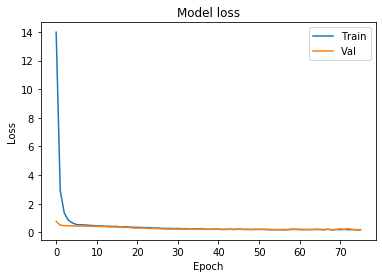

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

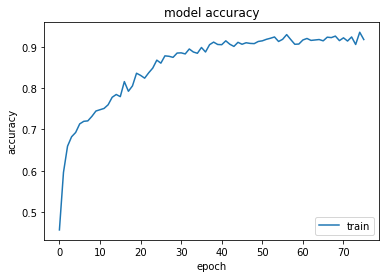

In [26]:
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

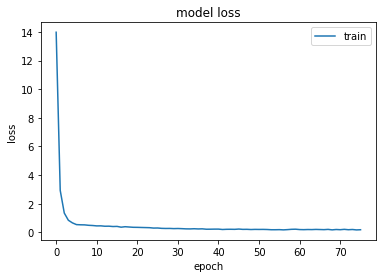

In [27]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()